In [1]:
from pathlib import Path
import torch
import taichi as ti
from tqdm import trange

from torchvtk.datasets import TorchDataset
from torchvtk.utils import make_4d

from differender.utils import get_tf, in_circles, get_rand_pos
from differender.volume_raycaster import Raycaster, Mode

[Taichi] version 0.8.5, llvm 10.0.0, commit 45c6ad48, linux, python 3.7.11
[I 01/25/22 12:39:37.888 7142] [shell.py:_shell_pop_print@34] Graphical python shell detected, using wrapped sys.stdout
[TaiGLSL] version 0.0.11


In [2]:
import matplotlib.pyplot as plt
def show_im(im):
    fig, axs = plt.subplots(2,3, figsize=(15,10))
    axs[0,0].imshow(im.squeeze()[:3].permute(1,2,0).cpu().numpy())
    axs[0,0].set_title('Color')
    axs[0,1].imshow(im.squeeze()[[3,3,3]].permute(1,2,0).cpu().numpy())
    axs[0,1].set_title('Alpha')
    axs[0,2].imshow(im.squeeze()[[4,4,4]].permute(1,2,0).cpu().numpy())
    axs[0,2].set_title('First Hit')
    axs[1,0].imshow(im.squeeze()[[5,5,5]].permute(1,2,0).cpu().numpy())
    axs[1,0].set_title('Max Opacity')
    axs[1,1].imshow(im.squeeze()[[6,6,6]].permute(1,2,0).cpu().numpy())
    axs[1,1].set_title('Max Gradient')
    axs[1,2].imshow(im.squeeze()[[7,7,7]].permute(1,2,0).cpu().numpy())
    axs[1,2].set_title('WYSIWYP')


In [3]:
N_ITEMS = 50000
W, H = 512, 512
TF_RES = 256
SR = 16.0 # Sampling rate

out_dir = Path('/mnt/hdd/dome/STDepth_data2')
ds = TorchDataset('/mnt/hdd/shared_datasets/torchvtk/CQ500')
N_VOLUMES = len(ds)
METHOD = Mode.FirstHitDepth
# MEHTOD = Mode.MaxGradient
# METHOD = Mode.MaxOpacity

In [4]:
raycaster = None
skips = 0
for v in trange(N_VOLUMES):
    item = ds[v]
    vol = make_4d(item['vol']).float().to('cuda')
    nam = item['name']
    ti.reset()
    del raycaster
    raycaster = Raycaster(vol.shape[-3:], (W, H), TF_RES, 
        sampling_rate=SR, near=0.1, far=5.0, max_samples=1, mode=METHOD, ti_kwargs={'device_memory_fraction':0.5})
    for i in trange(N_ITEMS // N_VOLUMES):
        while True:
            lf = get_rand_pos(1).float().to('cuda')
            tf = get_tf('generate', TF_RES).float().to('cuda')
            rgbad = raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR).squeeze(0)
            if (rgbad[3] > 0.0).float().mean() < 0.1 and (rgbad[4] > 0.0).float().mean() < 0.1:
                skips += 1
                print(f'Skipping another useless render ({skips})')
                continue
            else:
                torch.save({
                    'vol': nam,
                    'tf': tf.squeeze(0).cpu().float(),
                    'look_from': lf.squeeze(0).cpu().float(),
                    'rgba': rgbad[:4].cpu().half(),
                    'first_hit': rgbad[[4]].cpu().half(),
                    'max_opacity': rgbad[[5]].cpu().half(),
                    'max_gradient': rgbad[[6]].cpu().half(),
                    'wysiwyp': rgbad[[7]].cpu().half()
                }, out_dir/f'{nam}_{i}.pt')
                break


  0%|          | 0/395 [00:00<?, ?it/s]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:09<00:29,  3.68it/s]

Skipping another useless render (1)



 14%|█▍        | 18/126 [00:09<00:38,  2.82it/s]

Skipping another useless render (2)



 15%|█▌        | 19/126 [00:10<00:42,  2.50it/s]

Skipping another useless render (3)



 21%|██▏       | 27/126 [00:12<00:25,  3.94it/s]

Skipping another useless render (4)



 30%|███       | 38/126 [00:15<00:26,  3.30it/s]

Skipping another useless render (5)



 50%|█████     | 63/126 [00:23<00:16,  3.71it/s]

Skipping another useless render (6)



  0%|          | 1/395 [00:46<5:07:21, 46.81s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 21/126 [00:08<00:26,  3.91it/s]

Skipping another useless render (7)



 33%|███▎      | 42/126 [00:14<00:28,  2.97it/s]

Skipping another useless render (8)



 56%|█████▌    | 70/126 [00:22<00:18,  3.00it/s]

Skipping another useless render (9)



 68%|██████▊   | 86/126 [00:27<00:10,  3.69it/s]

Skipping another useless render (10)



 81%|████████  | 102/126 [00:32<00:05,  4.32it/s]

Skipping another useless render (11)



 82%|████████▏ | 103/126 [00:32<00:07,  3.01it/s]

Skipping another useless render (12)



  1%|          | 2/395 [01:28<4:47:31, 43.90s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:11<00:37,  2.64it/s]

Skipping another useless render (13)



 31%|███       | 39/126 [00:15<00:25,  3.37it/s]

Skipping another useless render (14)



 33%|███▎      | 41/126 [00:16<00:31,  2.74it/s]

Skipping another useless render (15)



 50%|█████     | 63/126 [00:24<00:20,  3.04it/s]

Skipping another useless render (16)



 53%|█████▎    | 67/126 [00:25<00:19,  3.06it/s]

Skipping another useless render (17)



 82%|████████▏ | 103/126 [00:36<00:06,  3.75it/s]

Skipping another useless render (18)
Skipping another useless render (19)



 87%|████████▋ | 110/126 [00:38<00:04,  3.62it/s]

Skipping another useless render (20)



 88%|████████▊ | 111/126 [00:39<00:05,  2.69it/s]

Skipping another useless render (21)



  1%|          | 3/395 [02:16<4:57:24, 45.52s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:53,  2.24it/s]

Skipping another useless render (22)



 75%|███████▍  | 94/126 [00:28<00:09,  3.22it/s]

Skipping another useless render (23)



 80%|████████  | 101/126 [00:30<00:06,  3.77it/s]

Skipping another useless render (24)



  1%|          | 4/395 [02:55<4:40:08, 42.99s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:07<00:32,  3.32it/s]

Skipping another useless render (25)



 22%|██▏       | 28/126 [00:11<00:29,  3.37it/s]

Skipping another useless render (26)
Skipping another useless render (27)



 26%|██▌       | 33/126 [00:12<00:29,  3.12it/s]

Skipping another useless render (28)



 27%|██▋       | 34/126 [00:13<00:33,  2.71it/s]

Skipping another useless render (29)



 40%|███▉      | 50/126 [00:17<00:19,  3.99it/s]

Skipping another useless render (30)



 44%|████▍     | 56/126 [00:19<00:21,  3.22it/s]

Skipping another useless render (31)



 98%|█████████▊| 123/126 [00:38<00:00,  3.30it/s]

Skipping another useless render (32)



 99%|█████████▉| 125/126 [00:39<00:00,  2.38it/s]

Skipping another useless render (33)



  1%|▏         | 5/395 [03:36<4:35:24, 42.37s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:56,  2.11it/s]

Skipping another useless render (34)



 10%|▉         | 12/126 [00:06<00:36,  3.13it/s]

Skipping another useless render (35)



 23%|██▎       | 29/126 [00:11<00:22,  4.30it/s]

Skipping another useless render (36)



 36%|███▌      | 45/126 [00:16<00:25,  3.17it/s]

Skipping another useless render (37)



 58%|█████▊    | 73/126 [00:24<00:13,  3.91it/s]

Skipping another useless render (38)



 72%|███████▏  | 91/126 [00:30<00:09,  3.54it/s]

Skipping another useless render (39)



 83%|████████▎ | 105/126 [00:35<00:07,  2.91it/s]

Skipping another useless render (40)



 91%|█████████▏| 115/126 [00:37<00:03,  3.49it/s]

Skipping another useless render (41)



 99%|█████████▉| 125/126 [00:40<00:00,  3.45it/s]

Skipping another useless render (42)



  2%|▏         | 6/395 [04:19<4:35:02, 42.42s/it]

[Taichi] Starting on arch=cuda



 35%|███▍      | 44/126 [00:15<00:21,  3.83it/s]

Skipping another useless render (43)



 98%|█████████▊| 124/126 [00:38<00:00,  3.88it/s]

Skipping another useless render (44)



  2%|▏         | 7/395 [04:59<4:31:13, 41.94s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:44,  2.70it/s]

Skipping another useless render (45)



 25%|██▌       | 32/126 [00:11<00:24,  3.91it/s]

Skipping another useless render (46)



 53%|█████▎    | 67/126 [00:21<00:18,  3.11it/s]

Skipping another useless render (47)



 59%|█████▊    | 74/126 [00:23<00:13,  3.86it/s]

Skipping another useless render (48)



 69%|██████▉   | 87/126 [00:27<00:12,  3.07it/s]

Skipping another useless render (49)



 97%|█████████▋| 122/126 [00:37<00:00,  4.09it/s]

Skipping another useless render (50)



 99%|█████████▉| 125/126 [00:38<00:00,  4.05it/s]

Skipping another useless render (51)



  2%|▏         | 8/395 [05:40<4:26:59, 41.39s/it]

[Taichi] Starting on arch=cuda



 21%|██▏       | 27/126 [00:10<00:27,  3.66it/s]

Skipping another useless render (52)



 29%|██▉       | 37/126 [00:13<00:25,  3.49it/s]

Skipping another useless render (53)



 33%|███▎      | 41/126 [00:15<00:26,  3.21it/s]

Skipping another useless render (54)



 82%|████████▏ | 103/126 [00:33<00:07,  2.99it/s]

Skipping another useless render (55)



 83%|████████▎ | 104/126 [00:34<00:07,  3.07it/s]

Skipping another useless render (56)



 85%|████████▍ | 107/126 [00:35<00:07,  2.59it/s]

Skipping another useless render (57)



  2%|▏         | 9/395 [06:22<4:27:34, 41.59s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:36,  3.16it/s]

Skipping another useless render (58)



 13%|█▎        | 16/126 [00:07<00:33,  3.33it/s]

Skipping another useless render (59)



 17%|█▋        | 22/126 [00:09<00:38,  2.69it/s]

Skipping another useless render (60)



 19%|█▉        | 24/126 [00:09<00:31,  3.28it/s]

Skipping another useless render (61)



 23%|██▎       | 29/126 [00:11<00:33,  2.89it/s]

Skipping another useless render (62)



 25%|██▌       | 32/126 [00:12<00:31,  3.02it/s]

Skipping another useless render (63)
Skipping another useless render (64)



 34%|███▍      | 43/126 [00:17<00:26,  3.11it/s]

Skipping another useless render (65)



 49%|████▉     | 62/126 [00:22<00:20,  3.11it/s]

Skipping another useless render (66)



 50%|█████     | 63/126 [00:23<00:26,  2.37it/s]

Skipping another useless render (67)



 67%|██████▋   | 84/126 [00:30<00:14,  2.97it/s]

Skipping another useless render (68)



 67%|██████▋   | 85/126 [00:31<00:18,  2.20it/s]

Skipping another useless render (69)



 92%|█████████▏| 116/126 [00:40<00:02,  3.57it/s]

Skipping another useless render (70)
Skipping another useless render (71)



 95%|█████████▌| 120/126 [00:42<00:02,  2.58it/s]

Skipping another useless render (72)



  3%|▎         | 10/395 [07:07<4:34:25, 42.77s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 16/126 [00:07<00:30,  3.66it/s]

Skipping another useless render (73)



 18%|█▊        | 23/126 [00:09<00:27,  3.78it/s]

Skipping another useless render (74)



 50%|█████     | 63/126 [00:21<00:19,  3.27it/s]

Skipping another useless render (75)



 61%|██████    | 77/126 [00:25<00:14,  3.37it/s]

Skipping another useless render (76)
Skipping another useless render (77)



 70%|██████▉   | 88/126 [00:30<00:13,  2.85it/s]

Skipping another useless render (78)



 76%|███████▌  | 96/126 [00:32<00:08,  3.50it/s]

Skipping another useless render (79)



 87%|████████▋ | 110/126 [00:37<00:05,  3.09it/s]

Skipping another useless render (80)



 89%|████████▉ | 112/126 [00:37<00:04,  3.30it/s]

Skipping another useless render (81)



 92%|█████████▏| 116/126 [00:39<00:03,  2.79it/s]

Skipping another useless render (82)



  3%|▎         | 11/395 [07:51<4:36:36, 43.22s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:06<00:33,  3.33it/s]

Skipping another useless render (83)



 20%|█▉        | 25/126 [00:09<00:27,  3.69it/s]

Skipping another useless render (84)



 23%|██▎       | 29/126 [00:10<00:25,  3.79it/s]

Skipping another useless render (85)



 24%|██▍       | 30/126 [00:11<00:33,  2.87it/s]

Skipping another useless render (86)



 44%|████▎     | 55/126 [00:18<00:21,  3.31it/s]

Skipping another useless render (87)



 52%|█████▏    | 66/126 [00:22<00:15,  3.98it/s]

Skipping another useless render (88)
Skipping another useless render (89)



 71%|███████▏  | 90/126 [00:29<00:10,  3.36it/s]

Skipping another useless render (90)



 76%|███████▌  | 96/126 [00:31<00:07,  4.26it/s]

Skipping another useless render (91)



 81%|████████  | 102/126 [00:33<00:05,  4.35it/s]

Skipping another useless render (92)



 86%|████████▌ | 108/126 [00:35<00:05,  3.34it/s]

Skipping another useless render (93)



  3%|▎         | 12/395 [08:33<4:33:37, 42.87s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<00:56,  2.13it/s]

Skipping another useless render (94)



 10%|█         | 13/126 [00:06<00:29,  3.79it/s]

Skipping another useless render (95)



 14%|█▍        | 18/126 [00:08<00:31,  3.40it/s]

Skipping another useless render (96)
Skipping another useless render (97)
Skipping another useless render (98)



 17%|█▋        | 22/126 [00:10<00:44,  2.36it/s]

Skipping another useless render (99)



 24%|██▍       | 30/126 [00:13<00:32,  2.94it/s]

Skipping another useless render (100)



 32%|███▏      | 40/126 [00:15<00:24,  3.45it/s]

Skipping another useless render (101)
Skipping another useless render (102)
Skipping another useless render (103)
Skipping another useless render (104)



 36%|███▌      | 45/126 [00:18<00:27,  2.97it/s]

Skipping another useless render (105)



 42%|████▏     | 53/126 [00:20<00:23,  3.11it/s]

Skipping another useless render (106)



 44%|████▎     | 55/126 [00:21<00:29,  2.37it/s]

Skipping another useless render (107)



 45%|████▌     | 57/126 [00:23<00:33,  2.07it/s]

Skipping another useless render (108)



 53%|█████▎    | 67/126 [00:26<00:19,  3.06it/s]

Skipping another useless render (109)



 56%|█████▋    | 71/126 [00:27<00:17,  3.17it/s]

Skipping another useless render (110)



 63%|██████▎   | 80/126 [00:30<00:14,  3.11it/s]

Skipping another useless render (111)



 71%|███████▏  | 90/126 [00:33<00:10,  3.45it/s]

Skipping another useless render (112)
Skipping another useless render (113)
Skipping another useless render (114)
Skipping another useless render (115)
Skipping another useless render (116)



 73%|███████▎  | 92/126 [00:35<00:21,  1.56it/s]

Skipping another useless render (117)



 74%|███████▍  | 93/126 [00:36<00:19,  1.67it/s]

Skipping another useless render (118)



 87%|████████▋ | 110/126 [00:41<00:04,  3.20it/s]

Skipping another useless render (119)



 88%|████████▊ | 111/126 [00:42<00:05,  2.59it/s]

Skipping another useless render (120)



 90%|████████▉ | 113/126 [00:42<00:05,  2.51it/s]

Skipping another useless render (121)



 94%|█████████▎| 118/126 [00:44<00:02,  3.39it/s]

Skipping another useless render (122)



 95%|█████████▌| 120/126 [00:45<00:01,  3.26it/s]

Skipping another useless render (123)



 97%|█████████▋| 122/126 [00:45<00:01,  3.11it/s]

Skipping another useless render (124)



 98%|█████████▊| 123/126 [00:46<00:01,  2.42it/s]

Skipping another useless render (125)



 98%|█████████▊| 124/126 [00:46<00:00,  3.00it/s]

Skipping another useless render (126)



  3%|▎         | 13/395 [09:22<4:44:09, 44.63s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:56,  1.05it/s]

Skipping another useless render (127)



 16%|█▌        | 20/126 [00:09<00:34,  3.09it/s]

Skipping another useless render (128)



 52%|█████▏    | 66/126 [00:23<00:15,  3.76it/s]

Skipping another useless render (129)



 63%|██████▎   | 80/126 [00:28<00:15,  3.05it/s]

Skipping another useless render (130)



 92%|█████████▏| 116/126 [00:40<00:03,  2.90it/s]

Skipping another useless render (131)



 95%|█████████▌| 120/126 [00:41<00:02,  2.86it/s]

Skipping another useless render (132)



  4%|▎         | 14/395 [10:07<4:43:43, 44.68s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:52,  2.29it/s]

Skipping another useless render (133)
Skipping another useless render (134)
Skipping another useless render (135)



 17%|█▋        | 21/126 [00:09<00:25,  4.16it/s]

Skipping another useless render (136)



 33%|███▎      | 41/126 [00:15<00:23,  3.61it/s]

Skipping another useless render (137)



 40%|████      | 51/126 [00:18<00:21,  3.45it/s]

Skipping another useless render (138)



 44%|████▎     | 55/126 [00:19<00:18,  3.77it/s]

Skipping another useless render (139)



 67%|██████▋   | 85/126 [00:28<00:12,  3.23it/s]

Skipping another useless render (140)



 83%|████████▎ | 105/126 [00:34<00:06,  3.28it/s]

Skipping another useless render (141)



  4%|▍         | 15/395 [10:51<4:42:09, 44.55s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:40,  2.89it/s]

Skipping another useless render (142)
Skipping another useless render (143)



 33%|███▎      | 41/126 [00:16<00:28,  2.97it/s]

Skipping another useless render (144)



 37%|███▋      | 46/126 [00:17<00:27,  2.86it/s]

Skipping another useless render (145)



 38%|███▊      | 48/126 [00:18<00:32,  2.42it/s]

Skipping another useless render (146)



 39%|███▉      | 49/126 [00:19<00:36,  2.08it/s]

Skipping another useless render (147)



 50%|█████     | 63/126 [00:24<00:21,  2.97it/s]

Skipping another useless render (148)



 54%|█████▍    | 68/126 [00:25<00:18,  3.06it/s]

Skipping another useless render (149)
Skipping another useless render (150)



 55%|█████▍    | 69/126 [00:26<00:30,  1.87it/s]

Skipping another useless render (151)



 60%|█████▉    | 75/126 [00:28<00:16,  3.18it/s]

Skipping another useless render (152)



 70%|██████▉   | 88/126 [00:33<00:11,  3.44it/s]

Skipping another useless render (153)



 74%|███████▍  | 93/126 [00:34<00:09,  3.35it/s]

Skipping another useless render (154)



 75%|███████▍  | 94/126 [00:35<00:13,  2.32it/s]

Skipping another useless render (155)



 83%|████████▎ | 104/126 [00:38<00:08,  2.66it/s]

Skipping another useless render (156)



 84%|████████▍ | 106/126 [00:39<00:07,  2.60it/s]

Skipping another useless render (157)



 87%|████████▋ | 110/126 [00:41<00:06,  2.31it/s]

Skipping another useless render (158)



 93%|█████████▎| 117/126 [00:43<00:02,  3.50it/s]

Skipping another useless render (159)
Skipping another useless render (160)



 94%|█████████▎| 118/126 [00:44<00:03,  2.03it/s]

Skipping another useless render (161)



  4%|▍         | 16/395 [11:40<4:48:45, 45.71s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (162)



 32%|███▏      | 40/126 [00:14<00:24,  3.57it/s]

Skipping another useless render (163)



 33%|███▎      | 42/126 [00:15<00:26,  3.13it/s]

Skipping another useless render (164)



 36%|███▌      | 45/126 [00:16<00:27,  2.96it/s]

Skipping another useless render (165)



 40%|███▉      | 50/126 [00:18<00:27,  2.80it/s]

Skipping another useless render (166)



 41%|████▏     | 52/126 [00:19<00:25,  2.89it/s]

Skipping another useless render (167)



 45%|████▌     | 57/126 [00:20<00:21,  3.14it/s]

Skipping another useless render (168)



 68%|██████▊   | 86/126 [00:29<00:12,  3.14it/s]

Skipping another useless render (169)



 71%|███████▏  | 90/126 [00:30<00:11,  3.05it/s]

Skipping another useless render (170)



 79%|███████▊  | 99/126 [00:33<00:09,  2.79it/s]

Skipping another useless render (171)



 79%|███████▉  | 100/126 [00:34<00:08,  2.92it/s]

Skipping another useless render (172)



 83%|████████▎ | 104/126 [00:35<00:06,  3.37it/s]

Skipping another useless render (173)



  4%|▍         | 17/395 [12:23<4:44:30, 45.16s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:24,  1.45it/s]

Skipping another useless render (174)



 10%|█         | 13/126 [00:07<00:38,  2.95it/s]

Skipping another useless render (175)



 12%|█▏        | 15/126 [00:07<00:40,  2.73it/s]

Skipping another useless render (176)



 14%|█▍        | 18/126 [00:09<00:38,  2.80it/s]

Skipping another useless render (177)



 17%|█▋        | 22/126 [00:10<00:34,  3.04it/s]

Skipping another useless render (178)



 21%|██        | 26/126 [00:12<00:37,  2.66it/s]

Skipping another useless render (179)



 30%|███       | 38/126 [00:16<00:27,  3.20it/s]

Skipping another useless render (180)



 31%|███       | 39/126 [00:17<00:36,  2.37it/s]

Skipping another useless render (181)
Skipping another useless render (182)
Skipping another useless render (183)



 32%|███▏      | 40/126 [00:18<00:54,  1.57it/s]

Skipping another useless render (184)



 39%|███▉      | 49/126 [00:21<00:31,  2.47it/s]

Skipping another useless render (185)



 45%|████▌     | 57/126 [00:24<00:21,  3.14it/s]

Skipping another useless render (186)



 48%|████▊     | 60/126 [00:26<00:24,  2.64it/s]

Skipping another useless render (187)
Skipping another useless render (188)



 51%|█████     | 64/126 [00:27<00:22,  2.80it/s]

Skipping another useless render (189)



 54%|█████▍    | 68/126 [00:29<00:17,  3.29it/s]

Skipping another useless render (190)
Skipping another useless render (191)



 63%|██████▎   | 79/126 [00:33<00:14,  3.13it/s]

Skipping another useless render (192)



 70%|██████▉   | 88/126 [00:35<00:10,  3.48it/s]

Skipping another useless render (193)



 72%|███████▏  | 91/126 [00:37<00:12,  2.74it/s]

Skipping another useless render (194)



 75%|███████▍  | 94/126 [00:38<00:12,  2.62it/s]

Skipping another useless render (195)



 79%|███████▊  | 99/126 [00:40<00:10,  2.63it/s]

Skipping another useless render (196)



 82%|████████▏ | 103/126 [00:41<00:07,  2.94it/s]

Skipping another useless render (197)



 83%|████████▎ | 104/126 [00:42<00:09,  2.42it/s]

Skipping another useless render (198)



 86%|████████▌ | 108/126 [00:43<00:07,  2.56it/s]

Skipping another useless render (199)



 90%|█████████ | 114/126 [00:46<00:03,  3.10it/s]

Skipping another useless render (200)
Skipping another useless render (201)



 96%|█████████▌| 121/126 [00:49<00:01,  2.59it/s]

Skipping another useless render (202)
Skipping another useless render (203)



  5%|▍         | 18/395 [13:16<4:57:56, 47.42s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:07<00:31,  3.42it/s]

Skipping another useless render (204)



 25%|██▌       | 32/126 [00:12<00:25,  3.62it/s]

Skipping another useless render (205)



 48%|████▊     | 60/126 [00:20<00:19,  3.38it/s]

Skipping another useless render (206)



 56%|█████▌    | 70/126 [00:23<00:16,  3.34it/s]

Skipping another useless render (207)



 74%|███████▍  | 93/126 [00:30<00:08,  3.69it/s]

Skipping another useless render (208)



 75%|███████▌  | 95/126 [00:30<00:10,  3.10it/s]

Skipping another useless render (209)



 76%|███████▌  | 96/126 [00:31<00:11,  2.67it/s]

Skipping another useless render (210)



 85%|████████▍ | 107/126 [00:34<00:05,  3.52it/s]

Skipping another useless render (211)



  5%|▍         | 19/395 [13:58<4:46:41, 45.75s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:34,  3.20it/s]

Skipping another useless render (212)



 14%|█▍        | 18/126 [00:08<00:36,  2.94it/s]

Skipping another useless render (213)



 15%|█▌        | 19/126 [00:08<00:44,  2.41it/s]

Skipping another useless render (214)



 23%|██▎       | 29/126 [00:12<00:31,  3.04it/s]

Skipping another useless render (215)



 33%|███▎      | 42/126 [00:16<00:22,  3.66it/s]

Skipping another useless render (216)



 83%|████████▎ | 104/126 [00:36<00:05,  3.94it/s]

Skipping another useless render (217)



  5%|▌         | 20/395 [14:43<4:43:41, 45.39s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:14,  1.57s/it]

Skipping another useless render (218)



  5%|▍         | 6/126 [00:04<00:52,  2.30it/s]

Skipping another useless render (219)



  6%|▋         | 8/126 [00:05<00:50,  2.35it/s]

Skipping another useless render (220)



 20%|█▉        | 25/126 [00:11<00:30,  3.27it/s]

Skipping another useless render (221)



 24%|██▍       | 30/126 [00:12<00:32,  2.94it/s]

Skipping another useless render (222)



 25%|██▍       | 31/126 [00:13<00:39,  2.42it/s]

Skipping another useless render (223)



 26%|██▌       | 33/126 [00:14<00:37,  2.45it/s]

Skipping another useless render (224)



 37%|███▋      | 46/126 [00:18<00:25,  3.10it/s]

Skipping another useless render (225)



 37%|███▋      | 47/126 [00:19<00:31,  2.48it/s]

Skipping another useless render (226)



 53%|█████▎    | 67/126 [00:25<00:18,  3.20it/s]

Skipping another useless render (227)



 65%|██████▌   | 82/126 [00:31<00:14,  2.99it/s]

Skipping another useless render (228)



 77%|███████▋  | 97/126 [00:36<00:07,  3.63it/s]

Skipping another useless render (229)



 79%|███████▉  | 100/126 [00:37<00:08,  3.04it/s]

Skipping another useless render (230)



  5%|▌         | 21/395 [15:30<4:46:06, 45.90s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:22,  3.06s/it]

Skipping another useless render (231)



  2%|▏         | 3/126 [00:04<02:11,  1.07s/it]

Skipping another useless render (232)



 15%|█▌        | 19/126 [00:08<00:27,  3.96it/s]

Skipping another useless render (233)



 17%|█▋        | 21/126 [00:09<00:37,  2.77it/s]

Skipping another useless render (234)



 20%|█▉        | 25/126 [00:11<00:38,  2.63it/s]

Skipping another useless render (235)



 23%|██▎       | 29/126 [00:12<00:35,  2.72it/s]

Skipping another useless render (236)



 31%|███       | 39/126 [00:16<00:27,  3.21it/s]

Skipping another useless render (237)



 87%|████████▋ | 109/126 [00:37<00:04,  4.03it/s]

Skipping another useless render (238)



 89%|████████▉ | 112/126 [00:38<00:04,  2.96it/s]

Skipping another useless render (239)



 90%|████████▉ | 113/126 [00:39<00:05,  2.19it/s]

Skipping another useless render (240)
Skipping another useless render (241)



 97%|█████████▋| 122/126 [00:42<00:01,  3.62it/s]

Skipping another useless render (242)
Skipping another useless render (243)



  6%|▌         | 22/395 [16:16<4:46:00, 46.01s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:45,  2.50it/s]

Skipping another useless render (244)



 14%|█▍        | 18/126 [00:08<00:32,  3.28it/s]

Skipping another useless render (245)



 27%|██▋       | 34/126 [00:14<00:25,  3.56it/s]

Skipping another useless render (246)



 44%|████▎     | 55/126 [00:20<00:19,  3.66it/s]

Skipping another useless render (247)



 45%|████▌     | 57/126 [00:21<00:25,  2.67it/s]

Skipping another useless render (248)
Skipping another useless render (249)
Skipping another useless render (250)



 99%|█████████▉| 125/126 [00:42<00:00,  3.53it/s]

Skipping another useless render (251)



  6%|▌         | 23/395 [17:00<4:42:33, 45.57s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 29/126 [00:10<00:27,  3.56it/s]

Skipping another useless render (252)



 48%|████▊     | 61/126 [00:19<00:19,  3.41it/s]

Skipping another useless render (253)



  6%|▌         | 24/395 [17:40<4:30:57, 43.82s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:55,  2.18it/s]

Skipping another useless render (254)



 42%|████▏     | 53/126 [00:17<00:20,  3.54it/s]

Skipping another useless render (255)
Skipping another useless render (256)



 45%|████▌     | 57/126 [00:19<00:21,  3.15it/s]

Skipping another useless render (257)



 66%|██████▌   | 83/126 [00:26<00:11,  3.64it/s]

Skipping another useless render (258)



 67%|██████▋   | 84/126 [00:27<00:14,  2.89it/s]

Skipping another useless render (259)



 81%|████████  | 102/126 [00:32<00:05,  4.39it/s]

Skipping another useless render (260)



  6%|▋         | 25/395 [18:20<4:22:15, 42.53s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<02:02,  1.00it/s]

Skipping another useless render (261)



  6%|▋         | 8/126 [00:05<00:49,  2.40it/s]

Skipping another useless render (262)



 27%|██▋       | 34/126 [00:14<00:32,  2.82it/s]

Skipping another useless render (263)



 28%|██▊       | 35/126 [00:15<00:40,  2.24it/s]

Skipping another useless render (264)



 32%|███▏      | 40/126 [00:17<00:30,  2.81it/s]

Skipping another useless render (265)



 33%|███▎      | 42/126 [00:17<00:32,  2.60it/s]

Skipping another useless render (266)



 34%|███▍      | 43/126 [00:18<00:37,  2.24it/s]

Skipping another useless render (267)



 37%|███▋      | 47/126 [00:20<00:30,  2.59it/s]

Skipping another useless render (268)



 41%|████▏     | 52/126 [00:22<00:29,  2.53it/s]

Skipping another useless render (269)



 49%|████▉     | 62/126 [00:25<00:19,  3.23it/s]

Skipping another useless render (270)



 63%|██████▎   | 79/126 [00:31<00:18,  2.57it/s]

Skipping another useless render (271)



 67%|██████▋   | 85/126 [00:34<00:14,  2.92it/s]

Skipping another useless render (272)



 69%|██████▉   | 87/126 [00:34<00:12,  3.04it/s]

Skipping another useless render (273)



 71%|███████   | 89/126 [00:35<00:15,  2.42it/s]

Skipping another useless render (274)



 75%|███████▌  | 95/126 [00:37<00:11,  2.75it/s]

Skipping another useless render (275)



 86%|████████▌ | 108/126 [00:41<00:05,  3.40it/s]

Skipping another useless render (276)



 88%|████████▊ | 111/126 [00:43<00:05,  2.76it/s]

Skipping another useless render (277)



 97%|█████████▋| 122/126 [00:47<00:01,  2.82it/s]

Skipping another useless render (278)
Skipping another useless render (279)



  7%|▋         | 26/395 [19:10<4:35:52, 44.86s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 27/395 [19:53<4:31:02, 44.19s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:40,  2.90it/s]

Skipping another useless render (280)



 36%|███▌      | 45/126 [00:16<00:28,  2.82it/s]

Skipping another useless render (281)



 39%|███▉      | 49/126 [00:17<00:23,  3.33it/s]

Skipping another useless render (282)



 42%|████▏     | 53/126 [00:19<00:27,  2.68it/s]

Skipping another useless render (283)



 48%|████▊     | 60/126 [00:21<00:20,  3.24it/s]

Skipping another useless render (284)



 66%|██████▌   | 83/126 [00:28<00:11,  3.79it/s]

Skipping another useless render (285)



  7%|▋         | 28/395 [20:36<4:28:08, 43.84s/it]

[Taichi] Starting on arch=cuda



 43%|████▎     | 54/126 [00:18<00:22,  3.14it/s]

Skipping another useless render (286)



 56%|█████▌    | 70/126 [00:22<00:14,  3.91it/s]

Skipping another useless render (287)



  7%|▋         | 29/395 [21:16<4:21:54, 42.94s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:43,  2.76it/s]

Skipping another useless render (288)



 10%|▉         | 12/126 [00:06<00:41,  2.72it/s]

Skipping another useless render (289)



 41%|████▏     | 52/126 [00:18<00:24,  3.01it/s]

Skipping another useless render (290)



 50%|█████     | 63/126 [00:22<00:17,  3.64it/s]

Skipping another useless render (291)



 81%|████████  | 102/126 [00:34<00:08,  2.82it/s]

Skipping another useless render (292)



  8%|▊         | 30/395 [22:00<4:21:33, 43.00s/it]

[Taichi] Starting on arch=cuda



 31%|███       | 39/126 [00:13<00:24,  3.52it/s]

Skipping another useless render (293)



 40%|████      | 51/126 [00:18<00:23,  3.21it/s]

Skipping another useless render (294)



 45%|████▌     | 57/126 [00:20<00:23,  2.94it/s]

Skipping another useless render (295)



 46%|████▌     | 58/126 [00:20<00:26,  2.55it/s]

Skipping another useless render (296)



 51%|█████     | 64/126 [00:22<00:15,  3.93it/s]

Skipping another useless render (297)



 60%|█████▉    | 75/126 [00:26<00:16,  3.05it/s]

Skipping another useless render (298)



 66%|██████▌   | 83/126 [00:28<00:12,  3.37it/s]

Skipping another useless render (299)



 67%|██████▋   | 85/126 [00:29<00:13,  3.14it/s]

Skipping another useless render (300)



  8%|▊         | 31/395 [22:42<4:19:08, 42.72s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 25/126 [00:10<00:28,  3.53it/s]

Skipping another useless render (301)



 21%|██        | 26/126 [00:10<00:37,  2.69it/s]

Skipping another useless render (302)
Skipping another useless render (303)



 26%|██▌       | 33/126 [00:13<00:29,  3.18it/s]

Skipping another useless render (304)



 28%|██▊       | 35/126 [00:14<00:37,  2.43it/s]

Skipping another useless render (305)



 33%|███▎      | 41/126 [00:17<00:32,  2.59it/s]

Skipping another useless render (306)



 33%|███▎      | 42/126 [00:17<00:38,  2.19it/s]

Skipping another useless render (307)



 39%|███▉      | 49/126 [00:20<00:24,  3.15it/s]

Skipping another useless render (308)



 40%|████      | 51/126 [00:21<00:33,  2.22it/s]

Skipping another useless render (309)



 60%|██████    | 76/126 [00:29<00:16,  3.10it/s]

Skipping another useless render (310)



 61%|██████    | 77/126 [00:29<00:19,  2.47it/s]

Skipping another useless render (311)



 73%|███████▎  | 92/126 [00:35<00:09,  3.52it/s]

Skipping another useless render (312)



 93%|█████████▎| 117/126 [00:43<00:03,  2.58it/s]

Skipping another useless render (313)



  8%|▊         | 32/395 [23:32<4:32:28, 45.04s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:34,  3.29it/s]

Skipping another useless render (314)



 19%|█▉        | 24/126 [00:09<00:24,  4.10it/s]

Skipping another useless render (315)



 25%|██▌       | 32/126 [00:12<00:28,  3.29it/s]

Skipping another useless render (316)



 26%|██▌       | 33/126 [00:12<00:30,  3.01it/s]

Skipping another useless render (317)



 40%|████      | 51/126 [00:17<00:24,  3.03it/s]

Skipping another useless render (318)



 45%|████▌     | 57/126 [00:19<00:20,  3.30it/s]

Skipping another useless render (319)



 52%|█████▏    | 66/126 [00:21<00:14,  4.03it/s]

Skipping another useless render (320)



 68%|██████▊   | 86/126 [00:27<00:11,  3.54it/s]

Skipping another useless render (321)



 72%|███████▏  | 91/126 [00:29<00:12,  2.72it/s]

Skipping another useless render (322)



 94%|█████████▎| 118/126 [00:36<00:01,  4.35it/s]

Skipping another useless render (323)



 95%|█████████▌| 120/126 [00:37<00:01,  3.35it/s]

Skipping another useless render (324)



  8%|▊         | 33/395 [24:12<4:23:17, 43.64s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:49,  1.12it/s]

Skipping another useless render (325)



  3%|▎         | 4/126 [00:04<01:33,  1.30it/s]

Skipping another useless render (326)



 10%|▉         | 12/126 [00:06<00:34,  3.29it/s]

Skipping another useless render (327)
Skipping another useless render (328)



 15%|█▌        | 19/126 [00:09<00:38,  2.78it/s]

Skipping another useless render (329)
Skipping another useless render (330)
Skipping another useless render (331)
Skipping another useless render (332)



 17%|█▋        | 22/126 [00:10<00:43,  2.42it/s]

Skipping another useless render (333)



 21%|██▏       | 27/126 [00:12<00:33,  2.98it/s]

Skipping another useless render (334)



 23%|██▎       | 29/126 [00:13<00:34,  2.82it/s]

Skipping another useless render (335)
Skipping another useless render (336)



 25%|██▍       | 31/126 [00:14<00:36,  2.58it/s]

Skipping another useless render (337)



 28%|██▊       | 35/126 [00:15<00:28,  3.16it/s]

Skipping another useless render (338)



 35%|███▍      | 44/126 [00:18<00:19,  4.16it/s]

Skipping another useless render (339)



 37%|███▋      | 46/126 [00:19<00:28,  2.85it/s]

Skipping another useless render (340)



 43%|████▎     | 54/126 [00:21<00:21,  3.34it/s]

Skipping another useless render (341)



 44%|████▎     | 55/126 [00:22<00:25,  2.74it/s]

Skipping another useless render (342)
Skipping another useless render (343)



 45%|████▌     | 57/126 [00:23<00:29,  2.36it/s]

Skipping another useless render (344)



 48%|████▊     | 60/126 [00:23<00:19,  3.42it/s]

Skipping another useless render (345)



 49%|████▉     | 62/126 [00:24<00:19,  3.21it/s]

Skipping another useless render (346)



 51%|█████     | 64/126 [00:25<00:21,  2.85it/s]

Skipping another useless render (347)
Skipping another useless render (348)



 56%|█████▌    | 70/126 [00:27<00:19,  2.92it/s]

Skipping another useless render (349)



 57%|█████▋    | 72/126 [00:28<00:21,  2.47it/s]

Skipping another useless render (350)



 61%|██████    | 77/126 [00:30<00:15,  3.21it/s]

Skipping another useless render (351)



 64%|██████▍   | 81/126 [00:31<00:13,  3.31it/s]

Skipping another useless render (352)



 65%|██████▌   | 82/126 [00:32<00:17,  2.52it/s]

Skipping another useless render (353)



 66%|██████▌   | 83/126 [00:32<00:14,  2.97it/s]

Skipping another useless render (354)



 67%|██████▋   | 84/126 [00:32<00:16,  2.48it/s]

Skipping another useless render (355)



 69%|██████▉   | 87/126 [00:34<00:14,  2.68it/s]

Skipping another useless render (356)



 75%|███████▌  | 95/126 [00:36<00:08,  3.60it/s]

Skipping another useless render (357)



 80%|████████  | 101/126 [00:38<00:06,  3.96it/s]

Skipping another useless render (358)



 83%|████████▎ | 104/126 [00:39<00:07,  2.93it/s]

Skipping another useless render (359)



 86%|████████▌ | 108/126 [00:40<00:05,  3.11it/s]

Skipping another useless render (360)



 94%|█████████▎| 118/126 [00:43<00:01,  4.33it/s]

Skipping another useless render (361)
Skipping another useless render (362)



 94%|█████████▍| 119/126 [00:44<00:02,  2.74it/s]

Skipping another useless render (363)
Skipping another useless render (364)



 95%|█████████▌| 120/126 [00:44<00:03,  1.96it/s]

Skipping another useless render (365)



 96%|█████████▌| 121/126 [00:45<00:02,  1.81it/s]

Skipping another useless render (366)



 97%|█████████▋| 122/126 [00:45<00:01,  2.19it/s]

Skipping another useless render (367)



 99%|█████████▉| 125/126 [00:46<00:00,  3.00it/s]

Skipping another useless render (368)



  9%|▊         | 34/395 [25:01<4:31:03, 45.05s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<02:56,  1.43s/it]

Skipping another useless render (369)



  3%|▎         | 4/126 [00:04<01:38,  1.24it/s]

Skipping another useless render (370)



  9%|▊         | 11/126 [00:06<00:44,  2.61it/s]

Skipping another useless render (371)



 13%|█▎        | 17/126 [00:08<00:32,  3.39it/s]

Skipping another useless render (372)



 16%|█▌        | 20/126 [00:09<00:37,  2.86it/s]

Skipping another useless render (373)



 26%|██▌       | 33/126 [00:13<00:22,  4.07it/s]

Skipping another useless render (374)



 28%|██▊       | 35/126 [00:14<00:32,  2.79it/s]

Skipping another useless render (375)



 32%|███▏      | 40/126 [00:16<00:26,  3.19it/s]

Skipping another useless render (376)



 52%|█████▏    | 66/126 [00:23<00:17,  3.47it/s]

Skipping another useless render (377)



 60%|██████    | 76/126 [00:26<00:14,  3.50it/s]

Skipping another useless render (378)



 67%|██████▋   | 84/126 [00:29<00:13,  3.20it/s]

Skipping another useless render (379)



 97%|█████████▋| 122/126 [00:41<00:01,  3.28it/s]

Skipping another useless render (380)



  9%|▉         | 35/395 [25:44<4:27:34, 44.60s/it]

[Taichi] Starting on arch=cuda



 37%|███▋      | 46/126 [00:16<00:22,  3.62it/s]

Skipping another useless render (381)



 40%|███▉      | 50/126 [00:17<00:24,  3.14it/s]

Skipping another useless render (382)



 64%|██████▍   | 81/126 [00:27<00:13,  3.35it/s]

Skipping another useless render (383)



 92%|█████████▏| 116/126 [00:37<00:02,  3.84it/s]

Skipping another useless render (384)



  9%|▉         | 36/395 [26:27<4:23:45, 44.08s/it]

[Taichi] Starting on arch=cuda



 24%|██▍       | 30/126 [00:11<00:29,  3.31it/s]

Skipping another useless render (385)



 29%|██▊       | 36/126 [00:13<00:29,  3.07it/s]

Skipping another useless render (386)



 38%|███▊      | 48/126 [00:16<00:18,  4.26it/s]

Skipping another useless render (387)



 75%|███████▌  | 95/126 [00:31<00:09,  3.15it/s]

Skipping another useless render (388)



  9%|▉         | 37/395 [27:10<4:19:53, 43.56s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:45,  2.62it/s]

Skipping another useless render (389)
Skipping another useless render (390)



 25%|██▍       | 31/126 [00:12<00:26,  3.53it/s]

Skipping another useless render (391)



 40%|████      | 51/126 [00:19<00:24,  3.04it/s]

Skipping another useless render (392)



 45%|████▌     | 57/126 [00:20<00:19,  3.51it/s]

Skipping another useless render (393)



 59%|█████▊    | 74/126 [00:26<00:14,  3.49it/s]

Skipping another useless render (394)



 63%|██████▎   | 79/126 [00:28<00:15,  3.06it/s]

Skipping another useless render (395)



 73%|███████▎  | 92/126 [00:32<00:10,  3.32it/s]

Skipping another useless render (396)



 75%|███████▌  | 95/126 [00:34<00:12,  2.47it/s]

Skipping another useless render (397)



 83%|████████▎ | 105/126 [00:37<00:05,  3.96it/s]

Skipping another useless render (398)



 94%|█████████▍| 119/126 [00:41<00:02,  3.48it/s]

Skipping another useless render (399)



 10%|▉         | 38/395 [27:55<4:22:01, 44.04s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:27,  1.39it/s]

Skipping another useless render (400)



 14%|█▍        | 18/126 [00:07<00:29,  3.63it/s]

Skipping another useless render (401)



 56%|█████▌    | 70/126 [00:23<00:15,  3.61it/s]

Skipping another useless render (402)
Skipping another useless render (403)



 59%|█████▊    | 74/126 [00:25<00:15,  3.39it/s]

Skipping another useless render (404)
Skipping another useless render (405)
Skipping another useless render (406)



 84%|████████▍ | 106/126 [00:35<00:05,  3.75it/s]

Skipping another useless render (407)



 87%|████████▋ | 110/126 [00:36<00:04,  3.21it/s]

Skipping another useless render (408)



 10%|▉         | 39/395 [28:39<4:20:55, 43.98s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:07<00:33,  3.34it/s]

Skipping another useless render (409)



 19%|█▉        | 24/126 [00:10<00:29,  3.49it/s]

Skipping another useless render (410)



 22%|██▏       | 28/126 [00:12<00:28,  3.50it/s]

Skipping another useless render (411)
Skipping another useless render (412)



 35%|███▍      | 44/126 [00:17<00:24,  3.34it/s]

Skipping another useless render (413)



 40%|████      | 51/126 [00:19<00:25,  2.98it/s]

Skipping another useless render (414)



 53%|█████▎    | 67/126 [00:25<00:20,  2.90it/s]

Skipping another useless render (415)



 59%|█████▊    | 74/126 [00:27<00:14,  3.57it/s]

Skipping another useless render (416)



 64%|██████▍   | 81/126 [00:29<00:14,  3.14it/s]

Skipping another useless render (417)



 73%|███████▎  | 92/126 [00:32<00:09,  3.46it/s]

Skipping another useless render (418)



 86%|████████▌ | 108/126 [00:36<00:05,  3.11it/s]

Skipping another useless render (419)



 99%|█████████▉| 125/126 [00:41<00:00,  3.76it/s]

Skipping another useless render (420)



 10%|█         | 40/395 [29:22<4:18:29, 43.69s/it]

[Taichi] Starting on arch=cuda



 27%|██▋       | 34/126 [00:12<00:30,  3.04it/s]

Skipping another useless render (421)
Skipping another useless render (422)



 36%|███▌      | 45/126 [00:16<00:27,  2.98it/s]

Skipping another useless render (423)



 37%|███▋      | 47/126 [00:17<00:29,  2.72it/s]

Skipping another useless render (424)



 40%|████      | 51/126 [00:19<00:22,  3.30it/s]

Skipping another useless render (425)



 45%|████▌     | 57/126 [00:20<00:21,  3.27it/s]

Skipping another useless render (426)



 54%|█████▍    | 68/126 [00:24<00:15,  3.72it/s]

Skipping another useless render (427)



 81%|████████  | 102/126 [00:35<00:07,  3.21it/s]

Skipping another useless render (428)



 90%|████████▉ | 113/126 [00:39<00:03,  3.52it/s]

Skipping another useless render (429)



 90%|█████████ | 114/126 [00:39<00:04,  2.58it/s]

Skipping another useless render (430)



 97%|█████████▋| 122/126 [00:42<00:01,  3.16it/s]

Skipping another useless render (431)



 10%|█         | 41/395 [30:08<4:21:42, 44.36s/it]

[Taichi] Starting on arch=cuda



 24%|██▍       | 30/126 [00:11<00:28,  3.38it/s]

Skipping another useless render (432)



 40%|███▉      | 50/126 [00:17<00:23,  3.22it/s]

Skipping another useless render (433)



 44%|████▍     | 56/126 [00:19<00:26,  2.59it/s]

Skipping another useless render (434)



 67%|██████▋   | 85/126 [00:28<00:12,  3.25it/s]

Skipping another useless render (435)



 86%|████████▌ | 108/126 [00:36<00:05,  3.13it/s]

Skipping another useless render (436)



 90%|████████▉ | 113/126 [00:37<00:03,  3.38it/s]

Skipping another useless render (437)



 11%|█         | 42/395 [30:51<4:18:55, 44.01s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:07<00:33,  3.21it/s]

Skipping another useless render (438)



 39%|███▉      | 49/126 [00:16<00:23,  3.30it/s]

Skipping another useless render (439)



 57%|█████▋    | 72/126 [00:23<00:17,  3.10it/s]

Skipping another useless render (440)



 85%|████████▍ | 107/126 [00:34<00:05,  3.62it/s]

Skipping another useless render (441)



 86%|████████▌ | 108/126 [00:34<00:06,  2.81it/s]

Skipping another useless render (442)



 11%|█         | 43/395 [31:32<4:13:23, 43.19s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:52,  2.27it/s]

Skipping another useless render (443)



 17%|█▋        | 21/126 [00:09<00:26,  3.92it/s]

Skipping another useless render (444)



 23%|██▎       | 29/126 [00:12<00:36,  2.68it/s]

Skipping another useless render (445)



 40%|████      | 51/126 [00:19<00:22,  3.30it/s]

Skipping another useless render (446)



 46%|████▌     | 58/126 [00:21<00:22,  3.05it/s]

Skipping another useless render (447)



 65%|██████▌   | 82/126 [00:29<00:12,  3.53it/s]

Skipping another useless render (448)



 78%|███████▊  | 98/126 [00:34<00:10,  2.75it/s]

Skipping another useless render (449)



 84%|████████▍ | 106/126 [00:36<00:07,  2.65it/s]

Skipping another useless render (450)



 91%|█████████▏| 115/126 [00:39<00:03,  3.21it/s]

Skipping another useless render (451)



 11%|█         | 44/395 [32:18<4:17:37, 44.04s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:06<00:30,  3.70it/s]

Skipping another useless render (452)



 13%|█▎        | 17/126 [00:07<00:33,  3.29it/s]

Skipping another useless render (453)



 20%|█▉        | 25/126 [00:10<00:29,  3.39it/s]

Skipping another useless render (454)



 21%|██▏       | 27/126 [00:11<00:36,  2.73it/s]

Skipping another useless render (455)



 30%|███       | 38/126 [00:14<00:21,  4.15it/s]

Skipping another useless render (456)



 40%|███▉      | 50/126 [00:17<00:17,  4.23it/s]

Skipping another useless render (457)



 70%|██████▉   | 88/126 [00:29<00:12,  3.03it/s]

Skipping another useless render (458)



 90%|████████▉ | 113/126 [00:37<00:03,  3.52it/s]

Skipping another useless render (459)



 91%|█████████▏| 115/126 [00:38<00:04,  2.65it/s]

Skipping another useless render (460)



 11%|█▏        | 45/395 [33:01<4:15:41, 43.83s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:57,  1.04it/s]

Skipping another useless render (461)



  9%|▊         | 11/126 [00:06<00:38,  2.96it/s]

Skipping another useless render (462)
Skipping another useless render (463)



 10%|▉         | 12/126 [00:07<00:52,  2.18it/s]

Skipping another useless render (464)



 13%|█▎        | 17/126 [00:08<00:39,  2.76it/s]

Skipping another useless render (465)



 17%|█▋        | 22/126 [00:10<00:28,  3.67it/s]

Skipping another useless render (466)
Skipping another useless render (467)
Skipping another useless render (468)



 21%|██▏       | 27/126 [00:12<00:39,  2.53it/s]

Skipping another useless render (469)



 25%|██▍       | 31/126 [00:14<00:37,  2.55it/s]

Skipping another useless render (470)



 31%|███       | 39/126 [00:16<00:22,  3.83it/s]

Skipping another useless render (471)



 63%|██████▎   | 79/126 [00:27<00:14,  3.35it/s]

Skipping another useless render (472)



 65%|██████▌   | 82/126 [00:28<00:12,  3.48it/s]

Skipping another useless render (473)



 71%|███████▏  | 90/126 [00:30<00:09,  3.61it/s]

Skipping another useless render (474)
Skipping another useless render (475)



 75%|███████▌  | 95/126 [00:32<00:10,  3.05it/s]

Skipping another useless render (476)
Skipping another useless render (477)



 87%|████████▋ | 109/126 [00:37<00:05,  2.84it/s]

Skipping another useless render (478)



 88%|████████▊ | 111/126 [00:37<00:04,  3.08it/s]

Skipping another useless render (479)



 90%|████████▉ | 113/126 [00:38<00:04,  2.91it/s]

Skipping another useless render (480)



 91%|█████████▏| 115/126 [00:39<00:03,  2.77it/s]

Skipping another useless render (481)



 93%|█████████▎| 117/126 [00:40<00:03,  2.76it/s]

Skipping another useless render (482)



 12%|█▏        | 46/395 [33:46<4:16:05, 44.03s/it]

Skipping another useless render (483)
[Taichi] Starting on arch=cuda



 29%|██▊       | 36/126 [00:12<00:23,  3.83it/s]

Skipping another useless render (484)



 40%|███▉      | 50/126 [00:16<00:16,  4.52it/s]

Skipping another useless render (485)



 71%|███████▏  | 90/126 [00:28<00:12,  2.94it/s]

Skipping another useless render (486)



 84%|████████▍ | 106/126 [00:32<00:05,  3.94it/s]

Skipping another useless render (487)



 93%|█████████▎| 117/126 [00:36<00:03,  2.94it/s]

Skipping another useless render (488)



 94%|█████████▍| 119/126 [00:37<00:02,  2.95it/s]

Skipping another useless render (489)



 12%|█▏        | 47/395 [34:26<4:09:23, 43.00s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (490)



  2%|▏         | 3/126 [00:03<01:57,  1.05it/s]

Skipping another useless render (491)



  6%|▋         | 8/126 [00:05<00:49,  2.37it/s]

Skipping another useless render (492)



 10%|▉         | 12/126 [00:07<00:44,  2.54it/s]

Skipping another useless render (493)



 11%|█         | 14/126 [00:08<00:48,  2.30it/s]

Skipping another useless render (494)



 21%|██        | 26/126 [00:12<00:32,  3.05it/s]

Skipping another useless render (495)



 21%|██▏       | 27/126 [00:13<00:40,  2.42it/s]

Skipping another useless render (496)



 32%|███▏      | 40/126 [00:17<00:27,  3.16it/s]

Skipping another useless render (497)
Skipping another useless render (498)



 35%|███▍      | 44/126 [00:19<00:28,  2.93it/s]

Skipping another useless render (499)



 37%|███▋      | 46/126 [00:20<00:30,  2.63it/s]

Skipping another useless render (500)



 40%|████      | 51/126 [00:22<00:23,  3.24it/s]

Skipping another useless render (501)



 43%|████▎     | 54/126 [00:23<00:26,  2.73it/s]

Skipping another useless render (502)



 47%|████▋     | 59/126 [00:25<00:20,  3.26it/s]

Skipping another useless render (503)



 59%|█████▊    | 74/126 [00:30<00:15,  3.26it/s]

Skipping another useless render (504)



 64%|██████▍   | 81/126 [00:32<00:15,  2.82it/s]

Skipping another useless render (505)



 68%|██████▊   | 86/126 [00:34<00:13,  2.88it/s]

Skipping another useless render (506)



 74%|███████▍  | 93/126 [00:36<00:09,  3.49it/s]

Skipping another useless render (507)



 79%|███████▉  | 100/126 [00:39<00:08,  3.21it/s]

Skipping another useless render (508)



 83%|████████▎ | 105/126 [00:40<00:07,  2.98it/s]

Skipping another useless render (509)



 85%|████████▍ | 107/126 [00:41<00:07,  2.64it/s]

Skipping another useless render (510)



 92%|█████████▏| 116/126 [00:44<00:02,  3.55it/s]

Skipping another useless render (511)



 12%|█▏        | 48/395 [35:15<4:18:32, 44.71s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:05,  1.86it/s]

Skipping another useless render (512)



 25%|██▍       | 31/126 [00:12<00:28,  3.30it/s]

Skipping another useless render (513)



 52%|█████▏    | 65/126 [00:22<00:17,  3.52it/s]

Skipping another useless render (514)



 54%|█████▍    | 68/126 [00:23<00:22,  2.60it/s]

Skipping another useless render (515)



 63%|██████▎   | 79/126 [00:26<00:14,  3.30it/s]

Skipping another useless render (516)



 65%|██████▌   | 82/126 [00:27<00:13,  3.38it/s]

Skipping another useless render (517)



 85%|████████▍ | 107/126 [00:34<00:04,  3.81it/s]

Skipping another useless render (518)



 95%|█████████▌| 120/126 [00:38<00:01,  3.39it/s]

Skipping another useless render (519)



 12%|█▏        | 49/395 [35:57<4:13:21, 43.93s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (520)



  1%|          | 1/126 [00:03<07:07,  3.42s/it]

Skipping another useless render (521)



  3%|▎         | 4/126 [00:04<01:21,  1.50it/s]

Skipping another useless render (522)
Skipping another useless render (523)
Skipping another useless render (524)



 53%|█████▎    | 67/126 [00:24<00:15,  3.75it/s]

Skipping another useless render (525)



 60%|██████    | 76/126 [00:27<00:13,  3.68it/s]

Skipping another useless render (526)



 63%|██████▎   | 79/126 [00:28<00:17,  2.68it/s]

Skipping another useless render (527)



 68%|██████▊   | 86/126 [00:30<00:12,  3.12it/s]

Skipping another useless render (528)



 69%|██████▉   | 87/126 [00:31<00:14,  2.65it/s]

Skipping another useless render (529)



 70%|██████▉   | 88/126 [00:32<00:17,  2.22it/s]

Skipping another useless render (530)



 72%|███████▏  | 91/126 [00:33<00:14,  2.40it/s]

Skipping another useless render (531)



 75%|███████▌  | 95/126 [00:34<00:11,  2.68it/s]

Skipping another useless render (532)



 79%|███████▊  | 99/126 [00:36<00:08,  3.00it/s]

Skipping another useless render (533)



 80%|████████  | 101/126 [00:37<00:10,  2.46it/s]

Skipping another useless render (534)



 81%|████████  | 102/126 [00:37<00:10,  2.21it/s]

Skipping another useless render (535)



 82%|████████▏ | 103/126 [00:38<00:11,  2.04it/s]

Skipping another useless render (536)
Skipping another useless render (537)



 83%|████████▎ | 105/126 [00:39<00:11,  1.91it/s]

Skipping another useless render (538)



 90%|████████▉ | 113/126 [00:42<00:04,  2.83it/s]

Skipping another useless render (539)



 98%|█████████▊| 123/126 [00:46<00:00,  3.11it/s]

Skipping another useless render (540)



 13%|█▎        | 50/395 [36:46<4:20:59, 45.39s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:07<00:31,  3.37it/s]

Skipping another useless render (541)



 32%|███▏      | 40/126 [00:13<00:24,  3.48it/s]

Skipping another useless render (542)



 52%|█████▏    | 65/126 [00:21<00:18,  3.25it/s]

Skipping another useless render (543)



 52%|█████▏    | 66/126 [00:22<00:26,  2.24it/s]

Skipping another useless render (544)



 75%|███████▌  | 95/126 [00:30<00:10,  2.88it/s]

Skipping another useless render (545)



 13%|█▎        | 51/395 [37:27<4:12:16, 44.00s/it]

[Taichi] Starting on arch=cuda



 19%|█▉        | 24/126 [00:09<00:27,  3.68it/s]

Skipping another useless render (546)



 30%|███       | 38/126 [00:13<00:21,  4.12it/s]

Skipping another useless render (547)
Skipping another useless render (548)



 48%|████▊     | 61/126 [00:20<00:16,  3.85it/s]

Skipping another useless render (549)



 64%|██████▍   | 81/126 [00:26<00:10,  4.40it/s]

Skipping another useless render (550)



 67%|██████▋   | 84/126 [00:27<00:11,  3.58it/s]

Skipping another useless render (551)



 13%|█▎        | 52/395 [38:08<4:06:47, 43.17s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:09<00:28,  3.58it/s]

Skipping another useless render (552)



 22%|██▏       | 28/126 [00:11<00:28,  3.42it/s]

Skipping another useless render (553)



 23%|██▎       | 29/126 [00:11<00:34,  2.79it/s]

Skipping another useless render (554)



 31%|███       | 39/126 [00:14<00:23,  3.64it/s]

Skipping another useless render (555)



 45%|████▌     | 57/126 [00:19<00:17,  3.85it/s]

Skipping another useless render (556)



 56%|█████▌    | 70/126 [00:22<00:11,  5.04it/s]

Skipping another useless render (557)



 58%|█████▊    | 73/126 [00:23<00:12,  4.09it/s]

Skipping another useless render (558)



 71%|███████   | 89/126 [00:28<00:13,  2.83it/s]

Skipping another useless render (559)



 99%|█████████▉| 125/126 [00:37<00:00,  3.92it/s]

Skipping another useless render (560)



 13%|█▎        | 53/395 [38:47<3:59:42, 42.05s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<02:50,  1.37s/it]

Skipping another useless render (561)



  2%|▏         | 3/126 [00:03<02:10,  1.06s/it]

Skipping another useless render (562)



 11%|█         | 14/126 [00:06<00:30,  3.72it/s]

Skipping another useless render (563)



 15%|█▌        | 19/126 [00:08<00:32,  3.30it/s]

Skipping another useless render (564)
Skipping another useless render (565)



 17%|█▋        | 22/126 [00:10<00:43,  2.41it/s]

Skipping another useless render (566)



 21%|██        | 26/126 [00:11<00:31,  3.14it/s]

Skipping another useless render (567)



 24%|██▍       | 30/126 [00:12<00:31,  3.09it/s]

Skipping another useless render (568)



 29%|██▊       | 36/126 [00:14<00:24,  3.67it/s]

Skipping another useless render (569)



 30%|███       | 38/126 [00:15<00:30,  2.87it/s]

Skipping another useless render (570)



 32%|███▏      | 40/126 [00:16<00:34,  2.47it/s]

Skipping another useless render (571)



 40%|████      | 51/126 [00:20<00:23,  3.13it/s]

Skipping another useless render (572)



 47%|████▋     | 59/126 [00:23<00:20,  3.19it/s]

Skipping another useless render (573)



 60%|██████    | 76/126 [00:29<00:20,  2.48it/s]

Skipping another useless render (574)



 74%|███████▍  | 93/126 [00:34<00:10,  3.08it/s]

Skipping another useless render (575)



 75%|███████▍  | 94/126 [00:34<00:08,  3.65it/s]

Skipping another useless render (576)



 77%|███████▋  | 97/126 [00:36<00:08,  3.25it/s]

Skipping another useless render (577)



 84%|████████▍ | 106/126 [00:38<00:04,  4.19it/s]

Skipping another useless render (578)



 14%|█▎        | 54/395 [39:34<4:06:25, 43.36s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:35,  3.14it/s]

Skipping another useless render (579)



 17%|█▋        | 22/126 [00:09<00:30,  3.39it/s]

Skipping another useless render (580)



 24%|██▍       | 30/126 [00:11<00:26,  3.66it/s]

Skipping another useless render (581)



 43%|████▎     | 54/126 [00:19<00:19,  3.69it/s]

Skipping another useless render (582)



 79%|███████▊  | 99/126 [00:32<00:08,  3.33it/s]

Skipping another useless render (583)



 84%|████████▍ | 106/126 [00:34<00:05,  3.53it/s]

Skipping another useless render (584)



 14%|█▍        | 55/395 [40:16<4:03:19, 42.94s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:09,  1.74it/s]

Skipping another useless render (585)
Skipping another useless render (586)



  6%|▌         | 7/126 [00:05<01:00,  1.98it/s]

Skipping another useless render (587)



 24%|██▍       | 30/126 [00:11<00:25,  3.84it/s]

Skipping another useless render (588)



 27%|██▋       | 34/126 [00:13<00:26,  3.47it/s]

Skipping another useless render (589)



 29%|██▉       | 37/126 [00:14<00:28,  3.08it/s]

Skipping another useless render (590)



 34%|███▍      | 43/126 [00:16<00:28,  2.87it/s]

Skipping another useless render (591)



 40%|████      | 51/126 [00:19<00:27,  2.69it/s]

Skipping another useless render (592)



 59%|█████▊    | 74/126 [00:26<00:14,  3.59it/s]

Skipping another useless render (593)



 64%|██████▍   | 81/126 [00:29<00:15,  2.96it/s]

Skipping another useless render (594)



 87%|████████▋ | 110/126 [00:37<00:03,  4.13it/s]

Skipping another useless render (595)



 89%|████████▉ | 112/126 [00:38<00:04,  3.18it/s]

Skipping another useless render (596)



 95%|█████████▌| 120/126 [00:41<00:01,  3.39it/s]

Skipping another useless render (597)



 96%|█████████▌| 121/126 [00:41<00:01,  2.60it/s]

Skipping another useless render (598)



 97%|█████████▋| 122/126 [00:42<00:01,  2.39it/s]

Skipping another useless render (599)



 14%|█▍        | 56/395 [41:01<4:05:53, 43.52s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (600)



  3%|▎         | 4/126 [00:04<01:35,  1.28it/s]

Skipping another useless render (601)



 33%|███▎      | 41/126 [00:14<00:23,  3.67it/s]

Skipping another useless render (602)
Skipping another useless render (603)



 43%|████▎     | 54/126 [00:18<00:16,  4.44it/s]

Skipping another useless render (604)



 56%|█████▌    | 70/126 [00:23<00:13,  4.29it/s]

Skipping another useless render (605)



 64%|██████▍   | 81/126 [00:26<00:10,  4.14it/s]

Skipping another useless render (606)



 75%|███████▌  | 95/126 [00:30<00:08,  3.71it/s]

Skipping another useless render (607)
Skipping another useless render (608)



 83%|████████▎ | 105/126 [00:33<00:07,  2.96it/s]

Skipping another useless render (609)



 85%|████████▍ | 107/126 [00:33<00:06,  3.07it/s]

Skipping another useless render (610)



 90%|████████▉ | 113/126 [00:35<00:03,  3.57it/s]

Skipping another useless render (611)



 90%|█████████ | 114/126 [00:36<00:04,  2.81it/s]

Skipping another useless render (612)



 92%|█████████▏| 116/126 [00:37<00:04,  2.46it/s]

Skipping another useless render (613)



 93%|█████████▎| 117/126 [00:37<00:03,  2.39it/s]

Skipping another useless render (614)



 95%|█████████▌| 120/126 [00:38<00:02,  2.51it/s]

Skipping another useless render (615)



 99%|█████████▉| 125/126 [00:39<00:00,  3.45it/s]

Skipping another useless render (616)



 14%|█▍        | 57/395 [41:42<4:01:32, 42.88s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:11<00:30,  3.25it/s]

Skipping another useless render (617)



 27%|██▋       | 34/126 [00:12<00:26,  3.46it/s]

Skipping another useless render (618)



 44%|████▍     | 56/126 [00:19<00:20,  3.34it/s]

Skipping another useless render (619)



 63%|██████▎   | 80/126 [00:27<00:13,  3.40it/s]

Skipping another useless render (620)



 90%|████████▉ | 113/126 [00:37<00:04,  3.20it/s]

Skipping another useless render (621)



 94%|█████████▎| 118/126 [00:39<00:02,  3.17it/s]

Skipping another useless render (622)



 96%|█████████▌| 121/126 [00:40<00:01,  3.07it/s]

Skipping another useless render (623)



 15%|█▍        | 58/395 [42:25<4:01:13, 42.95s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:27,  3.10s/it]

Skipping another useless render (624)



 41%|████▏     | 52/126 [00:17<00:23,  3.16it/s]

Skipping another useless render (625)



 42%|████▏     | 53/126 [00:18<00:25,  2.81it/s]

Skipping another useless render (626)



 46%|████▌     | 58/126 [00:19<00:19,  3.45it/s]

Skipping another useless render (627)



 73%|███████▎  | 92/126 [00:29<00:10,  3.40it/s]

Skipping another useless render (628)



 77%|███████▋  | 97/126 [00:30<00:08,  3.62it/s]

Skipping another useless render (629)



 94%|█████████▎| 118/126 [00:36<00:02,  3.82it/s]

Skipping another useless render (630)



 98%|█████████▊| 124/126 [00:38<00:00,  3.70it/s]

Skipping another useless render (631)
Skipping another useless render (632)



 15%|█▍        | 59/395 [43:07<3:59:02, 42.68s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (633)



  2%|▏         | 2/126 [00:03<03:23,  1.64s/it]

Skipping another useless render (634)



 34%|███▍      | 43/126 [00:16<00:24,  3.45it/s]

Skipping another useless render (635)



 38%|███▊      | 48/126 [00:17<00:22,  3.45it/s]

Skipping another useless render (636)



 69%|██████▉   | 87/126 [00:30<00:11,  3.32it/s]

Skipping another useless render (637)



 78%|███████▊  | 98/126 [00:33<00:07,  3.92it/s]

Skipping another useless render (638)



 81%|████████  | 102/126 [00:35<00:08,  2.89it/s]

Skipping another useless render (639)



 15%|█▌        | 60/395 [43:52<4:00:54, 43.15s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (640)



  1%|          | 1/126 [00:03<07:36,  3.65s/it]

Skipping another useless render (641)



 26%|██▌       | 33/126 [00:13<00:29,  3.15it/s]

Skipping another useless render (642)



 32%|███▏      | 40/126 [00:15<00:26,  3.20it/s]

Skipping another useless render (643)



 48%|████▊     | 60/126 [00:21<00:20,  3.24it/s]

Skipping another useless render (644)



 59%|█████▊    | 74/126 [00:25<00:16,  3.16it/s]

Skipping another useless render (645)



 97%|█████████▋| 122/126 [00:39<00:01,  3.60it/s]

Skipping another useless render (646)



 15%|█▌        | 61/395 [44:35<4:00:51, 43.27s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:32,  3.54it/s]

Skipping another useless render (647)



 25%|██▌       | 32/126 [00:12<00:33,  2.84it/s]

Skipping another useless render (648)



 26%|██▌       | 33/126 [00:12<00:27,  3.37it/s]

Skipping another useless render (649)



 32%|███▏      | 40/126 [00:15<00:23,  3.65it/s]

Skipping another useless render (650)



 35%|███▍      | 44/126 [00:16<00:25,  3.27it/s]

Skipping another useless render (651)



 38%|███▊      | 48/126 [00:18<00:30,  2.57it/s]

Skipping another useless render (652)



 53%|█████▎    | 67/126 [00:24<00:16,  3.69it/s]

Skipping another useless render (653)



 57%|█████▋    | 72/126 [00:25<00:17,  3.18it/s]

Skipping another useless render (654)



 16%|█▌        | 62/395 [45:19<4:01:19, 43.48s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:01,  1.47s/it]

Skipping another useless render (655)



 13%|█▎        | 17/126 [00:08<00:36,  2.96it/s]

Skipping another useless render (656)



 15%|█▌        | 19/126 [00:09<00:40,  2.63it/s]

Skipping another useless render (657)



 22%|██▏       | 28/126 [00:11<00:31,  3.10it/s]

Skipping another useless render (658)



 25%|██▍       | 31/126 [00:12<00:30,  3.13it/s]

Skipping another useless render (659)



 29%|██▊       | 36/126 [00:14<00:33,  2.73it/s]

Skipping another useless render (660)



 29%|██▉       | 37/126 [00:15<00:40,  2.20it/s]

Skipping another useless render (661)



 31%|███       | 39/126 [00:16<00:40,  2.13it/s]

Skipping another useless render (662)



 37%|███▋      | 47/126 [00:18<00:23,  3.43it/s]

Skipping another useless render (663)



 39%|███▉      | 49/126 [00:19<00:26,  2.93it/s]

Skipping another useless render (664)



 88%|████████▊ | 111/126 [00:36<00:04,  3.26it/s]

Skipping another useless render (665)



 89%|████████▉ | 112/126 [00:36<00:04,  2.85it/s]

Skipping another useless render (666)
Skipping another useless render (667)



 90%|█████████ | 114/126 [00:38<00:05,  2.17it/s]

Skipping another useless render (668)



 16%|█▌        | 63/395 [46:02<3:59:08, 43.22s/it]

[Taichi] Starting on arch=cuda



 74%|███████▍  | 93/126 [00:31<00:09,  3.59it/s]

Skipping another useless render (669)



 79%|███████▊  | 99/126 [00:33<00:08,  3.17it/s]

Skipping another useless render (670)



 96%|█████████▌| 121/126 [00:40<00:01,  3.03it/s]

Skipping another useless render (671)



 16%|█▌        | 64/395 [46:46<4:00:27, 43.59s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 21/126 [00:09<00:31,  3.34it/s]

Skipping another useless render (672)



 34%|███▍      | 43/126 [00:16<00:25,  3.27it/s]

Skipping another useless render (673)



 76%|███████▌  | 96/126 [00:32<00:09,  3.12it/s]

Skipping another useless render (674)



 78%|███████▊  | 98/126 [00:33<00:09,  2.88it/s]

Skipping another useless render (675)



 82%|████████▏ | 103/126 [00:34<00:06,  3.30it/s]

Skipping another useless render (676)



 84%|████████▍ | 106/126 [00:36<00:06,  3.03it/s]

Skipping another useless render (677)



 16%|█▋        | 65/395 [47:30<4:00:09, 43.66s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (678)



  1%|          | 1/126 [00:03<07:10,  3.44s/it]

Skipping another useless render (679)



  2%|▏         | 2/126 [00:03<03:13,  1.56s/it]

Skipping another useless render (680)
Skipping another useless render (681)



  2%|▏         | 3/126 [00:04<02:29,  1.22s/it]

Skipping another useless render (682)



  3%|▎         | 4/126 [00:04<01:49,  1.11it/s]

Skipping another useless render (683)



  8%|▊         | 10/126 [00:07<00:42,  2.72it/s]

Skipping another useless render (684)



 11%|█         | 14/126 [00:07<00:29,  3.84it/s]

Skipping another useless render (685)



 13%|█▎        | 16/126 [00:08<00:33,  3.29it/s]

Skipping another useless render (686)



 13%|█▎        | 17/126 [00:09<00:38,  2.82it/s]

Skipping another useless render (687)
Skipping another useless render (688)
Skipping another useless render (689)



 15%|█▌        | 19/126 [00:10<00:44,  2.43it/s]

Skipping another useless render (690)



 16%|█▌        | 20/126 [00:10<00:49,  2.15it/s]

Skipping another useless render (691)



 20%|█▉        | 25/126 [00:12<00:33,  3.03it/s]

Skipping another useless render (692)



 21%|██▏       | 27/126 [00:13<00:37,  2.67it/s]

Skipping another useless render (693)
Skipping another useless render (694)



 25%|██▍       | 31/126 [00:14<00:32,  2.90it/s]

Skipping another useless render (695)
Skipping another useless render (696)
Skipping another useless render (697)



 26%|██▌       | 33/126 [00:16<00:44,  2.08it/s]

Skipping another useless render (698)
Skipping another useless render (699)
Skipping another useless render (700)
Skipping another useless render (701)



 33%|███▎      | 42/126 [00:19<00:20,  4.07it/s]

Skipping another useless render (702)



 34%|███▍      | 43/126 [00:19<00:30,  2.76it/s]

Skipping another useless render (703)



 40%|███▉      | 50/126 [00:21<00:22,  3.36it/s]

Skipping another useless render (704)



 42%|████▏     | 53/126 [00:22<00:23,  3.13it/s]

Skipping another useless render (705)
Skipping another useless render (706)



 48%|████▊     | 61/126 [00:24<00:15,  4.25it/s]

Skipping another useless render (707)
Skipping another useless render (708)



 52%|█████▏    | 66/126 [00:26<00:17,  3.49it/s]

Skipping another useless render (709)
Skipping another useless render (710)



 54%|█████▍    | 68/126 [00:27<00:23,  2.47it/s]

Skipping another useless render (711)



 56%|█████▌    | 70/126 [00:28<00:18,  3.07it/s]

Skipping another useless render (712)



 58%|█████▊    | 73/126 [00:29<00:16,  3.17it/s]

Skipping another useless render (713)



 60%|█████▉    | 75/126 [00:29<00:15,  3.31it/s]

Skipping another useless render (714)



 60%|██████    | 76/126 [00:30<00:17,  2.87it/s]

Skipping another useless render (715)



 62%|██████▏   | 78/126 [00:31<00:16,  2.92it/s]

Skipping another useless render (716)



 63%|██████▎   | 79/126 [00:31<00:18,  2.52it/s]

Skipping another useless render (717)



 63%|██████▎   | 80/126 [00:32<00:21,  2.18it/s]

Skipping another useless render (718)
Skipping another useless render (719)
Skipping another useless render (720)
Skipping another useless render (721)



 69%|██████▉   | 87/126 [00:35<00:15,  2.44it/s]

Skipping another useless render (722)
Skipping another useless render (723)



 71%|███████   | 89/126 [00:36<00:17,  2.07it/s]

Skipping another useless render (724)
Skipping another useless render (725)
Skipping another useless render (726)



 72%|███████▏  | 91/126 [00:37<00:18,  1.92it/s]

Skipping another useless render (727)
Skipping another useless render (728)
Skipping another useless render (729)
Skipping another useless render (730)



 73%|███████▎  | 92/126 [00:39<00:24,  1.39it/s]

Skipping another useless render (731)



 75%|███████▍  | 94/126 [00:39<00:18,  1.71it/s]

Skipping another useless render (732)
Skipping another useless render (733)



 75%|███████▌  | 95/126 [00:40<00:17,  1.82it/s]

Skipping another useless render (734)



 76%|███████▌  | 96/126 [00:40<00:15,  1.89it/s]

Skipping another useless render (735)
Skipping another useless render (736)



 77%|███████▋  | 97/126 [00:41<00:16,  1.77it/s]

Skipping another useless render (737)
Skipping another useless render (738)



 79%|███████▉  | 100/126 [00:42<00:10,  2.46it/s]

Skipping another useless render (739)



 80%|████████  | 101/126 [00:43<00:10,  2.44it/s]

Skipping another useless render (740)
Skipping another useless render (741)



 84%|████████▍ | 106/126 [00:44<00:06,  2.94it/s]

Skipping another useless render (742)



 86%|████████▌ | 108/126 [00:45<00:07,  2.37it/s]

Skipping another useless render (743)



 87%|████████▋ | 109/126 [00:46<00:06,  2.60it/s]

Skipping another useless render (744)
Skipping another useless render (745)



 87%|████████▋ | 110/126 [00:46<00:07,  2.13it/s]

Skipping another useless render (746)



 88%|████████▊ | 111/126 [00:47<00:06,  2.20it/s]

Skipping another useless render (747)



 90%|████████▉ | 113/126 [00:48<00:05,  2.26it/s]

Skipping another useless render (748)
Skipping another useless render (749)



 91%|█████████▏| 115/126 [00:49<00:04,  2.41it/s]

Skipping another useless render (750)



 92%|█████████▏| 116/126 [00:49<00:04,  2.26it/s]

Skipping another useless render (751)



 94%|█████████▎| 118/126 [00:50<00:03,  2.59it/s]

Skipping another useless render (752)



 94%|█████████▍| 119/126 [00:50<00:03,  2.25it/s]

Skipping another useless render (753)



 17%|█▋        | 66/395 [48:25<4:17:33, 46.97s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:43,  2.70it/s]

Skipping another useless render (754)



 10%|█         | 13/126 [00:06<00:34,  3.26it/s]

Skipping another useless render (755)
Skipping another useless render (756)



 13%|█▎        | 17/126 [00:08<00:39,  2.78it/s]

Skipping another useless render (757)
Skipping another useless render (758)



 21%|██        | 26/126 [00:11<00:30,  3.32it/s]

Skipping another useless render (759)



 22%|██▏       | 28/126 [00:12<00:36,  2.71it/s]

Skipping another useless render (760)



 25%|██▌       | 32/126 [00:14<00:35,  2.63it/s]

Skipping another useless render (761)



 28%|██▊       | 35/126 [00:15<00:28,  3.19it/s]

Skipping another useless render (762)



 37%|███▋      | 46/126 [00:18<00:21,  3.75it/s]

Skipping another useless render (763)



 38%|███▊      | 48/126 [00:19<00:24,  3.23it/s]

Skipping another useless render (764)



 43%|████▎     | 54/126 [00:21<00:21,  3.38it/s]

Skipping another useless render (765)



 54%|█████▍    | 68/126 [00:25<00:21,  2.72it/s]

Skipping another useless render (766)



 74%|███████▍  | 93/126 [00:33<00:11,  2.91it/s]

Skipping another useless render (767)



 75%|███████▍  | 94/126 [00:34<00:13,  2.42it/s]

Skipping another useless render (768)



 76%|███████▌  | 96/126 [00:34<00:11,  2.61it/s]

Skipping another useless render (769)



 81%|████████  | 102/126 [00:37<00:08,  2.95it/s]

Skipping another useless render (770)



 83%|████████▎ | 104/126 [00:37<00:07,  2.93it/s]

Skipping another useless render (771)



 17%|█▋        | 67/395 [49:11<4:15:29, 46.74s/it]

[Taichi] Starting on arch=cuda



 34%|███▍      | 43/126 [00:15<00:27,  2.97it/s]

Skipping another useless render (772)



 44%|████▍     | 56/126 [00:19<00:20,  3.44it/s]

Skipping another useless render (773)



 17%|█▋        | 68/395 [49:51<4:04:20, 44.83s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:36,  3.17s/it]

Skipping another useless render (774)



 53%|█████▎    | 67/126 [00:22<00:17,  3.32it/s]

Skipping another useless render (775)
Skipping another useless render (776)



 58%|█████▊    | 73/126 [00:24<00:16,  3.26it/s]

Skipping another useless render (777)



 64%|██████▍   | 81/126 [00:26<00:12,  3.48it/s]

Skipping another useless render (778)



 71%|███████   | 89/126 [00:29<00:11,  3.09it/s]

Skipping another useless render (779)



 75%|███████▍  | 94/126 [00:31<00:08,  3.59it/s]

Skipping another useless render (780)



 17%|█▋        | 69/395 [50:34<4:00:45, 44.31s/it]

[Taichi] Starting on arch=cuda



 19%|█▉        | 24/126 [00:09<00:31,  3.26it/s]

Skipping another useless render (781)



 24%|██▍       | 30/126 [00:11<00:28,  3.35it/s]

Skipping another useless render (782)



 27%|██▋       | 34/126 [00:12<00:24,  3.82it/s]

Skipping another useless render (783)



 31%|███       | 39/126 [00:14<00:27,  3.17it/s]

Skipping another useless render (784)



 44%|████▎     | 55/126 [00:19<00:25,  2.81it/s]

Skipping another useless render (785)



 54%|█████▍    | 68/126 [00:23<00:17,  3.27it/s]

Skipping another useless render (786)



 75%|███████▍  | 94/126 [00:32<00:10,  2.96it/s]

Skipping another useless render (787)



 79%|███████▉  | 100/126 [00:34<00:08,  3.15it/s]

Skipping another useless render (788)



 85%|████████▍ | 107/126 [00:36<00:05,  3.49it/s]

Skipping another useless render (789)



 90%|████████▉ | 113/126 [00:38<00:03,  3.49it/s]

Skipping another useless render (790)



 91%|█████████▏| 115/126 [00:39<00:04,  2.64it/s]

Skipping another useless render (791)



 92%|█████████▏| 116/126 [00:39<00:03,  3.00it/s]

Skipping another useless render (792)



 18%|█▊        | 70/395 [51:18<3:59:12, 44.16s/it]

[Taichi] Starting on arch=cuda



 25%|██▍       | 31/126 [00:12<00:31,  3.04it/s]

Skipping another useless render (793)



 25%|██▌       | 32/126 [00:13<00:39,  2.41it/s]

Skipping another useless render (794)



 91%|█████████▏| 115/126 [00:36<00:03,  2.78it/s]

Skipping another useless render (795)



 18%|█▊        | 71/395 [51:59<3:53:00, 43.15s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<02:54,  1.41s/it]

Skipping another useless render (796)



  7%|▋         | 9/126 [00:05<00:39,  2.93it/s]

Skipping another useless render (797)



 19%|█▉        | 24/126 [00:10<00:31,  3.23it/s]

Skipping another useless render (798)



 23%|██▎       | 29/126 [00:12<00:32,  3.01it/s]

Skipping another useless render (799)



 29%|██▊       | 36/126 [00:14<00:27,  3.22it/s]

Skipping another useless render (800)



 36%|███▌      | 45/126 [00:17<00:21,  3.69it/s]

Skipping another useless render (801)



 40%|████      | 51/126 [00:20<00:29,  2.53it/s]

Skipping another useless render (802)



 67%|██████▋   | 84/126 [00:30<00:13,  3.03it/s]

Skipping another useless render (803)



 73%|███████▎  | 92/126 [00:33<00:09,  3.62it/s]

Skipping another useless render (804)



 89%|████████▉ | 112/126 [00:40<00:04,  3.49it/s]

Skipping another useless render (805)



 90%|█████████ | 114/126 [00:40<00:04,  2.79it/s]

Skipping another useless render (806)



 18%|█▊        | 72/395 [52:45<3:57:37, 44.14s/it]

[Taichi] Starting on arch=cuda



 33%|███▎      | 42/126 [00:16<00:23,  3.56it/s]

Skipping another useless render (807)



 36%|███▌      | 45/126 [00:17<00:26,  3.01it/s]

Skipping another useless render (808)



 53%|█████▎    | 67/126 [00:24<00:15,  3.74it/s]

Skipping another useless render (809)



 62%|██████▏   | 78/126 [00:27<00:12,  3.74it/s]

Skipping another useless render (810)



 63%|██████▎   | 79/126 [00:27<00:18,  2.56it/s]

Skipping another useless render (811)



 64%|██████▍   | 81/126 [00:28<00:19,  2.34it/s]

Skipping another useless render (812)



 87%|████████▋ | 110/126 [00:38<00:05,  3.12it/s]

Skipping another useless render (813)



 98%|█████████▊| 124/126 [00:42<00:00,  3.15it/s]

Skipping another useless render (814)



 18%|█▊        | 73/395 [53:30<3:57:18, 44.22s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 16/126 [00:07<00:37,  2.95it/s]

Skipping another useless render (815)



 33%|███▎      | 41/126 [00:15<00:27,  3.10it/s]

Skipping another useless render (816)



 37%|███▋      | 46/126 [00:17<00:25,  3.09it/s]

Skipping another useless render (817)



 56%|█████▋    | 71/126 [00:25<00:16,  3.36it/s]

Skipping another useless render (818)



 59%|█████▊    | 74/126 [00:26<00:16,  3.18it/s]

Skipping another useless render (819)



 19%|█▊        | 74/395 [54:14<3:57:16, 44.35s/it]

[Taichi] Starting on arch=cuda



 21%|██▏       | 27/126 [00:10<00:25,  3.91it/s]

Skipping another useless render (820)



 27%|██▋       | 34/126 [00:12<00:25,  3.55it/s]

Skipping another useless render (821)



 29%|██▉       | 37/126 [00:13<00:25,  3.45it/s]

Skipping another useless render (822)



 30%|███       | 38/126 [00:14<00:31,  2.78it/s]

Skipping another useless render (823)



 31%|███       | 39/126 [00:15<00:39,  2.18it/s]

Skipping another useless render (824)



 51%|█████     | 64/126 [00:22<00:18,  3.36it/s]

Skipping another useless render (825)



 72%|███████▏  | 91/126 [00:31<00:09,  3.64it/s]

Skipping another useless render (826)



 88%|████████▊ | 111/126 [00:37<00:04,  3.48it/s]

Skipping another useless render (827)



 19%|█▉        | 75/395 [54:58<3:55:07, 44.09s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<07:25,  3.57s/it]

Skipping another useless render (828)



 52%|█████▏    | 65/126 [00:25<00:23,  2.55it/s]

Skipping another useless render (829)



 63%|██████▎   | 80/126 [00:30<00:16,  2.77it/s]

Skipping another useless render (830)



 67%|██████▋   | 85/126 [00:31<00:14,  2.90it/s]

Skipping another useless render (831)
Skipping another useless render (832)



 87%|████████▋ | 109/126 [00:40<00:05,  3.02it/s]

Skipping another useless render (833)



 93%|█████████▎| 117/126 [00:43<00:03,  2.76it/s]

Skipping another useless render (834)



 19%|█▉        | 76/395 [55:46<4:00:16, 45.19s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:25,  3.09s/it]

Skipping another useless render (835)



 15%|█▌        | 19/126 [00:08<00:32,  3.28it/s]

Skipping another useless render (836)



 17%|█▋        | 22/126 [00:09<00:31,  3.27it/s]

Skipping another useless render (837)



 18%|█▊        | 23/126 [00:10<00:39,  2.59it/s]

Skipping another useless render (838)



 19%|█▉        | 24/126 [00:10<00:43,  2.32it/s]

Skipping another useless render (839)



 21%|██        | 26/126 [00:11<00:44,  2.27it/s]

Skipping another useless render (840)



 48%|████▊     | 60/126 [00:22<00:19,  3.40it/s]

Skipping another useless render (841)



 59%|█████▊    | 74/126 [00:26<00:17,  3.00it/s]

Skipping another useless render (842)



 87%|████████▋ | 109/126 [00:38<00:04,  3.58it/s]

Skipping another useless render (843)



 19%|█▉        | 77/395 [56:31<3:59:24, 45.17s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:58,  2.05it/s]

Skipping another useless render (844)



  9%|▊         | 11/126 [00:06<00:37,  3.05it/s]

Skipping another useless render (845)



 13%|█▎        | 17/126 [00:08<00:39,  2.77it/s]

Skipping another useless render (846)



 19%|█▉        | 24/126 [00:11<00:35,  2.87it/s]

Skipping another useless render (847)



 21%|██        | 26/126 [00:11<00:38,  2.62it/s]

Skipping another useless render (848)



 41%|████▏     | 52/126 [00:20<00:25,  2.96it/s]

Skipping another useless render (849)
Skipping another useless render (850)



 56%|█████▋    | 71/126 [00:26<00:18,  2.95it/s]

Skipping another useless render (851)



 60%|██████    | 76/126 [00:28<00:15,  3.29it/s]

Skipping another useless render (852)



 62%|██████▏   | 78/126 [00:29<00:14,  3.24it/s]

Skipping another useless render (853)



 67%|██████▋   | 84/126 [00:31<00:12,  3.28it/s]

Skipping another useless render (854)



 75%|███████▍  | 94/126 [00:34<00:09,  3.36it/s]

Skipping another useless render (855)



 99%|█████████▉| 125/126 [00:44<00:00,  3.65it/s]

Skipping another useless render (856)



 20%|█▉        | 78/395 [57:17<3:59:51, 45.40s/it]

[Taichi] Starting on arch=cuda



 30%|███       | 38/126 [00:13<00:24,  3.65it/s]

Skipping another useless render (857)



 99%|█████████▉| 125/126 [00:39<00:00,  3.85it/s]

Skipping another useless render (858)



 20%|██        | 79/395 [57:59<3:54:44, 44.57s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:06<00:34,  3.28it/s]

Skipping another useless render (859)



 13%|█▎        | 16/126 [00:07<00:40,  2.75it/s]

Skipping another useless render (860)



 19%|█▉        | 24/126 [00:10<00:33,  3.03it/s]

Skipping another useless render (861)



 39%|███▉      | 49/126 [00:17<00:23,  3.27it/s]

Skipping another useless render (862)



 67%|██████▋   | 84/126 [00:28<00:10,  3.83it/s]

Skipping another useless render (863)



 67%|██████▋   | 85/126 [00:28<00:14,  2.74it/s]

Skipping another useless render (864)



 84%|████████▍ | 106/126 [00:34<00:04,  4.14it/s]

Skipping another useless render (865)



 90%|████████▉ | 113/126 [00:37<00:04,  2.76it/s]

Skipping another useless render (866)



 93%|█████████▎| 117/126 [00:39<00:03,  2.70it/s]

Skipping another useless render (867)



 94%|█████████▎| 118/126 [00:39<00:03,  2.02it/s]

Skipping another useless render (868)



 97%|█████████▋| 122/126 [00:40<00:01,  2.99it/s]

Skipping another useless render (869)



 20%|██        | 80/395 [58:43<3:52:32, 44.29s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (870)



  1%|          | 1/126 [00:03<07:07,  3.42s/it]

Skipping another useless render (871)



 13%|█▎        | 17/126 [00:09<00:35,  3.11it/s]

Skipping another useless render (872)



 18%|█▊        | 23/126 [00:11<00:37,  2.76it/s]

Skipping another useless render (873)



 31%|███       | 39/126 [00:16<00:23,  3.69it/s]

Skipping another useless render (874)



 37%|███▋      | 46/126 [00:18<00:20,  3.93it/s]

Skipping another useless render (875)



 38%|███▊      | 48/126 [00:19<00:30,  2.53it/s]

Skipping another useless render (876)



 49%|████▉     | 62/126 [00:24<00:21,  3.05it/s]

Skipping another useless render (877)



 62%|██████▏   | 78/126 [00:29<00:15,  3.17it/s]

Skipping another useless render (878)



 90%|████████▉ | 113/126 [00:40<00:03,  3.49it/s]

Skipping another useless render (879)



 91%|█████████▏| 115/126 [00:40<00:03,  3.14it/s]

Skipping another useless render (880)
Skipping another useless render (881)
Skipping another useless render (882)



 98%|█████████▊| 123/126 [00:44<00:00,  3.61it/s]

Skipping another useless render (883)



 98%|█████████▊| 124/126 [00:44<00:00,  2.77it/s]

Skipping another useless render (884)



 21%|██        | 81/395 [59:30<3:55:47, 45.06s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:07<00:28,  3.78it/s]

Skipping another useless render (885)



 33%|███▎      | 41/126 [00:14<00:25,  3.38it/s]

Skipping another useless render (886)



 45%|████▌     | 57/126 [00:18<00:20,  3.38it/s]

Skipping another useless render (887)



 60%|█████▉    | 75/126 [00:23<00:12,  3.94it/s]

Skipping another useless render (888)



 72%|███████▏  | 91/126 [00:28<00:09,  3.85it/s]

Skipping another useless render (889)



 73%|███████▎  | 92/126 [00:29<00:12,  2.66it/s]

Skipping another useless render (890)



 90%|█████████ | 114/126 [00:35<00:03,  3.17it/s]

Skipping another useless render (891)



 21%|██        | 82/395 [1:00:12<3:49:55, 44.07s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:06<00:43,  2.64it/s]

Skipping another useless render (892)



 14%|█▍        | 18/126 [00:08<00:29,  3.61it/s]

Skipping another useless render (893)
Skipping another useless render (894)



 15%|█▌        | 19/126 [00:09<00:48,  2.23it/s]

Skipping another useless render (895)



 37%|███▋      | 47/126 [00:18<00:24,  3.17it/s]

Skipping another useless render (896)



 40%|████      | 51/126 [00:20<00:23,  3.19it/s]

Skipping another useless render (897)



 44%|████▎     | 55/126 [00:21<00:25,  2.82it/s]

Skipping another useless render (898)



 56%|█████▋    | 71/126 [00:26<00:15,  3.46it/s]

Skipping another useless render (899)



 75%|███████▌  | 95/126 [00:34<00:08,  3.51it/s]

Skipping another useless render (900)



 80%|████████  | 101/126 [00:36<00:07,  3.19it/s]

Skipping another useless render (901)



 87%|████████▋ | 109/126 [00:38<00:04,  3.51it/s]

Skipping another useless render (902)
Skipping another useless render (903)



 89%|████████▉ | 112/126 [00:40<00:05,  2.41it/s]

Skipping another useless render (904)



 94%|█████████▍| 119/126 [00:42<00:02,  3.18it/s]

Skipping another useless render (905)



 96%|█████████▌| 121/126 [00:43<00:01,  2.83it/s]

Skipping another useless render (906)
Skipping another useless render (907)



 21%|██        | 83/395 [1:00:58<3:52:45, 44.76s/it]

[Taichi] Starting on arch=cuda



 34%|███▍      | 43/126 [00:16<00:19,  4.18it/s]

Skipping another useless render (908)



 37%|███▋      | 47/126 [00:18<00:25,  3.16it/s]

Skipping another useless render (909)



 49%|████▉     | 62/126 [00:22<00:17,  3.66it/s]

Skipping another useless render (910)



 96%|█████████▌| 121/126 [00:40<00:01,  2.73it/s]

Skipping another useless render (911)



 21%|██▏       | 84/395 [1:01:41<3:49:20, 44.25s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (912)



 77%|███████▋  | 97/126 [00:31<00:07,  3.87it/s]

Skipping another useless render (913)



 22%|██▏       | 85/395 [1:02:22<3:43:18, 43.22s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<02:50,  1.37s/it]

Skipping another useless render (914)



  4%|▍         | 5/126 [00:04<01:00,  1.98it/s]

Skipping another useless render (915)



  8%|▊         | 10/126 [00:06<00:41,  2.81it/s]

Skipping another useless render (916)



 29%|██▊       | 36/126 [00:13<00:24,  3.62it/s]

Skipping another useless render (917)



 41%|████▏     | 52/126 [00:18<00:23,  3.10it/s]

Skipping another useless render (918)



 42%|████▏     | 53/126 [00:19<00:30,  2.40it/s]

Skipping another useless render (919)



 46%|████▌     | 58/126 [00:21<00:22,  3.01it/s]

Skipping another useless render (920)



 59%|█████▊    | 74/126 [00:26<00:18,  2.83it/s]

Skipping another useless render (921)



 90%|████████▉ | 113/126 [00:38<00:03,  3.44it/s]

Skipping another useless render (922)



 22%|██▏       | 86/395 [1:03:06<3:44:17, 43.55s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:55,  2.18it/s]

Skipping another useless render (923)



  6%|▌         | 7/126 [00:05<00:58,  2.03it/s]

Skipping another useless render (924)



 24%|██▍       | 30/126 [00:11<00:27,  3.49it/s]

Skipping another useless render (925)



 33%|███▎      | 41/126 [00:15<00:22,  3.85it/s]

Skipping another useless render (926)



 55%|█████▍    | 69/126 [00:23<00:15,  3.63it/s]

Skipping another useless render (927)



 72%|███████▏  | 91/126 [00:29<00:11,  3.03it/s]

Skipping another useless render (928)
Skipping another useless render (929)



 78%|███████▊  | 98/126 [00:32<00:08,  3.44it/s]

Skipping another useless render (930)



 81%|████████  | 102/126 [00:33<00:07,  3.07it/s]

Skipping another useless render (931)



 88%|████████▊ | 111/126 [00:36<00:03,  4.25it/s]

Skipping another useless render (932)
Skipping another useless render (933)



 95%|█████████▌| 120/126 [00:39<00:01,  3.07it/s]

Skipping another useless render (934)



 96%|█████████▌| 121/126 [00:39<00:01,  3.47it/s]

Skipping another useless render (935)



 98%|█████████▊| 124/126 [00:40<00:00,  2.82it/s]

Skipping another useless render (936)



 22%|██▏       | 87/395 [1:03:49<3:42:12, 43.29s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:44,  2.65it/s]

Skipping another useless render (937)



 65%|██████▌   | 82/126 [00:25<00:14,  3.10it/s]

Skipping another useless render (938)



 95%|█████████▌| 120/126 [00:36<00:01,  3.49it/s]

Skipping another useless render (939)



 22%|██▏       | 88/395 [1:04:28<3:34:44, 41.97s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:02<06:09,  2.95s/it]

Skipping another useless render (940)



  3%|▎         | 4/126 [00:04<01:32,  1.32it/s]

Skipping another useless render (941)



 57%|█████▋    | 72/126 [00:24<00:13,  3.98it/s]

Skipping another useless render (942)



 71%|███████   | 89/126 [00:29<00:09,  3.81it/s]

Skipping another useless render (943)



 71%|███████▏  | 90/126 [00:30<00:15,  2.38it/s]

Skipping another useless render (944)



 23%|██▎       | 89/395 [1:05:10<3:33:57, 41.95s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:52,  2.31it/s]

Skipping another useless render (945)
Skipping another useless render (946)
Skipping another useless render (947)
Skipping another useless render (948)



  6%|▌         | 7/126 [00:05<01:27,  1.35it/s]

Skipping another useless render (949)



  7%|▋         | 9/126 [00:06<01:07,  1.73it/s]

Skipping another useless render (950)



 17%|█▋        | 22/126 [00:11<00:35,  2.96it/s]

Skipping another useless render (951)
Skipping another useless render (952)



 23%|██▎       | 29/126 [00:14<00:36,  2.64it/s]

Skipping another useless render (953)



 25%|██▍       | 31/126 [00:15<00:38,  2.47it/s]

Skipping another useless render (954)



 31%|███       | 39/126 [00:17<00:25,  3.38it/s]

Skipping another useless render (955)



 34%|███▍      | 43/126 [00:18<00:27,  3.07it/s]

Skipping another useless render (956)



 50%|█████     | 63/126 [00:24<00:19,  3.21it/s]

Skipping another useless render (957)
Skipping another useless render (958)



 52%|█████▏    | 65/126 [00:25<00:24,  2.52it/s]

Skipping another useless render (959)
Skipping another useless render (960)
Skipping another useless render (961)



 52%|█████▏    | 66/126 [00:26<00:35,  1.69it/s]

Skipping another useless render (962)



 53%|█████▎    | 67/126 [00:27<00:33,  1.77it/s]

Skipping another useless render (963)



 59%|█████▊    | 74/126 [00:29<00:15,  3.45it/s]

Skipping another useless render (964)



 61%|██████    | 77/126 [00:30<00:16,  2.98it/s]

Skipping another useless render (965)



 74%|███████▍  | 93/126 [00:36<00:10,  3.07it/s]

Skipping another useless render (966)



 78%|███████▊  | 98/126 [00:37<00:07,  3.62it/s]

Skipping another useless render (967)
Skipping another useless render (968)



 81%|████████  | 102/126 [00:38<00:05,  4.03it/s]

Skipping another useless render (969)



 83%|████████▎ | 104/126 [00:39<00:07,  2.92it/s]

Skipping another useless render (970)



 83%|████████▎ | 105/126 [00:40<00:08,  2.40it/s]

Skipping another useless render (971)



 84%|████████▍ | 106/126 [00:40<00:09,  2.01it/s]

Skipping another useless render (972)
Skipping another useless render (973)



 87%|████████▋ | 109/126 [00:42<00:08,  1.96it/s]

Skipping another useless render (974)



 88%|████████▊ | 111/126 [00:43<00:05,  2.64it/s]

Skipping another useless render (975)
Skipping another useless render (976)



 90%|█████████ | 114/126 [00:44<00:05,  2.16it/s]

Skipping another useless render (977)



 98%|█████████▊| 124/126 [00:47<00:00,  3.60it/s]

Skipping another useless render (978)



 23%|██▎       | 90/395 [1:05:59<3:44:50, 44.23s/it]

[Taichi] Starting on arch=cuda



 25%|██▌       | 32/126 [00:12<00:29,  3.19it/s]

Skipping another useless render (979)



 29%|██▉       | 37/126 [00:13<00:24,  3.69it/s]

Skipping another useless render (980)



 36%|███▌      | 45/126 [00:16<00:28,  2.85it/s]

Skipping another useless render (981)



 53%|█████▎    | 67/126 [00:23<00:22,  2.61it/s]

Skipping another useless render (982)



 97%|█████████▋| 122/126 [00:38<00:01,  3.34it/s]

Skipping another useless render (983)



 23%|██▎       | 91/395 [1:06:42<3:41:33, 43.73s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 29/126 [00:12<00:28,  3.37it/s]

Skipping another useless render (984)



 40%|███▉      | 50/126 [00:18<00:24,  3.17it/s]

Skipping another useless render (985)



 46%|████▌     | 58/126 [00:21<00:21,  3.17it/s]

Skipping another useless render (986)



 47%|████▋     | 59/126 [00:22<00:25,  2.60it/s]

Skipping another useless render (987)



 52%|█████▏    | 66/126 [00:24<00:19,  3.15it/s]

Skipping another useless render (988)



 60%|██████    | 76/126 [00:27<00:16,  2.98it/s]

Skipping another useless render (989)



 69%|██████▉   | 87/126 [00:31<00:13,  2.82it/s]

Skipping another useless render (990)



 96%|█████████▌| 121/126 [00:42<00:01,  2.82it/s]

Skipping another useless render (991)



 23%|██▎       | 92/395 [1:07:28<3:44:18, 44.42s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:07,  1.51s/it]

Skipping another useless render (992)



  6%|▋         | 8/126 [00:05<00:47,  2.50it/s]

Skipping another useless render (993)



  9%|▊         | 11/126 [00:07<00:49,  2.32it/s]

Skipping another useless render (994)



 12%|█▏        | 15/126 [00:08<00:34,  3.22it/s]

Skipping another useless render (995)



 13%|█▎        | 16/126 [00:09<00:44,  2.48it/s]

Skipping another useless render (996)



 17%|█▋        | 21/126 [00:10<00:34,  3.03it/s]

Skipping another useless render (997)



 32%|███▏      | 40/126 [00:17<00:28,  3.05it/s]

Skipping another useless render (998)



 66%|██████▌   | 83/126 [00:30<00:13,  3.17it/s]

Skipping another useless render (999)



 71%|███████   | 89/126 [00:32<00:11,  3.15it/s]

Skipping another useless render (1000)



 72%|███████▏  | 91/126 [00:33<00:13,  2.58it/s]

Skipping another useless render (1001)



 74%|███████▍  | 93/126 [00:34<00:12,  2.75it/s]

Skipping another useless render (1002)



 88%|████████▊ | 111/126 [00:39<00:04,  3.51it/s]

Skipping another useless render (1003)
Skipping another useless render (1004)



 24%|██▎       | 93/395 [1:08:15<3:47:33, 45.21s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:20,  3.04s/it]

Skipping another useless render (1005)



  6%|▌         | 7/126 [00:04<00:44,  2.67it/s]

Skipping another useless render (1006)



  8%|▊         | 10/126 [00:06<00:44,  2.62it/s]

Skipping another useless render (1007)



  9%|▊         | 11/126 [00:06<00:49,  2.32it/s]

Skipping another useless render (1008)
Skipping another useless render (1009)



 10%|█         | 13/126 [00:07<00:50,  2.25it/s]

Skipping another useless render (1010)



 15%|█▌        | 19/126 [00:09<00:37,  2.89it/s]

Skipping another useless render (1011)



 17%|█▋        | 21/126 [00:10<00:38,  2.75it/s]

Skipping another useless render (1012)



 17%|█▋        | 22/126 [00:11<00:39,  2.60it/s]

Skipping another useless render (1013)



 21%|██        | 26/126 [00:12<00:34,  2.86it/s]

Skipping another useless render (1014)
Skipping another useless render (1015)



 23%|██▎       | 29/126 [00:14<00:39,  2.45it/s]

Skipping another useless render (1016)



 25%|██▍       | 31/126 [00:14<00:36,  2.59it/s]

Skipping another useless render (1017)



 30%|███       | 38/126 [00:16<00:24,  3.61it/s]

Skipping another useless render (1018)
Skipping another useless render (1019)



 31%|███       | 39/126 [00:17<00:37,  2.30it/s]

Skipping another useless render (1020)



 32%|███▏      | 40/126 [00:18<00:43,  1.97it/s]

Skipping another useless render (1021)
Skipping another useless render (1022)
Skipping another useless render (1023)



 33%|███▎      | 41/126 [00:19<00:50,  1.69it/s]

Skipping another useless render (1024)



 33%|███▎      | 42/126 [00:19<00:47,  1.77it/s]

Skipping another useless render (1025)



 36%|███▌      | 45/126 [00:20<00:31,  2.58it/s]

Skipping another useless render (1026)



 40%|███▉      | 50/126 [00:22<00:25,  2.94it/s]

Skipping another useless render (1027)



 48%|████▊     | 60/126 [00:25<00:21,  3.07it/s]

Skipping another useless render (1028)



 50%|█████     | 63/126 [00:27<00:20,  3.04it/s]

Skipping another useless render (1029)



 51%|█████     | 64/126 [00:27<00:23,  2.60it/s]

Skipping another useless render (1030)



 54%|█████▍    | 68/126 [00:29<00:22,  2.53it/s]

Skipping another useless render (1031)



 56%|█████▌    | 70/126 [00:29<00:21,  2.61it/s]

Skipping another useless render (1032)



 57%|█████▋    | 72/126 [00:30<00:23,  2.28it/s]

Skipping another useless render (1033)



 58%|█████▊    | 73/126 [00:31<00:27,  1.95it/s]

Skipping another useless render (1034)



 59%|█████▊    | 74/126 [00:32<00:30,  1.70it/s]

Skipping another useless render (1035)



 65%|██████▌   | 82/126 [00:35<00:14,  3.13it/s]

Skipping another useless render (1036)



 67%|██████▋   | 84/126 [00:36<00:14,  2.82it/s]

Skipping another useless render (1037)



 70%|██████▉   | 88/126 [00:37<00:12,  3.01it/s]

Skipping another useless render (1038)



 76%|███████▌  | 96/126 [00:40<00:09,  3.13it/s]

Skipping another useless render (1039)



 24%|██▍       | 94/395 [1:09:05<3:54:09, 46.68s/it]

[Taichi] Starting on arch=cuda



 52%|█████▏    | 65/126 [00:22<00:14,  4.08it/s]

Skipping another useless render (1040)



 56%|█████▌    | 70/126 [00:23<00:18,  3.02it/s]

Skipping another useless render (1041)



 99%|█████████▉| 125/126 [00:40<00:00,  3.25it/s]

Skipping another useless render (1042)



 24%|██▍       | 95/395 [1:09:47<3:47:10, 45.43s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:55,  1.07it/s]

Skipping another useless render (1043)



  7%|▋         | 9/126 [00:06<00:46,  2.50it/s]

Skipping another useless render (1044)



 18%|█▊        | 23/126 [00:10<00:35,  2.92it/s]

Skipping another useless render (1045)



 32%|███▏      | 40/126 [00:16<00:28,  3.01it/s]

Skipping another useless render (1046)



 34%|███▍      | 43/126 [00:17<00:30,  2.68it/s]

Skipping another useless render (1047)
Skipping another useless render (1048)



 35%|███▍      | 44/126 [00:18<00:46,  1.77it/s]

Skipping another useless render (1049)



 39%|███▉      | 49/126 [00:20<00:32,  2.35it/s]

Skipping another useless render (1050)
Skipping another useless render (1051)
Skipping another useless render (1052)



 47%|████▋     | 59/126 [00:24<00:26,  2.51it/s]

Skipping another useless render (1053)
Skipping another useless render (1054)



 51%|█████     | 64/126 [00:26<00:23,  2.62it/s]

Skipping another useless render (1055)



 57%|█████▋    | 72/126 [00:29<00:17,  3.06it/s]

Skipping another useless render (1056)



 80%|████████  | 101/126 [00:39<00:08,  2.94it/s]

Skipping another useless render (1057)



 83%|████████▎ | 105/126 [00:40<00:08,  2.57it/s]

Skipping another useless render (1058)



 95%|█████████▌| 120/126 [00:46<00:02,  2.61it/s]

Skipping another useless render (1059)



 96%|█████████▌| 121/126 [00:46<00:01,  2.83it/s]

Skipping another useless render (1060)



 97%|█████████▋| 122/126 [00:46<00:01,  2.57it/s]

Skipping another useless render (1061)



 98%|█████████▊| 123/126 [00:47<00:01,  2.26it/s]

Skipping another useless render (1062)



 98%|█████████▊| 124/126 [00:47<00:00,  2.13it/s]

Skipping another useless render (1063)



 24%|██▍       | 96/395 [1:10:39<3:55:47, 47.32s/it]

[Taichi] Starting on arch=cuda



 31%|███       | 39/126 [00:13<00:23,  3.71it/s]

Skipping another useless render (1064)



 61%|██████    | 77/126 [00:24<00:14,  3.35it/s]

Skipping another useless render (1065)



 76%|███████▌  | 96/126 [00:30<00:08,  3.60it/s]

Skipping another useless render (1066)



 96%|█████████▌| 121/126 [00:37<00:01,  3.46it/s]

Skipping another useless render (1067)



 25%|██▍       | 97/395 [1:11:20<3:45:06, 45.32s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:40,  2.82it/s]

Skipping another useless render (1068)



 11%|█         | 14/126 [00:07<00:39,  2.86it/s]

Skipping another useless render (1069)



 18%|█▊        | 23/126 [00:10<00:25,  4.02it/s]

Skipping another useless render (1070)



 19%|█▉        | 24/126 [00:10<00:34,  2.98it/s]

Skipping another useless render (1071)



 25%|██▌       | 32/126 [00:13<00:22,  4.15it/s]

Skipping another useless render (1072)



 31%|███       | 39/126 [00:15<00:24,  3.52it/s]

Skipping another useless render (1073)



 41%|████▏     | 52/126 [00:19<00:17,  4.13it/s]

Skipping another useless render (1074)



 52%|█████▏    | 66/126 [00:23<00:13,  4.54it/s]

Skipping another useless render (1075)



 71%|███████▏  | 90/126 [00:31<00:13,  2.57it/s]

Skipping another useless render (1076)



 85%|████████▍ | 107/126 [00:37<00:06,  3.01it/s]

Skipping another useless render (1077)



 87%|████████▋ | 110/126 [00:38<00:05,  2.67it/s]

Skipping another useless render (1078)



 25%|██▍       | 98/395 [1:12:06<3:45:50, 45.62s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:32,  3.55it/s]

Skipping another useless render (1079)



 18%|█▊        | 23/126 [00:09<00:26,  3.82it/s]

Skipping another useless render (1080)



 43%|████▎     | 54/126 [00:18<00:19,  3.76it/s]

Skipping another useless render (1081)



 44%|████▎     | 55/126 [00:18<00:29,  2.41it/s]

Skipping another useless render (1082)



 56%|█████▌    | 70/126 [00:22<00:13,  4.07it/s]

Skipping another useless render (1083)



 25%|██▌       | 99/395 [1:12:47<3:37:58, 44.18s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 21/126 [00:08<00:31,  3.34it/s]

Skipping another useless render (1084)



 57%|█████▋    | 72/126 [00:23<00:15,  3.54it/s]

Skipping another useless render (1085)



 70%|██████▉   | 88/126 [00:27<00:11,  3.33it/s]

Skipping another useless render (1086)



 81%|████████  | 102/126 [00:32<00:07,  3.06it/s]

Skipping another useless render (1087)



 25%|██▌       | 100/395 [1:13:29<3:34:12, 43.57s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 21/126 [00:09<00:33,  3.14it/s]

Skipping another useless render (1088)



 21%|██▏       | 27/126 [00:11<00:29,  3.38it/s]

Skipping another useless render (1089)



 33%|███▎      | 42/126 [00:16<00:32,  2.62it/s]

Skipping another useless render (1090)



 34%|███▍      | 43/126 [00:16<00:43,  1.92it/s]

Skipping another useless render (1091)



 40%|███▉      | 50/126 [00:19<00:22,  3.39it/s]

Skipping another useless render (1092)



 68%|██████▊   | 86/126 [00:30<00:14,  2.78it/s]

Skipping another useless render (1093)



 71%|███████▏  | 90/126 [00:31<00:10,  3.54it/s]

Skipping another useless render (1094)



 84%|████████▍ | 106/126 [00:36<00:05,  3.61it/s]

Skipping another useless render (1095)



 26%|██▌       | 101/395 [1:14:13<3:33:51, 43.64s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:18,  3.03s/it]

Skipping another useless render (1096)



 10%|▉         | 12/126 [00:06<00:37,  3.03it/s]

Skipping another useless render (1097)



 17%|█▋        | 21/126 [00:09<00:29,  3.54it/s]

Skipping another useless render (1098)



 28%|██▊       | 35/126 [00:14<00:33,  2.73it/s]

Skipping another useless render (1099)



 55%|█████▍    | 69/126 [00:25<00:17,  3.17it/s]

Skipping another useless render (1100)



 60%|█████▉    | 75/126 [00:27<00:15,  3.27it/s]

Skipping another useless render (1101)



 65%|██████▌   | 82/126 [00:30<00:14,  3.07it/s]

Skipping another useless render (1102)



 75%|███████▌  | 95/126 [00:34<00:09,  3.35it/s]

Skipping another useless render (1103)



 78%|███████▊  | 98/126 [00:36<00:09,  2.92it/s]

Skipping another useless render (1104)



 89%|████████▉ | 112/126 [00:41<00:04,  3.31it/s]

Skipping another useless render (1105)



 90%|████████▉ | 113/126 [00:41<00:05,  2.54it/s]

Skipping another useless render (1106)
Skipping another useless render (1107)



 94%|█████████▎| 118/126 [00:43<00:03,  2.50it/s]

Skipping another useless render (1108)



 94%|█████████▍| 119/126 [00:44<00:03,  2.29it/s]

Skipping another useless render (1109)



 26%|██▌       | 102/395 [1:15:01<3:39:14, 44.89s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (1110)



 12%|█▏        | 15/126 [00:07<00:34,  3.23it/s]

Skipping another useless render (1111)



 13%|█▎        | 17/126 [00:08<00:37,  2.89it/s]

Skipping another useless render (1112)



 29%|██▉       | 37/126 [00:14<00:28,  3.17it/s]

Skipping another useless render (1113)



 32%|███▏      | 40/126 [00:15<00:26,  3.25it/s]

Skipping another useless render (1114)



 37%|███▋      | 46/126 [00:17<00:25,  3.18it/s]

Skipping another useless render (1115)



 43%|████▎     | 54/126 [00:19<00:19,  3.65it/s]

Skipping another useless render (1116)



 46%|████▌     | 58/126 [00:21<00:23,  2.87it/s]

Skipping another useless render (1117)



 47%|████▋     | 59/126 [00:22<00:28,  2.34it/s]

Skipping another useless render (1118)



 56%|█████▋    | 71/126 [00:26<00:17,  3.17it/s]

Skipping another useless render (1119)



 71%|███████   | 89/126 [00:31<00:08,  4.44it/s]

Skipping another useless render (1120)



 75%|███████▍  | 94/126 [00:33<00:10,  3.14it/s]

Skipping another useless render (1121)



 83%|████████▎ | 104/126 [00:36<00:06,  3.53it/s]

Skipping another useless render (1122)



 90%|████████▉ | 113/126 [00:39<00:03,  4.03it/s]

Skipping another useless render (1123)



 91%|█████████▏| 115/126 [00:39<00:03,  3.00it/s]

Skipping another useless render (1124)



 96%|█████████▌| 121/126 [00:41<00:01,  3.03it/s]

Skipping another useless render (1125)



 98%|█████████▊| 124/126 [00:43<00:00,  2.77it/s]

Skipping another useless render (1126)
Skipping another useless render (1127)



 26%|██▌       | 103/395 [1:15:47<3:40:12, 45.25s/it]

[Taichi] Starting on arch=cuda



 21%|██        | 26/126 [00:10<00:36,  2.76it/s]

Skipping another useless render (1128)



 31%|███       | 39/126 [00:14<00:26,  3.33it/s]

Skipping another useless render (1129)



 47%|████▋     | 59/126 [00:21<00:22,  2.96it/s]

Skipping another useless render (1130)



 49%|████▉     | 62/126 [00:22<00:21,  3.01it/s]

Skipping another useless render (1131)



 74%|███████▍  | 93/126 [00:31<00:08,  4.04it/s]

Skipping another useless render (1132)



 76%|███████▌  | 96/126 [00:32<00:10,  2.83it/s]

Skipping another useless render (1133)



 82%|████████▏ | 103/126 [00:34<00:07,  2.92it/s]

Skipping another useless render (1134)



 97%|█████████▋| 122/126 [00:40<00:01,  3.33it/s]

Skipping another useless render (1135)



 26%|██▋       | 104/395 [1:16:31<3:37:30, 44.85s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:43,  2.70it/s]

Skipping another useless render (1136)



 19%|█▉        | 24/126 [00:10<00:27,  3.72it/s]

Skipping another useless render (1137)



 22%|██▏       | 28/126 [00:11<00:36,  2.67it/s]

Skipping another useless render (1138)



 29%|██▉       | 37/126 [00:14<00:28,  3.13it/s]

Skipping another useless render (1139)



 37%|███▋      | 47/126 [00:17<00:25,  3.13it/s]

Skipping another useless render (1140)



 72%|███████▏  | 91/126 [00:30<00:10,  3.25it/s]

Skipping another useless render (1141)



 83%|████████▎ | 104/126 [00:33<00:04,  4.63it/s]

Skipping another useless render (1142)



 27%|██▋       | 105/395 [1:17:13<3:33:20, 44.14s/it]

[Taichi] Starting on arch=cuda



 16%|█▌        | 20/126 [00:09<00:38,  2.72it/s]

Skipping another useless render (1143)



 37%|███▋      | 47/126 [00:17<00:22,  3.47it/s]

Skipping another useless render (1144)



 50%|█████     | 63/126 [00:22<00:24,  2.59it/s]

Skipping another useless render (1145)



 52%|█████▏    | 65/126 [00:23<00:25,  2.37it/s]

Skipping another useless render (1146)



 69%|██████▉   | 87/126 [00:29<00:10,  3.57it/s]

Skipping another useless render (1147)



 74%|███████▍  | 93/126 [00:31<00:08,  3.78it/s]

Skipping another useless render (1148)



 75%|███████▌  | 95/126 [00:32<00:10,  3.00it/s]

Skipping another useless render (1149)



 78%|███████▊  | 98/126 [00:33<00:10,  2.61it/s]

Skipping another useless render (1150)



 90%|████████▉ | 113/126 [00:38<00:02,  4.58it/s]

Skipping another useless render (1151)



 95%|█████████▌| 120/126 [00:39<00:01,  3.99it/s]

Skipping another useless render (1152)



 98%|█████████▊| 124/126 [00:41<00:00,  2.77it/s]

Skipping another useless render (1153)



 27%|██▋       | 106/395 [1:17:57<3:31:45, 43.97s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:07<00:32,  3.38it/s]

Skipping another useless render (1154)



 21%|██▏       | 27/126 [00:10<00:28,  3.45it/s]

Skipping another useless render (1155)



 44%|████▎     | 55/126 [00:18<00:22,  3.16it/s]

Skipping another useless render (1156)



 44%|████▍     | 56/126 [00:19<00:28,  2.49it/s]

Skipping another useless render (1157)



 45%|████▌     | 57/126 [00:19<00:29,  2.30it/s]

Skipping another useless render (1158)



 61%|██████    | 77/126 [00:26<00:14,  3.34it/s]

Skipping another useless render (1159)



 67%|██████▋   | 85/126 [00:28<00:13,  3.13it/s]

Skipping another useless render (1160)



 75%|███████▍  | 94/126 [00:31<00:09,  3.34it/s]

Skipping another useless render (1161)



 90%|█████████ | 114/126 [00:37<00:03,  3.17it/s]

Skipping another useless render (1162)



 27%|██▋       | 107/395 [1:18:40<3:30:05, 43.77s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:11<00:29,  3.37it/s]

Skipping another useless render (1163)
Skipping another useless render (1164)



 23%|██▎       | 29/126 [00:11<00:45,  2.15it/s]

Skipping another useless render (1165)



 41%|████▏     | 52/126 [00:18<00:20,  3.57it/s]

Skipping another useless render (1166)



 45%|████▌     | 57/126 [00:20<00:20,  3.38it/s]

Skipping another useless render (1167)



 63%|██████▎   | 80/126 [00:27<00:12,  3.61it/s]

Skipping another useless render (1168)



 96%|█████████▌| 121/126 [00:40<00:01,  3.02it/s]

Skipping another useless render (1169)



 97%|█████████▋| 122/126 [00:41<00:01,  3.04it/s]

Skipping another useless render (1170)



 27%|██▋       | 108/395 [1:19:25<3:31:25, 44.20s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:10<00:26,  3.64it/s]

Skipping another useless render (1171)



 34%|███▍      | 43/126 [00:15<00:26,  3.18it/s]

Skipping another useless render (1172)



 41%|████▏     | 52/126 [00:17<00:21,  3.44it/s]

Skipping another useless render (1173)



 48%|████▊     | 61/126 [00:20<00:18,  3.48it/s]

Skipping another useless render (1174)



 52%|█████▏    | 65/126 [00:22<00:17,  3.56it/s]

Skipping another useless render (1175)



 56%|█████▌    | 70/126 [00:23<00:16,  3.50it/s]

Skipping another useless render (1176)



 59%|█████▊    | 74/126 [00:25<00:18,  2.74it/s]

Skipping another useless render (1177)



 61%|██████    | 77/126 [00:26<00:19,  2.46it/s]

Skipping another useless render (1178)



 95%|█████████▌| 120/126 [00:38<00:01,  3.03it/s]

Skipping another useless render (1179)



 28%|██▊       | 109/395 [1:20:08<3:28:43, 43.79s/it]

[Taichi] Starting on arch=cuda



 34%|███▍      | 43/126 [00:16<00:25,  3.29it/s]

Skipping another useless render (1180)



 40%|████      | 51/126 [00:19<00:20,  3.62it/s]

Skipping another useless render (1181)



 64%|██████▍   | 81/126 [00:28<00:13,  3.43it/s]

Skipping another useless render (1182)



 72%|███████▏  | 91/126 [00:31<00:10,  3.21it/s]

Skipping another useless render (1183)



 95%|█████████▌| 120/126 [00:41<00:02,  2.68it/s]

Skipping another useless render (1184)



 28%|██▊       | 110/395 [1:20:53<3:28:54, 43.98s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:55,  1.07it/s]

Skipping another useless render (1185)



  5%|▍         | 6/126 [00:04<01:01,  1.94it/s]

Skipping another useless render (1186)



 49%|████▉     | 62/126 [00:22<00:18,  3.40it/s]

Skipping another useless render (1187)



 56%|█████▌    | 70/126 [00:24<00:17,  3.11it/s]

Skipping another useless render (1188)



 59%|█████▊    | 74/126 [00:25<00:14,  3.58it/s]

Skipping another useless render (1189)



 62%|██████▏   | 78/126 [00:26<00:12,  3.78it/s]

Skipping another useless render (1190)



 71%|███████   | 89/126 [00:30<00:11,  3.33it/s]

Skipping another useless render (1191)



 83%|████████▎ | 104/126 [00:35<00:05,  3.68it/s]

Skipping another useless render (1192)
Skipping another useless render (1193)



 28%|██▊       | 111/395 [1:21:35<3:26:33, 43.64s/it]

[Taichi] Starting on arch=cuda



 33%|███▎      | 41/126 [00:15<00:23,  3.60it/s]

Skipping another useless render (1194)



 49%|████▉     | 62/126 [00:21<00:19,  3.34it/s]

Skipping another useless render (1195)



 84%|████████▍ | 106/126 [00:35<00:06,  3.20it/s]

Skipping another useless render (1196)



 91%|█████████▏| 115/126 [00:37<00:03,  3.33it/s]

Skipping another useless render (1197)
Skipping another useless render (1198)



 28%|██▊       | 112/395 [1:22:18<3:24:25, 43.34s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:54,  2.19it/s]

Skipping another useless render (1199)



 39%|███▉      | 49/126 [00:17<00:24,  3.15it/s]

Skipping another useless render (1200)



 46%|████▌     | 58/126 [00:20<00:24,  2.77it/s]

Skipping another useless render (1201)



 62%|██████▏   | 78/126 [00:26<00:10,  4.45it/s]

Skipping another useless render (1202)



 63%|██████▎   | 80/126 [00:27<00:13,  3.31it/s]

Skipping another useless render (1203)



 73%|███████▎  | 92/126 [00:31<00:10,  3.15it/s]

Skipping another useless render (1204)



 90%|████████▉ | 113/126 [00:37<00:03,  3.34it/s]

Skipping another useless render (1205)



 93%|█████████▎| 117/126 [00:39<00:03,  2.96it/s]

Skipping another useless render (1206)



 29%|██▊       | 113/395 [1:23:02<3:23:59, 43.40s/it]

[Taichi] Starting on arch=cuda



 71%|███████   | 89/126 [00:27<00:10,  3.64it/s]

Skipping another useless render (1207)
Skipping another useless render (1208)



 98%|█████████▊| 124/126 [00:38<00:00,  3.21it/s]

Skipping another useless render (1209)



 29%|██▉       | 114/395 [1:23:42<3:18:46, 42.44s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:07<00:39,  2.88it/s]

Skipping another useless render (1210)



 33%|███▎      | 42/126 [00:16<00:26,  3.23it/s]

Skipping another useless render (1211)



 40%|████      | 51/126 [00:19<00:22,  3.29it/s]

Skipping another useless render (1212)



 79%|███████▉  | 100/126 [00:32<00:06,  4.01it/s]

Skipping another useless render (1213)



 82%|████████▏ | 103/126 [00:33<00:06,  3.36it/s]

Skipping another useless render (1214)



 95%|█████████▌| 120/126 [00:38<00:01,  3.14it/s]

Skipping another useless render (1215)



 98%|█████████▊| 124/126 [00:39<00:00,  3.23it/s]

Skipping another useless render (1216)



 29%|██▉       | 115/395 [1:24:23<3:16:22, 42.08s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:09<00:28,  3.72it/s]

Skipping another useless render (1217)



 29%|██▉       | 37/126 [00:14<00:29,  3.01it/s]

Skipping another useless render (1218)



 51%|█████     | 64/126 [00:22<00:21,  2.86it/s]

Skipping another useless render (1219)



 63%|██████▎   | 80/126 [00:27<00:13,  3.38it/s]

Skipping another useless render (1220)
Skipping another useless render (1221)



 76%|███████▌  | 96/126 [00:32<00:09,  3.09it/s]

Skipping another useless render (1222)



 83%|████████▎ | 104/126 [00:35<00:07,  2.78it/s]

Skipping another useless render (1223)



 94%|█████████▎| 118/126 [00:39<00:02,  3.77it/s]

Skipping another useless render (1224)



 99%|█████████▉| 125/126 [00:42<00:00,  3.18it/s]

Skipping another useless render (1225)



 29%|██▉       | 116/395 [1:25:07<3:17:46, 42.53s/it]

[Taichi] Starting on arch=cuda



 25%|██▍       | 31/126 [00:12<00:26,  3.61it/s]

Skipping another useless render (1226)



 75%|███████▌  | 95/126 [00:30<00:09,  3.30it/s]

Skipping another useless render (1227)



 78%|███████▊  | 98/126 [00:32<00:09,  2.88it/s]

Skipping another useless render (1228)



 87%|████████▋ | 109/126 [00:35<00:06,  2.71it/s]

Skipping another useless render (1229)



 94%|█████████▍| 119/126 [00:38<00:01,  4.04it/s]

Skipping another useless render (1230)



 30%|██▉       | 117/395 [1:25:49<3:16:08, 42.33s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:20,  1.61s/it]

Skipping another useless render (1231)
Skipping another useless render (1232)



 38%|███▊      | 48/126 [00:17<00:24,  3.21it/s]

Skipping another useless render (1233)



 58%|█████▊    | 73/126 [00:25<00:14,  3.77it/s]

Skipping another useless render (1234)



 61%|██████    | 77/126 [00:27<00:15,  3.08it/s]

Skipping another useless render (1235)



 68%|██████▊   | 86/126 [00:30<00:14,  2.82it/s]

Skipping another useless render (1236)



 76%|███████▌  | 96/126 [00:33<00:10,  2.81it/s]

Skipping another useless render (1237)



 30%|██▉       | 118/395 [1:26:34<3:19:16, 43.16s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:33,  3.42it/s]

Skipping another useless render (1238)



 12%|█▏        | 15/126 [00:06<00:29,  3.78it/s]

Skipping another useless render (1239)
Skipping another useless render (1240)



 18%|█▊        | 23/126 [00:09<00:31,  3.30it/s]

Skipping another useless render (1241)



 19%|█▉        | 24/126 [00:10<00:38,  2.63it/s]

Skipping another useless render (1242)



 21%|██▏       | 27/126 [00:11<00:40,  2.47it/s]

Skipping another useless render (1243)



 32%|███▏      | 40/126 [00:15<00:23,  3.66it/s]

Skipping another useless render (1244)



 33%|███▎      | 42/126 [00:16<00:27,  3.09it/s]

Skipping another useless render (1245)



 37%|███▋      | 46/126 [00:17<00:26,  3.01it/s]

Skipping another useless render (1246)



 42%|████▏     | 53/126 [00:20<00:21,  3.37it/s]

Skipping another useless render (1247)



 53%|█████▎    | 67/126 [00:24<00:22,  2.63it/s]

Skipping another useless render (1248)



 69%|██████▉   | 87/126 [00:30<00:12,  3.15it/s]

Skipping another useless render (1249)



 74%|███████▍  | 93/126 [00:32<00:08,  4.05it/s]

Skipping another useless render (1250)



 79%|███████▊  | 99/126 [00:34<00:10,  2.58it/s]

Skipping another useless render (1251)



 83%|████████▎ | 105/126 [00:36<00:05,  3.52it/s]

Skipping another useless render (1252)



 97%|█████████▋| 122/126 [00:41<00:01,  3.04it/s]

Skipping another useless render (1253)



 30%|███       | 119/395 [1:27:19<3:21:22, 43.78s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:06<00:26,  4.16it/s]

Skipping another useless render (1254)



 60%|█████▉    | 75/126 [00:24<00:15,  3.20it/s]

Skipping another useless render (1255)



 60%|██████    | 76/126 [00:25<00:16,  3.00it/s]

Skipping another useless render (1256)



 72%|███████▏  | 91/126 [00:30<00:12,  2.71it/s]

Skipping another useless render (1257)
Skipping another useless render (1258)



 90%|█████████ | 114/126 [00:37<00:03,  3.39it/s]

Skipping another useless render (1259)



 96%|█████████▌| 121/126 [00:39<00:01,  3.06it/s]

Skipping another useless render (1260)



 30%|███       | 120/395 [1:28:02<3:19:23, 43.50s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:06<00:32,  3.50it/s]

Skipping another useless render (1261)



 20%|█▉        | 25/126 [00:10<00:27,  3.64it/s]

Skipping another useless render (1262)



 37%|███▋      | 46/126 [00:16<00:17,  4.61it/s]

Skipping another useless render (1263)



 52%|█████▏    | 65/126 [00:21<00:16,  3.71it/s]

Skipping another useless render (1264)



 53%|█████▎    | 67/126 [00:22<00:19,  3.00it/s]

Skipping another useless render (1265)



 58%|█████▊    | 73/126 [00:24<00:14,  3.57it/s]

Skipping another useless render (1266)



 67%|██████▋   | 84/126 [00:27<00:11,  3.51it/s]

Skipping another useless render (1267)



 69%|██████▉   | 87/126 [00:28<00:14,  2.78it/s]

Skipping another useless render (1268)



 72%|███████▏  | 91/126 [00:30<00:12,  2.78it/s]

Skipping another useless render (1269)
Skipping another useless render (1270)



 74%|███████▍  | 93/126 [00:30<00:12,  2.63it/s]

Skipping another useless render (1271)



 79%|███████▉  | 100/126 [00:33<00:09,  2.88it/s]

Skipping another useless render (1272)



 81%|████████  | 102/126 [00:34<00:08,  2.78it/s]

Skipping another useless render (1273)



 86%|████████▌ | 108/126 [00:36<00:06,  2.86it/s]

Skipping another useless render (1274)



 97%|█████████▋| 122/126 [00:40<00:00,  4.16it/s]

Skipping another useless render (1275)



 98%|█████████▊| 123/126 [00:40<00:00,  3.32it/s]

Skipping another useless render (1276)



 31%|███       | 121/395 [1:28:45<3:17:46, 43.31s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:04<00:36,  3.20it/s]

Skipping another useless render (1277)



  8%|▊         | 10/126 [00:05<00:40,  2.90it/s]

Skipping another useless render (1278)



  9%|▊         | 11/126 [00:06<00:45,  2.51it/s]

Skipping another useless render (1279)



 11%|█         | 14/126 [00:07<00:42,  2.62it/s]

Skipping another useless render (1280)



 20%|█▉        | 25/126 [00:10<00:28,  3.56it/s]

Skipping another useless render (1281)



 29%|██▊       | 36/126 [00:14<00:27,  3.28it/s]

Skipping another useless render (1282)



 29%|██▉       | 37/126 [00:14<00:26,  3.39it/s]

Skipping another useless render (1283)



 31%|███       | 39/126 [00:15<00:28,  3.05it/s]

Skipping another useless render (1284)
Skipping another useless render (1285)



 37%|███▋      | 47/126 [00:18<00:23,  3.43it/s]

Skipping another useless render (1286)



 40%|████      | 51/126 [00:19<00:24,  3.08it/s]

Skipping another useless render (1287)



 41%|████▏     | 52/126 [00:19<00:28,  2.60it/s]

Skipping another useless render (1288)
Skipping another useless render (1289)



 43%|████▎     | 54/126 [00:21<00:33,  2.15it/s]

Skipping another useless render (1290)



 45%|████▌     | 57/126 [00:22<00:28,  2.41it/s]

Skipping another useless render (1291)



 60%|█████▉    | 75/126 [00:27<00:15,  3.32it/s]

Skipping another useless render (1292)
Skipping another useless render (1293)
Skipping another useless render (1294)



 64%|██████▍   | 81/126 [00:30<00:13,  3.29it/s]

Skipping another useless render (1295)



 67%|██████▋   | 84/126 [00:31<00:12,  3.36it/s]

Skipping another useless render (1296)



 67%|██████▋   | 85/126 [00:31<00:15,  2.68it/s]


Skipping another useless render (1297)


 74%|███████▍  | 93/126 [00:34<00:10,  3.23it/s]

Skipping another useless render (1298)



 83%|████████▎ | 104/126 [00:37<00:06,  3.58it/s]

Skipping another useless render (1299)



 87%|████████▋ | 110/126 [00:39<00:05,  2.86it/s]

Skipping another useless render (1300)



 90%|█████████ | 114/126 [00:40<00:03,  3.01it/s]

Skipping another useless render (1301)



 91%|█████████▏| 115/126 [00:41<00:04,  2.37it/s]

Skipping another useless render (1302)
Skipping another useless render (1303)



 92%|█████████▏| 116/126 [00:41<00:05,  1.91it/s]

Skipping another useless render (1304)



 94%|█████████▍| 119/126 [00:42<00:02,  2.74it/s]

Skipping another useless render (1305)



 31%|███       | 122/395 [1:29:31<3:21:46, 44.35s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (1306)



 10%|▉         | 12/126 [00:06<00:31,  3.62it/s]

Skipping another useless render (1307)



 25%|██▌       | 32/126 [00:12<00:32,  2.93it/s]

Skipping another useless render (1308)



 33%|███▎      | 41/126 [00:15<00:28,  2.99it/s]

Skipping another useless render (1309)



 51%|█████     | 64/126 [00:22<00:17,  3.46it/s]

Skipping another useless render (1310)



 64%|██████▍   | 81/126 [00:28<00:11,  4.03it/s]

Skipping another useless render (1311)



 70%|██████▉   | 88/126 [00:31<00:13,  2.75it/s]

Skipping another useless render (1312)



 73%|███████▎  | 92/126 [00:32<00:11,  3.01it/s]

Skipping another useless render (1313)



 92%|█████████▏| 116/126 [00:40<00:02,  3.63it/s]

Skipping another useless render (1314)



 31%|███       | 123/395 [1:30:17<3:22:16, 44.62s/it]

[Taichi] Starting on arch=cuda



 33%|███▎      | 42/126 [00:15<00:21,  3.96it/s]

Skipping another useless render (1315)



 49%|████▉     | 62/126 [00:21<00:17,  3.73it/s]

Skipping another useless render (1316)



 55%|█████▍    | 69/126 [00:23<00:18,  3.11it/s]

Skipping another useless render (1317)



 58%|█████▊    | 73/126 [00:24<00:15,  3.34it/s]

Skipping another useless render (1318)



 67%|██████▋   | 85/126 [00:28<00:12,  3.25it/s]

Skipping another useless render (1319)



 69%|██████▉   | 87/126 [00:29<00:14,  2.66it/s]

Skipping another useless render (1320)



 71%|███████   | 89/126 [00:30<00:16,  2.23it/s]

Skipping another useless render (1321)



 94%|█████████▎| 118/126 [00:39<00:02,  3.28it/s]

Skipping another useless render (1322)



 31%|███▏      | 124/395 [1:31:00<3:20:23, 44.37s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:12,  1.55s/it]

Skipping another useless render (1323)



  3%|▎         | 4/126 [00:03<01:17,  1.58it/s]

Skipping another useless render (1324)



  7%|▋         | 9/126 [00:05<00:48,  2.43it/s]

Skipping another useless render (1325)



 17%|█▋        | 21/126 [00:10<00:36,  2.87it/s]

Skipping another useless render (1326)



 17%|█▋        | 22/126 [00:11<00:48,  2.14it/s]

Skipping another useless render (1327)



 21%|██        | 26/126 [00:13<00:36,  2.71it/s]

Skipping another useless render (1328)



 26%|██▌       | 33/126 [00:15<00:31,  2.96it/s]

Skipping another useless render (1329)



 29%|██▊       | 36/126 [00:16<00:31,  2.88it/s]

Skipping another useless render (1330)



 67%|██████▋   | 85/126 [00:31<00:13,  2.95it/s]

Skipping another useless render (1331)



 72%|███████▏  | 91/126 [00:33<00:10,  3.28it/s]

Skipping another useless render (1332)



 81%|████████  | 102/126 [00:37<00:08,  2.97it/s]

Skipping another useless render (1333)
Skipping another useless render (1334)



 83%|████████▎ | 104/126 [00:37<00:07,  2.96it/s]

Skipping another useless render (1335)
Skipping another useless render (1336)
Skipping another useless render (1337)



 32%|███▏      | 125/395 [1:31:47<3:22:37, 45.03s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (1338)
Skipping another useless render (1339)
Skipping another useless render (1340)
Skipping another useless render (1341)



  1%|          | 1/126 [00:04<09:49,  4.72s/it]

Skipping another useless render (1342)



  4%|▍         | 5/126 [00:06<01:33,  1.29it/s]

Skipping another useless render (1343)



  9%|▊         | 11/126 [00:08<00:42,  2.72it/s]

Skipping another useless render (1344)



 13%|█▎        | 16/126 [00:10<00:32,  3.35it/s]

Skipping another useless render (1345)



 18%|█▊        | 23/126 [00:12<00:33,  3.12it/s]

Skipping another useless render (1346)
Skipping another useless render (1347)



 21%|██        | 26/126 [00:13<00:32,  3.07it/s]

Skipping another useless render (1348)



 27%|██▋       | 34/126 [00:16<00:23,  3.99it/s]

Skipping another useless render (1349)



 31%|███       | 39/126 [00:18<00:28,  3.02it/s]

Skipping another useless render (1350)



 39%|███▉      | 49/126 [00:21<00:23,  3.32it/s]

Skipping another useless render (1351)



 40%|████      | 51/126 [00:22<00:26,  2.83it/s]

Skipping another useless render (1352)



 60%|█████▉    | 75/126 [00:29<00:12,  4.08it/s]

Skipping another useless render (1353)



 64%|██████▍   | 81/126 [00:31<00:15,  2.98it/s]

Skipping another useless render (1354)



 67%|██████▋   | 85/126 [00:32<00:13,  3.13it/s]

Skipping another useless render (1355)



 75%|███████▌  | 95/126 [00:35<00:07,  4.18it/s]

Skipping another useless render (1356)



 83%|████████▎ | 105/126 [00:39<00:07,  2.68it/s]

Skipping another useless render (1357)
Skipping another useless render (1358)



 90%|████████▉ | 113/126 [00:41<00:03,  3.46it/s]

Skipping another useless render (1359)



 91%|█████████▏| 115/126 [00:42<00:04,  2.65it/s]

Skipping another useless render (1360)



 99%|█████████▉| 125/126 [00:45<00:00,  3.26it/s]

Skipping another useless render (1361)
Skipping another useless render (1362)
Skipping another useless render (1363)
Skipping another useless render (1364)



 32%|███▏      | 126/395 [1:32:35<3:26:01, 45.95s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:34,  3.29it/s]

Skipping another useless render (1365)



 11%|█         | 14/126 [00:07<00:35,  3.19it/s]

Skipping another useless render (1366)



 18%|█▊        | 23/126 [00:10<00:28,  3.56it/s]

Skipping another useless render (1367)
Skipping another useless render (1368)



 20%|█▉        | 25/126 [00:11<00:41,  2.45it/s]

Skipping another useless render (1369)



 22%|██▏       | 28/126 [00:12<00:36,  2.69it/s]

Skipping another useless render (1370)



 41%|████▏     | 52/126 [00:19<00:19,  3.81it/s]

Skipping another useless render (1371)



 53%|█████▎    | 67/126 [00:24<00:20,  2.88it/s]

Skipping another useless render (1372)



 71%|███████   | 89/126 [00:30<00:09,  3.99it/s]

Skipping another useless render (1373)



 77%|███████▋  | 97/126 [00:33<00:09,  2.96it/s]

Skipping another useless render (1374)



 85%|████████▍ | 107/126 [00:36<00:04,  3.90it/s]

Skipping another useless render (1375)
Skipping another useless render (1376)



 90%|████████▉ | 113/126 [00:39<00:04,  2.80it/s]

Skipping another useless render (1377)



 90%|█████████ | 114/126 [00:39<00:05,  2.25it/s]

Skipping another useless render (1378)



 92%|█████████▏| 116/126 [00:40<00:03,  2.52it/s]

Skipping another useless render (1379)



 32%|███▏      | 127/395 [1:33:20<3:24:26, 45.77s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:10<00:33,  3.07it/s]

Skipping another useless render (1380)



 21%|██▏       | 27/126 [00:12<00:44,  2.24it/s]

Skipping another useless render (1381)



 24%|██▍       | 30/126 [00:14<00:41,  2.30it/s]

Skipping another useless render (1382)
Skipping another useless render (1383)
Skipping another useless render (1384)



 29%|██▉       | 37/126 [00:17<00:33,  2.66it/s]

Skipping another useless render (1385)



 33%|███▎      | 41/126 [00:19<00:35,  2.43it/s]

Skipping another useless render (1386)



 36%|███▌      | 45/126 [00:21<00:35,  2.31it/s]

Skipping another useless render (1387)



 41%|████▏     | 52/126 [00:24<00:25,  2.96it/s]

Skipping another useless render (1388)



 42%|████▏     | 53/126 [00:25<00:36,  1.99it/s]

Skipping another useless render (1389)
Skipping another useless render (1390)



 52%|█████▏    | 65/126 [00:30<00:23,  2.56it/s]

Skipping another useless render (1391)
Skipping another useless render (1392)



 52%|█████▏    | 66/126 [00:31<00:35,  1.70it/s]

Skipping another useless render (1393)



 70%|██████▉   | 88/126 [00:39<00:14,  2.67it/s]

Skipping another useless render (1394)
Skipping another useless render (1395)
Skipping another useless render (1396)



 71%|███████   | 89/126 [00:41<00:26,  1.40it/s]

Skipping another useless render (1397)



 74%|███████▍  | 93/126 [00:43<00:15,  2.11it/s]

Skipping another useless render (1398)



 76%|███████▌  | 96/126 [00:44<00:15,  1.90it/s]

Skipping another useless render (1399)



 77%|███████▋  | 97/126 [00:45<00:18,  1.59it/s]

Skipping another useless render (1400)



 80%|████████  | 101/126 [00:47<00:14,  1.78it/s]

Skipping another useless render (1401)



 84%|████████▍ | 106/126 [00:50<00:09,  2.13it/s]

Skipping another useless render (1402)
Skipping another useless render (1403)
Skipping another useless render (1404)



 87%|████████▋ | 110/126 [00:52<00:06,  2.38it/s]

Skipping another useless render (1405)



 90%|████████▉ | 113/126 [00:54<00:06,  1.99it/s]

Skipping another useless render (1406)



 90%|█████████ | 114/126 [00:55<00:06,  1.75it/s]

Skipping another useless render (1407)



 94%|█████████▍| 119/126 [00:57<00:03,  2.14it/s]

Skipping another useless render (1408)



 95%|█████████▌| 120/126 [00:58<00:03,  1.80it/s]

Skipping another useless render (1409)



 96%|█████████▌| 121/126 [00:59<00:03,  1.59it/s]

Skipping another useless render (1410)



 98%|█████████▊| 123/126 [01:00<00:01,  1.87it/s]

Skipping another useless render (1411)



 32%|███▏      | 128/395 [1:34:24<3:47:12, 51.06s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:32,  3.14s/it]

Skipping another useless render (1412)
Skipping another useless render (1413)



  3%|▎         | 4/126 [00:04<01:32,  1.31it/s]

Skipping another useless render (1414)



 13%|█▎        | 16/126 [00:08<00:38,  2.86it/s]

Skipping another useless render (1415)



 17%|█▋        | 21/126 [00:10<00:33,  3.18it/s]

Skipping another useless render (1416)
Skipping another useless render (1417)



 17%|█▋        | 22/126 [00:11<00:48,  2.15it/s]

Skipping another useless render (1418)



 29%|██▊       | 36/126 [00:15<00:31,  2.82it/s]

Skipping another useless render (1419)
Skipping another useless render (1420)



 35%|███▍      | 44/126 [00:18<00:24,  3.39it/s]

Skipping another useless render (1421)



 37%|███▋      | 47/126 [00:19<00:27,  2.89it/s]

Skipping another useless render (1422)



 46%|████▌     | 58/126 [00:22<00:20,  3.32it/s]

Skipping another useless render (1423)



 55%|█████▍    | 69/126 [00:26<00:15,  3.65it/s]

Skipping another useless render (1424)



 69%|██████▉   | 87/126 [00:31<00:11,  3.28it/s]

Skipping another useless render (1425)



 71%|███████   | 89/126 [00:32<00:11,  3.31it/s]

Skipping another useless render (1426)



 75%|███████▌  | 95/126 [00:34<00:10,  2.97it/s]

Skipping another useless render (1427)



 77%|███████▋  | 97/126 [00:35<00:11,  2.61it/s]

Skipping another useless render (1428)



 84%|████████▍ | 106/126 [00:38<00:05,  3.48it/s]

Skipping another useless render (1429)



 94%|█████████▍| 119/126 [00:42<00:02,  2.98it/s]

Skipping another useless render (1430)



 33%|███▎      | 129/395 [1:35:10<3:40:03, 49.64s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:08<00:39,  2.73it/s]

Skipping another useless render (1431)



 60%|██████    | 76/126 [00:25<00:14,  3.43it/s]

Skipping another useless render (1432)



 66%|██████▌   | 83/126 [00:28<00:14,  2.92it/s]

Skipping another useless render (1433)



 82%|████████▏ | 103/126 [00:34<00:06,  3.33it/s]

Skipping another useless render (1434)



 85%|████████▍ | 107/126 [00:35<00:05,  3.70it/s]

Skipping another useless render (1435)



 87%|████████▋ | 110/126 [00:36<00:06,  2.65it/s]

Skipping another useless render (1436)



 33%|███▎      | 130/395 [1:35:52<3:29:17, 47.39s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:01,  1.97it/s]

Skipping another useless render (1437)



 27%|██▋       | 34/126 [00:14<00:29,  3.14it/s]

Skipping another useless render (1438)



 30%|███       | 38/126 [00:15<00:32,  2.74it/s]

Skipping another useless render (1439)



 32%|███▏      | 40/126 [00:16<00:37,  2.29it/s]

Skipping another useless render (1440)



 33%|███▎      | 41/126 [00:17<00:40,  2.08it/s]

Skipping another useless render (1441)



 34%|███▍      | 43/126 [00:18<00:40,  2.07it/s]

Skipping another useless render (1442)



 36%|███▌      | 45/126 [00:19<00:37,  2.14it/s]

Skipping another useless render (1443)



 40%|████      | 51/126 [00:21<00:29,  2.52it/s]

Skipping another useless render (1444)



 43%|████▎     | 54/126 [00:22<00:25,  2.87it/s]

Skipping another useless render (1445)



 53%|█████▎    | 67/126 [00:27<00:21,  2.80it/s]

Skipping another useless render (1446)



 56%|█████▌    | 70/126 [00:28<00:23,  2.42it/s]

Skipping another useless render (1447)



 71%|███████   | 89/126 [00:34<00:12,  2.87it/s]

Skipping another useless render (1448)



 90%|████████▉ | 113/126 [00:43<00:04,  2.73it/s]

Skipping another useless render (1449)



 97%|█████████▋| 122/126 [00:47<00:01,  2.46it/s]

Skipping another useless render (1450)



 33%|███▎      | 131/395 [1:36:43<3:32:37, 48.32s/it]

[Taichi] Starting on arch=cuda



 36%|███▌      | 45/126 [00:16<00:26,  3.02it/s]

Skipping another useless render (1451)



 48%|████▊     | 60/126 [00:21<00:14,  4.49it/s]

Skipping another useless render (1452)



 52%|█████▏    | 65/126 [00:22<00:18,  3.23it/s]

Skipping another useless render (1453)



 53%|█████▎    | 67/126 [00:23<00:21,  2.78it/s]

Skipping another useless render (1454)



 55%|█████▍    | 69/126 [00:24<00:21,  2.70it/s]

Skipping another useless render (1455)



 56%|█████▌    | 70/126 [00:25<00:25,  2.18it/s]

Skipping another useless render (1456)



 70%|██████▉   | 88/126 [00:30<00:09,  3.90it/s]

Skipping another useless render (1457)



 76%|███████▌  | 96/126 [00:33<00:08,  3.70it/s]

Skipping another useless render (1458)



 77%|███████▋  | 97/126 [00:33<00:09,  2.93it/s]

Skipping another useless render (1459)



 78%|███████▊  | 98/126 [00:34<00:11,  2.48it/s]

Skipping another useless render (1460)



 90%|█████████ | 114/126 [00:38<00:03,  3.29it/s]

Skipping another useless render (1461)



 94%|█████████▎| 118/126 [00:40<00:02,  3.08it/s]

Skipping another useless render (1462)



 97%|█████████▋| 122/126 [00:41<00:01,  2.99it/s]

Skipping another useless render (1463)



 33%|███▎      | 132/395 [1:37:27<3:26:20, 47.08s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:08<00:31,  3.45it/s]

Skipping another useless render (1464)



 18%|█▊        | 23/126 [00:09<00:29,  3.48it/s]

Skipping another useless render (1465)



 66%|██████▌   | 83/126 [00:28<00:14,  2.95it/s]

Skipping another useless render (1466)



 67%|██████▋   | 84/126 [00:29<00:16,  2.53it/s]

Skipping another useless render (1467)



 73%|███████▎  | 92/126 [00:32<00:10,  3.27it/s]

Skipping another useless render (1468)



 96%|█████████▌| 121/126 [00:40<00:01,  3.51it/s]

Skipping another useless render (1469)



 98%|█████████▊| 124/126 [00:41<00:00,  3.38it/s]

Skipping another useless render (1470)



 34%|███▎      | 133/395 [1:38:13<3:23:42, 46.65s/it]

[Taichi] Starting on arch=cuda



 38%|███▊      | 48/126 [00:18<00:20,  3.77it/s]

Skipping another useless render (1471)



 51%|█████     | 64/126 [00:23<00:21,  2.85it/s]

Skipping another useless render (1472)



 81%|████████  | 102/126 [00:35<00:08,  2.80it/s]

Skipping another useless render (1473)



 82%|████████▏ | 103/126 [00:35<00:09,  2.43it/s]

Skipping another useless render (1474)



 83%|████████▎ | 105/126 [00:36<00:08,  2.35it/s]

Skipping another useless render (1475)



 88%|████████▊ | 111/126 [00:38<00:04,  3.01it/s]

Skipping another useless render (1476)



 95%|█████████▌| 120/126 [00:41<00:01,  4.06it/s]

Skipping another useless render (1477)



 34%|███▍      | 134/395 [1:38:58<3:21:19, 46.28s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:09<00:33,  3.20it/s]

Skipping another useless render (1478)



 28%|██▊       | 35/126 [00:13<00:25,  3.60it/s]

Skipping another useless render (1479)



 61%|██████    | 77/126 [00:26<00:14,  3.41it/s]

Skipping another useless render (1480)



 79%|███████▉  | 100/126 [00:33<00:07,  3.61it/s]

Skipping another useless render (1481)



 98%|█████████▊| 123/126 [00:40<00:00,  3.32it/s]

Skipping another useless render (1482)



 34%|███▍      | 135/395 [1:39:41<3:16:44, 45.40s/it]

[Taichi] Starting on arch=cuda



 33%|███▎      | 42/126 [00:16<00:21,  3.88it/s]

Skipping another useless render (1483)



 37%|███▋      | 46/126 [00:17<00:27,  2.90it/s]

Skipping another useless render (1484)



 55%|█████▍    | 69/126 [00:25<00:17,  3.18it/s]

Skipping another useless render (1485)



 56%|█████▌    | 70/126 [00:25<00:20,  2.69it/s]

Skipping another useless render (1486)



 70%|██████▉   | 88/126 [00:31<00:10,  3.49it/s]

Skipping another useless render (1487)



 87%|████████▋ | 110/126 [00:38<00:05,  3.07it/s]

Skipping another useless render (1488)



 34%|███▍      | 136/395 [1:40:27<3:16:07, 45.44s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:37,  3.10it/s]

Skipping another useless render (1489)



 18%|█▊        | 23/126 [00:09<00:29,  3.53it/s]

Skipping another useless render (1490)



 19%|█▉        | 24/126 [00:10<00:39,  2.60it/s]

Skipping another useless render (1491)



 38%|███▊      | 48/126 [00:17<00:23,  3.34it/s]

Skipping another useless render (1492)



 49%|████▉     | 62/126 [00:22<00:20,  3.08it/s]

Skipping another useless render (1493)
Skipping another useless render (1494)



 51%|█████     | 64/126 [00:23<00:27,  2.25it/s]

Skipping another useless render (1495)



 56%|█████▋    | 71/126 [00:25<00:14,  3.79it/s]

Skipping another useless render (1496)



 64%|██████▍   | 81/126 [00:29<00:14,  3.21it/s]

Skipping another useless render (1497)



 67%|██████▋   | 85/126 [00:30<00:13,  2.94it/s]

Skipping another useless render (1498)



 68%|██████▊   | 86/126 [00:31<00:16,  2.41it/s]

Skipping another useless render (1499)



 69%|██████▉   | 87/126 [00:31<00:19,  2.02it/s]

Skipping another useless render (1500)



 77%|███████▋  | 97/126 [00:35<00:08,  3.40it/s]

Skipping another useless render (1501)
Skipping another useless render (1502)



 79%|███████▉  | 100/126 [00:36<00:09,  2.74it/s]

Skipping another useless render (1503)



 97%|█████████▋| 122/126 [00:44<00:01,  2.85it/s]

Skipping another useless render (1504)



 35%|███▍      | 137/395 [1:41:14<3:17:17, 45.88s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:07<00:31,  3.58it/s]

Skipping another useless render (1505)



 23%|██▎       | 29/126 [00:11<00:23,  4.13it/s]

Skipping another useless render (1506)



 35%|███▍      | 44/126 [00:15<00:27,  3.01it/s]

Skipping another useless render (1507)



 59%|█████▊    | 74/126 [00:24<00:15,  3.31it/s]

Skipping another useless render (1508)



 66%|██████▌   | 83/126 [00:27<00:12,  3.55it/s]

Skipping another useless render (1509)



 75%|███████▌  | 95/126 [00:31<00:08,  3.60it/s]

Skipping another useless render (1510)



 90%|█████████ | 114/126 [00:36<00:03,  3.23it/s]

Skipping another useless render (1511)



 35%|███▍      | 138/395 [1:41:56<3:12:04, 44.84s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 25/126 [00:10<00:34,  2.97it/s]

Skipping another useless render (1512)
Skipping another useless render (1513)



 33%|███▎      | 41/126 [00:15<00:26,  3.20it/s]

Skipping another useless render (1514)



 33%|███▎      | 42/126 [00:16<00:31,  2.66it/s]

Skipping another useless render (1515)



 74%|███████▍  | 93/126 [00:32<00:09,  3.35it/s]

Skipping another useless render (1516)



 90%|████████▉ | 113/126 [00:39<00:04,  2.72it/s]

Skipping another useless render (1517)



 35%|███▌      | 139/395 [1:42:41<3:11:08, 44.80s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:11,  1.55s/it]

Skipping another useless render (1518)



 43%|████▎     | 54/126 [00:19<00:17,  4.14it/s]

Skipping another useless render (1519)



 53%|█████▎    | 67/126 [00:23<00:18,  3.16it/s]

Skipping another useless render (1520)



 58%|█████▊    | 73/126 [00:25<00:17,  3.04it/s]

Skipping another useless render (1521)



 62%|██████▏   | 78/126 [00:27<00:16,  2.96it/s]

Skipping another useless render (1522)



 35%|███▌      | 140/395 [1:43:24<3:08:23, 44.33s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:08<00:35,  3.05it/s]

Skipping another useless render (1523)



 29%|██▉       | 37/126 [00:13<00:25,  3.50it/s]

Skipping another useless render (1524)



 49%|████▉     | 62/126 [00:20<00:19,  3.25it/s]

Skipping another useless render (1525)



 52%|█████▏    | 66/126 [00:22<00:21,  2.85it/s]

Skipping another useless render (1526)



 70%|██████▉   | 88/126 [00:29<00:12,  3.02it/s]

Skipping another useless render (1527)



 93%|█████████▎| 117/126 [00:37<00:02,  3.39it/s]

Skipping another useless render (1528)



 36%|███▌      | 141/395 [1:44:06<3:04:19, 43.54s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:44,  2.61it/s]

Skipping another useless render (1529)



 11%|█         | 14/126 [00:06<00:32,  3.43it/s]

Skipping another useless render (1530)



 18%|█▊        | 23/126 [00:09<00:37,  2.76it/s]

Skipping another useless render (1531)



 57%|█████▋    | 72/126 [00:22<00:14,  3.84it/s]

Skipping another useless render (1532)



 60%|█████▉    | 75/126 [00:23<00:15,  3.34it/s]

Skipping another useless render (1533)
Skipping another useless render (1534)



 61%|██████    | 77/126 [00:24<00:17,  2.75it/s]

Skipping another useless render (1535)



 66%|██████▌   | 83/126 [00:26<00:14,  3.07it/s]

Skipping another useless render (1536)



 86%|████████▌ | 108/126 [00:33<00:04,  4.02it/s]

Skipping another useless render (1537)



 36%|███▌      | 142/395 [1:44:46<2:59:19, 42.53s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:06<00:34,  3.25it/s]

Skipping another useless render (1538)



 13%|█▎        | 16/126 [00:08<00:37,  2.94it/s]

Skipping another useless render (1539)



 21%|██▏       | 27/126 [00:11<00:30,  3.29it/s]

Skipping another useless render (1540)



 23%|██▎       | 29/126 [00:12<00:38,  2.54it/s]

Skipping another useless render (1541)



 29%|██▉       | 37/126 [00:15<00:29,  2.99it/s]

Skipping another useless render (1542)



 30%|███       | 38/126 [00:15<00:36,  2.39it/s]

Skipping another useless render (1543)



 36%|███▌      | 45/126 [00:18<00:24,  3.32it/s]

Skipping another useless render (1544)



 44%|████▎     | 55/126 [00:21<00:23,  2.98it/s]

Skipping another useless render (1545)



 45%|████▌     | 57/126 [00:22<00:25,  2.67it/s]

Skipping another useless render (1546)



 74%|███████▍  | 93/126 [00:32<00:08,  3.88it/s]

Skipping another useless render (1547)



 97%|█████████▋| 122/126 [00:41<00:01,  3.28it/s]

Skipping another useless render (1548)



 98%|█████████▊| 124/126 [00:42<00:00,  2.81it/s]

Skipping another useless render (1549)



 36%|███▌      | 143/395 [1:45:32<3:02:52, 43.54s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (1550)



 29%|██▊       | 36/126 [00:13<00:24,  3.68it/s]

Skipping another useless render (1551)



 35%|███▍      | 44/126 [00:16<00:22,  3.59it/s]

Skipping another useless render (1552)



 63%|██████▎   | 80/126 [00:26<00:14,  3.27it/s]

Skipping another useless render (1553)



 83%|████████▎ | 105/126 [00:33<00:06,  3.34it/s]

Skipping another useless render (1554)



 85%|████████▍ | 107/126 [00:34<00:06,  2.95it/s]

Skipping another useless render (1555)



 92%|█████████▏| 116/126 [00:37<00:03,  3.18it/s]

Skipping another useless render (1556)



 36%|███▋      | 144/395 [1:46:15<3:01:25, 43.37s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:05,  1.84it/s]

Skipping another useless render (1557)



  5%|▍         | 6/126 [00:04<01:05,  1.82it/s]

Skipping another useless render (1558)



 17%|█▋        | 21/126 [00:09<00:28,  3.67it/s]

Skipping another useless render (1559)



 31%|███       | 39/126 [00:14<00:23,  3.68it/s]

Skipping another useless render (1560)



 32%|███▏      | 40/126 [00:14<00:31,  2.73it/s]

Skipping another useless render (1561)



 41%|████▏     | 52/126 [00:18<00:23,  3.12it/s]

Skipping another useless render (1562)



 43%|████▎     | 54/126 [00:19<00:27,  2.57it/s]

Skipping another useless render (1563)



 48%|████▊     | 61/126 [00:22<00:26,  2.45it/s]

Skipping another useless render (1564)



 53%|█████▎    | 67/126 [00:25<00:19,  3.08it/s]

Skipping another useless render (1565)



 54%|█████▍    | 68/126 [00:25<00:24,  2.42it/s]

Skipping another useless render (1566)



 56%|█████▋    | 71/126 [00:26<00:21,  2.56it/s]

Skipping another useless render (1567)
Skipping another useless render (1568)



 57%|█████▋    | 72/126 [00:27<00:23,  2.26it/s]

Skipping another useless render (1569)



 59%|█████▊    | 74/126 [00:28<00:20,  2.50it/s]

Skipping another useless render (1570)



 62%|██████▏   | 78/126 [00:29<00:16,  3.00it/s]

Skipping another useless render (1571)



 67%|██████▋   | 84/126 [00:31<00:14,  2.83it/s]

Skipping another useless render (1572)



 71%|███████   | 89/126 [00:33<00:10,  3.47it/s]

Skipping another useless render (1573)



 82%|████████▏ | 103/126 [00:37<00:05,  4.26it/s]

Skipping another useless render (1574)



 94%|█████████▎| 118/126 [00:42<00:02,  3.30it/s]

Skipping another useless render (1575)



 37%|███▋      | 145/395 [1:47:01<3:04:19, 44.24s/it]

[Taichi] Starting on arch=cuda



 53%|█████▎    | 67/126 [00:22<00:18,  3.13it/s]

Skipping another useless render (1576)



 60%|██████    | 76/126 [00:24<00:13,  3.58it/s]

Skipping another useless render (1577)



 89%|████████▉ | 112/126 [00:36<00:04,  3.16it/s]

Skipping another useless render (1578)



 37%|███▋      | 146/395 [1:47:43<3:00:04, 43.39s/it]

[Taichi] Starting on arch=cuda



 27%|██▋       | 34/126 [00:12<00:31,  2.91it/s]

Skipping another useless render (1579)



 87%|████████▋ | 109/126 [00:34<00:04,  3.57it/s]

Skipping another useless render (1580)



 37%|███▋      | 147/395 [1:48:25<2:58:24, 43.16s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:40,  2.95it/s]

Skipping another useless render (1581)



 43%|████▎     | 54/126 [00:18<00:21,  3.34it/s]

Skipping another useless render (1582)



 45%|████▌     | 57/126 [00:19<00:26,  2.57it/s]

Skipping another useless render (1583)
Skipping another useless render (1584)



 71%|███████▏  | 90/126 [00:28<00:10,  3.57it/s]

Skipping another useless render (1585)
Skipping another useless render (1586)



 80%|████████  | 101/126 [00:31<00:06,  4.00it/s]

Skipping another useless render (1587)



 98%|█████████▊| 124/126 [00:38<00:00,  3.36it/s]

Skipping another useless render (1588)



 37%|███▋      | 148/395 [1:49:06<2:54:54, 42.49s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:33,  1.30it/s]

Skipping another useless render (1589)



 18%|█▊        | 23/126 [00:10<00:26,  3.83it/s]

Skipping another useless render (1590)



 22%|██▏       | 28/126 [00:12<00:26,  3.72it/s]

Skipping another useless render (1591)



 24%|██▍       | 30/126 [00:12<00:29,  3.31it/s]

Skipping another useless render (1592)



 30%|███       | 38/126 [00:16<00:29,  2.97it/s]

Skipping another useless render (1593)



 74%|███████▍  | 93/126 [00:33<00:09,  3.37it/s]

Skipping another useless render (1594)



 38%|███▊      | 149/395 [1:49:53<2:59:18, 43.73s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:34,  1.29it/s]

Skipping another useless render (1595)



 21%|██▏       | 27/126 [00:10<00:27,  3.64it/s]

Skipping another useless render (1596)



 66%|██████▌   | 83/126 [00:28<00:14,  2.98it/s]

Skipping another useless render (1597)



 75%|███████▌  | 95/126 [00:31<00:08,  3.71it/s]

Skipping another useless render (1598)



 38%|███▊      | 150/395 [1:50:35<2:56:45, 43.29s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:06<00:48,  2.40it/s]

Skipping another useless render (1599)



 13%|█▎        | 17/126 [00:09<00:38,  2.80it/s]

Skipping another useless render (1600)



 98%|█████████▊| 124/126 [00:44<00:00,  3.38it/s]

Skipping another useless render (1601)



 38%|███▊      | 151/395 [1:51:22<3:00:33, 44.40s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:09<00:37,  2.72it/s]

Skipping another useless render (1602)



 46%|████▌     | 58/126 [00:20<00:19,  3.51it/s]

Skipping another useless render (1603)



 47%|████▋     | 59/126 [00:21<00:25,  2.63it/s]

Skipping another useless render (1604)
Skipping another useless render (1605)



 54%|█████▍    | 68/126 [00:24<00:17,  3.28it/s]

Skipping another useless render (1606)



 56%|█████▌    | 70/126 [00:24<00:18,  2.95it/s]

Skipping another useless render (1607)



 62%|██████▏   | 78/126 [00:27<00:14,  3.26it/s]

Skipping another useless render (1608)



 78%|███████▊  | 98/126 [00:33<00:09,  3.08it/s]

Skipping another useless render (1609)



 94%|█████████▍| 119/126 [00:39<00:02,  3.27it/s]

Skipping another useless render (1610)



 95%|█████████▌| 120/126 [00:40<00:02,  2.47it/s]

Skipping another useless render (1611)



 38%|███▊      | 152/395 [1:52:05<2:58:24, 44.05s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:06<00:38,  2.96it/s]

Skipping another useless render (1612)



 24%|██▍       | 30/126 [00:12<00:31,  3.05it/s]

Skipping another useless render (1613)



 39%|███▊      | 153/395 [1:52:50<2:58:03, 44.14s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (1614)
Skipping another useless render (1615)
Skipping another useless render (1616)



  9%|▊         | 11/126 [00:06<00:37,  3.09it/s]

Skipping another useless render (1617)



 36%|███▌      | 45/126 [00:15<00:20,  3.91it/s]

Skipping another useless render (1618)



 44%|████▎     | 55/126 [00:19<00:23,  3.06it/s]

Skipping another useless render (1619)



 53%|█████▎    | 67/126 [00:23<00:17,  3.47it/s]

Skipping another useless render (1620)



 54%|█████▍    | 68/126 [00:23<00:22,  2.59it/s]

Skipping another useless render (1621)



 60%|█████▉    | 75/126 [00:25<00:14,  3.45it/s]

Skipping another useless render (1622)



 65%|██████▌   | 82/126 [00:28<00:13,  3.16it/s]

Skipping another useless render (1623)



 71%|███████▏  | 90/126 [00:31<00:10,  3.51it/s]

Skipping another useless render (1624)



 78%|███████▊  | 98/126 [00:33<00:06,  4.16it/s]

Skipping another useless render (1625)



 80%|████████  | 101/126 [00:34<00:08,  2.93it/s]

Skipping another useless render (1626)



 83%|████████▎ | 104/126 [00:35<00:07,  2.80it/s]

Skipping another useless render (1627)



 83%|████████▎ | 105/126 [00:36<00:08,  2.42it/s]

Skipping another useless render (1628)



 39%|███▉      | 154/395 [1:53:33<2:56:17, 43.89s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:35,  3.39it/s]

Skipping another useless render (1629)



  7%|▋         | 9/126 [00:04<00:36,  3.21it/s]

Skipping another useless render (1630)



  8%|▊         | 10/126 [00:05<00:40,  2.86it/s]

Skipping another useless render (1631)



 11%|█         | 14/126 [00:06<00:34,  3.24it/s]

Skipping another useless render (1632)



 20%|█▉        | 25/126 [00:09<00:23,  4.37it/s]

Skipping another useless render (1633)



 23%|██▎       | 29/126 [00:10<00:25,  3.75it/s]

Skipping another useless render (1634)



 38%|███▊      | 48/126 [00:17<00:26,  2.97it/s]

Skipping another useless render (1635)



 48%|████▊     | 60/126 [00:20<00:16,  3.95it/s]

Skipping another useless render (1636)



 52%|█████▏    | 66/126 [00:22<00:16,  3.67it/s]

Skipping another useless render (1637)
Skipping another useless render (1638)



 61%|██████    | 77/126 [00:25<00:11,  4.33it/s]

Skipping another useless render (1639)



 75%|███████▌  | 95/126 [00:29<00:08,  3.81it/s]

Skipping another useless render (1640)



 76%|███████▌  | 96/126 [00:30<00:09,  3.05it/s]

Skipping another useless render (1641)



 83%|████████▎ | 104/126 [00:32<00:06,  3.43it/s]

Skipping another useless render (1642)



 92%|█████████▏| 116/126 [00:35<00:03,  3.30it/s]

Skipping another useless render (1643)



 39%|███▉      | 155/395 [1:54:12<2:50:14, 42.56s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:36,  3.02it/s]

Skipping another useless render (1644)



 13%|█▎        | 16/126 [00:07<00:36,  2.97it/s]


Skipping another useless render (1645)


 29%|██▊       | 36/126 [00:13<00:27,  3.33it/s]

Skipping another useless render (1646)



 39%|███▉      | 49/126 [00:17<00:24,  3.16it/s]

Skipping another useless render (1647)



 44%|████▎     | 55/126 [00:19<00:19,  3.65it/s]

Skipping another useless render (1648)



 51%|█████     | 64/126 [00:22<00:17,  3.49it/s]

Skipping another useless render (1649)



 39%|███▉      | 156/395 [1:54:56<2:50:47, 42.87s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:26,  1.41it/s]

Skipping another useless render (1650)



 12%|█▏        | 15/126 [00:07<00:30,  3.59it/s]

Skipping another useless render (1651)



 17%|█▋        | 22/126 [00:09<00:31,  3.34it/s]

Skipping another useless render (1652)



 20%|█▉        | 25/126 [00:11<00:35,  2.82it/s]

Skipping another useless render (1653)
Skipping another useless render (1654)



 21%|██▏       | 27/126 [00:12<00:39,  2.49it/s]

Skipping another useless render (1655)



 43%|████▎     | 54/126 [00:19<00:20,  3.48it/s]

Skipping another useless render (1656)



 44%|████▍     | 56/126 [00:20<00:25,  2.72it/s]

Skipping another useless render (1657)



 46%|████▌     | 58/126 [00:21<00:27,  2.49it/s]

Skipping another useless render (1658)



 51%|█████     | 64/126 [00:24<00:21,  2.92it/s]

Skipping another useless render (1659)



 94%|█████████▍| 119/126 [00:42<00:02,  3.42it/s]

Skipping another useless render (1660)



 99%|█████████▉| 125/126 [00:44<00:00,  2.71it/s]

Skipping another useless render (1661)



 40%|███▉      | 157/395 [1:55:43<2:55:31, 44.25s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:31,  3.61it/s]

Skipping another useless render (1662)
Skipping another useless render (1663)



 40%|███▉      | 50/126 [00:15<00:17,  4.25it/s]

Skipping another useless render (1664)



 41%|████▏     | 52/126 [00:16<00:22,  3.30it/s]

Skipping another useless render (1665)



 44%|████▍     | 56/126 [00:17<00:19,  3.59it/s]

Skipping another useless render (1666)



 63%|██████▎   | 79/126 [00:24<00:13,  3.40it/s]

Skipping another useless render (1667)
Skipping another useless render (1668)



 92%|█████████▏| 116/126 [00:34<00:03,  3.20it/s]

Skipping another useless render (1669)



 93%|█████████▎| 117/126 [00:34<00:02,  3.64it/s]

Skipping another useless render (1670)



 94%|█████████▍| 119/126 [00:35<00:02,  2.70it/s]

Skipping another useless render (1671)



 40%|████      | 158/395 [1:56:23<2:49:53, 43.01s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 29/126 [00:10<00:20,  4.67it/s]

Skipping another useless render (1672)



 40%|███▉      | 50/126 [00:16<00:16,  4.61it/s]

Skipping another useless render (1673)



 54%|█████▍    | 68/126 [00:21<00:17,  3.34it/s]

Skipping another useless render (1674)



 61%|██████    | 77/126 [00:23<00:12,  3.85it/s]

Skipping another useless render (1675)



 64%|██████▍   | 81/126 [00:25<00:12,  3.73it/s]

Skipping another useless render (1676)



 40%|████      | 159/395 [1:57:02<2:43:18, 41.52s/it]

[Taichi] Starting on arch=cuda



 40%|████      | 51/126 [00:19<00:21,  3.44it/s]

Skipping another useless render (1677)



 53%|█████▎    | 67/126 [00:24<00:18,  3.16it/s]

Skipping another useless render (1678)



 58%|█████▊    | 73/126 [00:26<00:15,  3.50it/s]

Skipping another useless render (1679)



 67%|██████▋   | 85/126 [00:29<00:11,  3.71it/s]

Skipping another useless render (1680)



 72%|███████▏  | 91/126 [00:31<00:10,  3.46it/s]

Skipping another useless render (1681)



 87%|████████▋ | 109/126 [00:37<00:04,  3.57it/s]

Skipping another useless render (1682)



 41%|████      | 160/395 [1:57:49<2:49:24, 43.26s/it]

Skipping another useless render (1683)
[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<02:57,  1.43s/it]

Skipping another useless render (1684)



 34%|███▍      | 43/126 [00:16<00:23,  3.47it/s]

Skipping another useless render (1685)



 41%|████▏     | 52/126 [00:18<00:19,  3.73it/s]

Skipping another useless render (1686)



 71%|███████   | 89/126 [00:29<00:12,  3.04it/s]

Skipping another useless render (1687)



 73%|███████▎  | 92/126 [00:30<00:11,  2.86it/s]

Skipping another useless render (1688)



 95%|█████████▌| 120/126 [00:39<00:01,  3.67it/s]

Skipping another useless render (1689)



 41%|████      | 161/395 [1:58:31<2:47:31, 42.96s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:06<00:40,  2.83it/s]

Skipping another useless render (1690)



 37%|███▋      | 46/126 [00:17<00:25,  3.16it/s]

Skipping another useless render (1691)



 63%|██████▎   | 80/126 [00:27<00:12,  3.77it/s]

Skipping another useless render (1692)



 65%|██████▌   | 82/126 [00:28<00:14,  3.06it/s]

Skipping another useless render (1693)



 77%|███████▋  | 97/126 [00:33<00:08,  3.30it/s]

Skipping another useless render (1694)



 94%|█████████▍| 119/126 [00:39<00:01,  3.51it/s]

Skipping another useless render (1695)



 41%|████      | 162/395 [1:59:14<2:46:11, 42.80s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:55,  1.07it/s]

Skipping another useless render (1696)



 35%|███▍      | 44/126 [00:16<00:24,  3.38it/s]

Skipping another useless render (1697)



 42%|████▏     | 53/126 [00:18<00:20,  3.56it/s]

Skipping another useless render (1698)



 83%|████████▎ | 104/126 [00:32<00:05,  4.17it/s]

Skipping another useless render (1699)



 94%|█████████▎| 118/126 [00:36<00:02,  3.43it/s]

Skipping another useless render (1700)



 97%|█████████▋| 122/126 [00:38<00:01,  3.10it/s]


Skipping another useless render (1701)


 41%|████▏     | 163/395 [1:59:54<2:43:01, 42.16s/it]

[Taichi] Starting on arch=cuda



 70%|██████▉   | 88/126 [00:28<00:12,  3.02it/s]

Skipping another useless render (1702)



 42%|████▏     | 164/395 [2:00:36<2:41:55, 42.06s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:36,  3.20it/s]

Skipping another useless render (1703)



 10%|▉         | 12/126 [00:06<00:39,  2.89it/s]

Skipping another useless render (1704)



 16%|█▌        | 20/126 [00:09<00:38,  2.73it/s]

Skipping another useless render (1705)



 23%|██▎       | 29/126 [00:12<00:30,  3.19it/s]

Skipping another useless render (1706)



 29%|██▊       | 36/126 [00:15<00:25,  3.55it/s]

Skipping another useless render (1707)



 38%|███▊      | 48/126 [00:18<00:19,  4.00it/s]

Skipping another useless render (1708)



 59%|█████▊    | 74/126 [00:27<00:17,  2.95it/s]

Skipping another useless render (1709)



 65%|██████▌   | 82/126 [00:30<00:14,  3.09it/s]

Skipping another useless render (1710)



 78%|███████▊  | 98/126 [00:35<00:08,  3.44it/s]

Skipping another useless render (1711)



 80%|████████  | 101/126 [00:36<00:08,  2.96it/s]

Skipping another useless render (1712)



 87%|████████▋ | 110/126 [00:39<00:04,  3.30it/s]

Skipping another useless render (1713)



 89%|████████▉ | 112/126 [00:40<00:05,  2.65it/s]

Skipping another useless render (1714)



 91%|█████████▏| 115/126 [00:41<00:04,  2.56it/s]

Skipping another useless render (1715)
Skipping another useless render (1716)



 92%|█████████▏| 116/126 [00:42<00:05,  1.88it/s]

Skipping another useless render (1717)



 93%|█████████▎| 117/126 [00:43<00:05,  1.78it/s]

Skipping another useless render (1718)



 42%|████▏     | 165/395 [2:01:24<2:47:55, 43.81s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:06<00:29,  3.90it/s]

Skipping another useless render (1719)



 12%|█▏        | 15/126 [00:07<00:36,  3.02it/s]

Skipping another useless render (1720)
Skipping another useless render (1721)



 17%|█▋        | 21/126 [00:09<00:30,  3.44it/s]

Skipping another useless render (1722)



 17%|█▋        | 22/126 [00:10<00:41,  2.49it/s]

Skipping another useless render (1723)



 26%|██▌       | 33/126 [00:13<00:25,  3.61it/s]

Skipping another useless render (1724)



 31%|███       | 39/126 [00:15<00:25,  3.46it/s]

Skipping another useless render (1725)
Skipping another useless render (1726)



 33%|███▎      | 42/126 [00:16<00:30,  2.74it/s]

Skipping another useless render (1727)



 39%|███▉      | 49/126 [00:19<00:23,  3.21it/s]

Skipping another useless render (1728)



 42%|████▏     | 53/126 [00:20<00:19,  3.77it/s]

Skipping another useless render (1729)
Skipping another useless render (1730)



 45%|████▌     | 57/126 [00:22<00:28,  2.45it/s]

Skipping another useless render (1731)



 47%|████▋     | 59/126 [00:22<00:24,  2.76it/s]

Skipping another useless render (1732)
Skipping another useless render (1733)



 49%|████▉     | 62/126 [00:24<00:27,  2.37it/s]

Skipping another useless render (1734)



 51%|█████     | 64/126 [00:25<00:26,  2.33it/s]

Skipping another useless render (1735)



 53%|█████▎    | 67/126 [00:26<00:23,  2.50it/s]

Skipping another useless render (1736)



 57%|█████▋    | 72/126 [00:28<00:18,  2.92it/s]

Skipping another useless render (1737)



 62%|██████▏   | 78/126 [00:29<00:12,  3.74it/s]

Skipping another useless render (1738)



 68%|██████▊   | 86/126 [00:32<00:12,  3.11it/s]

Skipping another useless render (1739)



 71%|███████   | 89/126 [00:33<00:11,  3.16it/s]

Skipping another useless render (1740)



 75%|███████▌  | 95/126 [00:35<00:11,  2.76it/s]

Skipping another useless render (1741)
Skipping another useless render (1742)



 77%|███████▋  | 97/126 [00:36<00:13,  2.17it/s]

Skipping another useless render (1743)
Skipping another useless render (1744)



 80%|████████  | 101/126 [00:38<00:09,  2.56it/s]

Skipping another useless render (1745)



 85%|████████▍ | 107/126 [00:40<00:05,  3.41it/s]

Skipping another useless render (1746)
Skipping another useless render (1747)



 96%|█████████▌| 121/126 [00:45<00:01,  3.29it/s]

Skipping another useless render (1748)
Skipping another useless render (1749)



 42%|████▏     | 166/395 [2:02:13<2:52:57, 45.32s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:36,  3.18s/it]

Skipping another useless render (1750)



 17%|█▋        | 21/126 [00:09<00:32,  3.23it/s]

Skipping another useless render (1751)



 17%|█▋        | 22/126 [00:09<00:25,  4.02it/s]

Skipping another useless render (1752)



 23%|██▎       | 29/126 [00:11<00:26,  3.71it/s]

Skipping another useless render (1753)



 37%|███▋      | 47/126 [00:15<00:22,  3.48it/s]

Skipping another useless render (1754)
Skipping another useless render (1755)



 44%|████▍     | 56/126 [00:18<00:18,  3.72it/s]

Skipping another useless render (1756)



 55%|█████▍    | 69/126 [00:22<00:16,  3.53it/s]

Skipping another useless render (1757)



 58%|█████▊    | 73/126 [00:23<00:16,  3.22it/s]

Skipping another useless render (1758)



 67%|██████▋   | 85/126 [00:27<00:11,  3.56it/s]

Skipping another useless render (1759)



 73%|███████▎  | 92/126 [00:29<00:08,  3.86it/s]

Skipping another useless render (1760)



 79%|███████▊  | 99/126 [00:31<00:08,  3.34it/s]

Skipping another useless render (1761)



 90%|█████████ | 114/126 [00:36<00:03,  3.44it/s]

Skipping another useless render (1762)



 95%|█████████▌| 120/126 [00:38<00:01,  3.35it/s]

Skipping another useless render (1763)



 42%|████▏     | 167/395 [2:02:54<2:47:37, 44.11s/it]

[Taichi] Starting on arch=cuda



 89%|████████▉ | 112/126 [00:35<00:03,  3.91it/s]

Skipping another useless render (1764)



 94%|█████████▎| 118/126 [00:36<00:02,  3.37it/s]

Skipping another useless render (1765)



 96%|█████████▌| 121/126 [00:38<00:01,  2.67it/s]

Skipping another useless render (1766)



 43%|████▎     | 168/395 [2:03:35<2:43:34, 43.23s/it]

[Taichi] Starting on arch=cuda



 35%|███▍      | 44/126 [00:16<00:21,  3.75it/s]

Skipping another useless render (1767)



 36%|███▌      | 45/126 [00:16<00:28,  2.89it/s]

Skipping another useless render (1768)



 83%|████████▎ | 104/126 [00:35<00:08,  2.52it/s]

Skipping another useless render (1769)



 90%|████████▉ | 113/126 [00:37<00:03,  3.82it/s]

Skipping another useless render (1770)



 43%|████▎     | 169/395 [2:04:19<2:43:15, 43.34s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:08<00:33,  3.19it/s]

Skipping another useless render (1771)



 17%|█▋        | 21/126 [00:09<00:38,  2.70it/s]

Skipping another useless render (1772)



 19%|█▉        | 24/126 [00:10<00:40,  2.49it/s]

Skipping another useless render (1773)



 48%|████▊     | 61/126 [00:22<00:20,  3.20it/s]

Skipping another useless render (1774)



 51%|█████     | 64/126 [00:23<00:20,  3.01it/s]

Skipping another useless render (1775)



 56%|█████▋    | 71/126 [00:25<00:15,  3.50it/s]

Skipping another useless render (1776)



 60%|█████▉    | 75/126 [00:26<00:13,  3.65it/s]

Skipping another useless render (1777)



 65%|██████▌   | 82/126 [00:28<00:15,  2.88it/s]

Skipping another useless render (1778)



 66%|██████▌   | 83/126 [00:29<00:14,  2.90it/s]

Skipping another useless render (1779)



 98%|█████████▊| 123/126 [00:42<00:00,  3.41it/s]

Skipping another useless render (1780)



 43%|████▎     | 170/395 [2:05:04<2:44:15, 43.80s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 22/126 [00:10<00:34,  3.04it/s]

Skipping another useless render (1781)



 27%|██▋       | 34/126 [00:13<00:24,  3.79it/s]

Skipping another useless render (1782)



 28%|██▊       | 35/126 [00:14<00:33,  2.75it/s]

Skipping another useless render (1783)



 49%|████▉     | 62/126 [00:22<00:18,  3.48it/s]

Skipping another useless render (1784)



 54%|█████▍    | 68/126 [00:24<00:20,  2.77it/s]

Skipping another useless render (1785)



 43%|████▎     | 171/395 [2:05:47<2:43:01, 43.67s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:28,  3.11s/it]

Skipping another useless render (1786)



  2%|▏         | 3/126 [00:04<02:05,  1.02s/it]

Skipping another useless render (1787)



  3%|▎         | 4/126 [00:04<01:41,  1.20it/s]

Skipping another useless render (1788)



  6%|▌         | 7/126 [00:05<00:59,  2.00it/s]

Skipping another useless render (1789)



 23%|██▎       | 29/126 [00:12<00:30,  3.13it/s]

Skipping another useless render (1790)



 39%|███▉      | 49/126 [00:18<00:19,  3.97it/s]

Skipping another useless render (1791)
Skipping another useless render (1792)



 50%|█████     | 63/126 [00:22<00:19,  3.22it/s]

Skipping another useless render (1793)



 63%|██████▎   | 79/126 [00:27<00:11,  4.01it/s]

Skipping another useless render (1794)



 73%|███████▎  | 92/126 [00:31<00:09,  3.73it/s]

Skipping another useless render (1795)



 88%|████████▊ | 111/126 [00:36<00:04,  3.45it/s]

Skipping another useless render (1796)



 44%|████▎     | 172/395 [2:06:31<2:42:22, 43.69s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:06<00:30,  3.71it/s]

Skipping another useless render (1797)



 37%|███▋      | 47/126 [00:17<00:24,  3.23it/s]

Skipping another useless render (1798)



 40%|████      | 51/126 [00:18<00:26,  2.86it/s]

Skipping another useless render (1799)
Skipping another useless render (1800)



 47%|████▋     | 59/126 [00:21<00:20,  3.20it/s]

Skipping another useless render (1801)



 57%|█████▋    | 72/126 [00:26<00:17,  3.03it/s]

Skipping another useless render (1802)



 72%|███████▏  | 91/126 [00:31<00:10,  3.50it/s]

Skipping another useless render (1803)



 44%|████▍     | 173/395 [2:07:14<2:40:43, 43.44s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:06<00:26,  4.23it/s]

Skipping another useless render (1804)



 20%|█▉        | 25/126 [00:09<00:27,  3.61it/s]

Skipping another useless render (1805)



 21%|██        | 26/126 [00:10<00:35,  2.83it/s]

Skipping another useless render (1806)
Skipping another useless render (1807)



 26%|██▌       | 33/126 [00:12<00:26,  3.47it/s]

Skipping another useless render (1808)



 31%|███       | 39/126 [00:14<00:24,  3.56it/s]

Skipping another useless render (1809)



 33%|███▎      | 41/126 [00:15<00:31,  2.66it/s]

Skipping another useless render (1810)



 33%|███▎      | 42/126 [00:16<00:36,  2.29it/s]

Skipping another useless render (1811)
Skipping another useless render (1812)



 37%|███▋      | 46/126 [00:17<00:28,  2.84it/s]

Skipping another useless render (1813)



 37%|███▋      | 47/126 [00:18<00:34,  2.29it/s]

Skipping another useless render (1814)
Skipping another useless render (1815)



 42%|████▏     | 53/126 [00:20<00:26,  2.77it/s]

Skipping another useless render (1816)
Skipping another useless render (1817)



 48%|████▊     | 60/126 [00:23<00:20,  3.21it/s]

Skipping another useless render (1818)



 50%|█████     | 63/126 [00:24<00:22,  2.78it/s]

Skipping another useless render (1819)



 55%|█████▍    | 69/126 [00:26<00:15,  3.68it/s]

Skipping another useless render (1820)



 56%|█████▌    | 70/126 [00:27<00:23,  2.38it/s]

Skipping another useless render (1821)



 57%|█████▋    | 72/126 [00:27<00:21,  2.54it/s]

Skipping another useless render (1822)



 60%|██████    | 76/126 [00:29<00:17,  2.94it/s]

Skipping another useless render (1823)



 61%|██████    | 77/126 [00:29<00:21,  2.33it/s]

Skipping another useless render (1824)



 63%|██████▎   | 79/126 [00:30<00:18,  2.52it/s]

Skipping another useless render (1825)



 84%|████████▍ | 106/126 [00:40<00:08,  2.31it/s]

Skipping another useless render (1826)



 87%|████████▋ | 109/126 [00:41<00:07,  2.37it/s]

Skipping another useless render (1827)



 88%|████████▊ | 111/126 [00:42<00:06,  2.46it/s]

Skipping another useless render (1828)
Skipping another useless render (1829)



 44%|████▍     | 174/395 [2:08:03<2:46:08, 45.11s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:36,  3.17s/it]

Skipping another useless render (1830)



  5%|▍         | 6/126 [00:04<00:52,  2.29it/s]

Skipping another useless render (1831)



  6%|▋         | 8/126 [00:05<00:50,  2.36it/s]

Skipping another useless render (1832)



 37%|███▋      | 47/126 [00:17<00:24,  3.17it/s]

Skipping another useless render (1833)
Skipping another useless render (1834)



 41%|████▏     | 52/126 [00:19<00:24,  3.01it/s]

Skipping another useless render (1835)



 42%|████▏     | 53/126 [00:19<00:30,  2.42it/s]

Skipping another useless render (1836)



 52%|█████▏    | 66/126 [00:23<00:15,  3.82it/s]

Skipping another useless render (1837)



 58%|█████▊    | 73/126 [00:25<00:14,  3.65it/s]

Skipping another useless render (1838)



 63%|██████▎   | 79/126 [00:28<00:16,  2.85it/s]

Skipping another useless render (1839)



 63%|██████▎   | 80/126 [00:28<00:21,  2.15it/s]

Skipping another useless render (1840)



 83%|████████▎ | 105/126 [00:35<00:06,  3.34it/s]

Skipping another useless render (1841)



 87%|████████▋ | 110/126 [00:37<00:05,  2.76it/s]

Skipping another useless render (1842)



 91%|█████████▏| 115/126 [00:39<00:03,  3.38it/s]

Skipping another useless render (1843)



 96%|█████████▌| 121/126 [00:41<00:01,  3.89it/s]

Skipping another useless render (1844)
Skipping another useless render (1845)
Skipping another useless render (1846)



 98%|█████████▊| 123/126 [00:42<00:01,  2.47it/s]

Skipping another useless render (1847)



 44%|████▍     | 175/395 [2:08:48<2:45:51, 45.23s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:04<02:05,  1.02s/it]

Skipping another useless render (1848)



 32%|███▏      | 40/126 [00:15<00:28,  3.00it/s]

Skipping another useless render (1849)
Skipping another useless render (1850)



 40%|███▉      | 50/126 [00:19<00:25,  3.02it/s]

Skipping another useless render (1851)



 74%|███████▍  | 93/126 [00:32<00:08,  3.98it/s]

Skipping another useless render (1852)



 94%|█████████▎| 118/126 [00:40<00:02,  3.20it/s]

Skipping another useless render (1853)



 99%|█████████▉| 125/126 [00:42<00:00,  3.25it/s]

Skipping another useless render (1854)



 45%|████▍     | 176/395 [2:09:34<2:45:27, 45.33s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:08<00:32,  3.34it/s]

Skipping another useless render (1855)



 31%|███       | 39/126 [00:14<00:27,  3.22it/s]

Skipping another useless render (1856)



 94%|█████████▍| 119/126 [00:38<00:02,  2.95it/s]

Skipping another useless render (1857)



 45%|████▍     | 177/395 [2:10:17<2:42:08, 44.63s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:08<00:31,  3.40it/s]

Skipping another useless render (1858)



 49%|████▉     | 62/126 [00:20<00:15,  4.14it/s]

Skipping another useless render (1859)



 56%|█████▌    | 70/126 [00:23<00:19,  2.89it/s]

Skipping another useless render (1860)
Skipping another useless render (1861)



 99%|█████████▉| 125/126 [00:38<00:00,  4.77it/s]

Skipping another useless render (1862)



 45%|████▌     | 178/395 [2:10:56<2:36:04, 43.15s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:34,  3.29it/s]

Skipping another useless render (1863)



 18%|█▊        | 23/126 [00:10<00:39,  2.60it/s]

Skipping another useless render (1864)



 24%|██▍       | 30/126 [00:12<00:34,  2.80it/s]

Skipping another useless render (1865)



 27%|██▋       | 34/126 [00:14<00:30,  3.00it/s]

Skipping another useless render (1866)



 32%|███▏      | 40/126 [00:15<00:24,  3.46it/s]

Skipping another useless render (1867)



 56%|█████▌    | 70/126 [00:24<00:13,  4.18it/s]

Skipping another useless render (1868)



 58%|█████▊    | 73/126 [00:25<00:17,  3.08it/s]

Skipping another useless render (1869)
Skipping another useless render (1870)



 64%|██████▍   | 81/126 [00:28<00:12,  3.69it/s]

Skipping another useless render (1871)



 45%|████▌     | 179/395 [2:11:40<2:36:00, 43.34s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:09<00:31,  3.29it/s]

Skipping another useless render (1872)



 19%|█▉        | 24/126 [00:10<00:41,  2.47it/s]

Skipping another useless render (1873)



 25%|██▍       | 31/126 [00:12<00:31,  3.04it/s]

Skipping another useless render (1874)



 60%|█████▉    | 75/126 [00:25<00:14,  3.56it/s]

Skipping another useless render (1875)
Skipping another useless render (1876)



 66%|██████▌   | 83/126 [00:28<00:14,  3.00it/s]

Skipping another useless render (1877)



 46%|████▌     | 180/395 [2:12:23<2:34:19, 43.07s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:05<00:52,  2.27it/s]

Skipping another useless render (1878)



 21%|██        | 26/126 [00:12<00:28,  3.45it/s]

Skipping another useless render (1879)



 26%|██▌       | 33/126 [00:15<00:37,  2.47it/s]

Skipping another useless render (1880)
Skipping another useless render (1881)



 36%|███▌      | 45/126 [00:19<00:30,  2.68it/s]

Skipping another useless render (1882)



 52%|█████▏    | 65/126 [00:27<00:24,  2.53it/s]

Skipping another useless render (1883)



 59%|█████▊    | 74/126 [00:31<00:22,  2.36it/s]

Skipping another useless render (1884)



 87%|████████▋ | 109/126 [00:44<00:06,  2.69it/s]

Skipping another useless render (1885)



 91%|█████████▏| 115/126 [00:46<00:03,  2.75it/s]

Skipping another useless render (1886)



 98%|█████████▊| 123/126 [00:49<00:00,  3.31it/s]

Skipping another useless render (1887)
Skipping another useless render (1888)



 46%|████▌     | 181/395 [2:13:15<2:43:36, 45.87s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:38,  3.00it/s]

Skipping another useless render (1889)



 35%|███▍      | 44/126 [00:15<00:19,  4.20it/s]

Skipping another useless render (1890)



 46%|████▌     | 58/126 [00:19<00:17,  3.93it/s]

Skipping another useless render (1891)



 52%|█████▏    | 65/126 [00:22<00:19,  3.18it/s]

Skipping another useless render (1892)



 56%|█████▋    | 71/126 [00:24<00:16,  3.41it/s]

Skipping another useless render (1893)



 60%|█████▉    | 75/126 [00:25<00:13,  3.68it/s]

Skipping another useless render (1894)



 67%|██████▋   | 84/126 [00:28<00:15,  2.70it/s]

Skipping another useless render (1895)



 68%|██████▊   | 86/126 [00:29<00:17,  2.35it/s]

Skipping another useless render (1896)
Skipping another useless render (1897)



 95%|█████████▌| 120/126 [00:40<00:01,  3.05it/s]

Skipping another useless render (1898)



 96%|█████████▌| 121/126 [00:40<00:02,  2.47it/s]

Skipping another useless render (1899)



 46%|████▌     | 182/395 [2:14:00<2:41:43, 45.56s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (1900)



  2%|▏         | 3/126 [00:03<01:57,  1.05it/s]

Skipping another useless render (1901)



 69%|██████▉   | 87/126 [00:27<00:11,  3.44it/s]

Skipping another useless render (1902)



 95%|█████████▌| 120/126 [00:37<00:01,  3.40it/s]

Skipping another useless render (1903)



 99%|█████████▉| 125/126 [00:38<00:00,  3.05it/s]

Skipping another useless render (1904)



 46%|████▋     | 183/395 [2:14:40<2:35:38, 44.05s/it]

[Taichi] Starting on arch=cuda



 21%|██▏       | 27/126 [00:10<00:33,  2.96it/s]

Skipping another useless render (1905)



 44%|████▎     | 55/126 [00:19<00:22,  3.17it/s]

Skipping another useless render (1906)



 48%|████▊     | 60/126 [00:20<00:21,  3.03it/s]

Skipping another useless render (1907)



 81%|████████  | 102/126 [00:33<00:06,  3.46it/s]

Skipping another useless render (1908)



 47%|████▋     | 184/395 [2:15:23<2:32:52, 43.47s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:41,  2.86it/s]


Skipping another useless render (1909)


  8%|▊         | 10/126 [00:05<00:42,  2.72it/s]

Skipping another useless render (1910)



  9%|▊         | 11/126 [00:06<00:49,  2.32it/s]

Skipping another useless render (1911)



 17%|█▋        | 22/126 [00:09<00:30,  3.45it/s]

Skipping another useless render (1912)



 21%|██▏       | 27/126 [00:11<00:30,  3.22it/s]

Skipping another useless render (1913)



 26%|██▌       | 33/126 [00:13<00:28,  3.26it/s]

Skipping another useless render (1914)



 37%|███▋      | 46/126 [00:17<00:23,  3.40it/s]

Skipping another useless render (1915)



 43%|████▎     | 54/126 [00:20<00:23,  3.07it/s]

Skipping another useless render (1916)



 44%|████▎     | 55/126 [00:20<00:26,  2.63it/s]

Skipping another useless render (1917)



 45%|████▌     | 57/126 [00:21<00:24,  2.81it/s]

Skipping another useless render (1918)



 48%|████▊     | 60/126 [00:22<00:25,  2.64it/s]

Skipping another useless render (1919)



 49%|████▉     | 62/126 [00:23<00:23,  2.69it/s]

Skipping another useless render (1920)



 56%|█████▌    | 70/126 [00:26<00:20,  2.73it/s]

Skipping another useless render (1921)



 56%|█████▋    | 71/126 [00:26<00:20,  2.64it/s]

Skipping another useless render (1922)



 58%|█████▊    | 73/126 [00:27<00:19,  2.65it/s]

Skipping another useless render (1923)
Skipping another useless render (1924)
Skipping another useless render (1925)



 79%|███████▊  | 99/126 [00:36<00:08,  3.19it/s]

Skipping another useless render (1926)
Skipping another useless render (1927)



 82%|████████▏ | 103/126 [00:37<00:08,  2.86it/s]

Skipping another useless render (1928)



 84%|████████▍ | 106/126 [00:38<00:07,  2.66it/s]

Skipping another useless render (1929)



 88%|████████▊ | 111/126 [00:40<00:05,  2.80it/s]

Skipping another useless render (1930)



 90%|█████████ | 114/126 [00:42<00:04,  2.66it/s]

Skipping another useless render (1931)



 95%|█████████▌| 120/126 [00:44<00:01,  3.19it/s]

Skipping another useless render (1932)



 47%|████▋     | 185/395 [2:16:10<2:36:05, 44.60s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:40,  2.83it/s]

Skipping another useless render (1933)



 15%|█▌        | 19/126 [00:08<00:35,  3.06it/s]

Skipping another useless render (1934)



 25%|██▌       | 32/126 [00:12<00:23,  3.97it/s]

Skipping another useless render (1935)



 27%|██▋       | 34/126 [00:13<00:31,  2.97it/s]

Skipping another useless render (1936)



 29%|██▉       | 37/126 [00:14<00:32,  2.75it/s]

Skipping another useless render (1937)



 33%|███▎      | 41/126 [00:16<00:33,  2.53it/s]

Skipping another useless render (1938)



 41%|████▏     | 52/126 [00:20<00:25,  2.85it/s]

Skipping another useless render (1939)



 48%|████▊     | 61/126 [00:23<00:21,  3.02it/s]

Skipping another useless render (1940)
Skipping another useless render (1941)
Skipping another useless render (1942)



 51%|█████     | 64/126 [00:25<00:25,  2.42it/s]

Skipping another useless render (1943)



 56%|█████▋    | 71/126 [00:27<00:17,  3.22it/s]

Skipping another useless render (1944)



 61%|██████    | 77/126 [00:30<00:17,  2.79it/s]

Skipping another useless render (1945)



 71%|███████▏  | 90/126 [00:35<00:09,  3.71it/s]

Skipping another useless render (1946)



 84%|████████▍ | 106/126 [00:39<00:04,  4.11it/s]

Skipping another useless render (1947)



 94%|█████████▍| 119/126 [00:43<00:01,  3.71it/s]

Skipping another useless render (1948)



 47%|████▋     | 186/395 [2:16:58<2:38:49, 45.59s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:07,  1.51s/it]

Skipping another useless render (1949)



  6%|▌         | 7/126 [00:05<00:57,  2.06it/s]

Skipping another useless render (1950)



 17%|█▋        | 21/126 [00:10<00:34,  3.04it/s]

Skipping another useless render (1951)



 39%|███▉      | 49/126 [00:18<00:21,  3.59it/s]

Skipping another useless render (1952)



 43%|████▎     | 54/126 [00:20<00:21,  3.34it/s]

Skipping another useless render (1953)
Skipping another useless render (1954)



 47%|████▋     | 59/126 [00:22<00:21,  3.18it/s]

Skipping another useless render (1955)



 48%|████▊     | 61/126 [00:23<00:24,  2.62it/s]

Skipping another useless render (1956)



 59%|█████▊    | 74/126 [00:28<00:20,  2.48it/s]

Skipping another useless render (1957)



 63%|██████▎   | 79/126 [00:30<00:17,  2.64it/s]

Skipping another useless render (1958)



 74%|███████▍  | 93/126 [00:34<00:11,  2.98it/s]

Skipping another useless render (1959)



 85%|████████▍ | 107/126 [00:39<00:05,  3.39it/s]

Skipping another useless render (1960)



 47%|████▋     | 187/395 [2:17:44<2:39:05, 45.89s/it]

[Taichi] Starting on arch=cuda



 48%|████▊     | 188/395 [2:18:27<2:34:59, 44.92s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:54,  1.07it/s]

Skipping another useless render (1961)



  4%|▍         | 5/126 [00:04<01:21,  1.49it/s]

Skipping another useless render (1962)



  8%|▊         | 10/126 [00:06<00:47,  2.45it/s]

Skipping another useless render (1963)



 11%|█         | 14/126 [00:08<00:37,  2.96it/s]

Skipping another useless render (1964)



 22%|██▏       | 28/126 [00:12<00:31,  3.16it/s]

Skipping another useless render (1965)



 25%|██▍       | 31/126 [00:14<00:33,  2.87it/s]

Skipping another useless render (1966)



 35%|███▍      | 44/126 [00:19<00:31,  2.60it/s]

Skipping another useless render (1967)



 44%|████▍     | 56/126 [00:23<00:27,  2.55it/s]

Skipping another useless render (1968)



 74%|███████▍  | 93/126 [00:35<00:09,  3.55it/s]

Skipping another useless render (1969)



 48%|████▊     | 189/395 [2:19:16<2:38:07, 46.05s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:06<00:49,  2.35it/s]

Skipping another useless render (1970)



  9%|▊         | 11/126 [00:06<00:43,  2.62it/s]

Skipping another useless render (1971)



 14%|█▍        | 18/126 [00:09<00:32,  3.33it/s]

Skipping another useless render (1972)
Skipping another useless render (1973)



 19%|█▉        | 24/126 [00:11<00:36,  2.82it/s]

Skipping another useless render (1974)
Skipping another useless render (1975)



 22%|██▏       | 28/126 [00:13<00:35,  2.79it/s]

Skipping another useless render (1976)



 33%|███▎      | 41/126 [00:17<00:22,  3.83it/s]


Skipping another useless render (1977)


 43%|████▎     | 54/126 [00:21<00:21,  3.40it/s]

Skipping another useless render (1978)



 45%|████▌     | 57/126 [00:22<00:23,  2.99it/s]

Skipping another useless render (1979)
Skipping another useless render (1980)



 52%|█████▏    | 66/126 [00:25<00:18,  3.18it/s]

Skipping another useless render (1981)



 54%|█████▍    | 68/126 [00:26<00:20,  2.82it/s]

Skipping another useless render (1982)



 64%|██████▍   | 81/126 [00:31<00:13,  3.39it/s]

Skipping another useless render (1983)



 69%|██████▉   | 87/126 [00:33<00:10,  3.65it/s]

Skipping another useless render (1984)



 75%|███████▍  | 94/126 [00:35<00:08,  3.67it/s]

Skipping another useless render (1985)



 75%|███████▌  | 95/126 [00:35<00:12,  2.56it/s]

Skipping another useless render (1986)
Skipping another useless render (1987)



 77%|███████▋  | 97/126 [00:37<00:13,  2.07it/s]

Skipping another useless render (1988)



 78%|███████▊  | 98/126 [00:37<00:13,  2.00it/s]

Skipping another useless render (1989)



 90%|████████▉ | 113/126 [00:42<00:04,  3.06it/s]

Skipping another useless render (1990)



 90%|█████████ | 114/126 [00:43<00:05,  2.33it/s]

Skipping another useless render (1991)



 97%|█████████▋| 122/126 [00:45<00:01,  3.48it/s]

Skipping another useless render (1992)



 48%|████▊     | 190/395 [2:20:04<2:39:49, 46.78s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:07<00:27,  3.91it/s]

Skipping another useless render (1993)



 17%|█▋        | 21/126 [00:08<00:34,  3.08it/s]

Skipping another useless render (1994)



 26%|██▌       | 33/126 [00:12<00:33,  2.80it/s]

Skipping another useless render (1995)



 29%|██▊       | 36/126 [00:14<00:33,  2.67it/s]

Skipping another useless render (1996)



 56%|█████▋    | 71/126 [00:24<00:19,  2.88it/s]

Skipping another useless render (1997)



 60%|█████▉    | 75/126 [00:26<00:13,  3.66it/s]

Skipping another useless render (1998)



 48%|████▊     | 191/395 [2:20:45<2:33:30, 45.15s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:06<00:45,  2.60it/s]

Skipping another useless render (1999)



  9%|▊         | 11/126 [00:07<00:47,  2.41it/s]

Skipping another useless render (2000)



 23%|██▎       | 29/126 [00:12<00:31,  3.08it/s]

Skipping another useless render (2001)



 33%|███▎      | 42/126 [00:17<00:24,  3.47it/s]

Skipping another useless render (2002)



 49%|████▉     | 62/126 [00:23<00:22,  2.85it/s]

Skipping another useless render (2003)
Skipping another useless render (2004)



 63%|██████▎   | 80/126 [00:29<00:15,  3.03it/s]

Skipping another useless render (2005)



 66%|██████▌   | 83/126 [00:31<00:15,  2.70it/s]

Skipping another useless render (2006)



 80%|████████  | 101/126 [00:36<00:07,  3.13it/s]

Skipping another useless render (2007)



 83%|████████▎ | 104/126 [00:37<00:07,  2.77it/s]

Skipping another useless render (2008)
Skipping another useless render (2009)



 88%|████████▊ | 111/126 [00:40<00:05,  2.81it/s]

Skipping another useless render (2010)



 49%|████▊     | 192/395 [2:21:33<2:35:02, 45.83s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<02:05,  1.02s/it]

Skipping another useless render (2011)



 35%|███▍      | 44/126 [00:16<00:22,  3.68it/s]

Skipping another useless render (2012)



 36%|███▌      | 45/126 [00:17<00:33,  2.38it/s]

Skipping another useless render (2013)



 48%|████▊     | 61/126 [00:22<00:19,  3.29it/s]

Skipping another useless render (2014)



 52%|█████▏    | 65/126 [00:24<00:24,  2.52it/s]

Skipping another useless render (2015)



 59%|█████▊    | 74/126 [00:28<00:18,  2.79it/s]

Skipping another useless render (2016)



 68%|██████▊   | 86/126 [00:32<00:12,  3.16it/s]

Skipping another useless render (2017)



 75%|███████▍  | 94/126 [00:35<00:09,  3.48it/s]

Skipping another useless render (2018)



 79%|███████▊  | 99/126 [00:37<00:07,  3.38it/s]

Skipping another useless render (2019)



 95%|█████████▌| 120/126 [00:43<00:01,  3.34it/s]

Skipping another useless render (2020)



 49%|████▉     | 193/395 [2:22:20<2:35:48, 46.28s/it]

Skipping another useless render (2021)
[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:39,  2.99it/s]

Skipping another useless render (2022)



 24%|██▍       | 30/126 [00:11<00:23,  4.08it/s]

Skipping another useless render (2023)



 25%|██▍       | 31/126 [00:11<00:32,  2.91it/s]

Skipping another useless render (2024)



 29%|██▉       | 37/126 [00:14<00:34,  2.59it/s]

Skipping another useless render (2025)



 42%|████▏     | 53/126 [00:18<00:17,  4.26it/s]

Skipping another useless render (2026)



 67%|██████▋   | 85/126 [00:26<00:11,  3.61it/s]

Skipping another useless render (2027)
Skipping another useless render (2028)



 49%|████▉     | 194/395 [2:23:00<2:28:29, 44.33s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:43,  2.74it/s]

Skipping another useless render (2029)



 41%|████▏     | 52/126 [00:18<00:23,  3.16it/s]

Skipping another useless render (2030)



 56%|█████▌    | 70/126 [00:23<00:12,  4.35it/s]

Skipping another useless render (2031)



 49%|████▉     | 195/395 [2:23:42<2:25:31, 43.66s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:39,  2.99it/s]

Skipping another useless render (2032)



 17%|█▋        | 21/126 [00:08<00:32,  3.28it/s]

Skipping another useless render (2033)



 38%|███▊      | 48/126 [00:16<00:28,  2.73it/s]

Skipping another useless render (2034)



 87%|████████▋ | 110/126 [00:35<00:04,  3.90it/s]

Skipping another useless render (2035)



 88%|████████▊ | 111/126 [00:35<00:05,  2.68it/s]

Skipping another useless render (2036)



 50%|████▉     | 196/395 [2:24:24<2:22:50, 43.07s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<00:59,  2.03it/s]

Skipping another useless render (2037)



 19%|█▉        | 24/126 [00:10<00:36,  2.77it/s]

Skipping another useless render (2038)



 29%|██▊       | 36/126 [00:14<00:21,  4.12it/s]

Skipping another useless render (2039)



 78%|███████▊  | 98/126 [00:31<00:08,  3.28it/s]

Skipping another useless render (2040)



 81%|████████  | 102/126 [00:32<00:07,  3.31it/s]

Skipping another useless render (2041)



 86%|████████▌ | 108/126 [00:34<00:05,  3.52it/s]

Skipping another useless render (2042)



 88%|████████▊ | 111/126 [00:35<00:04,  3.37it/s]

Skipping another useless render (2043)



 89%|████████▉ | 112/126 [00:35<00:05,  2.72it/s]

Skipping another useless render (2044)



 99%|█████████▉| 125/126 [00:39<00:00,  3.48it/s]

Skipping another useless render (2045)



 50%|████▉     | 197/395 [2:25:04<2:19:37, 42.31s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2046)



 41%|████▏     | 52/126 [00:18<00:18,  3.92it/s]

Skipping another useless render (2047)



 54%|█████▍    | 68/126 [00:23<00:17,  3.28it/s]

Skipping another useless render (2048)



 60%|█████▉    | 75/126 [00:25<00:15,  3.31it/s]

Skipping another useless render (2049)



 68%|██████▊   | 86/126 [00:28<00:11,  3.36it/s]

Skipping another useless render (2050)



 85%|████████▍ | 107/126 [00:35<00:06,  2.85it/s]

Skipping another useless render (2051)



 87%|████████▋ | 109/126 [00:36<00:06,  2.59it/s]

Skipping another useless render (2052)



 50%|█████     | 198/395 [2:25:47<2:19:32, 42.50s/it]

[Taichi] Starting on arch=cuda



 34%|███▍      | 43/126 [00:13<00:19,  4.27it/s]

Skipping another useless render (2053)



 36%|███▌      | 45/126 [00:14<00:22,  3.58it/s]

Skipping another useless render (2054)



 63%|██████▎   | 80/126 [00:24<00:11,  4.12it/s]

Skipping another useless render (2055)



 83%|████████▎ | 105/126 [00:30<00:05,  3.66it/s]

Skipping another useless render (2056)



 97%|█████████▋| 122/126 [00:35<00:00,  4.41it/s]

Skipping another useless render (2057)



 50%|█████     | 199/395 [2:26:26<2:14:55, 41.30s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:04<02:08,  1.04s/it]

Skipping another useless render (2058)



 10%|█         | 13/126 [00:07<00:33,  3.33it/s]

Skipping another useless render (2059)



 40%|████      | 51/126 [00:18<00:20,  3.66it/s]

Skipping another useless render (2060)



 43%|████▎     | 54/126 [00:19<00:20,  3.51it/s]

Skipping another useless render (2061)



 54%|█████▍    | 68/126 [00:23<00:15,  3.65it/s]

Skipping another useless render (2062)



 56%|█████▋    | 71/126 [00:24<00:17,  3.11it/s]

Skipping another useless render (2063)
Skipping another useless render (2064)



 51%|█████     | 200/395 [2:27:07<2:14:18, 41.32s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:04<02:14,  1.09s/it]

Skipping another useless render (2065)



  5%|▍         | 6/126 [00:05<01:11,  1.67it/s]

Skipping another useless render (2066)



 12%|█▏        | 15/126 [00:09<00:41,  2.70it/s]

Skipping another useless render (2067)



 17%|█▋        | 22/126 [00:11<00:37,  2.75it/s]

Skipping another useless render (2068)



 18%|█▊        | 23/126 [00:12<00:39,  2.61it/s]

Skipping another useless render (2069)
Skipping another useless render (2070)



 29%|██▉       | 37/126 [00:17<00:35,  2.49it/s]

Skipping another useless render (2071)
Skipping another useless render (2072)



 34%|███▍      | 43/126 [00:20<00:35,  2.33it/s]

Skipping another useless render (2073)



 36%|███▌      | 45/126 [00:21<00:40,  1.98it/s]

Skipping another useless render (2074)



 53%|█████▎    | 67/126 [00:28<00:17,  3.36it/s]

Skipping another useless render (2075)



 56%|█████▌    | 70/126 [00:29<00:17,  3.19it/s]

Skipping another useless render (2076)



 59%|█████▊    | 74/126 [00:31<00:18,  2.81it/s]

Skipping another useless render (2077)



 71%|███████   | 89/126 [00:36<00:10,  3.47it/s]

Skipping another useless render (2078)



 94%|█████████▎| 118/126 [00:45<00:02,  3.18it/s]

Skipping another useless render (2079)
Skipping another useless render (2080)



 95%|█████████▌| 120/126 [00:46<00:02,  2.50it/s]

Skipping another useless render (2081)



 51%|█████     | 201/395 [2:27:59<2:23:24, 44.35s/it]

[Taichi] Starting on arch=cuda



 36%|███▌      | 45/126 [00:15<00:20,  4.03it/s]

Skipping another useless render (2082)



 53%|█████▎    | 67/126 [00:23<00:21,  2.74it/s]

Skipping another useless render (2083)



 75%|███████▌  | 95/126 [00:32<00:08,  3.45it/s]

Skipping another useless render (2084)



 94%|█████████▎| 118/126 [00:40<00:02,  3.41it/s]

Skipping another useless render (2085)



 51%|█████     | 202/395 [2:28:43<2:23:01, 44.47s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:24,  1.44it/s]

Skipping another useless render (2086)



 21%|██▏       | 27/126 [00:10<00:28,  3.47it/s]

Skipping another useless render (2087)



 27%|██▋       | 34/126 [00:12<00:29,  3.07it/s]

Skipping another useless render (2088)



 33%|███▎      | 41/126 [00:14<00:23,  3.55it/s]

Skipping another useless render (2089)



 33%|███▎      | 42/126 [00:15<00:27,  3.00it/s]

Skipping another useless render (2090)



 62%|██████▏   | 78/126 [00:26<00:19,  2.47it/s]

Skipping another useless render (2091)



 69%|██████▉   | 87/126 [00:29<00:13,  2.99it/s]

Skipping another useless render (2092)



 74%|███████▍  | 93/126 [00:32<00:10,  3.02it/s]

Skipping another useless render (2093)



 92%|█████████▏| 116/126 [00:38<00:02,  3.47it/s]

Skipping another useless render (2094)



 93%|█████████▎| 117/126 [00:39<00:03,  2.97it/s]

Skipping another useless render (2095)



 98%|█████████▊| 124/126 [00:42<00:00,  2.87it/s]

Skipping another useless render (2096)
Skipping another useless render (2097)



 51%|█████▏    | 203/395 [2:29:28<2:22:58, 44.68s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2098)



  3%|▎         | 4/126 [00:04<01:28,  1.38it/s]

Skipping another useless render (2099)



 16%|█▌        | 20/126 [00:09<00:29,  3.64it/s]

Skipping another useless render (2100)



 21%|██        | 26/126 [00:11<00:27,  3.64it/s]

Skipping another useless render (2101)



 23%|██▎       | 29/126 [00:11<00:26,  3.72it/s]

Skipping another useless render (2102)



 27%|██▋       | 34/126 [00:13<00:25,  3.67it/s]

Skipping another useless render (2103)



 46%|████▌     | 58/126 [00:19<00:15,  4.40it/s]

Skipping another useless render (2104)



 48%|████▊     | 60/126 [00:20<00:21,  3.03it/s]

Skipping another useless render (2105)



 48%|████▊     | 61/126 [00:20<00:26,  2.48it/s]

Skipping another useless render (2106)



 60%|██████    | 76/126 [00:25<00:14,  3.36it/s]

Skipping another useless render (2107)



 64%|██████▍   | 81/126 [00:27<00:16,  2.73it/s]

Skipping another useless render (2108)



 71%|███████▏  | 90/126 [00:30<00:11,  3.27it/s]

Skipping another useless render (2109)



 72%|███████▏  | 91/126 [00:31<00:12,  2.70it/s]

Skipping another useless render (2110)



 87%|████████▋ | 110/126 [00:36<00:05,  3.01it/s]

Skipping another useless render (2111)



 89%|████████▉ | 112/126 [00:37<00:04,  2.91it/s]

Skipping another useless render (2112)



 96%|█████████▌| 121/126 [00:40<00:01,  3.00it/s]

Skipping another useless render (2113)



 52%|█████▏    | 204/395 [2:30:12<2:21:04, 44.32s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:08<00:28,  3.61it/s]

Skipping another useless render (2114)



 23%|██▎       | 29/126 [00:10<00:30,  3.18it/s]

Skipping another useless render (2115)



 24%|██▍       | 30/126 [00:11<00:37,  2.59it/s]

Skipping another useless render (2116)



 27%|██▋       | 34/126 [00:12<00:31,  2.95it/s]

Skipping another useless render (2117)



 28%|██▊       | 35/126 [00:13<00:36,  2.48it/s]

Skipping another useless render (2118)



 46%|████▌     | 58/126 [00:20<00:21,  3.23it/s]

Skipping another useless render (2119)



 52%|█████▏    | 65/126 [00:22<00:19,  3.15it/s]

Skipping another useless render (2120)



 56%|█████▌    | 70/126 [00:24<00:17,  3.22it/s]

Skipping another useless render (2121)
Skipping another useless render (2122)



 61%|██████    | 77/126 [00:26<00:17,  2.86it/s]

Skipping another useless render (2123)



 63%|██████▎   | 79/126 [00:27<00:12,  3.72it/s]

Skipping another useless render (2124)



 67%|██████▋   | 84/126 [00:28<00:10,  4.01it/s]

Skipping another useless render (2125)
Skipping another useless render (2126)



 79%|███████▉  | 100/126 [00:34<00:07,  3.48it/s]

Skipping another useless render (2127)



 52%|█████▏    | 205/395 [2:30:54<2:18:24, 43.71s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:34,  3.36it/s]

Skipping another useless render (2128)



 12%|█▏        | 15/126 [00:07<00:38,  2.85it/s]

Skipping another useless render (2129)



 21%|██        | 26/126 [00:11<00:37,  2.69it/s]

Skipping another useless render (2130)



 26%|██▌       | 33/126 [00:14<00:32,  2.83it/s]

Skipping another useless render (2131)
Skipping another useless render (2132)



 37%|███▋      | 46/126 [00:18<00:19,  4.12it/s]

Skipping another useless render (2133)



 55%|█████▍    | 69/126 [00:27<00:18,  3.07it/s]

Skipping another useless render (2134)



 57%|█████▋    | 72/126 [00:28<00:19,  2.80it/s]

Skipping another useless render (2135)
Skipping another useless render (2136)



 60%|█████▉    | 75/126 [00:29<00:19,  2.62it/s]

Skipping another useless render (2137)



 61%|██████    | 77/126 [00:30<00:20,  2.43it/s]

Skipping another useless render (2138)



 65%|██████▌   | 82/126 [00:32<00:12,  3.45it/s]

Skipping another useless render (2139)



 84%|████████▍ | 106/126 [00:41<00:06,  3.26it/s]

Skipping another useless render (2140)



 88%|████████▊ | 111/126 [00:43<00:04,  3.05it/s]

Skipping another useless render (2141)



 96%|█████████▌| 121/126 [00:46<00:01,  3.29it/s]

Skipping another useless render (2142)



 52%|█████▏    | 206/395 [2:31:44<2:23:33, 45.57s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:37,  3.18s/it]

Skipping another useless render (2143)



  6%|▋         | 8/126 [00:05<00:45,  2.58it/s]

Skipping another useless render (2144)



 17%|█▋        | 22/126 [00:09<00:22,  4.71it/s]

Skipping another useless render (2145)
Skipping another useless render (2146)
Skipping another useless render (2147)



 21%|██▏       | 27/126 [00:11<00:37,  2.66it/s]

Skipping another useless render (2148)



 23%|██▎       | 29/126 [00:12<00:29,  3.30it/s]

Skipping another useless render (2149)



 29%|██▊       | 36/126 [00:14<00:28,  3.20it/s]

Skipping another useless render (2150)



 40%|████      | 51/126 [00:19<00:18,  4.16it/s]

Skipping another useless render (2151)
Skipping another useless render (2152)



 47%|████▋     | 59/126 [00:21<00:17,  3.90it/s]

Skipping another useless render (2153)



 48%|████▊     | 60/126 [00:22<00:22,  2.99it/s]

Skipping another useless render (2154)



 77%|███████▋  | 97/126 [00:33<00:09,  2.97it/s]

Skipping another useless render (2155)



 79%|███████▊  | 99/126 [00:34<00:11,  2.31it/s]

Skipping another useless render (2156)



 83%|████████▎ | 105/126 [00:36<00:06,  3.15it/s]

Skipping another useless render (2157)
Skipping another useless render (2158)



 52%|█████▏    | 207/395 [2:32:28<2:21:01, 45.01s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:03<01:19,  1.53it/s]

Skipping another useless render (2159)



 37%|███▋      | 47/126 [00:16<00:23,  3.40it/s]

Skipping another useless render (2160)



 52%|█████▏    | 65/126 [00:22<00:18,  3.27it/s]

Skipping another useless render (2161)



 55%|█████▍    | 69/126 [00:23<00:14,  3.83it/s]

Skipping another useless render (2162)



 58%|█████▊    | 73/126 [00:25<00:16,  3.21it/s]

Skipping another useless render (2163)



 78%|███████▊  | 98/126 [00:33<00:07,  3.56it/s]

Skipping another useless render (2164)



 79%|███████▊  | 99/126 [00:33<00:10,  2.55it/s]

Skipping another useless render (2165)



 53%|█████▎    | 208/395 [2:33:13<2:20:07, 44.96s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2166)



  3%|▎         | 4/126 [00:04<01:23,  1.47it/s]

Skipping another useless render (2167)



  6%|▌         | 7/126 [00:05<00:54,  2.18it/s]

Skipping another useless render (2168)



  8%|▊         | 10/126 [00:06<00:45,  2.57it/s]

Skipping another useless render (2169)
Skipping another useless render (2170)
Skipping another useless render (2171)



 12%|█▏        | 15/126 [00:08<00:38,  2.91it/s]

Skipping another useless render (2172)



 15%|█▌        | 19/126 [00:09<00:28,  3.71it/s]

Skipping another useless render (2173)



 21%|██        | 26/126 [00:12<00:35,  2.80it/s]

Skipping another useless render (2174)



 28%|██▊       | 35/126 [00:15<00:29,  3.10it/s]

Skipping another useless render (2175)



 31%|███       | 39/126 [00:17<00:32,  2.70it/s]

Skipping another useless render (2176)



 35%|███▍      | 44/126 [00:19<00:29,  2.74it/s]

Skipping another useless render (2177)



 36%|███▌      | 45/126 [00:20<00:36,  2.22it/s]

Skipping another useless render (2178)



 47%|████▋     | 59/126 [00:24<00:26,  2.57it/s]

Skipping another useless render (2179)



 79%|███████▊  | 99/126 [00:36<00:08,  3.30it/s]

Skipping another useless render (2180)



 94%|█████████▎| 118/126 [00:42<00:01,  4.20it/s]

Skipping another useless render (2181)



 53%|█████▎    | 209/395 [2:33:58<2:20:07, 45.20s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 29/126 [00:10<00:21,  4.61it/s]

Skipping another useless render (2182)



 25%|██▍       | 31/126 [00:11<00:29,  3.19it/s]

Skipping another useless render (2183)



 33%|███▎      | 41/126 [00:13<00:23,  3.67it/s]

Skipping another useless render (2184)



 36%|███▌      | 45/126 [00:15<00:27,  2.99it/s]

Skipping another useless render (2185)



 40%|████      | 51/126 [00:17<00:24,  3.04it/s]

Skipping another useless render (2186)
Skipping another useless render (2187)



 63%|██████▎   | 80/126 [00:25<00:10,  4.40it/s]

Skipping another useless render (2188)
Skipping another useless render (2189)



 70%|██████▉   | 88/126 [00:28<00:14,  2.60it/s]

Skipping another useless render (2190)



 91%|█████████▏| 115/126 [00:36<00:02,  4.21it/s]

Skipping another useless render (2191)



 53%|█████▎    | 210/395 [2:34:41<2:17:08, 44.48s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:08<00:27,  3.82it/s]

Skipping another useless render (2192)



 22%|██▏       | 28/126 [00:12<00:38,  2.52it/s]

Skipping another useless render (2193)



 28%|██▊       | 35/126 [00:14<00:34,  2.66it/s]

Skipping another useless render (2194)



 31%|███       | 39/126 [00:16<00:31,  2.74it/s]

Skipping another useless render (2195)



 51%|█████     | 64/126 [00:24<00:22,  2.71it/s]

Skipping another useless render (2196)



 61%|██████    | 77/126 [00:28<00:13,  3.51it/s]

Skipping another useless render (2197)



 80%|████████  | 101/126 [00:35<00:07,  3.52it/s]

Skipping another useless render (2198)



 84%|████████▍ | 106/126 [00:37<00:06,  3.16it/s]

Skipping another useless render (2199)



 87%|████████▋ | 109/126 [00:39<00:06,  2.62it/s]

Skipping another useless render (2200)



 53%|█████▎    | 211/395 [2:35:27<2:17:55, 44.98s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<07:04,  3.39s/it]

Skipping another useless render (2201)



 36%|███▌      | 45/126 [00:16<00:25,  3.23it/s]

Skipping another useless render (2202)



 42%|████▏     | 53/126 [00:18<00:22,  3.30it/s]


Skipping another useless render (2203)


 48%|████▊     | 61/126 [00:21<00:20,  3.10it/s]

Skipping another useless render (2204)



 54%|█████▍    | 68/126 [00:23<00:15,  3.80it/s]

Skipping another useless render (2205)



 56%|█████▋    | 71/126 [00:24<00:20,  2.69it/s]

Skipping another useless render (2206)



 58%|█████▊    | 73/126 [00:25<00:21,  2.48it/s]

Skipping another useless render (2207)



 71%|███████   | 89/126 [00:30<00:10,  3.69it/s]

Skipping another useless render (2208)



 87%|████████▋ | 109/126 [00:36<00:04,  3.78it/s]

Skipping another useless render (2209)



 54%|█████▎    | 212/395 [2:36:11<2:15:35, 44.46s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:47,  2.45it/s]

Skipping another useless render (2210)



 10%|█         | 13/126 [00:07<00:45,  2.51it/s]

Skipping another useless render (2211)



 23%|██▎       | 29/126 [00:12<00:29,  3.27it/s]

Skipping another useless render (2212)



 52%|█████▏    | 66/126 [00:25<00:15,  3.81it/s]

Skipping another useless render (2213)
Skipping another useless render (2214)



 72%|███████▏  | 91/126 [00:33<00:12,  2.80it/s]

Skipping another useless render (2215)



 73%|███████▎  | 92/126 [00:34<00:10,  3.17it/s]

Skipping another useless render (2216)



 90%|█████████ | 114/126 [00:40<00:03,  3.63it/s]

Skipping another useless render (2217)



 94%|█████████▍| 119/126 [00:42<00:02,  2.81it/s]

Skipping another useless render (2218)



 96%|█████████▌| 121/126 [00:43<00:01,  2.71it/s]

Skipping another useless render (2219)



 54%|█████▍    | 213/395 [2:36:57<2:16:24, 44.97s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:33,  3.14s/it]

Skipping another useless render (2220)



  2%|▏         | 2/126 [00:03<03:23,  1.64s/it]

Skipping another useless render (2221)



 25%|██▌       | 32/126 [00:13<00:25,  3.73it/s]

Skipping another useless render (2222)



 28%|██▊       | 35/126 [00:14<00:27,  3.33it/s]

Skipping another useless render (2223)



 43%|████▎     | 54/126 [00:19<00:22,  3.17it/s]

Skipping another useless render (2224)



 44%|████▎     | 55/126 [00:20<00:29,  2.37it/s]

Skipping another useless render (2225)



 61%|██████    | 77/126 [00:27<00:15,  3.19it/s]

Skipping another useless render (2226)



 62%|██████▏   | 78/126 [00:27<00:19,  2.50it/s]

Skipping another useless render (2227)



 74%|███████▍  | 93/126 [00:33<00:12,  2.67it/s]

Skipping another useless render (2228)



 81%|████████  | 102/126 [00:36<00:07,  3.14it/s]

Skipping another useless render (2229)



 85%|████████▍ | 107/126 [00:38<00:06,  2.71it/s]

Skipping another useless render (2230)



 96%|█████████▌| 121/126 [00:42<00:01,  3.25it/s]

Skipping another useless render (2231)



 54%|█████▍    | 214/395 [2:37:43<2:16:28, 45.24s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:54,  1.07it/s]

Skipping another useless render (2232)



 10%|▉         | 12/126 [00:06<00:30,  3.70it/s]

Skipping another useless render (2233)



 26%|██▌       | 33/126 [00:13<00:39,  2.38it/s]

Skipping another useless render (2234)



 36%|███▌      | 45/126 [00:17<00:29,  2.73it/s]

Skipping another useless render (2235)



 37%|███▋      | 46/126 [00:17<00:24,  3.28it/s]

Skipping another useless render (2236)



 89%|████████▉ | 112/126 [00:35<00:03,  3.50it/s]

Skipping another useless render (2237)



 96%|█████████▌| 121/126 [00:37<00:01,  4.89it/s]

Skipping another useless render (2238)



 54%|█████▍    | 215/395 [2:38:23<2:11:35, 43.86s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 25/126 [00:10<00:34,  2.95it/s]

Skipping another useless render (2239)



 33%|███▎      | 41/126 [00:16<00:27,  3.05it/s]

Skipping another useless render (2240)



 47%|████▋     | 59/126 [00:22<00:20,  3.24it/s]

Skipping another useless render (2241)



 79%|███████▊  | 99/126 [00:33<00:07,  3.43it/s]

Skipping another useless render (2242)
Skipping another useless render (2243)



 83%|████████▎ | 104/126 [00:35<00:07,  2.93it/s]

Skipping another useless render (2244)



 95%|█████████▌| 120/126 [00:40<00:01,  3.42it/s]

Skipping another useless render (2245)



 96%|█████████▌| 121/126 [00:41<00:02,  2.30it/s]

Skipping another useless render (2246)



 55%|█████▍    | 216/395 [2:39:09<2:12:05, 44.27s/it]

[Taichi] Starting on arch=cuda



 25%|██▌       | 32/126 [00:12<00:24,  3.88it/s]

Skipping another useless render (2247)



 48%|████▊     | 60/126 [00:21<00:17,  3.79it/s]

Skipping another useless render (2248)



 71%|███████▏  | 90/126 [00:30<00:10,  3.30it/s]

Skipping another useless render (2249)



 55%|█████▍    | 217/395 [2:39:51<2:09:37, 43.69s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:13,  1.64it/s]

Skipping another useless render (2250)



  8%|▊         | 10/126 [00:05<00:34,  3.40it/s]

Skipping another useless render (2251)



 13%|█▎        | 17/126 [00:08<00:37,  2.90it/s]

Skipping another useless render (2252)



 25%|██▌       | 32/126 [00:12<00:25,  3.70it/s]

Skipping another useless render (2253)



 46%|████▌     | 58/126 [00:20<00:22,  3.01it/s]

Skipping another useless render (2254)



 70%|██████▉   | 88/126 [00:29<00:12,  2.94it/s]

Skipping another useless render (2255)



 73%|███████▎  | 92/126 [00:31<00:12,  2.64it/s]

Skipping another useless render (2256)



 79%|███████▊  | 99/126 [00:33<00:07,  3.50it/s]

Skipping another useless render (2257)
Skipping another useless render (2258)



 55%|█████▌    | 218/395 [2:40:35<2:09:37, 43.94s/it]

[Taichi] Starting on arch=cuda



 67%|██████▋   | 84/126 [00:27<00:13,  3.19it/s]

Skipping another useless render (2259)
Skipping another useless render (2260)



 69%|██████▉   | 87/126 [00:29<00:13,  2.81it/s]

Skipping another useless render (2261)



 85%|████████▍ | 107/126 [00:35<00:06,  3.10it/s]

Skipping another useless render (2262)



 92%|█████████▏| 116/126 [00:38<00:03,  2.89it/s]

Skipping another useless render (2263)



 55%|█████▌    | 219/395 [2:41:18<2:07:47, 43.56s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:05<00:51,  2.30it/s]

Skipping another useless render (2264)



 32%|███▏      | 40/126 [00:14<00:23,  3.67it/s]

Skipping another useless render (2265)



 38%|███▊      | 48/126 [00:16<00:20,  3.77it/s]

Skipping another useless render (2266)



 40%|███▉      | 50/126 [00:17<00:23,  3.18it/s]

Skipping another useless render (2267)



 41%|████▏     | 52/126 [00:17<00:22,  3.34it/s]

Skipping another useless render (2268)



 49%|████▉     | 62/126 [00:20<00:16,  3.83it/s]

Skipping another useless render (2269)



 62%|██████▏   | 78/126 [00:25<00:12,  3.71it/s]

Skipping another useless render (2270)



 64%|██████▍   | 81/126 [00:26<00:14,  3.03it/s]

Skipping another useless render (2271)



 87%|████████▋ | 109/126 [00:34<00:04,  4.14it/s]

Skipping another useless render (2272)



 88%|████████▊ | 111/126 [00:35<00:04,  3.24it/s]

Skipping another useless render (2273)



 99%|█████████▉| 125/126 [00:40<00:00,  2.94it/s]

Skipping another useless render (2274)



 56%|█████▌    | 220/395 [2:42:00<2:05:29, 43.03s/it]

[Taichi] Starting on arch=cuda



 21%|██▏       | 27/126 [00:11<00:33,  2.95it/s]

Skipping another useless render (2275)



 26%|██▌       | 33/126 [00:13<00:31,  2.96it/s]

Skipping another useless render (2276)



 31%|███       | 39/126 [00:14<00:26,  3.24it/s]

Skipping another useless render (2277)



 35%|███▍      | 44/126 [00:16<00:28,  2.89it/s]

Skipping another useless render (2278)



 61%|██████    | 77/126 [00:27<00:12,  3.89it/s]

Skipping another useless render (2279)



 79%|███████▊  | 99/126 [00:32<00:07,  3.49it/s]

Skipping another useless render (2280)



 91%|█████████▏| 115/126 [00:37<00:03,  3.24it/s]

Skipping another useless render (2281)



 99%|█████████▉| 125/126 [00:40<00:00,  3.30it/s]

Skipping another useless render (2282)



 56%|█████▌    | 221/395 [2:42:42<2:03:58, 42.75s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:17,  3.02s/it]

Skipping another useless render (2283)



 18%|█▊        | 23/126 [00:10<00:27,  3.74it/s]

Skipping another useless render (2284)
Skipping another useless render (2285)



 21%|██▏       | 27/126 [00:11<00:34,  2.87it/s]

Skipping another useless render (2286)



 29%|██▉       | 37/126 [00:14<00:25,  3.53it/s]

Skipping another useless render (2287)
Skipping another useless render (2288)
Skipping another useless render (2289)



 34%|███▍      | 43/126 [00:17<00:25,  3.29it/s]

Skipping another useless render (2290)



 40%|███▉      | 50/126 [00:19<00:25,  3.04it/s]

Skipping another useless render (2291)
Skipping another useless render (2292)



 42%|████▏     | 53/126 [00:20<00:26,  2.72it/s]

Skipping another useless render (2293)



 43%|████▎     | 54/126 [00:21<00:30,  2.33it/s]

Skipping another useless render (2294)



 44%|████▎     | 55/126 [00:22<00:37,  1.91it/s]

Skipping another useless render (2295)



 49%|████▉     | 62/126 [00:24<00:20,  3.16it/s]

Skipping another useless render (2296)



 51%|█████     | 64/126 [00:24<00:19,  3.17it/s]

Skipping another useless render (2297)
Skipping another useless render (2298)
Skipping another useless render (2299)



 67%|██████▋   | 85/126 [00:32<00:13,  2.97it/s]

Skipping another useless render (2300)



 70%|██████▉   | 88/126 [00:33<00:14,  2.69it/s]

Skipping another useless render (2301)



 74%|███████▍  | 93/126 [00:35<00:10,  3.02it/s]

Skipping another useless render (2302)



 75%|███████▌  | 95/126 [00:36<00:11,  2.81it/s]

Skipping another useless render (2303)
Skipping another useless render (2304)
Skipping another useless render (2305)



 78%|███████▊  | 98/126 [00:37<00:11,  2.44it/s]

Skipping another useless render (2306)



 79%|███████▊  | 99/126 [00:38<00:12,  2.09it/s]

Skipping another useless render (2307)



 83%|████████▎ | 104/126 [00:40<00:07,  2.78it/s]

Skipping another useless render (2308)



 87%|████████▋ | 110/126 [00:42<00:05,  3.15it/s]

Skipping another useless render (2309)



 94%|█████████▍| 119/126 [00:44<00:01,  3.76it/s]

Skipping another useless render (2310)



 98%|█████████▊| 123/126 [00:46<00:00,  3.34it/s]

Skipping another useless render (2311)



 56%|█████▌    | 222/395 [2:43:30<2:07:59, 44.39s/it]

[Taichi] Starting on arch=cuda



 25%|██▌       | 32/126 [00:11<00:20,  4.61it/s]

Skipping another useless render (2312)



 28%|██▊       | 35/126 [00:12<00:27,  3.26it/s]

Skipping another useless render (2313)



 48%|████▊     | 60/126 [00:20<00:18,  3.62it/s]

Skipping another useless render (2314)



 51%|█████     | 64/126 [00:21<00:17,  3.62it/s]

Skipping another useless render (2315)



 57%|█████▋    | 72/126 [00:24<00:17,  3.11it/s]

Skipping another useless render (2316)



 62%|██████▏   | 78/126 [00:26<00:15,  3.03it/s]

Skipping another useless render (2317)



 97%|█████████▋| 122/126 [00:39<00:01,  3.08it/s]

Skipping another useless render (2318)
Skipping another useless render (2319)



 56%|█████▋    | 223/395 [2:44:12<2:05:22, 43.73s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:30,  3.67it/s]

Skipping another useless render (2320)



 19%|█▉        | 24/126 [00:10<00:33,  3.03it/s]

Skipping another useless render (2321)



 39%|███▉      | 49/126 [00:17<00:20,  3.85it/s]

Skipping another useless render (2322)



 63%|██████▎   | 79/126 [00:27<00:16,  2.78it/s]

Skipping another useless render (2323)



 75%|███████▍  | 94/126 [00:32<00:09,  3.40it/s]

Skipping another useless render (2324)



 82%|████████▏ | 103/126 [00:34<00:07,  3.20it/s]

Skipping another useless render (2325)



 57%|█████▋    | 224/395 [2:44:56<2:04:51, 43.81s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:10,  1.71it/s]

Skipping another useless render (2326)



 10%|▉         | 12/126 [00:06<00:37,  3.07it/s]

Skipping another useless render (2327)



 29%|██▉       | 37/126 [00:14<00:32,  2.70it/s]

Skipping another useless render (2328)



 48%|████▊     | 61/126 [00:21<00:22,  2.93it/s]

Skipping another useless render (2329)



 63%|██████▎   | 80/126 [00:26<00:10,  4.37it/s]

Skipping another useless render (2330)



 71%|███████   | 89/126 [00:29<00:11,  3.26it/s]

Skipping another useless render (2331)



 57%|█████▋    | 225/395 [2:45:37<2:01:52, 43.01s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:48,  3.27s/it]

Skipping another useless render (2332)



  9%|▊         | 11/126 [00:06<00:35,  3.20it/s]

Skipping another useless render (2333)



 41%|████▏     | 52/126 [00:18<00:21,  3.42it/s]

Skipping another useless render (2334)
Skipping another useless render (2335)



 43%|████▎     | 54/126 [00:19<00:28,  2.50it/s]

Skipping another useless render (2336)



 59%|█████▊    | 74/126 [00:25<00:12,  4.14it/s]

Skipping another useless render (2337)



 81%|████████  | 102/126 [00:34<00:08,  2.91it/s]

Skipping another useless render (2338)
Skipping another useless render (2339)



 88%|████████▊ | 111/126 [00:37<00:04,  3.02it/s]

Skipping another useless render (2340)



 91%|█████████▏| 115/126 [00:38<00:03,  3.19it/s]

Skipping another useless render (2341)



 57%|█████▋    | 226/395 [2:46:21<2:01:43, 43.21s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:57,  1.04it/s]

Skipping another useless render (2342)



  4%|▍         | 5/126 [00:04<01:09,  1.73it/s]

Skipping another useless render (2343)
Skipping another useless render (2344)



  7%|▋         | 9/126 [00:06<00:45,  2.57it/s]

Skipping another useless render (2345)
Skipping another useless render (2346)



  8%|▊         | 10/126 [00:06<00:50,  2.31it/s]

Skipping another useless render (2347)



 12%|█▏        | 15/126 [00:08<00:36,  3.04it/s]

Skipping another useless render (2348)
Skipping another useless render (2349)
Skipping another useless render (2350)



 15%|█▌        | 19/126 [00:10<00:35,  3.01it/s]

Skipping another useless render (2351)



 17%|█▋        | 22/126 [00:11<00:31,  3.34it/s]

Skipping another useless render (2352)



 21%|██        | 26/126 [00:12<00:29,  3.36it/s]

Skipping another useless render (2353)



 23%|██▎       | 29/126 [00:13<00:29,  3.34it/s]

Skipping another useless render (2354)



 24%|██▍       | 30/126 [00:14<00:37,  2.53it/s]

Skipping another useless render (2355)
Skipping another useless render (2356)



 29%|██▊       | 36/126 [00:16<00:27,  3.30it/s]

Skipping another useless render (2357)



 31%|███       | 39/126 [00:17<00:27,  3.19it/s]

Skipping another useless render (2358)



 32%|███▏      | 40/126 [00:17<00:31,  2.70it/s]

Skipping another useless render (2359)



 36%|███▌      | 45/126 [00:19<00:23,  3.47it/s]

Skipping another useless render (2360)



 37%|███▋      | 47/126 [00:19<00:27,  2.91it/s]

Skipping another useless render (2361)



 39%|███▉      | 49/126 [00:20<00:28,  2.71it/s]

Skipping another useless render (2362)



 43%|████▎     | 54/126 [00:22<00:20,  3.57it/s]

Skipping another useless render (2363)



 54%|█████▍    | 68/126 [00:26<00:13,  4.40it/s]

Skipping another useless render (2364)



 56%|█████▌    | 70/126 [00:27<00:20,  2.78it/s]

Skipping another useless render (2365)



 57%|█████▋    | 72/126 [00:27<00:17,  3.04it/s]

Skipping another useless render (2366)



 60%|██████    | 76/126 [00:29<00:16,  3.12it/s]

Skipping another useless render (2367)
Skipping another useless render (2368)



 62%|██████▏   | 78/126 [00:30<00:18,  2.56it/s]

Skipping another useless render (2369)
Skipping another useless render (2370)
Skipping another useless render (2371)



 63%|██████▎   | 79/126 [00:31<00:25,  1.83it/s]

Skipping another useless render (2372)



 63%|██████▎   | 80/126 [00:31<00:21,  2.19it/s]

Skipping another useless render (2373)



 65%|██████▌   | 82/126 [00:32<00:18,  2.33it/s]

Skipping another useless render (2374)



 68%|██████▊   | 86/126 [00:33<00:11,  3.56it/s]

Skipping another useless render (2375)
Skipping another useless render (2376)



 75%|███████▍  | 94/126 [00:35<00:08,  3.61it/s]

Skipping another useless render (2377)



 75%|███████▌  | 95/126 [00:36<00:12,  2.56it/s]

Skipping another useless render (2378)



 77%|███████▋  | 97/126 [00:37<00:09,  3.09it/s]

Skipping another useless render (2379)



 82%|████████▏ | 103/126 [00:38<00:07,  3.20it/s]

Skipping another useless render (2380)



 83%|████████▎ | 104/126 [00:39<00:06,  3.30it/s]

Skipping another useless render (2381)



 84%|████████▍ | 106/126 [00:40<00:06,  2.93it/s]

Skipping another useless render (2382)



 85%|████████▍ | 107/126 [00:40<00:07,  2.58it/s]

Skipping another useless render (2383)



 87%|████████▋ | 109/126 [00:41<00:07,  2.27it/s]

Skipping another useless render (2384)



 88%|████████▊ | 111/126 [00:42<00:05,  2.77it/s]

Skipping another useless render (2385)



 91%|█████████▏| 115/126 [00:43<00:03,  3.36it/s]

Skipping another useless render (2386)



 94%|█████████▍| 119/126 [00:44<00:02,  3.26it/s]

Skipping another useless render (2387)



 96%|█████████▌| 121/126 [00:45<00:01,  2.90it/s]

Skipping another useless render (2388)
Skipping another useless render (2389)



 99%|█████████▉| 125/126 [00:47<00:00,  2.63it/s]

Skipping another useless render (2390)
Skipping another useless render (2391)



 57%|█████▋    | 227/395 [2:47:11<2:06:38, 45.23s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:07<00:34,  3.25it/s]

Skipping another useless render (2392)



 50%|█████     | 63/126 [00:22<00:20,  3.05it/s]

Skipping another useless render (2393)
Skipping another useless render (2394)



 60%|█████▉    | 75/126 [00:26<00:15,  3.23it/s]

Skipping another useless render (2395)



 90%|█████████ | 114/126 [00:39<00:03,  3.27it/s]

Skipping another useless render (2396)



 58%|█████▊    | 228/395 [2:47:56<2:05:53, 45.23s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:11,  1.68it/s]

Skipping another useless render (2397)



  5%|▍         | 6/126 [00:05<01:10,  1.69it/s]

Skipping another useless render (2398)



 19%|█▉        | 24/126 [00:11<00:33,  3.05it/s]

Skipping another useless render (2399)



 26%|██▌       | 33/126 [00:14<00:28,  3.25it/s]

Skipping another useless render (2400)



 28%|██▊       | 35/126 [00:14<00:27,  3.26it/s]

Skipping another useless render (2401)



 31%|███       | 39/126 [00:16<00:28,  3.10it/s]

Skipping another useless render (2402)



 33%|███▎      | 41/126 [00:16<00:30,  2.81it/s]

Skipping another useless render (2403)
Skipping another useless render (2404)



 41%|████▏     | 52/126 [00:21<00:25,  2.92it/s]

Skipping another useless render (2405)



 71%|███████   | 89/126 [00:31<00:11,  3.28it/s]

Skipping another useless render (2406)



 72%|███████▏  | 91/126 [00:32<00:11,  2.93it/s]

Skipping another useless render (2407)



 79%|███████▊  | 99/126 [00:35<00:08,  3.10it/s]

Skipping another useless render (2408)



 91%|█████████▏| 115/126 [00:40<00:03,  3.04it/s]

Skipping another useless render (2409)



 93%|█████████▎| 117/126 [00:41<00:03,  2.72it/s]

Skipping another useless render (2410)



 96%|█████████▌| 121/126 [00:42<00:01,  2.90it/s]

Skipping another useless render (2411)



 98%|█████████▊| 123/126 [00:43<00:01,  2.93it/s]

Skipping another useless render (2412)



 99%|█████████▉| 125/126 [00:44<00:00,  2.75it/s]

Skipping another useless render (2413)



 58%|█████▊    | 229/395 [2:48:43<2:06:09, 45.60s/it]

[Taichi] Starting on arch=cuda



 37%|███▋      | 47/126 [00:15<00:19,  4.09it/s]

Skipping another useless render (2414)



 44%|████▎     | 55/126 [00:18<00:21,  3.33it/s]

Skipping another useless render (2415)



 52%|█████▏    | 66/126 [00:21<00:16,  3.55it/s]

Skipping another useless render (2416)
Skipping another useless render (2417)



 63%|██████▎   | 80/126 [00:26<00:13,  3.33it/s]

Skipping another useless render (2418)



 71%|███████▏  | 90/126 [00:29<00:11,  3.21it/s]

Skipping another useless render (2419)



 96%|█████████▌| 121/126 [00:40<00:01,  3.05it/s]

Skipping another useless render (2420)



 58%|█████▊    | 230/395 [2:49:27<2:04:02, 45.11s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:10<00:35,  2.89it/s]

Skipping another useless render (2421)



 29%|██▊       | 36/126 [00:14<00:28,  3.16it/s]

Skipping another useless render (2422)



 53%|█████▎    | 67/126 [00:24<00:20,  2.85it/s]

Skipping another useless render (2423)



 59%|█████▊    | 74/126 [00:27<00:19,  2.71it/s]

Skipping another useless render (2424)



 63%|██████▎   | 80/126 [00:29<00:15,  3.05it/s]

Skipping another useless render (2425)



 67%|██████▋   | 84/126 [00:31<00:16,  2.59it/s]

Skipping another useless render (2426)



 58%|█████▊    | 231/395 [2:50:13<2:04:09, 45.42s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:07<00:33,  3.20it/s]

Skipping another useless render (2427)
Skipping another useless render (2428)



 19%|█▉        | 24/126 [00:10<00:36,  2.77it/s]

Skipping another useless render (2429)



 35%|███▍      | 44/126 [00:16<00:25,  3.22it/s]

Skipping another useless render (2430)



 53%|█████▎    | 67/126 [00:23<00:16,  3.56it/s]

Skipping another useless render (2431)



 54%|█████▍    | 68/126 [00:24<00:22,  2.54it/s]

Skipping another useless render (2432)



 63%|██████▎   | 79/126 [00:28<00:13,  3.44it/s]

Skipping another useless render (2433)



 66%|██████▌   | 83/126 [00:29<00:15,  2.80it/s]

Skipping another useless render (2434)



 59%|█████▊    | 232/395 [2:50:57<2:02:35, 45.13s/it]

[Taichi] Starting on arch=cuda



 50%|█████     | 63/126 [00:19<00:17,  3.57it/s]

Skipping another useless render (2435)



 59%|█████▊    | 74/126 [00:22<00:12,  4.30it/s]

Skipping another useless render (2436)



 65%|██████▌   | 82/126 [00:24<00:11,  3.86it/s]

Skipping another useless render (2437)



 71%|███████   | 89/126 [00:27<00:11,  3.35it/s]

Skipping another useless render (2438)



 83%|████████▎ | 104/126 [00:30<00:05,  4.01it/s]

Skipping another useless render (2439)



 59%|█████▉    | 233/395 [2:51:36<1:56:44, 43.24s/it]

[Taichi] Starting on arch=cuda



 31%|███       | 39/126 [00:14<00:26,  3.34it/s]

Skipping another useless render (2440)



 61%|██████    | 77/126 [00:25<00:13,  3.73it/s]

Skipping another useless render (2441)
Skipping another useless render (2442)



 65%|██████▌   | 82/126 [00:27<00:13,  3.18it/s]

Skipping another useless render (2443)



 79%|███████▊  | 99/126 [00:32<00:05,  4.51it/s]

Skipping another useless render (2444)



 83%|████████▎ | 105/126 [00:34<00:05,  3.56it/s]

Skipping another useless render (2445)



 59%|█████▉    | 234/395 [2:52:18<1:54:51, 42.80s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:36,  3.17s/it]

Skipping another useless render (2446)



  2%|▏         | 3/126 [00:03<02:01,  1.01it/s]

Skipping another useless render (2447)



 14%|█▍        | 18/126 [00:07<00:28,  3.79it/s]

Skipping another useless render (2448)



 38%|███▊      | 48/126 [00:16<00:26,  2.99it/s]

Skipping another useless render (2449)



 41%|████▏     | 52/126 [00:18<00:26,  2.83it/s]

Skipping another useless render (2450)



 46%|████▌     | 58/126 [00:19<00:18,  3.60it/s]

Skipping another useless render (2451)



 75%|███████▌  | 95/126 [00:29<00:09,  3.34it/s]

Skipping another useless render (2452)



 90%|█████████ | 114/126 [00:34<00:03,  3.80it/s]

Skipping another useless render (2453)



 95%|█████████▌| 120/126 [00:36<00:01,  3.44it/s]

Skipping another useless render (2454)



 59%|█████▉    | 235/395 [2:52:58<1:51:36, 41.85s/it]

[Taichi] Starting on arch=cuda



 47%|████▋     | 59/126 [00:20<00:16,  4.01it/s]

Skipping another useless render (2455)



 60%|█████▉    | 236/395 [2:53:41<1:51:53, 42.22s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:38,  3.06it/s]

Skipping another useless render (2456)
Skipping another useless render (2457)



 25%|██▌       | 32/126 [00:12<00:29,  3.14it/s]

Skipping another useless render (2458)



 31%|███       | 39/126 [00:15<00:24,  3.56it/s]

Skipping another useless render (2459)



 57%|█████▋    | 72/126 [00:25<00:15,  3.52it/s]

Skipping another useless render (2460)



 60%|██████    | 76/126 [00:26<00:16,  3.11it/s]

Skipping another useless render (2461)



 78%|███████▊  | 98/126 [00:33<00:07,  3.96it/s]

Skipping another useless render (2462)



 84%|████████▍ | 106/126 [00:36<00:06,  2.90it/s]

Skipping another useless render (2463)



 86%|████████▌ | 108/126 [00:37<00:07,  2.53it/s]

Skipping another useless render (2464)



 87%|████████▋ | 110/126 [00:38<00:06,  2.63it/s]

Skipping another useless render (2465)



 60%|██████    | 237/395 [2:54:25<1:53:11, 42.99s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:39,  2.99it/s]

Skipping another useless render (2466)



 17%|█▋        | 22/126 [00:10<00:34,  3.02it/s]

Skipping another useless render (2467)



 67%|██████▋   | 85/126 [00:30<00:12,  3.23it/s]

Skipping another useless render (2468)



 92%|█████████▏| 116/126 [00:40<00:03,  2.98it/s]

Skipping another useless render (2469)



 60%|██████    | 238/395 [2:55:10<1:53:54, 43.53s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:51,  2.32it/s]

Skipping another useless render (2470)



  6%|▋         | 8/126 [00:05<01:01,  1.93it/s]

Skipping another useless render (2471)



 17%|█▋        | 21/126 [00:10<00:43,  2.39it/s]

Skipping another useless render (2472)



 24%|██▍       | 30/126 [00:13<00:30,  3.19it/s]

Skipping another useless render (2473)



 40%|███▉      | 50/126 [00:19<00:19,  3.90it/s]

Skipping another useless render (2474)



 48%|████▊     | 60/126 [00:23<00:22,  2.91it/s]

Skipping another useless render (2475)



 50%|█████     | 63/126 [00:24<00:20,  3.03it/s]

Skipping another useless render (2476)



 87%|████████▋ | 110/126 [00:38<00:04,  3.60it/s]

Skipping another useless render (2477)



 89%|████████▉ | 112/126 [00:39<00:05,  2.74it/s]

Skipping another useless render (2478)



 90%|█████████ | 114/126 [00:40<00:04,  2.55it/s]

Skipping another useless render (2479)



 61%|██████    | 239/395 [2:55:56<1:54:49, 44.16s/it]

[Taichi] Starting on arch=cuda



 37%|███▋      | 46/126 [00:16<00:23,  3.42it/s]

Skipping another useless render (2480)



 43%|████▎     | 54/126 [00:19<00:21,  3.31it/s]

Skipping another useless render (2481)



 77%|███████▋  | 97/126 [00:31<00:07,  4.05it/s]

Skipping another useless render (2482)



 79%|███████▉  | 100/126 [00:32<00:07,  3.55it/s]

Skipping another useless render (2483)



 61%|██████    | 240/395 [2:56:37<1:51:29, 43.16s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2484)



 10%|█         | 13/126 [00:06<00:33,  3.35it/s]

Skipping another useless render (2485)



 12%|█▏        | 15/126 [00:07<00:40,  2.74it/s]

Skipping another useless render (2486)



 33%|███▎      | 42/126 [00:17<00:27,  3.01it/s]

Skipping another useless render (2487)
Skipping another useless render (2488)
Skipping another useless render (2489)



 35%|███▍      | 44/126 [00:18<00:39,  2.07it/s]

Skipping another useless render (2490)



 36%|███▌      | 45/126 [00:19<00:41,  1.94it/s]

Skipping another useless render (2491)



 39%|███▉      | 49/126 [00:20<00:26,  2.94it/s]

Skipping another useless render (2492)



 40%|███▉      | 50/126 [00:20<00:29,  2.60it/s]

Skipping another useless render (2493)



 46%|████▌     | 58/126 [00:22<00:17,  3.84it/s]

Skipping another useless render (2494)



 48%|████▊     | 60/126 [00:23<00:24,  2.69it/s]

Skipping another useless render (2495)



 67%|██████▋   | 85/126 [00:31<00:13,  3.07it/s]

Skipping another useless render (2496)



 71%|███████   | 89/126 [00:32<00:11,  3.23it/s]

Skipping another useless render (2497)



 80%|████████  | 101/126 [00:36<00:08,  3.04it/s]

Skipping another useless render (2498)



 94%|█████████▍| 119/126 [00:42<00:02,  3.47it/s]

Skipping another useless render (2499)



 99%|█████████▉| 125/126 [00:44<00:00,  3.49it/s]

Skipping another useless render (2500)



 61%|██████    | 241/395 [2:57:23<1:53:11, 44.10s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:56,  1.05it/s]

Skipping another useless render (2501)



  7%|▋         | 9/126 [00:05<00:40,  2.87it/s]

Skipping another useless render (2502)



 13%|█▎        | 16/126 [00:07<00:28,  3.90it/s]

Skipping another useless render (2503)



 17%|█▋        | 21/126 [00:09<00:30,  3.50it/s]

Skipping another useless render (2504)



 49%|████▉     | 62/126 [00:21<00:24,  2.65it/s]

Skipping another useless render (2505)



 61%|██████    | 77/126 [00:27<00:15,  3.12it/s]

Skipping another useless render (2506)



 70%|██████▉   | 88/126 [00:30<00:10,  3.69it/s]

Skipping another useless render (2507)



 61%|██████▏   | 242/395 [2:58:07<1:52:16, 44.03s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:38,  3.01it/s]

Skipping another useless render (2508)



 21%|██▏       | 27/126 [00:10<00:28,  3.50it/s]

Skipping another useless render (2509)



 50%|█████     | 63/126 [00:21<00:20,  3.14it/s]

Skipping another useless render (2510)



 52%|█████▏    | 65/126 [00:22<00:25,  2.38it/s]

Skipping another useless render (2511)



 88%|████████▊ | 111/126 [00:36<00:04,  3.39it/s]

Skipping another useless render (2512)



 62%|██████▏   | 243/395 [2:58:49<1:50:13, 43.51s/it]

[Taichi] Starting on arch=cuda



 40%|███▉      | 50/126 [00:16<00:18,  4.09it/s]

Skipping another useless render (2513)



 91%|█████████▏| 115/126 [00:35<00:02,  3.98it/s]

Skipping another useless render (2514)



 62%|██████▏   | 244/395 [2:59:29<1:46:43, 42.41s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<02:00,  1.02it/s]

Skipping another useless render (2515)
Skipping another useless render (2516)



  3%|▎         | 4/126 [00:05<02:12,  1.08s/it]

Skipping another useless render (2517)



  6%|▌         | 7/126 [00:06<01:13,  1.62it/s]

Skipping another useless render (2518)
Skipping another useless render (2519)



  6%|▋         | 8/126 [00:07<01:36,  1.22it/s]

Skipping another useless render (2520)



  7%|▋         | 9/126 [00:08<01:30,  1.29it/s]

Skipping another useless render (2521)
Skipping another useless render (2522)
Skipping another useless render (2523)
Skipping another useless render (2524)



 10%|▉         | 12/126 [00:11<01:25,  1.33it/s]

Skipping another useless render (2525)



 12%|█▏        | 15/126 [00:12<01:07,  1.64it/s]

Skipping another useless render (2526)
Skipping another useless render (2527)
Skipping another useless render (2528)



 13%|█▎        | 16/126 [00:14<01:38,  1.11it/s]

Skipping another useless render (2529)



 13%|█▎        | 17/126 [00:15<01:32,  1.17it/s]

Skipping another useless render (2530)



 15%|█▌        | 19/126 [00:16<01:18,  1.37it/s]

Skipping another useless render (2531)



 17%|█▋        | 22/126 [00:17<00:57,  1.81it/s]

Skipping another useless render (2532)
Skipping another useless render (2533)



 20%|█▉        | 25/126 [00:19<00:54,  1.87it/s]

Skipping another useless render (2534)
Skipping another useless render (2535)
Skipping another useless render (2536)
Skipping another useless render (2537)



 26%|██▌       | 33/126 [00:24<00:40,  2.28it/s]

Skipping another useless render (2538)
Skipping another useless render (2539)



 29%|██▉       | 37/126 [00:26<00:41,  2.16it/s]

Skipping another useless render (2540)



 32%|███▏      | 40/126 [00:28<00:39,  2.18it/s]

Skipping another useless render (2541)



 33%|███▎      | 41/126 [00:29<00:46,  1.84it/s]

Skipping another useless render (2542)



 33%|███▎      | 42/126 [00:29<00:48,  1.71it/s]

Skipping another useless render (2543)



 35%|███▍      | 44/126 [00:31<00:50,  1.62it/s]

Skipping another useless render (2544)



 36%|███▌      | 45/126 [00:31<00:52,  1.53it/s]

Skipping another useless render (2545)
Skipping another useless render (2546)
Skipping another useless render (2547)
Skipping another useless render (2548)



 37%|███▋      | 46/126 [00:33<01:21,  1.02s/it]

Skipping another useless render (2549)
Skipping another useless render (2550)



 39%|███▉      | 49/126 [00:35<00:58,  1.32it/s]

Skipping another useless render (2551)



 43%|████▎     | 54/126 [00:37<00:30,  2.34it/s]

Skipping another useless render (2552)
Skipping another useless render (2553)



 44%|████▎     | 55/126 [00:39<00:46,  1.53it/s]

Skipping another useless render (2554)



 47%|████▋     | 59/126 [00:41<00:32,  2.04it/s]

Skipping another useless render (2555)



 50%|█████     | 63/126 [00:42<00:25,  2.49it/s]

Skipping another useless render (2556)



 52%|█████▏    | 66/126 [00:43<00:22,  2.72it/s]

Skipping another useless render (2557)
Skipping another useless render (2558)
Skipping another useless render (2559)
Skipping another useless render (2560)



 53%|█████▎    | 67/126 [00:45<00:45,  1.30it/s]

Skipping another useless render (2561)
Skipping another useless render (2562)



 54%|█████▍    | 68/126 [00:46<00:52,  1.11it/s]

Skipping another useless render (2563)



 59%|█████▊    | 74/126 [00:49<00:20,  2.48it/s]

Skipping another useless render (2564)
Skipping another useless render (2565)



 62%|██████▏   | 78/126 [00:51<00:22,  2.17it/s]

Skipping another useless render (2566)
Skipping another useless render (2567)



 63%|██████▎   | 79/126 [00:52<00:31,  1.48it/s]

Skipping another useless render (2568)



 64%|██████▍   | 81/126 [00:53<00:27,  1.61it/s]

Skipping another useless render (2569)
Skipping another useless render (2570)



 68%|██████▊   | 86/126 [00:57<00:21,  1.84it/s]

Skipping another useless render (2571)



 69%|██████▉   | 87/126 [00:57<00:23,  1.68it/s]

Skipping another useless render (2572)



 71%|███████   | 89/126 [00:59<00:21,  1.73it/s]

Skipping another useless render (2573)



 72%|███████▏  | 91/126 [01:00<00:18,  1.88it/s]

Skipping another useless render (2574)



 74%|███████▍  | 93/126 [01:01<00:17,  1.94it/s]

Skipping another useless render (2575)



 76%|███████▌  | 96/126 [01:02<00:14,  2.14it/s]

Skipping another useless render (2576)



 79%|███████▉  | 100/126 [01:04<00:11,  2.20it/s]

Skipping another useless render (2577)



 86%|████████▌ | 108/126 [01:07<00:06,  2.75it/s]

Skipping another useless render (2578)



 87%|████████▋ | 110/126 [01:08<00:07,  2.23it/s]

Skipping another useless render (2579)



 90%|████████▉ | 113/126 [01:10<00:06,  1.99it/s]

Skipping another useless render (2580)



 94%|█████████▎| 118/126 [01:12<00:03,  2.64it/s]

Skipping another useless render (2581)
Skipping another useless render (2582)



 95%|█████████▌| 120/126 [01:13<00:03,  1.90it/s]

Skipping another useless render (2583)



 62%|██████▏   | 245/395 [3:00:52<2:16:18, 54.52s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 16/126 [00:07<00:32,  3.35it/s]

Skipping another useless render (2584)



 32%|███▏      | 40/126 [00:16<00:34,  2.49it/s]

Skipping another useless render (2585)



 34%|███▍      | 43/126 [00:17<00:36,  2.30it/s]

Skipping another useless render (2586)



 37%|███▋      | 47/126 [00:19<00:33,  2.39it/s]

Skipping another useless render (2587)



 40%|███▉      | 50/126 [00:21<00:30,  2.48it/s]

Skipping another useless render (2588)



 58%|█████▊    | 73/126 [00:28<00:13,  3.91it/s]

Skipping another useless render (2589)



 60%|█████▉    | 75/126 [00:28<00:18,  2.71it/s]

Skipping another useless render (2590)



 65%|██████▌   | 82/126 [00:31<00:15,  2.82it/s]

Skipping another useless render (2591)



 81%|████████  | 102/126 [00:38<00:06,  3.70it/s]

Skipping another useless render (2592)



 94%|█████████▎| 118/126 [00:43<00:03,  2.60it/s]

Skipping another useless render (2593)



 95%|█████████▌| 120/126 [00:44<00:02,  2.90it/s]

Skipping another useless render (2594)



 62%|██████▏   | 246/395 [3:01:40<2:10:44, 52.65s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:03<01:17,  1.57it/s]

Skipping another useless render (2595)



  4%|▍         | 5/126 [00:04<01:16,  1.58it/s]

Skipping another useless render (2596)



  5%|▍         | 6/126 [00:05<01:17,  1.55it/s]

Skipping another useless render (2597)



 10%|█         | 13/126 [00:07<00:33,  3.42it/s]

Skipping another useless render (2598)



 18%|█▊        | 23/126 [00:10<00:28,  3.68it/s]

Skipping another useless render (2599)



 24%|██▍       | 30/126 [00:12<00:32,  2.97it/s]

Skipping another useless render (2600)
Skipping another useless render (2601)



 34%|███▍      | 43/126 [00:17<00:28,  2.95it/s]

Skipping another useless render (2602)



 42%|████▏     | 53/126 [00:20<00:21,  3.38it/s]

Skipping another useless render (2603)



 56%|█████▌    | 70/126 [00:25<00:13,  4.09it/s]

Skipping another useless render (2604)



 71%|███████▏  | 90/126 [00:32<00:11,  3.03it/s]

Skipping another useless render (2605)



 72%|███████▏  | 91/126 [00:32<00:14,  2.48it/s]

Skipping another useless render (2606)
Skipping another useless render (2607)



 74%|███████▍  | 93/126 [00:33<00:15,  2.16it/s]

Skipping another useless render (2608)



 63%|██████▎   | 247/395 [3:02:25<2:04:05, 50.31s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:07<00:32,  3.43it/s]

Skipping another useless render (2609)



 15%|█▌        | 19/126 [00:09<00:33,  3.23it/s]

Skipping another useless render (2610)



 35%|███▍      | 44/126 [00:16<00:24,  3.35it/s]

Skipping another useless render (2611)



 54%|█████▍    | 68/126 [00:23<00:15,  3.77it/s]

Skipping another useless render (2612)



 67%|██████▋   | 85/126 [00:29<00:14,  2.90it/s]

Skipping another useless render (2613)



 75%|███████▌  | 95/126 [00:32<00:08,  3.55it/s]

Skipping another useless render (2614)



 63%|██████▎   | 248/395 [3:03:10<1:59:31, 48.79s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:04<02:09,  1.05s/it]

Skipping another useless render (2615)



 18%|█▊        | 23/126 [00:10<00:35,  2.93it/s]

Skipping another useless render (2616)



 56%|█████▌    | 70/126 [00:23<00:20,  2.76it/s]

Skipping another useless render (2617)



 75%|███████▌  | 95/126 [00:30<00:08,  3.75it/s]

Skipping another useless render (2618)



 82%|████████▏ | 103/126 [00:33<00:06,  3.79it/s]

Skipping another useless render (2619)



 63%|██████▎   | 249/395 [3:03:52<1:53:17, 46.55s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:47,  2.51it/s]

Skipping another useless render (2620)



  8%|▊         | 10/126 [00:05<00:39,  2.96it/s]

Skipping another useless render (2621)



 34%|███▍      | 43/126 [00:16<00:27,  2.97it/s]

Skipping another useless render (2622)



 67%|██████▋   | 84/126 [00:28<00:13,  3.01it/s]

Skipping another useless render (2623)



 67%|██████▋   | 85/126 [00:29<00:19,  2.15it/s]

Skipping another useless render (2624)



 83%|████████▎ | 104/126 [00:34<00:05,  3.96it/s]

Skipping another useless render (2625)



 95%|█████████▌| 120/126 [00:39<00:01,  3.18it/s]

Skipping another useless render (2626)



 63%|██████▎   | 250/395 [3:04:34<1:49:22, 45.26s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:38,  3.02it/s]

Skipping another useless render (2627)



 10%|▉         | 12/126 [00:06<00:42,  2.67it/s]

Skipping another useless render (2628)



 16%|█▌        | 20/126 [00:08<00:26,  3.93it/s]

Skipping another useless render (2629)



 20%|█▉        | 25/126 [00:10<00:34,  2.95it/s]

Skipping another useless render (2630)



 21%|██        | 26/126 [00:11<00:41,  2.43it/s]

Skipping another useless render (2631)



 34%|███▍      | 43/126 [00:16<00:24,  3.35it/s]

Skipping another useless render (2632)
Skipping another useless render (2633)



 41%|████▏     | 52/126 [00:19<00:22,  3.32it/s]

Skipping another useless render (2634)



 48%|████▊     | 61/126 [00:22<00:17,  3.63it/s]

Skipping another useless render (2635)



 52%|█████▏    | 66/126 [00:24<00:18,  3.23it/s]

Skipping another useless render (2636)



 56%|█████▋    | 71/126 [00:25<00:15,  3.56it/s]

Skipping another useless render (2637)



 58%|█████▊    | 73/126 [00:26<00:18,  2.91it/s]

Skipping another useless render (2638)



 74%|███████▍  | 93/126 [00:32<00:09,  3.36it/s]

Skipping another useless render (2639)



 91%|█████████▏| 115/126 [00:39<00:03,  2.89it/s]

Skipping another useless render (2640)
Skipping another useless render (2641)



 64%|██████▎   | 251/395 [3:05:19<1:48:23, 45.16s/it]

[Taichi] Starting on arch=cuda



 52%|█████▏    | 66/126 [00:23<00:18,  3.31it/s]

Skipping another useless render (2642)



 56%|█████▋    | 71/126 [00:25<00:16,  3.38it/s]

Skipping another useless render (2643)



 57%|█████▋    | 72/126 [00:25<00:20,  2.61it/s]

Skipping another useless render (2644)
Skipping another useless render (2645)



 64%|██████▍   | 81/126 [00:28<00:12,  3.48it/s]

Skipping another useless render (2646)



 73%|███████▎  | 92/126 [00:32<00:10,  3.21it/s]

Skipping another useless render (2647)



 92%|█████████▏| 116/126 [00:39<00:02,  3.70it/s]

Skipping another useless render (2648)



 64%|██████▍   | 252/395 [3:06:03<1:46:51, 44.83s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2649)



  5%|▍         | 6/126 [00:05<01:03,  1.89it/s]

Skipping another useless render (2650)



 17%|█▋        | 21/126 [00:09<00:32,  3.27it/s]

Skipping another useless render (2651)



 25%|██▌       | 32/126 [00:13<00:25,  3.63it/s]

Skipping another useless render (2652)



 27%|██▋       | 34/126 [00:14<00:28,  3.21it/s]

Skipping another useless render (2653)



 37%|███▋      | 47/126 [00:18<00:25,  3.06it/s]

Skipping another useless render (2654)



 55%|█████▍    | 69/126 [00:24<00:17,  3.24it/s]

Skipping another useless render (2655)



 68%|██████▊   | 86/126 [00:29<00:08,  4.53it/s]

Skipping another useless render (2656)



 70%|██████▉   | 88/126 [00:30<00:11,  3.25it/s]

Skipping another useless render (2657)
Skipping another useless render (2658)



 71%|███████   | 89/126 [00:31<00:16,  2.24it/s]

Skipping another useless render (2659)



 72%|███████▏  | 91/126 [00:31<00:14,  2.39it/s]

Skipping another useless render (2660)



 64%|██████▍   | 253/395 [3:06:48<1:46:15, 44.90s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2661)



 10%|▉         | 12/126 [00:07<00:40,  2.85it/s]

Skipping another useless render (2662)



 15%|█▌        | 19/126 [00:09<00:32,  3.26it/s]

Skipping another useless render (2663)



 21%|██        | 26/126 [00:12<00:34,  2.87it/s]

Skipping another useless render (2664)



 40%|████      | 51/126 [00:19<00:20,  3.59it/s]

Skipping another useless render (2665)



 44%|████▎     | 55/126 [00:21<00:26,  2.67it/s]

Skipping another useless render (2666)



 49%|████▉     | 62/126 [00:24<00:19,  3.28it/s]

Skipping another useless render (2667)



 67%|██████▋   | 84/126 [00:30<00:13,  3.22it/s]

Skipping another useless render (2668)



 76%|███████▌  | 96/126 [00:35<00:10,  2.79it/s]

Skipping another useless render (2669)



 77%|███████▋  | 97/126 [00:35<00:12,  2.30it/s]

Skipping another useless render (2670)



 78%|███████▊  | 98/126 [00:36<00:13,  2.10it/s]

Skipping another useless render (2671)



 90%|████████▉ | 113/126 [00:41<00:04,  3.09it/s]

Skipping another useless render (2672)



 95%|█████████▌| 120/126 [00:44<00:02,  2.89it/s]

Skipping another useless render (2673)



 64%|██████▍   | 254/395 [3:07:35<1:47:18, 45.66s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:35,  3.22it/s]

Skipping another useless render (2674)



 17%|█▋        | 21/126 [00:09<00:31,  3.33it/s]

Skipping another useless render (2675)



 26%|██▌       | 33/126 [00:12<00:21,  4.36it/s]

Skipping another useless render (2676)



 37%|███▋      | 46/126 [00:17<00:27,  2.95it/s]

Skipping another useless render (2677)



 37%|███▋      | 47/126 [00:17<00:34,  2.28it/s]

Skipping another useless render (2678)



 41%|████▏     | 52/126 [00:19<00:27,  2.64it/s]

Skipping another useless render (2679)



 46%|████▌     | 58/126 [00:22<00:27,  2.51it/s]

Skipping another useless render (2680)
Skipping another useless render (2681)



 85%|████████▍ | 107/126 [00:38<00:05,  3.43it/s]

Skipping another useless render (2682)



 91%|█████████▏| 115/126 [00:41<00:03,  3.61it/s]

Skipping another useless render (2683)



 65%|██████▍   | 255/395 [3:08:23<1:47:48, 46.20s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:03<01:18,  1.56it/s]

Skipping another useless render (2684)



 17%|█▋        | 21/126 [00:09<00:29,  3.54it/s]

Skipping another useless render (2685)



 22%|██▏       | 28/126 [00:11<00:21,  4.55it/s]

Skipping another useless render (2686)



 33%|███▎      | 41/126 [00:14<00:25,  3.39it/s]

Skipping another useless render (2687)



 35%|███▍      | 44/126 [00:15<00:23,  3.44it/s]

Skipping another useless render (2688)



 41%|████▏     | 52/126 [00:18<00:21,  3.45it/s]

Skipping another useless render (2689)



 47%|████▋     | 59/126 [00:20<00:19,  3.52it/s]

Skipping another useless render (2690)



 56%|█████▋    | 71/126 [00:24<00:18,  3.05it/s]

Skipping another useless render (2691)



 78%|███████▊  | 98/126 [00:31<00:07,  3.94it/s]

Skipping another useless render (2692)



 82%|████████▏ | 103/126 [00:33<00:06,  3.51it/s]

Skipping another useless render (2693)



 85%|████████▍ | 107/126 [00:35<00:06,  2.89it/s]

Skipping another useless render (2694)



 98%|█████████▊| 123/126 [00:39<00:00,  3.70it/s]

Skipping another useless render (2695)



 65%|██████▍   | 256/395 [3:09:05<1:43:58, 44.88s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:37,  3.05it/s]

Skipping another useless render (2696)



 18%|█▊        | 23/126 [00:10<00:27,  3.77it/s]

Skipping another useless render (2697)



 20%|█▉        | 25/126 [00:11<00:34,  2.96it/s]

Skipping another useless render (2698)



 31%|███       | 39/126 [00:15<00:26,  3.29it/s]


Skipping another useless render (2699)


 40%|███▉      | 50/126 [00:19<00:28,  2.69it/s]

Skipping another useless render (2700)



 41%|████▏     | 52/126 [00:21<00:32,  2.29it/s]

Skipping another useless render (2701)



 44%|████▎     | 55/126 [00:22<00:28,  2.46it/s]

Skipping another useless render (2702)
Skipping another useless render (2703)



 47%|████▋     | 59/126 [00:23<00:24,  2.68it/s]

Skipping another useless render (2704)



 52%|█████▏    | 65/126 [00:25<00:20,  3.04it/s]

Skipping another useless render (2705)
Skipping another useless render (2706)



 52%|█████▏    | 66/126 [00:26<00:23,  2.58it/s]

Skipping another useless render (2707)



 96%|█████████▌| 121/126 [00:43<00:01,  3.35it/s]

Skipping another useless render (2708)



 65%|██████▌   | 257/395 [3:09:51<1:44:13, 45.31s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2709)



  2%|▏         | 3/126 [00:03<01:58,  1.03it/s]

Skipping another useless render (2710)



  6%|▋         | 8/126 [00:05<00:44,  2.68it/s]

Skipping another useless render (2711)



  8%|▊         | 10/126 [00:06<00:46,  2.51it/s]

Skipping another useless render (2712)



 10%|▉         | 12/126 [00:07<00:45,  2.53it/s]

Skipping another useless render (2713)



 37%|███▋      | 47/126 [00:18<00:22,  3.51it/s]

Skipping another useless render (2714)



 44%|████▎     | 55/126 [00:20<00:21,  3.34it/s]

Skipping another useless render (2715)



 46%|████▌     | 58/126 [00:21<00:22,  3.03it/s]

Skipping another useless render (2716)



 47%|████▋     | 59/126 [00:22<00:25,  2.68it/s]

Skipping another useless render (2717)



 66%|██████▌   | 83/126 [00:29<00:10,  3.94it/s]

Skipping another useless render (2718)



 70%|██████▉   | 88/126 [00:30<00:10,  3.62it/s]

Skipping another useless render (2719)



 83%|████████▎ | 104/126 [00:35<00:06,  3.43it/s]

Skipping another useless render (2720)



 65%|██████▌   | 258/395 [3:10:35<1:42:23, 44.85s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:05<01:43,  1.18it/s]

Skipping another useless render (2721)



  5%|▍         | 6/126 [00:06<01:18,  1.53it/s]

Skipping another useless render (2722)



 46%|████▌     | 58/126 [00:21<00:22,  3.01it/s]

Skipping another useless render (2723)



 51%|█████     | 64/126 [00:23<00:20,  2.99it/s]

Skipping another useless render (2724)



 52%|█████▏    | 65/126 [00:24<00:23,  2.58it/s]

Skipping another useless render (2725)



 59%|█████▊    | 74/126 [00:27<00:14,  3.48it/s]

Skipping another useless render (2726)
Skipping another useless render (2727)



 61%|██████    | 77/126 [00:28<00:17,  2.87it/s]

Skipping another useless render (2728)



 97%|█████████▋| 122/126 [00:41<00:01,  3.89it/s]

Skipping another useless render (2729)



 66%|██████▌   | 259/395 [3:11:19<1:41:17, 44.69s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:39,  2.82it/s]

Skipping another useless render (2730)



 17%|█▋        | 22/126 [00:10<00:29,  3.47it/s]

Skipping another useless render (2731)



 24%|██▍       | 30/126 [00:13<00:32,  2.92it/s]

Skipping another useless render (2732)



 40%|███▉      | 50/126 [00:19<00:24,  3.09it/s]

Skipping another useless render (2733)



 58%|█████▊    | 73/126 [00:26<00:14,  3.63it/s]

Skipping another useless render (2734)



 72%|███████▏  | 91/126 [00:31<00:09,  3.75it/s]

Skipping another useless render (2735)



 90%|█████████ | 114/126 [00:37<00:03,  3.91it/s]

Skipping another useless render (2736)



 92%|█████████▏| 116/126 [00:38<00:03,  2.89it/s]

Skipping another useless render (2737)



 66%|██████▌   | 260/395 [3:12:02<1:39:39, 44.29s/it]

[Taichi] Starting on arch=cuda



 71%|███████▏  | 90/126 [00:29<00:12,  2.98it/s]

Skipping another useless render (2738)



 80%|████████  | 101/126 [00:33<00:07,  3.21it/s]

Skipping another useless render (2739)



 83%|████████▎ | 105/126 [00:34<00:07,  2.98it/s]

Skipping another useless render (2740)



 97%|█████████▋| 122/126 [00:39<00:01,  3.22it/s]

Skipping another useless render (2741)



 66%|██████▌   | 261/395 [3:12:45<1:37:44, 43.77s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:57,  1.05it/s]

Skipping another useless render (2742)



 10%|▉         | 12/126 [00:06<00:32,  3.47it/s]

Skipping another useless render (2743)



 54%|█████▍    | 68/126 [00:23<00:21,  2.73it/s]

Skipping another useless render (2744)



 84%|████████▍ | 106/126 [00:34<00:05,  3.36it/s]

Skipping another useless render (2745)



 85%|████████▍ | 107/126 [00:34<00:07,  2.64it/s]

Skipping another useless render (2746)



 66%|██████▋   | 262/395 [3:13:28<1:36:22, 43.48s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 22/126 [00:09<00:31,  3.26it/s]

Skipping another useless render (2747)



 27%|██▋       | 34/126 [00:13<00:23,  3.96it/s]

Skipping another useless render (2748)



 34%|███▍      | 43/126 [00:16<00:25,  3.29it/s]

Skipping another useless render (2749)



 37%|███▋      | 47/126 [00:17<00:28,  2.82it/s]

Skipping another useless render (2750)



 40%|███▉      | 50/126 [00:18<00:23,  3.17it/s]

Skipping another useless render (2751)



 65%|██████▌   | 82/126 [00:27<00:13,  3.17it/s]

Skipping another useless render (2752)



 67%|██████▋   | 85/126 [00:28<00:14,  2.87it/s]

Skipping another useless render (2753)
Skipping another useless render (2754)



 68%|██████▊   | 86/126 [00:29<00:17,  2.34it/s]

Skipping another useless render (2755)



 79%|███████▉  | 100/126 [00:33<00:06,  3.88it/s]

Skipping another useless render (2756)



 85%|████████▍ | 107/126 [00:35<00:04,  3.85it/s]

Skipping another useless render (2757)



 94%|█████████▍| 119/126 [00:39<00:02,  2.99it/s]

Skipping another useless render (2758)



 67%|██████▋   | 263/395 [3:14:12<1:36:07, 43.69s/it]

[Taichi] Starting on arch=cuda



 47%|████▋     | 59/126 [00:19<00:15,  4.24it/s]

Skipping another useless render (2759)



 56%|█████▋    | 71/126 [00:23<00:17,  3.09it/s]

Skipping another useless render (2760)



 59%|█████▊    | 74/126 [00:24<00:16,  3.16it/s]

Skipping another useless render (2761)



 60%|██████    | 76/126 [00:25<00:16,  3.08it/s]

Skipping another useless render (2762)



 93%|█████████▎| 117/126 [00:36<00:02,  3.84it/s]

Skipping another useless render (2763)



 67%|██████▋   | 264/395 [3:14:53<1:33:32, 42.84s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:37,  3.03it/s]

Skipping another useless render (2764)



 10%|█         | 13/126 [00:07<00:42,  2.68it/s]

Skipping another useless render (2765)



 26%|██▌       | 33/126 [00:13<00:26,  3.46it/s]

Skipping another useless render (2766)



 42%|████▏     | 53/126 [00:19<00:19,  3.68it/s]

Skipping another useless render (2767)



 47%|████▋     | 59/126 [00:21<00:16,  3.96it/s]

Skipping another useless render (2768)



 63%|██████▎   | 79/126 [00:27<00:13,  3.48it/s]

Skipping another useless render (2769)



 69%|██████▉   | 87/126 [00:29<00:10,  3.75it/s]

Skipping another useless render (2770)



 94%|█████████▎| 118/126 [00:37<00:02,  3.69it/s]

Skipping another useless render (2771)



 98%|█████████▊| 124/126 [00:39<00:00,  3.33it/s]

Skipping another useless render (2772)



 67%|██████▋   | 265/395 [3:15:34<1:32:00, 42.46s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2773)



  7%|▋         | 9/126 [00:06<00:40,  2.89it/s]

Skipping another useless render (2774)



  8%|▊         | 10/126 [00:06<00:50,  2.28it/s]

Skipping another useless render (2775)



 17%|█▋        | 22/126 [00:10<00:26,  3.97it/s]

Skipping another useless render (2776)
Skipping another useless render (2777)



 34%|███▍      | 43/126 [00:17<00:25,  3.24it/s]

Skipping another useless render (2778)



 41%|████▏     | 52/126 [00:20<00:19,  3.72it/s]

Skipping another useless render (2779)
Skipping another useless render (2780)



 67%|██████▋   | 85/126 [00:31<00:13,  2.93it/s]

Skipping another useless render (2781)



 69%|██████▉   | 87/126 [00:32<00:14,  2.62it/s]

Skipping another useless render (2782)



 79%|███████▊  | 99/126 [00:36<00:07,  3.38it/s]

Skipping another useless render (2783)



 88%|████████▊ | 111/126 [00:40<00:04,  3.19it/s]

Skipping another useless render (2784)



 91%|█████████▏| 115/126 [00:41<00:03,  3.01it/s]

Skipping another useless render (2785)



 93%|█████████▎| 117/126 [00:42<00:03,  2.81it/s]

Skipping another useless render (2786)



 94%|█████████▍| 119/126 [00:43<00:02,  2.58it/s]

Skipping another useless render (2787)



 67%|██████▋   | 266/395 [3:16:23<1:35:03, 44.21s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 29/126 [00:10<00:25,  3.81it/s]

Skipping another useless render (2788)



 55%|█████▍    | 69/126 [00:23<00:18,  3.13it/s]

Skipping another useless render (2789)



 79%|███████▊  | 99/126 [00:32<00:09,  2.92it/s]

Skipping another useless render (2790)



 91%|█████████▏| 115/126 [00:37<00:02,  4.16it/s]

Skipping another useless render (2791)



 68%|██████▊   | 267/395 [3:17:06<1:33:35, 43.87s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:52,  2.31it/s]

Skipping another useless render (2792)



 50%|█████     | 63/126 [00:22<00:22,  2.80it/s]

Skipping another useless render (2793)



 75%|███████▌  | 95/126 [00:32<00:08,  3.45it/s]

Skipping another useless render (2794)



 79%|███████▊  | 99/126 [00:33<00:08,  3.01it/s]

Skipping another useless render (2795)



 82%|████████▏ | 103/126 [00:35<00:07,  3.25it/s]

Skipping another useless render (2796)



 83%|████████▎ | 104/126 [00:35<00:09,  2.35it/s]

Skipping another useless render (2797)



 85%|████████▍ | 107/126 [00:36<00:06,  2.77it/s]

Skipping another useless render (2798)



 68%|██████▊   | 268/395 [3:17:50<1:33:06, 43.99s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:40,  2.81it/s]

Skipping another useless render (2799)



 31%|███       | 39/126 [00:14<00:24,  3.50it/s]

Skipping another useless render (2800)



 34%|███▍      | 43/126 [00:15<00:26,  3.13it/s]

Skipping another useless render (2801)



 35%|███▍      | 44/126 [00:16<00:35,  2.34it/s]

Skipping another useless render (2802)



 58%|█████▊    | 73/126 [00:25<00:16,  3.27it/s]

Skipping another useless render (2803)



 60%|█████▉    | 75/126 [00:26<00:17,  2.85it/s]

Skipping another useless render (2804)



 64%|██████▍   | 81/126 [00:28<00:13,  3.24it/s]

Skipping another useless render (2805)



 86%|████████▌ | 108/126 [00:36<00:04,  4.17it/s]

Skipping another useless render (2806)



 88%|████████▊ | 111/126 [00:37<00:04,  3.21it/s]

Skipping another useless render (2807)



 68%|██████▊   | 269/395 [3:18:33<1:31:51, 43.74s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:46,  2.54it/s]

Skipping another useless render (2808)



 15%|█▌        | 19/126 [00:09<00:32,  3.24it/s]

Skipping another useless render (2809)



 22%|██▏       | 28/126 [00:11<00:27,  3.59it/s]

Skipping another useless render (2810)



 34%|███▍      | 43/126 [00:16<00:29,  2.84it/s]

Skipping another useless render (2811)



 45%|████▌     | 57/126 [00:22<00:24,  2.82it/s]

Skipping another useless render (2812)



 83%|████████▎ | 104/126 [00:36<00:06,  3.36it/s]

Skipping another useless render (2813)



 91%|█████████▏| 115/126 [00:40<00:03,  3.53it/s]

Skipping another useless render (2814)



 68%|██████▊   | 270/395 [3:19:18<1:31:45, 44.04s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:13,  1.56s/it]

Skipping another useless render (2815)



  2%|▏         | 3/126 [00:04<02:19,  1.13s/it]

Skipping another useless render (2816)



 10%|▉         | 12/126 [00:07<00:34,  3.31it/s]

Skipping another useless render (2817)



 29%|██▊       | 36/126 [00:15<00:30,  2.95it/s]

Skipping another useless render (2818)



 34%|███▍      | 43/126 [00:17<00:25,  3.29it/s]

Skipping another useless render (2819)



 43%|████▎     | 54/126 [00:21<00:24,  2.99it/s]

Skipping another useless render (2820)



 75%|███████▍  | 94/126 [00:34<00:08,  3.74it/s]

Skipping another useless render (2821)



 76%|███████▌  | 96/126 [00:35<00:10,  2.86it/s]

Skipping another useless render (2822)



 81%|████████  | 102/126 [00:37<00:08,  2.90it/s]

Skipping another useless render (2823)



 69%|██████▊   | 271/395 [3:20:05<1:32:59, 45.00s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:09,  1.53s/it]

Skipping another useless render (2824)



  6%|▋         | 8/126 [00:05<00:40,  2.88it/s]

Skipping another useless render (2825)



 11%|█         | 14/126 [00:07<00:43,  2.60it/s]

Skipping another useless render (2826)



 13%|█▎        | 16/126 [00:08<00:43,  2.52it/s]

Skipping another useless render (2827)



 17%|█▋        | 21/126 [00:10<00:37,  2.83it/s]

Skipping another useless render (2828)



 21%|██▏       | 27/126 [00:12<00:33,  3.00it/s]

Skipping another useless render (2829)



 33%|███▎      | 41/126 [00:16<00:23,  3.67it/s]

Skipping another useless render (2830)



 34%|███▍      | 43/126 [00:16<00:26,  3.15it/s]

Skipping another useless render (2831)



 60%|██████    | 76/126 [00:27<00:17,  2.89it/s]

Skipping another useless render (2832)



 64%|██████▍   | 81/126 [00:28<00:13,  3.23it/s]

Skipping another useless render (2833)



 80%|████████  | 101/126 [00:35<00:07,  3.51it/s]

Skipping another useless render (2834)



 69%|██████▉   | 272/395 [3:20:49<1:31:54, 44.83s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:12,  1.68it/s]

Skipping another useless render (2835)
Skipping another useless render (2836)



  5%|▍         | 6/126 [00:05<01:24,  1.42it/s]

Skipping another useless render (2837)



  6%|▌         | 7/126 [00:06<01:19,  1.49it/s]

Skipping another useless render (2838)



 21%|██▏       | 27/126 [00:12<00:31,  3.11it/s]

Skipping another useless render (2839)



 28%|██▊       | 35/126 [00:15<00:29,  3.08it/s]

Skipping another useless render (2840)
Skipping another useless render (2841)



 42%|████▏     | 53/126 [00:21<00:19,  3.67it/s]

Skipping another useless render (2842)



 43%|████▎     | 54/126 [00:22<00:30,  2.33it/s]

Skipping another useless render (2843)



 47%|████▋     | 59/126 [00:23<00:19,  3.38it/s]

Skipping another useless render (2844)



 49%|████▉     | 62/126 [00:25<00:25,  2.48it/s]

Skipping another useless render (2845)



 55%|█████▍    | 69/126 [00:27<00:17,  3.17it/s]

Skipping another useless render (2846)



 64%|██████▍   | 81/126 [00:31<00:14,  3.21it/s]

Skipping another useless render (2847)



 69%|██████▉   | 87/126 [00:33<00:11,  3.28it/s]

Skipping another useless render (2848)



 76%|███████▌  | 96/126 [00:36<00:08,  3.53it/s]

Skipping another useless render (2849)



 77%|███████▋  | 97/126 [00:37<00:11,  2.55it/s]

Skipping another useless render (2850)



 69%|██████▉   | 273/395 [3:21:38<1:33:12, 45.84s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:26,  1.41it/s]

Skipping another useless render (2851)



  9%|▊         | 11/126 [00:06<00:41,  2.76it/s]

Skipping another useless render (2852)



 43%|████▎     | 54/126 [00:20<00:21,  3.32it/s]

Skipping another useless render (2853)



 78%|███████▊  | 98/126 [00:34<00:10,  2.80it/s]

Skipping another useless render (2854)



 69%|██████▉   | 274/395 [3:22:22<1:31:37, 45.44s/it]

[Taichi] Starting on arch=cuda



 27%|██▋       | 34/126 [00:13<00:32,  2.84it/s]

Skipping another useless render (2855)



 36%|███▌      | 45/126 [00:17<00:23,  3.45it/s]

Skipping another useless render (2856)



 48%|████▊     | 60/126 [00:21<00:18,  3.52it/s]

Skipping another useless render (2857)



 69%|██████▉   | 87/126 [00:29<00:09,  4.12it/s]

Skipping another useless render (2858)



 75%|███████▍  | 94/126 [00:32<00:08,  3.58it/s]

Skipping another useless render (2859)



 95%|█████████▌| 120/126 [00:39<00:01,  4.31it/s]

Skipping another useless render (2860)



 70%|██████▉   | 275/395 [3:23:05<1:29:15, 44.63s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:30,  3.86it/s]

Skipping another useless render (2861)
Skipping another useless render (2862)



 12%|█▏        | 15/126 [00:07<00:33,  3.30it/s]

Skipping another useless render (2863)



 33%|███▎      | 42/126 [00:15<00:23,  3.50it/s]

Skipping another useless render (2864)



 48%|████▊     | 61/126 [00:21<00:21,  3.06it/s]

Skipping another useless render (2865)



 68%|██████▊   | 86/126 [00:28<00:10,  3.68it/s]

Skipping another useless render (2866)



 70%|██████▉   | 276/395 [3:23:47<1:27:14, 43.99s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:33,  3.27it/s]

Skipping another useless render (2867)



 39%|███▉      | 49/126 [00:16<00:22,  3.38it/s]

Skipping another useless render (2868)



 53%|█████▎    | 67/126 [00:21<00:17,  3.41it/s]

Skipping another useless render (2869)



 68%|██████▊   | 86/126 [00:27<00:10,  3.77it/s]

Skipping another useless render (2870)



 73%|███████▎  | 92/126 [00:29<00:09,  3.56it/s]

Skipping another useless render (2871)



 91%|█████████▏| 115/126 [00:36<00:02,  3.83it/s]

Skipping another useless render (2872)



 70%|███████   | 277/395 [3:24:28<1:24:26, 42.94s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:24,  1.44it/s]

Skipping another useless render (2873)



  9%|▊         | 11/126 [00:06<00:36,  3.16it/s]

Skipping another useless render (2874)



 15%|█▌        | 19/126 [00:09<00:32,  3.32it/s]

Skipping another useless render (2875)



 21%|██        | 26/126 [00:11<00:24,  4.15it/s]

Skipping another useless render (2876)



 39%|███▉      | 49/126 [00:18<00:24,  3.16it/s]

Skipping another useless render (2877)



 70%|██████▉   | 88/126 [00:30<00:10,  3.76it/s]

Skipping another useless render (2878)
Skipping another useless render (2879)



 70%|███████   | 278/395 [3:25:11<1:23:49, 42.99s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:41,  2.87it/s]

Skipping another useless render (2880)



  8%|▊         | 10/126 [00:05<00:38,  3.04it/s]

Skipping another useless render (2881)



 17%|█▋        | 22/126 [00:09<00:30,  3.46it/s]

Skipping another useless render (2882)



 25%|██▍       | 31/126 [00:12<00:30,  3.16it/s]

Skipping another useless render (2883)



 27%|██▋       | 34/126 [00:13<00:31,  2.96it/s]

Skipping another useless render (2884)



 29%|██▊       | 36/126 [00:14<00:29,  3.02it/s]

Skipping another useless render (2885)



 46%|████▌     | 58/126 [00:21<00:17,  3.81it/s]

Skipping another useless render (2886)



 49%|████▉     | 62/126 [00:22<00:15,  4.05it/s]

Skipping another useless render (2887)



 50%|█████     | 63/126 [00:22<00:20,  3.08it/s]

Skipping another useless render (2888)



 55%|█████▍    | 69/126 [00:24<00:16,  3.44it/s]

Skipping another useless render (2889)



 70%|██████▉   | 88/126 [00:30<00:10,  3.48it/s]

Skipping another useless render (2890)
Skipping another useless render (2891)



 83%|████████▎ | 104/126 [00:35<00:07,  2.94it/s]

Skipping another useless render (2892)



 88%|████████▊ | 111/126 [00:38<00:04,  3.43it/s]

Skipping another useless render (2893)



 96%|█████████▌| 121/126 [00:41<00:01,  2.80it/s]

Skipping another useless render (2894)



 71%|███████   | 279/395 [3:25:56<1:24:30, 43.71s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:05,  1.50s/it]

Skipping another useless render (2895)



 17%|█▋        | 21/126 [00:09<00:29,  3.61it/s]

Skipping another useless render (2896)



 25%|██▌       | 32/126 [00:12<00:23,  3.94it/s]

Skipping another useless render (2897)



 36%|███▌      | 45/126 [00:17<00:25,  3.19it/s]

Skipping another useless render (2898)



 56%|█████▋    | 71/126 [00:25<00:21,  2.58it/s]

Skipping another useless render (2899)



 94%|█████████▎| 118/126 [00:40<00:02,  3.45it/s]

Skipping another useless render (2900)



 71%|███████   | 280/395 [3:26:43<1:25:24, 44.56s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:37,  3.08it/s]

Skipping another useless render (2901)



 21%|██▏       | 27/126 [00:10<00:24,  3.99it/s]

Skipping another useless render (2902)



 32%|███▏      | 40/126 [00:15<00:26,  3.23it/s]

Skipping another useless render (2903)



 48%|████▊     | 60/126 [00:21<00:22,  2.97it/s]

Skipping another useless render (2904)



 62%|██████▏   | 78/126 [00:28<00:18,  2.63it/s]

Skipping another useless render (2905)



 67%|██████▋   | 85/126 [00:31<00:14,  2.88it/s]

Skipping another useless render (2906)



 74%|███████▍  | 93/126 [00:33<00:09,  3.43it/s]

Skipping another useless render (2907)



 75%|███████▌  | 95/126 [00:34<00:10,  2.85it/s]

Skipping another useless render (2908)
Skipping another useless render (2909)



 91%|█████████▏| 115/126 [00:41<00:03,  2.99it/s]

Skipping another useless render (2910)



 93%|█████████▎| 117/126 [00:42<00:03,  2.54it/s]

Skipping another useless render (2911)



 95%|█████████▌| 120/126 [00:43<00:02,  2.68it/s]

Skipping another useless render (2912)



 71%|███████   | 281/395 [3:27:31<1:26:32, 45.55s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2913)
Skipping another useless render (2914)



  2%|▏         | 3/126 [00:04<02:03,  1.00s/it]

Skipping another useless render (2915)



 21%|██        | 26/126 [00:10<00:29,  3.42it/s]

Skipping another useless render (2916)



 21%|██▏       | 27/126 [00:11<00:37,  2.64it/s]

Skipping another useless render (2917)



 28%|██▊       | 35/126 [00:14<00:29,  3.11it/s]

Skipping another useless render (2918)



 33%|███▎      | 41/126 [00:16<00:28,  3.00it/s]

Skipping another useless render (2919)



 36%|███▌      | 45/126 [00:17<00:24,  3.26it/s]

Skipping another useless render (2920)



 39%|███▉      | 49/126 [00:18<00:22,  3.46it/s]

Skipping another useless render (2921)



 46%|████▌     | 58/126 [00:21<00:18,  3.59it/s]

Skipping another useless render (2922)



 47%|████▋     | 59/126 [00:22<00:26,  2.57it/s]

Skipping another useless render (2923)



 67%|██████▋   | 85/126 [00:29<00:11,  3.58it/s]

Skipping another useless render (2924)



 72%|███████▏  | 91/126 [00:31<00:10,  3.27it/s]

Skipping another useless render (2925)
Skipping another useless render (2926)



 82%|████████▏ | 103/126 [00:36<00:08,  2.76it/s]

Skipping another useless render (2927)



 86%|████████▌ | 108/126 [00:37<00:05,  3.45it/s]

Skipping another useless render (2928)



 90%|█████████ | 114/126 [00:39<00:03,  3.84it/s]

Skipping another useless render (2929)



 71%|███████▏  | 282/395 [3:28:17<1:25:58, 45.65s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:05<00:57,  2.07it/s]

Skipping another useless render (2930)



 29%|██▊       | 36/126 [00:14<00:25,  3.52it/s]

Skipping another useless render (2931)
Skipping another useless render (2932)



 36%|███▌      | 45/126 [00:17<00:20,  3.88it/s]

Skipping another useless render (2933)
Skipping another useless render (2934)



 43%|████▎     | 54/126 [00:21<00:27,  2.66it/s]

Skipping another useless render (2935)



 50%|█████     | 63/126 [00:24<00:21,  2.90it/s]

Skipping another useless render (2936)



 58%|█████▊    | 73/126 [00:27<00:15,  3.42it/s]

Skipping another useless render (2937)



 71%|███████   | 89/126 [00:32<00:10,  3.68it/s]

Skipping another useless render (2938)
Skipping another useless render (2939)



 77%|███████▋  | 97/126 [00:35<00:08,  3.62it/s]

Skipping another useless render (2940)



 72%|███████▏  | 283/395 [3:29:03<1:25:45, 45.94s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:58,  3.35s/it]

Skipping another useless render (2941)
Skipping another useless render (2942)



 24%|██▍       | 30/126 [00:13<00:30,  3.18it/s]

Skipping another useless render (2943)
Skipping another useless render (2944)



 28%|██▊       | 35/126 [00:16<00:33,  2.69it/s]

Skipping another useless render (2945)



 32%|███▏      | 40/126 [00:18<00:32,  2.63it/s]

Skipping another useless render (2946)



 46%|████▌     | 58/126 [00:24<00:22,  3.05it/s]

Skipping another useless render (2947)



 55%|█████▍    | 69/126 [00:28<00:15,  3.73it/s]

Skipping another useless render (2948)



 58%|█████▊    | 73/126 [00:29<00:15,  3.33it/s]

Skipping another useless render (2949)



 67%|██████▋   | 84/126 [00:33<00:14,  2.89it/s]

Skipping another useless render (2950)



 70%|██████▉   | 88/126 [00:34<00:11,  3.23it/s]

Skipping another useless render (2951)



 81%|████████  | 102/126 [00:39<00:06,  3.45it/s]

Skipping another useless render (2952)



 83%|████████▎ | 105/126 [00:40<00:07,  2.63it/s]

Skipping another useless render (2953)



 86%|████████▌ | 108/126 [00:42<00:07,  2.37it/s]

Skipping another useless render (2954)



 90%|█████████ | 114/126 [00:44<00:03,  3.21it/s]

Skipping another useless render (2955)



 94%|█████████▎| 118/126 [00:45<00:02,  3.01it/s]

Skipping another useless render (2956)



 96%|█████████▌| 121/126 [00:46<00:01,  3.26it/s]

Skipping another useless render (2957)



 72%|███████▏  | 284/395 [3:29:53<1:27:10, 47.13s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:08<00:29,  3.61it/s]

Skipping another useless render (2958)



 22%|██▏       | 28/126 [00:11<00:33,  2.95it/s]

Skipping another useless render (2959)
Skipping another useless render (2960)



 40%|████      | 51/126 [00:18<00:21,  3.55it/s]

Skipping another useless render (2961)



 46%|████▌     | 58/126 [00:21<00:20,  3.24it/s]

Skipping another useless render (2962)



 57%|█████▋    | 72/126 [00:26<00:18,  2.85it/s]

Skipping another useless render (2963)



 92%|█████████▏| 116/126 [00:40<00:03,  3.01it/s]

Skipping another useless render (2964)



 72%|███████▏  | 285/395 [3:30:40<1:26:07, 46.98s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (2965)



 27%|██▋       | 34/126 [00:13<00:21,  4.38it/s]

Skipping another useless render (2966)



 29%|██▊       | 36/126 [00:13<00:27,  3.27it/s]

Skipping another useless render (2967)



 32%|███▏      | 40/126 [00:15<00:26,  3.31it/s]

Skipping another useless render (2968)



 40%|████      | 51/126 [00:18<00:21,  3.47it/s]

Skipping another useless render (2969)



 53%|█████▎    | 67/126 [00:23<00:16,  3.54it/s]

Skipping another useless render (2970)



 56%|█████▌    | 70/126 [00:24<00:19,  2.88it/s]

Skipping another useless render (2971)



 85%|████████▍ | 107/126 [00:35<00:04,  3.82it/s]

Skipping another useless render (2972)



 90%|█████████ | 114/126 [00:37<00:04,  2.97it/s]

Skipping another useless render (2973)



 72%|███████▏  | 286/395 [3:31:24<1:23:34, 46.01s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:40,  2.96it/s]

Skipping another useless render (2974)



  9%|▊         | 11/126 [00:05<00:38,  2.99it/s]

Skipping another useless render (2975)



 12%|█▏        | 15/126 [00:07<00:46,  2.41it/s]

Skipping another useless render (2976)



 47%|████▋     | 59/126 [00:20<00:14,  4.53it/s]

Skipping another useless render (2977)



 62%|██████▏   | 78/126 [00:25<00:14,  3.30it/s]

Skipping another useless render (2978)



 67%|██████▋   | 85/126 [00:28<00:13,  3.07it/s]

Skipping another useless render (2979)



 81%|████████  | 102/126 [00:32<00:06,  3.61it/s]

Skipping another useless render (2980)



 90%|█████████ | 114/126 [00:36<00:03,  3.42it/s]

Skipping another useless render (2981)



 73%|███████▎  | 287/395 [3:32:05<1:20:10, 44.54s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:31,  3.65it/s]

Skipping another useless render (2982)



 13%|█▎        | 17/126 [00:07<00:33,  3.28it/s]

Skipping another useless render (2983)



 17%|█▋        | 21/126 [00:09<00:40,  2.57it/s]

Skipping another useless render (2984)



 57%|█████▋    | 72/126 [00:26<00:15,  3.55it/s]

Skipping another useless render (2985)



 60%|██████    | 76/126 [00:28<00:15,  3.20it/s]

Skipping another useless render (2986)



 90%|████████▉ | 113/126 [00:39<00:03,  3.89it/s]

Skipping another useless render (2987)



 96%|█████████▌| 121/126 [00:41<00:01,  4.31it/s]

Skipping another useless render (2988)



 73%|███████▎  | 288/395 [3:32:50<1:19:57, 44.84s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 16/126 [00:07<00:31,  3.54it/s]

Skipping another useless render (2989)



 17%|█▋        | 22/126 [00:09<00:25,  4.02it/s]

Skipping another useless render (2990)



 56%|█████▋    | 71/126 [00:24<00:14,  3.93it/s]

Skipping another useless render (2991)



 82%|████████▏ | 103/126 [00:33<00:07,  3.12it/s]

Skipping another useless render (2992)



 73%|███████▎  | 289/395 [3:33:33<1:18:17, 44.31s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:36,  3.17s/it]

Skipping another useless render (2993)



  4%|▍         | 5/126 [00:04<01:08,  1.77it/s]

Skipping another useless render (2994)



  5%|▍         | 6/126 [00:05<01:07,  1.77it/s]

Skipping another useless render (2995)



  6%|▋         | 8/126 [00:06<00:58,  2.01it/s]

Skipping another useless render (2996)



 12%|█▏        | 15/126 [00:08<00:36,  3.05it/s]

Skipping another useless render (2997)



 13%|█▎        | 17/126 [00:09<00:39,  2.76it/s]

Skipping another useless render (2998)



 19%|█▉        | 24/126 [00:10<00:26,  3.92it/s]

Skipping another useless render (2999)



 21%|██        | 26/126 [00:11<00:34,  2.90it/s]

Skipping another useless render (3000)



 21%|██▏       | 27/126 [00:12<00:40,  2.43it/s]

Skipping another useless render (3001)



 33%|███▎      | 41/126 [00:16<00:24,  3.49it/s]

Skipping another useless render (3002)



 33%|███▎      | 42/126 [00:17<00:30,  2.78it/s]

Skipping another useless render (3003)
Skipping another useless render (3004)



 35%|███▍      | 44/126 [00:18<00:35,  2.33it/s]

Skipping another useless render (3005)



 45%|████▌     | 57/126 [00:22<00:19,  3.47it/s]

Skipping another useless render (3006)
Skipping another useless render (3007)



 48%|████▊     | 61/126 [00:23<00:21,  3.09it/s]

Skipping another useless render (3008)



 49%|████▉     | 62/126 [00:24<00:29,  2.15it/s]

Skipping another useless render (3009)



 52%|█████▏    | 66/126 [00:25<00:20,  2.86it/s]

Skipping another useless render (3010)



 69%|██████▉   | 87/126 [00:32<00:09,  3.96it/s]

Skipping another useless render (3011)



 80%|████████  | 101/126 [00:36<00:08,  2.87it/s]

Skipping another useless render (3012)



 81%|████████  | 102/126 [00:37<00:07,  3.25it/s]

Skipping another useless render (3013)



 82%|████████▏ | 103/126 [00:37<00:09,  2.54it/s]

Skipping another useless render (3014)



 93%|█████████▎| 117/126 [00:42<00:02,  3.46it/s]

Skipping another useless render (3015)



 95%|█████████▌| 120/126 [00:43<00:01,  3.74it/s]

Skipping another useless render (3016)
Skipping another useless render (3017)



 73%|███████▎  | 290/395 [3:34:21<1:19:04, 45.19s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:39,  2.93it/s]

Skipping another useless render (3018)
Skipping another useless render (3019)



 21%|██        | 26/126 [00:11<00:38,  2.59it/s]

Skipping another useless render (3020)



 37%|███▋      | 46/126 [00:18<00:21,  3.78it/s]

Skipping another useless render (3021)



 89%|████████▉ | 112/126 [00:38<00:04,  3.08it/s]

Skipping another useless render (3022)



 74%|███████▎  | 291/395 [3:35:06<1:18:13, 45.13s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:30,  3.78it/s]

Skipping another useless render (3023)



 26%|██▌       | 33/126 [00:13<00:34,  2.73it/s]

Skipping another useless render (3024)



 37%|███▋      | 47/126 [00:18<00:25,  3.05it/s]

Skipping another useless render (3025)



 40%|███▉      | 50/126 [00:19<00:25,  2.95it/s]

Skipping another useless render (3026)



 52%|█████▏    | 66/126 [00:25<00:19,  3.10it/s]

Skipping another useless render (3027)



 66%|██████▌   | 83/126 [00:30<00:13,  3.21it/s]

Skipping another useless render (3028)



 79%|███████▊  | 99/126 [00:35<00:08,  3.24it/s]

Skipping another useless render (3029)



 90%|████████▉ | 113/126 [00:40<00:04,  2.67it/s]

Skipping another useless render (3030)



 97%|█████████▋| 122/126 [00:44<00:01,  2.49it/s]

Skipping another useless render (3031)



 74%|███████▍  | 292/395 [3:35:55<1:19:32, 46.34s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:42,  2.77it/s]

Skipping another useless render (3032)



 10%|▉         | 12/126 [00:06<00:32,  3.49it/s]

Skipping another useless render (3033)



 94%|█████████▍| 119/126 [00:38<00:02,  2.83it/s]

Skipping another useless render (3034)



 99%|█████████▉| 125/126 [00:40<00:00,  3.09it/s]

Skipping another useless render (3035)



 74%|███████▍  | 293/395 [3:36:38<1:17:13, 45.42s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:03<01:20,  1.52it/s]

Skipping another useless render (3036)



 11%|█         | 14/126 [00:07<00:33,  3.37it/s]

Skipping another useless render (3037)



 24%|██▍       | 30/126 [00:11<00:27,  3.46it/s]

Skipping another useless render (3038)



 28%|██▊       | 35/126 [00:13<00:26,  3.42it/s]

Skipping another useless render (3039)



 35%|███▍      | 44/126 [00:16<00:26,  3.12it/s]

Skipping another useless render (3040)



 37%|███▋      | 46/126 [00:17<00:27,  2.91it/s]

Skipping another useless render (3041)



 53%|█████▎    | 67/126 [00:23<00:14,  4.18it/s]

Skipping another useless render (3042)



 63%|██████▎   | 80/126 [00:28<00:12,  3.54it/s]

Skipping another useless render (3043)



 83%|████████▎ | 104/126 [00:35<00:07,  3.13it/s]

Skipping another useless render (3044)



 74%|███████▍  | 294/395 [3:37:21<1:15:28, 44.84s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:00,  2.00it/s]

Skipping another useless render (3045)



 21%|██▏       | 27/126 [00:09<00:26,  3.73it/s]

Skipping another useless render (3046)



 28%|██▊       | 35/126 [00:12<00:25,  3.61it/s]

Skipping another useless render (3047)



 36%|███▌      | 45/126 [00:15<00:24,  3.28it/s]

Skipping another useless render (3048)



 37%|███▋      | 46/126 [00:16<00:29,  2.72it/s]

Skipping another useless render (3049)



 39%|███▉      | 49/126 [00:17<00:23,  3.21it/s]

Skipping another useless render (3050)



 52%|█████▏    | 66/126 [00:21<00:16,  3.72it/s]

Skipping another useless render (3051)



 63%|██████▎   | 79/126 [00:25<00:13,  3.55it/s]

Skipping another useless render (3052)



 63%|██████▎   | 80/126 [00:26<00:18,  2.49it/s]

Skipping another useless render (3053)



 64%|██████▍   | 81/126 [00:27<00:18,  2.37it/s]

Skipping another useless render (3054)



 67%|██████▋   | 85/126 [00:28<00:14,  2.90it/s]

Skipping another useless render (3055)



 71%|███████   | 89/126 [00:29<00:11,  3.20it/s]

Skipping another useless render (3056)



 71%|███████▏  | 90/126 [00:30<00:13,  2.61it/s]

Skipping another useless render (3057)



 74%|███████▍  | 93/126 [00:31<00:12,  2.73it/s]

Skipping another useless render (3058)
Skipping another useless render (3059)



 76%|███████▌  | 96/126 [00:32<00:12,  2.44it/s]

Skipping another useless render (3060)



 79%|███████▊  | 99/126 [00:33<00:09,  2.87it/s]

Skipping another useless render (3061)



 83%|████████▎ | 104/126 [00:35<00:05,  4.06it/s]

Skipping another useless render (3062)



 84%|████████▍ | 106/126 [00:36<00:07,  2.63it/s]

Skipping another useless render (3063)
Skipping another useless render (3064)
Skipping another useless render (3065)



 87%|████████▋ | 109/126 [00:37<00:05,  3.01it/s]

Skipping another useless render (3066)



 90%|████████▉ | 113/126 [00:38<00:03,  3.32it/s]

Skipping another useless render (3067)



 93%|█████████▎| 117/126 [00:39<00:02,  3.40it/s]

Skipping another useless render (3068)
Skipping another useless render (3069)



 98%|█████████▊| 123/126 [00:41<00:01,  2.80it/s]

Skipping another useless render (3070)



 75%|███████▍  | 295/395 [3:38:06<1:14:23, 44.64s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:52,  1.10it/s]

Skipping another useless render (3071)



  4%|▍         | 5/126 [00:04<01:13,  1.64it/s]

Skipping another useless render (3072)



 25%|██▍       | 31/126 [00:13<00:29,  3.18it/s]

Skipping another useless render (3073)



 26%|██▌       | 33/126 [00:14<00:36,  2.56it/s]

Skipping another useless render (3074)



 69%|██████▉   | 87/126 [00:30<00:10,  3.86it/s]

Skipping another useless render (3075)



 86%|████████▌ | 108/126 [00:36<00:04,  3.69it/s]

Skipping another useless render (3076)



 90%|████████▉ | 113/126 [00:38<00:04,  2.78it/s]

Skipping another useless render (3077)



 75%|███████▍  | 296/395 [3:38:51<1:14:14, 44.99s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:04<00:55,  2.15it/s]

Skipping another useless render (3078)



 11%|█         | 14/126 [00:07<00:34,  3.23it/s]

Skipping another useless render (3079)



 30%|███       | 38/126 [00:15<00:31,  2.76it/s]

Skipping another useless render (3080)



 56%|█████▋    | 71/126 [00:24<00:16,  3.38it/s]

Skipping another useless render (3081)



 58%|█████▊    | 73/126 [00:25<00:18,  2.85it/s]

Skipping another useless render (3082)



 65%|██████▌   | 82/126 [00:28<00:11,  3.93it/s]

Skipping another useless render (3083)



 71%|███████   | 89/126 [00:30<00:11,  3.32it/s]

Skipping another useless render (3084)



 89%|████████▉ | 112/126 [00:37<00:03,  3.63it/s]

Skipping another useless render (3085)



 75%|███████▌  | 297/395 [3:39:35<1:12:56, 44.65s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:32,  1.32it/s]

Skipping another useless render (3086)



 23%|██▎       | 29/126 [00:11<00:28,  3.35it/s]

Skipping another useless render (3087)
Skipping another useless render (3088)



 37%|███▋      | 46/126 [00:16<00:22,  3.51it/s]

Skipping another useless render (3089)
Skipping another useless render (3090)



 57%|█████▋    | 72/126 [00:24<00:14,  3.74it/s]

Skipping another useless render (3091)



 78%|███████▊  | 98/126 [00:32<00:08,  3.37it/s]

Skipping another useless render (3092)



 75%|███████▌  | 298/395 [3:40:19<1:11:49, 44.43s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3093)
Skipping another useless render (3094)



  1%|          | 1/126 [00:03<07:40,  3.69s/it]

Skipping another useless render (3095)
Skipping another useless render (3096)
Skipping another useless render (3097)



  3%|▎         | 4/126 [00:05<01:45,  1.16it/s]

Skipping another useless render (3098)



  4%|▍         | 5/126 [00:05<01:30,  1.33it/s]

Skipping another useless render (3099)



  5%|▍         | 6/126 [00:06<01:16,  1.56it/s]

Skipping another useless render (3100)



  6%|▌         | 7/126 [00:06<01:07,  1.75it/s]

Skipping another useless render (3101)
Skipping another useless render (3102)



  6%|▋         | 8/126 [00:07<01:13,  1.61it/s]

Skipping another useless render (3103)
Skipping another useless render (3104)
Skipping another useless render (3105)



 10%|▉         | 12/126 [00:08<00:40,  2.81it/s]


Skipping another useless render (3106)


 10%|█         | 13/126 [00:09<00:44,  2.56it/s]

Skipping another useless render (3107)



 12%|█▏        | 15/126 [00:10<00:41,  2.67it/s]

Skipping another useless render (3108)



 13%|█▎        | 17/126 [00:10<00:37,  2.87it/s]

Skipping another useless render (3109)



 14%|█▍        | 18/126 [00:11<00:40,  2.67it/s]

Skipping another useless render (3110)



 15%|█▌        | 19/126 [00:11<00:46,  2.29it/s]

Skipping another useless render (3111)



 16%|█▌        | 20/126 [00:12<00:47,  2.22it/s]

Skipping another useless render (3112)
Skipping another useless render (3113)
Skipping another useless render (3114)



 17%|█▋        | 21/126 [00:13<01:08,  1.54it/s]

Skipping another useless render (3115)



 17%|█▋        | 22/126 [00:13<00:53,  1.93it/s]

Skipping another useless render (3116)
Skipping another useless render (3117)
Skipping another useless render (3118)
Skipping another useless render (3119)
Skipping another useless render (3120)



 18%|█▊        | 23/126 [00:14<01:16,  1.35it/s]

Skipping another useless render (3121)
Skipping another useless render (3122)
Skipping another useless render (3123)



 21%|██        | 26/126 [00:16<00:46,  2.13it/s]

Skipping another useless render (3124)
Skipping another useless render (3125)



 28%|██▊       | 35/126 [00:19<00:27,  3.26it/s]

Skipping another useless render (3126)
Skipping another useless render (3127)



 29%|██▊       | 36/126 [00:19<00:40,  2.22it/s]

Skipping another useless render (3128)
Skipping another useless render (3129)



 29%|██▉       | 37/126 [00:20<00:47,  1.89it/s]

Skipping another useless render (3130)
Skipping another useless render (3131)



 33%|███▎      | 42/126 [00:22<00:29,  2.87it/s]

Skipping another useless render (3132)
Skipping another useless render (3133)



 34%|███▍      | 43/126 [00:23<00:39,  2.09it/s]

Skipping another useless render (3134)



 36%|███▌      | 45/126 [00:24<00:37,  2.15it/s]

Skipping another useless render (3135)



 39%|███▉      | 49/126 [00:25<00:24,  3.11it/s]

Skipping another useless render (3136)



 41%|████▏     | 52/126 [00:26<00:20,  3.56it/s]

Skipping another useless render (3137)
Skipping another useless render (3138)



 44%|████▎     | 55/126 [00:27<00:22,  3.19it/s]

Skipping another useless render (3139)
Skipping another useless render (3140)



 44%|████▍     | 56/126 [00:28<00:30,  2.28it/s]

Skipping another useless render (3141)



 46%|████▌     | 58/126 [00:28<00:28,  2.43it/s]


Skipping another useless render (3142)


 47%|████▋     | 59/126 [00:29<00:28,  2.36it/s]

Skipping another useless render (3143)



 48%|████▊     | 61/126 [00:30<00:26,  2.43it/s]

Skipping another useless render (3144)
Skipping another useless render (3145)



 52%|█████▏    | 66/126 [00:32<00:22,  2.67it/s]

Skipping another useless render (3146)



 53%|█████▎    | 67/126 [00:32<00:23,  2.51it/s]

Skipping another useless render (3147)



 54%|█████▍    | 68/126 [00:33<00:27,  2.09it/s]

Skipping another useless render (3148)



 55%|█████▍    | 69/126 [00:33<00:24,  2.31it/s]

Skipping another useless render (3149)
Skipping another useless render (3150)



 56%|█████▋    | 71/126 [00:34<00:25,  2.12it/s]

Skipping another useless render (3151)
Skipping another useless render (3152)



 58%|█████▊    | 73/126 [00:35<00:25,  2.09it/s]

Skipping another useless render (3153)
Skipping another useless render (3154)
Skipping another useless render (3155)



 63%|██████▎   | 79/126 [00:38<00:17,  2.70it/s]

Skipping another useless render (3156)
Skipping another useless render (3157)



 63%|██████▎   | 80/126 [00:39<00:23,  1.93it/s]

Skipping another useless render (3158)



 64%|██████▍   | 81/126 [00:39<00:22,  2.02it/s]

Skipping another useless render (3159)



 65%|██████▌   | 82/126 [00:40<00:24,  1.82it/s]

Skipping another useless render (3160)
Skipping another useless render (3161)



 67%|██████▋   | 84/126 [00:41<00:21,  1.92it/s]

Skipping another useless render (3162)



 67%|██████▋   | 85/126 [00:41<00:21,  1.94it/s]

Skipping another useless render (3163)
Skipping another useless render (3164)



 69%|██████▉   | 87/126 [00:43<00:19,  1.95it/s]

Skipping another useless render (3165)
Skipping another useless render (3166)
Skipping another useless render (3167)



 72%|███████▏  | 91/126 [00:44<00:14,  2.42it/s]

Skipping another useless render (3168)



 76%|███████▌  | 96/126 [00:46<00:09,  3.23it/s]

Skipping another useless render (3169)



 79%|███████▉  | 100/126 [00:48<00:09,  2.77it/s]

Skipping another useless render (3170)
Skipping another useless render (3171)
Skipping another useless render (3172)
Skipping another useless render (3173)



 80%|████████  | 101/126 [00:49<00:14,  1.75it/s]

Skipping another useless render (3174)



 85%|████████▍ | 107/126 [00:51<00:06,  3.12it/s]

Skipping another useless render (3175)



 89%|████████▉ | 112/126 [00:52<00:04,  3.39it/s]

Skipping another useless render (3176)
Skipping another useless render (3177)
Skipping another useless render (3178)



 92%|█████████▏| 116/126 [00:54<00:03,  2.89it/s]

Skipping another useless render (3179)



 96%|█████████▌| 121/126 [00:56<00:01,  3.03it/s]

Skipping another useless render (3180)
Skipping another useless render (3181)
Skipping another useless render (3182)



 98%|█████████▊| 124/126 [00:57<00:00,  2.83it/s]

Skipping another useless render (3183)



 99%|█████████▉| 125/126 [00:57<00:00,  2.55it/s]

Skipping another useless render (3184)



 76%|███████▌  | 299/395 [3:41:19<1:18:16, 48.93s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:06<00:44,  2.62it/s]

Skipping another useless render (3185)



 11%|█         | 14/126 [00:07<00:33,  3.30it/s]

Skipping another useless render (3186)



 13%|█▎        | 17/126 [00:08<00:42,  2.59it/s]

Skipping another useless render (3187)



 25%|██▍       | 31/126 [00:13<00:29,  3.17it/s]

Skipping another useless render (3188)



 25%|██▌       | 32/126 [00:13<00:38,  2.45it/s]

Skipping another useless render (3189)



 60%|██████    | 76/126 [00:27<00:16,  3.03it/s]

Skipping another useless render (3190)



 62%|██████▏   | 78/126 [00:27<00:18,  2.63it/s]

Skipping another useless render (3191)



 68%|██████▊   | 86/126 [00:30<00:12,  3.13it/s]

Skipping another useless render (3192)



 87%|████████▋ | 110/126 [00:37<00:04,  3.35it/s]

Skipping another useless render (3193)



 76%|███████▌  | 300/395 [3:42:04<1:15:47, 47.86s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 6/126 [00:05<01:00,  1.98it/s]

Skipping another useless render (3194)



 13%|█▎        | 16/126 [00:08<00:38,  2.89it/s]

Skipping another useless render (3195)



 13%|█▎        | 17/126 [00:09<00:44,  2.43it/s]

Skipping another useless render (3196)



 50%|█████     | 63/126 [00:22<00:16,  3.82it/s]

Skipping another useless render (3197)



 51%|█████     | 64/126 [00:23<00:23,  2.66it/s]

Skipping another useless render (3198)



 76%|███████▌  | 301/395 [3:42:49<1:13:39, 47.02s/it]

[Taichi] Starting on arch=cuda



 30%|███       | 38/126 [00:14<00:25,  3.41it/s]

Skipping another useless render (3199)



 52%|█████▏    | 65/126 [00:23<00:19,  3.15it/s]

Skipping another useless render (3200)



 59%|█████▊    | 74/126 [00:25<00:15,  3.42it/s]

Skipping another useless render (3201)



 76%|███████▋  | 302/395 [3:43:33<1:11:29, 46.12s/it]

[Taichi] Starting on arch=cuda



 16%|█▌        | 20/126 [00:08<00:33,  3.16it/s]

Skipping another useless render (3202)



 19%|█▉        | 24/126 [00:09<00:31,  3.20it/s]

Skipping another useless render (3203)



 52%|█████▏    | 65/126 [00:21<00:18,  3.32it/s]

Skipping another useless render (3204)



 56%|█████▋    | 71/126 [00:24<00:19,  2.77it/s]

Skipping another useless render (3205)



 71%|███████   | 89/126 [00:29<00:10,  3.37it/s]

Skipping another useless render (3206)



 74%|███████▍  | 93/126 [00:31<00:11,  2.87it/s]

Skipping another useless render (3207)



 87%|████████▋ | 110/126 [00:36<00:04,  3.56it/s]

Skipping another useless render (3208)



 90%|████████▉ | 113/126 [00:37<00:04,  2.90it/s]

Skipping another useless render (3209)



 95%|█████████▌| 120/126 [00:39<00:01,  3.34it/s]

Skipping another useless render (3210)



 77%|███████▋  | 303/395 [3:44:16<1:09:10, 45.11s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:08<00:33,  3.22it/s]

Skipping another useless render (3211)



 30%|███       | 38/126 [00:14<00:27,  3.23it/s]

Skipping another useless render (3212)



 33%|███▎      | 42/126 [00:15<00:21,  3.89it/s]

Skipping another useless render (3213)



 50%|█████     | 63/126 [00:22<00:19,  3.16it/s]

Skipping another useless render (3214)



 55%|█████▍    | 69/126 [00:24<00:17,  3.33it/s]

Skipping another useless render (3215)



 63%|██████▎   | 79/126 [00:27<00:15,  3.06it/s]

Skipping another useless render (3216)



 76%|███████▌  | 96/126 [00:32<00:08,  3.35it/s]

Skipping another useless render (3217)



 96%|█████████▌| 121/126 [00:40<00:01,  3.29it/s]

Skipping another useless render (3218)



 98%|█████████▊| 124/126 [00:41<00:00,  2.90it/s]

Skipping another useless render (3219)



 99%|█████████▉| 125/126 [00:42<00:00,  2.49it/s]

Skipping another useless render (3220)



 77%|███████▋  | 304/395 [3:45:00<1:08:07, 44.92s/it]

[Taichi] Starting on arch=cuda



 34%|███▍      | 43/126 [00:15<00:18,  4.41it/s]

Skipping another useless render (3221)



 77%|███████▋  | 305/395 [3:45:44<1:06:44, 44.50s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:05<00:49,  2.41it/s]

Skipping another useless render (3222)



 20%|█▉        | 25/126 [00:10<00:29,  3.46it/s]

Skipping another useless render (3223)



 21%|██        | 26/126 [00:10<00:36,  2.72it/s]

Skipping another useless render (3224)



 58%|█████▊    | 73/126 [00:24<00:15,  3.44it/s]

Skipping another useless render (3225)



 59%|█████▊    | 74/126 [00:24<00:21,  2.42it/s]

Skipping another useless render (3226)



 80%|████████  | 101/126 [00:34<00:06,  3.59it/s]

Skipping another useless render (3227)



 93%|█████████▎| 117/126 [00:39<00:03,  2.98it/s]

Skipping another useless render (3228)



 94%|█████████▎| 118/126 [00:39<00:02,  3.34it/s]

Skipping another useless render (3229)



 77%|███████▋  | 306/395 [3:46:27<1:05:30, 44.16s/it]

[Taichi] Starting on arch=cuda



 66%|██████▌   | 83/126 [00:27<00:12,  3.44it/s]

Skipping another useless render (3230)



 98%|█████████▊| 123/126 [00:39<00:00,  3.14it/s]

Skipping another useless render (3231)



 78%|███████▊  | 307/395 [3:47:08<1:03:29, 43.29s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:43,  2.73it/s]

Skipping another useless render (3232)



 10%|▉         | 12/126 [00:06<00:37,  3.04it/s]

Skipping another useless render (3233)



 12%|█▏        | 15/126 [00:07<00:36,  3.08it/s]

Skipping another useless render (3234)



 35%|███▍      | 44/126 [00:16<00:25,  3.17it/s]

Skipping another useless render (3235)
Skipping another useless render (3236)



 51%|█████     | 64/126 [00:22<00:21,  2.85it/s]

Skipping another useless render (3237)



 66%|██████▌   | 83/126 [00:28<00:11,  3.90it/s]

Skipping another useless render (3238)



 94%|█████████▍| 119/126 [00:38<00:01,  3.72it/s]

Skipping another useless render (3239)



 97%|█████████▋| 122/126 [00:39<00:01,  3.27it/s]

Skipping another useless render (3240)



 78%|███████▊  | 308/395 [3:47:52<1:02:50, 43.34s/it]

[Taichi] Starting on arch=cuda



 39%|███▉      | 49/126 [00:17<00:24,  3.17it/s]

Skipping another useless render (3241)



 44%|████▎     | 55/126 [00:19<00:27,  2.60it/s]

Skipping another useless render (3242)



 74%|███████▍  | 93/126 [00:29<00:07,  4.32it/s]

Skipping another useless render (3243)



 96%|█████████▌| 121/126 [00:38<00:01,  3.31it/s]

Skipping another useless render (3244)



 78%|███████▊  | 309/395 [3:48:34<1:01:27, 42.87s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 25/126 [00:11<00:26,  3.76it/s]

Skipping another useless render (3245)



 21%|██        | 26/126 [00:12<00:39,  2.56it/s]

Skipping another useless render (3246)



 32%|███▏      | 40/126 [00:16<00:26,  3.19it/s]

Skipping another useless render (3247)



 39%|███▉      | 49/126 [00:19<00:24,  3.18it/s]

Skipping another useless render (3248)



 54%|█████▍    | 68/126 [00:25<00:15,  3.83it/s]

Skipping another useless render (3249)



 78%|███████▊  | 98/126 [00:34<00:07,  3.52it/s]

Skipping another useless render (3250)



 80%|████████  | 101/126 [00:35<00:08,  2.85it/s]

Skipping another useless render (3251)
Skipping another useless render (3252)



 78%|███████▊  | 310/395 [3:49:19<1:01:48, 43.63s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:11,  1.55s/it]

Skipping another useless render (3253)



 10%|▉         | 12/126 [00:06<00:32,  3.52it/s]

Skipping another useless render (3254)



 12%|█▏        | 15/126 [00:08<00:37,  2.94it/s]

Skipping another useless render (3255)



 25%|██▍       | 31/126 [00:13<00:25,  3.70it/s]

Skipping another useless render (3256)



 41%|████▏     | 52/126 [00:19<00:19,  3.78it/s]

Skipping another useless render (3257)
Skipping another useless render (3258)
Skipping another useless render (3259)



 42%|████▏     | 53/126 [00:20<00:40,  1.82it/s]

Skipping another useless render (3260)



 43%|████▎     | 54/126 [00:21<00:41,  1.73it/s]

Skipping another useless render (3261)



 48%|████▊     | 60/126 [00:23<00:22,  2.87it/s]

Skipping another useless render (3262)
Skipping another useless render (3263)



 55%|█████▍    | 69/126 [00:26<00:16,  3.39it/s]

Skipping another useless render (3264)



 60%|█████▉    | 75/126 [00:28<00:16,  3.06it/s]

Skipping another useless render (3265)



 61%|██████    | 77/126 [00:29<00:18,  2.66it/s]

Skipping another useless render (3266)



 63%|██████▎   | 79/126 [00:31<00:22,  2.08it/s]

Skipping another useless render (3267)



 64%|██████▍   | 81/126 [00:31<00:20,  2.21it/s]

Skipping another useless render (3268)



 65%|██████▌   | 82/126 [00:32<00:22,  1.94it/s]

Skipping another useless render (3269)



 68%|██████▊   | 86/126 [00:34<00:14,  2.69it/s]

Skipping another useless render (3270)
Skipping another useless render (3271)



 76%|███████▌  | 96/126 [00:37<00:08,  3.34it/s]

Skipping another useless render (3272)



 79%|███████▉  | 100/126 [00:39<00:09,  2.78it/s]

Skipping another useless render (3273)



 89%|████████▉ | 112/126 [00:44<00:05,  2.79it/s]

Skipping another useless render (3274)



 90%|█████████ | 114/126 [00:45<00:04,  2.85it/s]

Skipping another useless render (3275)
Skipping another useless render (3276)
Skipping another useless render (3277)



 95%|█████████▌| 120/126 [00:48<00:02,  2.58it/s]

Skipping another useless render (3278)
Skipping another useless render (3279)
Skipping another useless render (3280)



 96%|█████████▌| 121/126 [00:49<00:03,  1.61it/s]

Skipping another useless render (3281)
Skipping another useless render (3282)



 79%|███████▊  | 311/395 [3:50:13<1:05:17, 46.64s/it]

[Taichi] Starting on arch=cuda



 16%|█▌        | 20/126 [00:08<00:25,  4.12it/s]

Skipping another useless render (3283)



 24%|██▍       | 30/126 [00:11<00:25,  3.80it/s]

Skipping another useless render (3284)



 50%|█████     | 63/126 [00:20<00:16,  3.79it/s]

Skipping another useless render (3285)
Skipping another useless render (3286)



 68%|██████▊   | 86/126 [00:27<00:12,  3.14it/s]

Skipping another useless render (3287)



 72%|███████▏  | 91/126 [00:29<00:10,  3.22it/s]

Skipping another useless render (3288)



 81%|████████  | 102/126 [00:32<00:06,  3.45it/s]

Skipping another useless render (3289)



 83%|████████▎ | 105/126 [00:33<00:06,  3.01it/s]

Skipping another useless render (3290)



 92%|█████████▏| 116/126 [00:37<00:03,  3.23it/s]

Skipping another useless render (3291)



 79%|███████▉  | 312/395 [3:50:55<1:02:37, 45.27s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:07<00:30,  3.63it/s]

Skipping another useless render (3292)



 28%|██▊       | 35/126 [00:12<00:25,  3.61it/s]

Skipping another useless render (3293)



 45%|████▌     | 57/126 [00:19<00:20,  3.32it/s]

Skipping another useless render (3294)



 49%|████▉     | 62/126 [00:20<00:18,  3.48it/s]

Skipping another useless render (3295)
Skipping another useless render (3296)



 94%|█████████▍| 119/126 [00:36<00:02,  3.28it/s]

Skipping another useless render (3297)



 79%|███████▉  | 313/395 [3:51:34<59:23, 43.46s/it]  

[Taichi] Starting on arch=cuda



 17%|█▋        | 22/126 [00:09<00:35,  2.93it/s]

Skipping another useless render (3298)



 25%|██▍       | 31/126 [00:11<00:26,  3.62it/s]

Skipping another useless render (3299)
Skipping another useless render (3300)
Skipping another useless render (3301)



 27%|██▋       | 34/126 [00:13<00:37,  2.43it/s]

Skipping another useless render (3302)



 28%|██▊       | 35/126 [00:14<00:42,  2.12it/s]

Skipping another useless render (3303)



 53%|█████▎    | 67/126 [00:23<00:17,  3.38it/s]

Skipping another useless render (3304)



 67%|██████▋   | 84/126 [00:28<00:11,  3.70it/s]

Skipping another useless render (3305)



 71%|███████   | 89/126 [00:30<00:11,  3.11it/s]

Skipping another useless render (3306)



 72%|███████▏  | 91/126 [00:30<00:11,  2.95it/s]

Skipping another useless render (3307)
Skipping another useless render (3308)



 76%|███████▌  | 96/126 [00:32<00:11,  2.69it/s]

Skipping another useless render (3309)



 79%|███████▉  | 314/395 [3:52:17<58:25, 43.28s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:51,  2.30it/s]

Skipping another useless render (3310)



  9%|▊         | 11/126 [00:06<00:48,  2.39it/s]

Skipping another useless render (3311)



 16%|█▌        | 20/126 [00:10<00:39,  2.66it/s]

Skipping another useless render (3312)



 53%|█████▎    | 67/126 [00:23<00:14,  4.05it/s]

Skipping another useless render (3313)



 76%|███████▌  | 96/126 [00:31<00:07,  3.94it/s]

Skipping another useless render (3314)



 99%|█████████▉| 125/126 [00:41<00:00,  3.18it/s]

Skipping another useless render (3315)



 80%|███████▉  | 315/395 [3:53:00<57:45, 43.32s/it]

[Taichi] Starting on arch=cuda



 60%|█████▉    | 75/126 [00:26<00:16,  3.08it/s]

Skipping another useless render (3316)



 62%|██████▏   | 78/126 [00:26<00:12,  3.75it/s]

Skipping another useless render (3317)



 95%|█████████▌| 120/126 [00:37<00:01,  3.57it/s]

Skipping another useless render (3318)



 80%|████████  | 316/395 [3:53:42<56:25, 42.86s/it]

[Taichi] Starting on arch=cuda



 52%|█████▏    | 66/126 [00:21<00:17,  3.44it/s]

Skipping another useless render (3319)



 87%|████████▋ | 109/126 [00:34<00:04,  3.45it/s]

Skipping another useless render (3320)



 80%|████████  | 317/395 [3:54:24<55:18, 42.55s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:08<00:33,  3.24it/s]

Skipping another useless render (3321)



 17%|█▋        | 21/126 [00:09<00:37,  2.79it/s]

Skipping another useless render (3322)



 23%|██▎       | 29/126 [00:11<00:24,  3.92it/s]

Skipping another useless render (3323)



 33%|███▎      | 41/126 [00:15<00:22,  3.81it/s]

Skipping another useless render (3324)



 33%|███▎      | 42/126 [00:15<00:32,  2.59it/s]

Skipping another useless render (3325)



 35%|███▍      | 44/126 [00:16<00:27,  2.96it/s]

Skipping another useless render (3326)
Skipping another useless render (3327)



 43%|████▎     | 54/126 [00:19<00:21,  3.40it/s]

Skipping another useless render (3328)



 52%|█████▏    | 65/126 [00:23<00:19,  3.15it/s]

Skipping another useless render (3329)



 58%|█████▊    | 73/126 [00:26<00:16,  3.20it/s]

Skipping another useless render (3330)



 63%|██████▎   | 79/126 [00:28<00:16,  2.93it/s]

Skipping another useless render (3331)
Skipping another useless render (3332)



 83%|████████▎ | 105/126 [00:36<00:06,  3.06it/s]

Skipping another useless render (3333)



 81%|████████  | 318/395 [3:55:09<55:44, 43.43s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:07<00:25,  4.30it/s]

Skipping another useless render (3334)



 29%|██▊       | 36/126 [00:12<00:23,  3.75it/s]

Skipping another useless render (3335)



 53%|█████▎    | 67/126 [00:21<00:17,  3.31it/s]

Skipping another useless render (3336)



 57%|█████▋    | 72/126 [00:22<00:14,  3.82it/s]

Skipping another useless render (3337)



 61%|██████    | 77/126 [00:24<00:15,  3.11it/s]

Skipping another useless render (3338)



 63%|██████▎   | 80/126 [00:25<00:15,  2.96it/s]

Skipping another useless render (3339)



 64%|██████▍   | 81/126 [00:26<00:20,  2.24it/s]

Skipping another useless render (3340)



 67%|██████▋   | 84/126 [00:26<00:12,  3.40it/s]

Skipping another useless render (3341)



 69%|██████▉   | 87/126 [00:27<00:10,  3.74it/s]

Skipping another useless render (3342)



 77%|███████▋  | 97/126 [00:31<00:09,  3.02it/s]

Skipping another useless render (3343)
Skipping another useless render (3344)



 91%|█████████▏| 115/126 [00:38<00:03,  2.81it/s]

Skipping another useless render (3345)



 93%|█████████▎| 117/126 [00:39<00:03,  2.63it/s]

Skipping another useless render (3346)



 97%|█████████▋| 122/126 [00:40<00:01,  3.10it/s]

Skipping another useless render (3347)



 98%|█████████▊| 123/126 [00:41<00:01,  2.55it/s]

Skipping another useless render (3348)



 98%|█████████▊| 124/126 [00:42<00:00,  2.06it/s]

Skipping another useless render (3349)



 81%|████████  | 319/395 [3:55:54<55:35, 43.88s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<00:59,  2.03it/s]

Skipping another useless render (3350)



 29%|██▉       | 37/126 [00:14<00:28,  3.10it/s]

Skipping another useless render (3351)



 72%|███████▏  | 91/126 [00:30<00:12,  2.90it/s]

Skipping another useless render (3352)



 98%|█████████▊| 124/126 [00:40<00:00,  3.12it/s]

Skipping another useless render (3353)



 81%|████████  | 320/395 [3:56:37<54:17, 43.44s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3354)



  5%|▍         | 6/126 [00:05<01:02,  1.92it/s]

Skipping another useless render (3355)



 13%|█▎        | 16/126 [00:07<00:32,  3.44it/s]

Skipping another useless render (3356)
Skipping another useless render (3357)



 21%|██        | 26/126 [00:11<00:29,  3.41it/s]

Skipping another useless render (3358)



 29%|██▉       | 37/126 [00:14<00:24,  3.58it/s]

Skipping another useless render (3359)



 53%|█████▎    | 67/126 [00:24<00:18,  3.14it/s]

Skipping another useless render (3360)



 62%|██████▏   | 78/126 [00:27<00:14,  3.42it/s]

Skipping another useless render (3361)



 67%|██████▋   | 84/126 [00:30<00:14,  2.84it/s]

Skipping another useless render (3362)



 90%|█████████ | 114/126 [00:40<00:03,  3.04it/s]

Skipping another useless render (3363)



 81%|████████▏ | 321/395 [3:57:22<54:04, 43.84s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:34,  3.33it/s]

Skipping another useless render (3364)



 82%|████████▏ | 322/395 [3:58:01<51:41, 42.48s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:38,  2.98it/s]

Skipping another useless render (3365)
Skipping another useless render (3366)



 15%|█▌        | 19/126 [00:09<00:33,  3.18it/s]

Skipping another useless render (3367)



 16%|█▌        | 20/126 [00:09<00:39,  2.68it/s]

Skipping another useless render (3368)



 19%|█▉        | 24/126 [00:11<00:34,  2.93it/s]

Skipping another useless render (3369)



 23%|██▎       | 29/126 [00:13<00:37,  2.61it/s]

Skipping another useless render (3370)



 24%|██▍       | 30/126 [00:13<00:46,  2.05it/s]

Skipping another useless render (3371)



 25%|██▍       | 31/126 [00:14<00:54,  1.73it/s]

Skipping another useless render (3372)



 25%|██▌       | 32/126 [00:15<00:57,  1.64it/s]

Skipping another useless render (3373)



 33%|███▎      | 41/126 [00:18<00:27,  3.12it/s]

Skipping another useless render (3374)



 33%|███▎      | 42/126 [00:18<00:32,  2.59it/s]

Skipping another useless render (3375)



 34%|███▍      | 43/126 [00:19<00:35,  2.32it/s]

Skipping another useless render (3376)



 37%|███▋      | 46/126 [00:20<00:27,  2.95it/s]

Skipping another useless render (3377)



 37%|███▋      | 47/126 [00:21<00:35,  2.22it/s]

Skipping another useless render (3378)



 38%|███▊      | 48/126 [00:21<00:32,  2.42it/s]

Skipping another useless render (3379)



 40%|████      | 51/126 [00:22<00:26,  2.85it/s]

Skipping another useless render (3380)
Skipping another useless render (3381)



 49%|████▉     | 62/126 [00:26<00:20,  3.07it/s]

Skipping another useless render (3382)
Skipping another useless render (3383)



 52%|█████▏    | 66/126 [00:27<00:19,  3.03it/s]

Skipping another useless render (3384)



 59%|█████▊    | 74/126 [00:30<00:15,  3.25it/s]

Skipping another useless render (3385)
Skipping another useless render (3386)



 60%|██████    | 76/126 [00:31<00:20,  2.45it/s]

Skipping another useless render (3387)



 66%|██████▌   | 83/126 [00:34<00:14,  2.89it/s]

Skipping another useless render (3388)



 69%|██████▉   | 87/126 [00:35<00:14,  2.68it/s]

Skipping another useless render (3389)



 72%|███████▏  | 91/126 [00:37<00:13,  2.55it/s]

Skipping another useless render (3390)



 73%|███████▎  | 92/126 [00:38<00:16,  2.08it/s]

Skipping another useless render (3391)



 77%|███████▋  | 97/126 [00:39<00:10,  2.79it/s]

Skipping another useless render (3392)



 78%|███████▊  | 98/126 [00:40<00:11,  2.39it/s]

Skipping another useless render (3393)



 81%|████████  | 102/126 [00:42<00:08,  2.72it/s]

Skipping another useless render (3394)
Skipping another useless render (3395)
Skipping another useless render (3396)



 82%|████████▏ | 103/126 [00:43<00:13,  1.69it/s]

Skipping another useless render (3397)
Skipping another useless render (3398)



 86%|████████▌ | 108/126 [00:44<00:06,  2.86it/s]

Skipping another useless render (3399)



 89%|████████▉ | 112/126 [00:46<00:04,  2.85it/s]

Skipping another useless render (3400)



 91%|█████████▏| 115/126 [00:47<00:04,  2.40it/s]

Skipping another useless render (3401)
Skipping another useless render (3402)
Skipping another useless render (3403)



 95%|█████████▌| 120/126 [00:49<00:01,  3.05it/s]

Skipping another useless render (3404)



 82%|████████▏ | 323/395 [3:58:55<55:11, 46.00s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:09,  1.74it/s]

Skipping another useless render (3405)



  6%|▋         | 8/126 [00:05<00:46,  2.56it/s]

Skipping another useless render (3406)



  9%|▊         | 11/126 [00:07<00:45,  2.55it/s]

Skipping another useless render (3407)



 10%|▉         | 12/126 [00:07<00:51,  2.21it/s]

Skipping another useless render (3408)



 14%|█▍        | 18/126 [00:09<00:40,  2.69it/s]

Skipping another useless render (3409)



 20%|█▉        | 25/126 [00:12<00:30,  3.28it/s]

Skipping another useless render (3410)



 26%|██▌       | 33/126 [00:14<00:30,  3.06it/s]

Skipping another useless render (3411)



 43%|████▎     | 54/126 [00:21<00:18,  3.95it/s]

Skipping another useless render (3412)



 52%|█████▏    | 65/126 [00:24<00:17,  3.50it/s]

Skipping another useless render (3413)



 52%|█████▏    | 66/126 [00:25<00:21,  2.74it/s]

Skipping another useless render (3414)



 56%|█████▋    | 71/126 [00:26<00:17,  3.16it/s]

Skipping another useless render (3415)



 60%|█████▉    | 75/126 [00:28<00:19,  2.64it/s]

Skipping another useless render (3416)



 64%|██████▍   | 81/126 [00:30<00:15,  2.90it/s]

Skipping another useless render (3417)



 66%|██████▌   | 83/126 [00:31<00:13,  3.10it/s]

Skipping another useless render (3418)



 79%|███████▊  | 99/126 [00:35<00:07,  3.51it/s]

Skipping another useless render (3419)
Skipping another useless render (3420)



 91%|█████████▏| 115/126 [00:41<00:03,  3.40it/s]

Skipping another useless render (3421)



 93%|█████████▎| 117/126 [00:42<00:03,  2.84it/s]

Skipping another useless render (3422)



 82%|████████▏ | 324/395 [3:59:41<54:24, 45.98s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 13/126 [00:06<00:35,  3.16it/s]

Skipping another useless render (3423)
Skipping another useless render (3424)



 11%|█         | 14/126 [00:07<00:47,  2.36it/s]

Skipping another useless render (3425)
Skipping another useless render (3426)
Skipping another useless render (3427)
Skipping another useless render (3428)



 17%|█▋        | 22/126 [00:10<00:32,  3.22it/s]


Skipping another useless render (3429)


 38%|███▊      | 48/126 [00:18<00:21,  3.55it/s]

Skipping another useless render (3430)



 40%|████      | 51/126 [00:19<00:23,  3.16it/s]

Skipping another useless render (3431)



 44%|████▎     | 55/126 [00:20<00:23,  3.01it/s]

Skipping another useless render (3432)



 51%|█████     | 64/126 [00:23<00:19,  3.16it/s]

Skipping another useless render (3433)
Skipping another useless render (3434)



 59%|█████▊    | 74/126 [00:27<00:16,  3.12it/s]

Skipping another useless render (3435)



 87%|████████▋ | 110/126 [00:39<00:03,  4.11it/s]

Skipping another useless render (3436)



 90%|████████▉ | 113/126 [00:40<00:03,  3.25it/s]

Skipping another useless render (3437)



 82%|████████▏ | 325/395 [4:00:28<53:52, 46.17s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 23/126 [00:09<00:31,  3.25it/s]

Skipping another useless render (3438)



 29%|██▉       | 37/126 [00:13<00:21,  4.23it/s]

Skipping another useless render (3439)



 31%|███       | 39/126 [00:14<00:29,  2.91it/s]

Skipping another useless render (3440)



 52%|█████▏    | 66/126 [00:23<00:20,  3.00it/s]

Skipping another useless render (3441)



 71%|███████   | 89/126 [00:30<00:11,  3.31it/s]

Skipping another useless render (3442)



 91%|█████████▏| 115/126 [00:37<00:02,  3.72it/s]

Skipping another useless render (3443)



 94%|█████████▍| 119/126 [00:39<00:02,  3.15it/s]

Skipping another useless render (3444)
Skipping another useless render (3445)



 96%|█████████▌| 121/126 [00:40<00:02,  2.27it/s]

Skipping another useless render (3446)



 83%|████████▎ | 326/395 [4:01:12<52:28, 45.63s/it]

[Taichi] Starting on arch=cuda



 33%|███▎      | 42/126 [00:15<00:28,  2.96it/s]

Skipping another useless render (3447)



 35%|███▍      | 44/126 [00:15<00:24,  3.30it/s]

Skipping another useless render (3448)



 36%|███▌      | 45/126 [00:16<00:31,  2.61it/s]

Skipping another useless render (3449)
Skipping another useless render (3450)



 38%|███▊      | 48/126 [00:18<00:35,  2.17it/s]

Skipping another useless render (3451)



 48%|████▊     | 60/126 [00:22<00:27,  2.43it/s]

Skipping another useless render (3452)



 52%|█████▏    | 65/126 [00:24<00:23,  2.58it/s]

Skipping another useless render (3453)



 52%|█████▏    | 66/126 [00:25<00:29,  2.03it/s]

Skipping another useless render (3454)



 60%|█████▉    | 75/126 [00:28<00:18,  2.72it/s]

Skipping another useless render (3455)



 67%|██████▋   | 85/126 [00:32<00:14,  2.87it/s]

Skipping another useless render (3456)



 73%|███████▎  | 92/126 [00:34<00:09,  3.63it/s]

Skipping another useless render (3457)



 87%|████████▋ | 110/126 [00:39<00:04,  3.32it/s]

Skipping another useless render (3458)



 88%|████████▊ | 111/126 [00:40<00:05,  2.55it/s]

Skipping another useless render (3459)



 90%|████████▉ | 113/126 [00:41<00:05,  2.38it/s]

Skipping another useless render (3460)
Skipping another useless render (3461)



 83%|████████▎ | 327/395 [4:01:59<52:19, 46.17s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:40,  2.95it/s]

Skipping another useless render (3462)
Skipping another useless render (3463)



 30%|███       | 38/126 [00:13<00:24,  3.65it/s]

Skipping another useless render (3464)



 60%|█████▉    | 75/126 [00:25<00:14,  3.60it/s]

Skipping another useless render (3465)



 63%|██████▎   | 79/126 [00:27<00:15,  3.12it/s]

Skipping another useless render (3466)



 67%|██████▋   | 84/126 [00:29<00:14,  2.94it/s]

Skipping another useless render (3467)



 99%|█████████▉| 125/126 [00:41<00:00,  3.76it/s]

Skipping another useless render (3468)



 83%|████████▎ | 328/395 [4:02:42<50:26, 45.17s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 22/126 [00:09<00:36,  2.82it/s]

Skipping another useless render (3469)



 29%|██▉       | 37/126 [00:14<00:28,  3.12it/s]

Skipping another useless render (3470)



 33%|███▎      | 42/126 [00:16<00:27,  3.11it/s]

Skipping another useless render (3471)



 66%|██████▌   | 83/126 [00:29<00:15,  2.78it/s]

Skipping another useless render (3472)



 84%|████████▍ | 106/126 [00:35<00:04,  4.07it/s]

Skipping another useless render (3473)



 85%|████████▍ | 107/126 [00:36<00:07,  2.53it/s]

Skipping another useless render (3474)



 90%|█████████ | 114/126 [00:38<00:03,  3.28it/s]

Skipping another useless render (3475)



 94%|█████████▎| 118/126 [00:40<00:02,  2.92it/s]

Skipping another useless render (3476)



 83%|████████▎ | 329/395 [4:03:26<49:11, 44.72s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:32,  3.14s/it]

Skipping another useless render (3477)
Skipping another useless render (3478)



 12%|█▏        | 15/126 [00:08<00:42,  2.63it/s]

Skipping another useless render (3479)



 17%|█▋        | 22/126 [00:10<00:38,  2.69it/s]

Skipping another useless render (3480)



 18%|█▊        | 23/126 [00:11<00:44,  2.33it/s]

Skipping another useless render (3481)



 27%|██▋       | 34/126 [00:15<00:26,  3.50it/s]

Skipping another useless render (3482)
Skipping another useless render (3483)



 37%|███▋      | 47/126 [00:18<00:19,  4.03it/s]

Skipping another useless render (3484)



 49%|████▉     | 62/126 [00:23<00:20,  3.12it/s]

Skipping another useless render (3485)



 51%|█████     | 64/126 [00:24<00:23,  2.67it/s]

Skipping another useless render (3486)



 52%|█████▏    | 66/126 [00:25<00:21,  2.74it/s]

Skipping another useless render (3487)



 60%|██████    | 76/126 [00:28<00:14,  3.48it/s]

Skipping another useless render (3488)



 79%|███████▉  | 100/126 [00:36<00:08,  3.11it/s]

Skipping another useless render (3489)



 87%|████████▋ | 109/126 [00:38<00:04,  4.05it/s]

Skipping another useless render (3490)



 97%|█████████▋| 122/126 [00:42<00:01,  3.99it/s]

Skipping another useless render (3491)



 84%|████████▎ | 330/395 [4:04:11<48:40, 44.93s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:49,  2.41it/s]

Skipping another useless render (3492)



  9%|▊         | 11/126 [00:06<00:35,  3.19it/s]

Skipping another useless render (3493)



 10%|█         | 13/126 [00:07<00:44,  2.57it/s]

Skipping another useless render (3494)



 12%|█▏        | 15/126 [00:07<00:40,  2.77it/s]

Skipping another useless render (3495)



 28%|██▊       | 35/126 [00:14<00:27,  3.32it/s]

Skipping another useless render (3496)



 34%|███▍      | 43/126 [00:17<00:26,  3.16it/s]

Skipping another useless render (3497)



 90%|████████▉ | 113/126 [00:39<00:04,  2.63it/s]

Skipping another useless render (3498)



 84%|████████▍ | 331/395 [4:04:58<48:24, 45.39s/it]

[Taichi] Starting on arch=cuda



 29%|██▊       | 36/126 [00:13<00:24,  3.65it/s]

Skipping another useless render (3499)



 84%|████████▍ | 332/395 [4:05:39<46:24, 44.19s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:29,  3.92it/s]

Skipping another useless render (3500)



 20%|█▉        | 25/126 [00:09<00:29,  3.47it/s]

Skipping another useless render (3501)



 31%|███       | 39/126 [00:13<00:22,  3.85it/s]

Skipping another useless render (3502)



 36%|███▌      | 45/126 [00:15<00:19,  4.21it/s]

Skipping another useless render (3503)



 47%|████▋     | 59/126 [00:19<00:20,  3.31it/s]

Skipping another useless render (3504)



 49%|████▉     | 62/126 [00:20<00:16,  3.81it/s]

Skipping another useless render (3505)



 51%|█████     | 64/126 [00:21<00:20,  3.04it/s]

Skipping another useless render (3506)



 55%|█████▍    | 69/126 [00:23<00:16,  3.49it/s]

Skipping another useless render (3507)



 66%|██████▌   | 83/126 [00:27<00:14,  3.01it/s]

Skipping another useless render (3508)



 70%|██████▉   | 88/126 [00:29<00:15,  2.50it/s]

Skipping another useless render (3509)



 75%|███████▍  | 94/126 [00:31<00:10,  3.17it/s]

Skipping another useless render (3510)



 75%|███████▌  | 95/126 [00:32<00:12,  2.50it/s]

Skipping another useless render (3511)



 84%|████████▍ | 333/395 [4:06:22<45:09, 43.71s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:51,  1.10it/s]

Skipping another useless render (3512)



 17%|█▋        | 22/126 [00:09<00:29,  3.52it/s]

Skipping another useless render (3513)



 21%|██▏       | 27/126 [00:11<00:28,  3.48it/s]

Skipping another useless render (3514)



 33%|███▎      | 41/126 [00:15<00:25,  3.32it/s]

Skipping another useless render (3515)



 83%|████████▎ | 104/126 [00:35<00:06,  3.46it/s]

Skipping another useless render (3516)



 85%|████████▍ | 334/395 [4:07:06<44:29, 43.77s/it]

[Taichi] Starting on arch=cuda



 27%|██▋       | 34/126 [00:12<00:22,  4.12it/s]

Skipping another useless render (3517)



 37%|███▋      | 47/126 [00:16<00:20,  3.93it/s]

Skipping another useless render (3518)



 99%|█████████▉| 125/126 [00:39<00:00,  3.63it/s]

Skipping another useless render (3519)



 85%|████████▍ | 335/395 [4:07:47<43:07, 43.12s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:27,  1.40it/s]

Skipping another useless render (3520)
Skipping another useless render (3521)



  5%|▍         | 6/126 [00:05<01:21,  1.47it/s]

Skipping another useless render (3522)
Skipping another useless render (3523)



  7%|▋         | 9/126 [00:07<01:08,  1.71it/s]

Skipping another useless render (3524)



  9%|▊         | 11/126 [00:08<01:03,  1.81it/s]

Skipping another useless render (3525)



 10%|▉         | 12/126 [00:09<01:10,  1.61it/s]

Skipping another useless render (3526)



 12%|█▏        | 15/126 [00:10<00:56,  1.96it/s]

Skipping another useless render (3527)



 13%|█▎        | 17/126 [00:11<00:54,  2.01it/s]

Skipping another useless render (3528)



 17%|█▋        | 21/126 [00:13<00:44,  2.36it/s]

Skipping another useless render (3529)



 17%|█▋        | 22/126 [00:14<00:49,  2.12it/s]

Skipping another useless render (3530)
Skipping another useless render (3531)



 21%|██        | 26/126 [00:16<00:45,  2.22it/s]

Skipping another useless render (3532)
Skipping another useless render (3533)
Skipping another useless render (3534)
Skipping another useless render (3535)



 24%|██▍       | 30/126 [00:18<00:48,  1.96it/s]

Skipping another useless render (3536)



 26%|██▌       | 33/126 [00:20<00:37,  2.49it/s]

Skipping another useless render (3537)
Skipping another useless render (3538)



 29%|██▊       | 36/126 [00:21<00:41,  2.19it/s]

Skipping another useless render (3539)



 32%|███▏      | 40/126 [00:23<00:34,  2.51it/s]

Skipping another useless render (3540)



 33%|███▎      | 42/126 [00:24<00:39,  2.10it/s]

Skipping another useless render (3541)



 39%|███▉      | 49/126 [00:27<00:32,  2.37it/s]

Skipping another useless render (3542)



 40%|████      | 51/126 [00:28<00:33,  2.27it/s]

Skipping another useless render (3543)



 41%|████▏     | 52/126 [00:29<00:39,  1.86it/s]

Skipping another useless render (3544)



 45%|████▌     | 57/126 [00:31<00:26,  2.62it/s]

Skipping another useless render (3545)



 49%|████▉     | 62/126 [00:34<00:23,  2.67it/s]

Skipping another useless render (3546)



 54%|█████▍    | 68/126 [00:36<00:22,  2.60it/s]

Skipping another useless render (3547)
Skipping another useless render (3548)
Skipping another useless render (3549)



 56%|█████▌    | 70/126 [00:38<00:34,  1.62it/s]

Skipping another useless render (3550)



 56%|█████▋    | 71/126 [00:38<00:34,  1.58it/s]

Skipping another useless render (3551)
Skipping another useless render (3552)



 57%|█████▋    | 72/126 [00:39<00:40,  1.35it/s]

Skipping another useless render (3553)



 60%|█████▉    | 75/126 [00:41<00:27,  1.82it/s]

Skipping another useless render (3554)



 68%|██████▊   | 86/126 [00:45<00:12,  3.33it/s]

Skipping another useless render (3555)



 69%|██████▉   | 87/126 [00:45<00:16,  2.33it/s]

Skipping another useless render (3556)
Skipping another useless render (3557)



 70%|██████▉   | 88/126 [00:46<00:22,  1.66it/s]

Skipping another useless render (3558)



 73%|███████▎  | 92/126 [00:48<00:15,  2.14it/s]

Skipping another useless render (3559)
Skipping another useless render (3560)



 75%|███████▍  | 94/126 [00:50<00:17,  1.80it/s]

Skipping another useless render (3561)



 77%|███████▋  | 97/126 [00:51<00:12,  2.23it/s]

Skipping another useless render (3562)
Skipping another useless render (3563)



 81%|████████  | 102/126 [00:54<00:10,  2.28it/s]

Skipping another useless render (3564)



 83%|████████▎ | 105/126 [00:55<00:09,  2.29it/s]

Skipping another useless render (3565)



 85%|████████▍ | 107/126 [00:56<00:08,  2.36it/s]

Skipping another useless render (3566)



 90%|████████▉ | 113/126 [00:58<00:04,  2.76it/s]

Skipping another useless render (3567)
Skipping another useless render (3568)



 91%|█████████▏| 115/126 [00:59<00:05,  1.98it/s]

Skipping another useless render (3569)
Skipping another useless render (3570)
Skipping another useless render (3571)
Skipping another useless render (3572)



 93%|█████████▎| 117/126 [01:01<00:05,  1.55it/s]

Skipping another useless render (3573)



 94%|█████████▎| 118/126 [01:02<00:05,  1.55it/s]

Skipping another useless render (3574)
Skipping another useless render (3575)
Skipping another useless render (3576)
Skipping another useless render (3577)



 94%|█████████▍| 119/126 [01:04<00:06,  1.05it/s]

Skipping another useless render (3578)



 96%|█████████▌| 121/126 [01:05<00:03,  1.36it/s]

Skipping another useless render (3579)
Skipping another useless render (3580)
Skipping another useless render (3581)
Skipping another useless render (3582)



 99%|█████████▉| 125/126 [01:07<00:00,  1.77it/s]

Skipping another useless render (3583)



 85%|████████▌ | 336/395 [4:08:58<50:39, 51.52s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3584)



 13%|█▎        | 17/126 [00:08<00:32,  3.35it/s]

Skipping another useless render (3585)



 24%|██▍       | 30/126 [00:12<00:23,  4.12it/s]

Skipping another useless render (3586)



 29%|██▊       | 36/126 [00:14<00:27,  3.30it/s]

Skipping another useless render (3587)



 33%|███▎      | 42/126 [00:15<00:22,  3.73it/s]

Skipping another useless render (3588)



 51%|█████     | 64/126 [00:22<00:19,  3.24it/s]

Skipping another useless render (3589)



 57%|█████▋    | 72/126 [00:25<00:15,  3.45it/s]

Skipping another useless render (3590)



 67%|██████▋   | 84/126 [00:29<00:11,  3.53it/s]

Skipping another useless render (3591)



 71%|███████   | 89/126 [00:30<00:11,  3.20it/s]

Skipping another useless render (3592)



 83%|████████▎ | 105/126 [00:35<00:06,  3.47it/s]

Skipping another useless render (3593)



 87%|████████▋ | 109/126 [00:37<00:05,  3.12it/s]

Skipping another useless render (3594)



 85%|████████▌ | 337/395 [4:09:44<47:56, 49.60s/it]

[Taichi] Starting on arch=cuda



 36%|███▌      | 45/126 [00:16<00:26,  3.05it/s]

Skipping another useless render (3595)



 38%|███▊      | 48/126 [00:17<00:30,  2.60it/s]

Skipping another useless render (3596)
Skipping another useless render (3597)



 76%|███████▌  | 96/126 [00:32<00:10,  2.91it/s]

Skipping another useless render (3598)



 83%|████████▎ | 105/126 [00:35<00:06,  3.26it/s]

Skipping another useless render (3599)



 98%|█████████▊| 124/126 [00:41<00:00,  2.97it/s]

Skipping another useless render (3600)



 86%|████████▌ | 338/395 [4:10:27<45:23, 47.78s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:11<00:32,  2.99it/s]

Skipping another useless render (3601)



 25%|██▍       | 31/126 [00:12<00:35,  2.68it/s]

Skipping another useless render (3602)



 26%|██▌       | 33/126 [00:13<00:39,  2.38it/s]

Skipping another useless render (3603)



 29%|██▉       | 37/126 [00:14<00:30,  2.94it/s]

Skipping another useless render (3604)



 44%|████▍     | 56/126 [00:21<00:19,  3.64it/s]

Skipping another useless render (3605)



 84%|████████▍ | 106/126 [00:36<00:06,  3.22it/s]

Skipping another useless render (3606)



 92%|█████████▏| 116/126 [00:40<00:03,  2.97it/s]

Skipping another useless render (3607)



 94%|█████████▍| 119/126 [00:41<00:02,  2.87it/s]

Skipping another useless render (3608)



 96%|█████████▌| 121/126 [00:42<00:01,  2.56it/s]

Skipping another useless render (3609)



 86%|████████▌ | 339/395 [4:11:14<44:25, 47.59s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:33,  3.38it/s]

Skipping another useless render (3610)



 10%|█         | 13/126 [00:06<00:35,  3.22it/s]

Skipping another useless render (3611)



 13%|█▎        | 16/126 [00:08<00:42,  2.60it/s]

Skipping another useless render (3612)



 13%|█▎        | 17/126 [00:08<00:50,  2.15it/s]

Skipping another useless render (3613)



 21%|██▏       | 27/126 [00:12<00:33,  2.93it/s]

Skipping another useless render (3614)



 33%|███▎      | 41/126 [00:16<00:29,  2.92it/s]

Skipping another useless render (3615)



 49%|████▉     | 62/126 [00:23<00:19,  3.22it/s]

Skipping another useless render (3616)



 61%|██████    | 77/126 [00:27<00:13,  3.52it/s]

Skipping another useless render (3617)



 72%|███████▏  | 91/126 [00:32<00:10,  3.45it/s]

Skipping another useless render (3618)



 75%|███████▌  | 95/126 [00:33<00:09,  3.19it/s]

Skipping another useless render (3619)



 80%|████████  | 101/126 [00:36<00:09,  2.62it/s]

Skipping another useless render (3620)



 86%|████████▌ | 108/126 [00:38<00:05,  3.08it/s]

Skipping another useless render (3621)



 87%|████████▋ | 110/126 [00:39<00:05,  2.89it/s]

Skipping another useless render (3622)



 86%|████████▌ | 340/395 [4:12:01<43:18, 47.24s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:42,  2.68it/s]

Skipping another useless render (3623)



 12%|█▏        | 15/126 [00:07<00:36,  3.08it/s]

Skipping another useless render (3624)



 14%|█▍        | 18/126 [00:08<00:37,  2.85it/s]

Skipping another useless render (3625)



 35%|███▍      | 44/126 [00:16<00:21,  3.89it/s]

Skipping another useless render (3626)



 41%|████▏     | 52/126 [00:19<00:22,  3.27it/s]

Skipping another useless render (3627)



 43%|████▎     | 54/126 [00:20<00:26,  2.74it/s]

Skipping another useless render (3628)
Skipping another useless render (3629)



 63%|██████▎   | 80/126 [00:27<00:12,  3.71it/s]

Skipping another useless render (3630)
Skipping another useless render (3631)



 77%|███████▋  | 97/126 [00:33<00:09,  3.16it/s]

Skipping another useless render (3632)



 87%|████████▋ | 109/126 [00:37<00:05,  2.87it/s]

Skipping another useless render (3633)



 87%|████████▋ | 110/126 [00:37<00:05,  3.14it/s]

Skipping another useless render (3634)



 89%|████████▉ | 112/126 [00:38<00:05,  2.49it/s]

Skipping another useless render (3635)



 90%|████████▉ | 113/126 [00:38<00:05,  2.31it/s]

Skipping another useless render (3636)



 94%|█████████▎| 118/126 [00:40<00:02,  2.75it/s]

Skipping another useless render (3637)



 98%|█████████▊| 123/126 [00:42<00:00,  3.18it/s]

Skipping another useless render (3638)



 86%|████████▋ | 341/395 [4:12:46<41:56, 46.60s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:26,  1.41it/s]

Skipping another useless render (3639)



 73%|███████▎  | 92/126 [00:30<00:08,  4.18it/s]

Skipping another useless render (3640)



 75%|███████▌  | 95/126 [00:32<00:11,  2.77it/s]

Skipping another useless render (3641)



 82%|████████▏ | 103/126 [00:34<00:06,  3.53it/s]

Skipping another useless render (3642)



 87%|████████▋ | 342/395 [4:13:29<40:10, 45.47s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:11<00:30,  3.21it/s]

Skipping another useless render (3643)



 25%|██▌       | 32/126 [00:12<00:30,  3.06it/s]

Skipping another useless render (3644)



 29%|██▉       | 37/126 [00:14<00:30,  2.97it/s]

Skipping another useless render (3645)



 35%|███▍      | 44/126 [00:16<00:23,  3.47it/s]

Skipping another useless render (3646)



 62%|██████▏   | 78/126 [00:28<00:15,  3.20it/s]

Skipping another useless render (3647)



 85%|████████▍ | 107/126 [00:37<00:06,  3.06it/s]

Skipping another useless render (3648)



 87%|████████▋ | 343/395 [4:14:13<39:06, 45.12s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 25/126 [00:09<00:26,  3.80it/s]

Skipping another useless render (3649)



 58%|█████▊    | 73/126 [00:25<00:17,  3.01it/s]

Skipping another useless render (3650)



 91%|█████████▏| 115/126 [00:37<00:02,  3.95it/s]

Skipping another useless render (3651)



 92%|█████████▏| 116/126 [00:38<00:03,  2.79it/s]

Skipping another useless render (3652)



 94%|█████████▎| 118/126 [00:39<00:02,  2.68it/s]

Skipping another useless render (3653)



 87%|████████▋ | 344/395 [4:14:57<37:59, 44.69s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:08<00:33,  3.26it/s]

Skipping another useless render (3654)



 28%|██▊       | 35/126 [00:13<00:30,  3.03it/s]

Skipping another useless render (3655)



 40%|███▉      | 50/126 [00:18<00:21,  3.51it/s]

Skipping another useless render (3656)



 44%|████▍     | 56/126 [00:20<00:24,  2.84it/s]

Skipping another useless render (3657)



 83%|████████▎ | 105/126 [00:35<00:07,  2.99it/s]

Skipping another useless render (3658)



 98%|█████████▊| 123/126 [00:40<00:00,  3.50it/s]

Skipping another useless render (3659)



 87%|████████▋ | 345/395 [4:15:40<36:55, 44.31s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:08<00:31,  3.42it/s]

Skipping another useless render (3660)



 44%|████▎     | 55/126 [00:20<00:24,  2.92it/s]

Skipping another useless render (3661)



 74%|███████▍  | 93/126 [00:31<00:09,  3.42it/s]

Skipping another useless render (3662)



 91%|█████████▏| 115/126 [00:38<00:03,  3.06it/s]

Skipping another useless render (3663)



 88%|████████▊ | 346/395 [4:16:23<35:54, 43.97s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3664)



  6%|▌         | 7/126 [00:05<00:54,  2.18it/s]

Skipping another useless render (3665)



  9%|▊         | 11/126 [00:07<00:47,  2.41it/s]

Skipping another useless render (3666)



 10%|█         | 13/126 [00:08<00:50,  2.25it/s]

Skipping another useless render (3667)



 16%|█▌        | 20/126 [00:10<00:32,  3.25it/s]

Skipping another useless render (3668)



 44%|████▎     | 55/126 [00:22<00:21,  3.23it/s]

Skipping another useless render (3669)



 46%|████▌     | 58/126 [00:23<00:20,  3.25it/s]

Skipping another useless render (3670)



 63%|██████▎   | 80/126 [00:30<00:14,  3.21it/s]

Skipping another useless render (3671)



 76%|███████▌  | 96/126 [00:35<00:09,  3.15it/s]

Skipping another useless render (3672)



 80%|████████  | 101/126 [00:36<00:07,  3.33it/s]

Skipping another useless render (3673)



 94%|█████████▍| 119/126 [00:42<00:02,  3.05it/s]

Skipping another useless render (3674)



 88%|████████▊ | 347/395 [4:17:10<35:48, 44.75s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:59,  3.36s/it]

Skipping another useless render (3675)



  2%|▏         | 2/126 [00:03<03:36,  1.74s/it]

Skipping another useless render (3676)



  5%|▍         | 6/126 [00:05<01:02,  1.91it/s]

Skipping another useless render (3677)
Skipping another useless render (3678)
Skipping another useless render (3679)



  7%|▋         | 9/126 [00:06<00:54,  2.16it/s]

Skipping another useless render (3680)



 12%|█▏        | 15/126 [00:09<00:37,  3.00it/s]

Skipping another useless render (3681)



 17%|█▋        | 21/126 [00:11<00:36,  2.90it/s]

Skipping another useless render (3682)



 19%|█▉        | 24/126 [00:12<00:41,  2.46it/s]

Skipping another useless render (3683)
Skipping another useless render (3684)



 25%|██▌       | 32/126 [00:16<00:37,  2.48it/s]

Skipping another useless render (3685)



 31%|███       | 39/126 [00:19<00:29,  2.92it/s]

Skipping another useless render (3686)



 32%|███▏      | 40/126 [00:19<00:35,  2.43it/s]

Skipping another useless render (3687)



 56%|█████▋    | 71/126 [00:28<00:12,  4.28it/s]

Skipping another useless render (3688)



 60%|██████    | 76/126 [00:30<00:15,  3.20it/s]

Skipping another useless render (3689)



 62%|██████▏   | 78/126 [00:31<00:18,  2.58it/s]

Skipping another useless render (3690)



 65%|██████▌   | 82/126 [00:32<00:13,  3.27it/s]

Skipping another useless render (3691)



 69%|██████▉   | 87/126 [00:34<00:12,  3.12it/s]

Skipping another useless render (3692)



 71%|███████   | 89/126 [00:35<00:12,  3.06it/s]

Skipping another useless render (3693)



 71%|███████▏  | 90/126 [00:35<00:13,  2.63it/s]

Skipping another useless render (3694)



 84%|████████▍ | 106/126 [00:40<00:07,  2.76it/s]

Skipping another useless render (3695)



 86%|████████▌ | 108/126 [00:40<00:05,  3.43it/s]

Skipping another useless render (3696)



 87%|████████▋ | 109/126 [00:41<00:06,  2.58it/s]

Skipping another useless render (3697)



 93%|█████████▎| 117/126 [00:44<00:03,  2.90it/s]

Skipping another useless render (3698)



 95%|█████████▌| 120/126 [00:45<00:01,  3.10it/s]

Skipping another useless render (3699)
Skipping another useless render (3700)



 88%|████████▊ | 348/395 [4:17:59<36:05, 46.08s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:08,  1.76it/s]

Skipping another useless render (3701)



  6%|▌         | 7/126 [00:05<01:04,  1.85it/s]

Skipping another useless render (3702)



 19%|█▉        | 24/126 [00:11<00:35,  2.84it/s]

Skipping another useless render (3703)
Skipping another useless render (3704)



 25%|██▌       | 32/126 [00:15<00:31,  2.97it/s]

Skipping another useless render (3705)



 30%|███       | 38/126 [00:17<00:32,  2.74it/s]

Skipping another useless render (3706)



 31%|███       | 39/126 [00:18<00:37,  2.30it/s]

Skipping another useless render (3707)



 33%|███▎      | 42/126 [00:19<00:30,  2.76it/s]

Skipping another useless render (3708)



 35%|███▍      | 44/126 [00:20<00:34,  2.38it/s]

Skipping another useless render (3709)



 38%|███▊      | 48/126 [00:21<00:30,  2.55it/s]

Skipping another useless render (3710)



 56%|█████▌    | 70/126 [00:30<00:22,  2.45it/s]

Skipping another useless render (3711)



 57%|█████▋    | 72/126 [00:31<00:21,  2.55it/s]

Skipping another useless render (3712)



 59%|█████▊    | 74/126 [00:32<00:22,  2.31it/s]

Skipping another useless render (3713)
Skipping another useless render (3714)



 60%|█████▉    | 75/126 [00:33<00:29,  1.70it/s]

Skipping another useless render (3715)



 64%|██████▍   | 81/126 [00:35<00:15,  2.89it/s]

Skipping another useless render (3716)



 69%|██████▉   | 87/126 [00:37<00:13,  2.84it/s]

Skipping another useless render (3717)



 73%|███████▎  | 92/126 [00:39<00:13,  2.47it/s]

Skipping another useless render (3718)



 81%|████████  | 102/126 [00:43<00:08,  2.83it/s]

Skipping another useless render (3719)



 82%|████████▏ | 103/126 [00:44<00:09,  2.36it/s]

Skipping another useless render (3720)



 94%|█████████▍| 119/126 [00:49<00:02,  3.25it/s]

Skipping another useless render (3721)



 88%|████████▊ | 349/395 [4:18:53<37:03, 48.33s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:08<00:34,  3.17it/s]

Skipping another useless render (3722)



 17%|█▋        | 21/126 [00:09<00:33,  3.14it/s]

Skipping another useless render (3723)



 21%|██        | 26/126 [00:10<00:29,  3.36it/s]

Skipping another useless render (3724)



 22%|██▏       | 28/126 [00:11<00:36,  2.66it/s]

Skipping another useless render (3725)



 30%|███       | 38/126 [00:14<00:22,  3.90it/s]

Skipping another useless render (3726)



 32%|███▏      | 40/126 [00:15<00:28,  3.05it/s]

Skipping another useless render (3727)



 37%|███▋      | 47/126 [00:17<00:23,  3.42it/s]

Skipping another useless render (3728)



 45%|████▌     | 57/126 [00:21<00:20,  3.34it/s]

Skipping another useless render (3729)



 61%|██████    | 77/126 [00:27<00:14,  3.48it/s]

Skipping another useless render (3730)



 63%|██████▎   | 79/126 [00:27<00:15,  2.96it/s]

Skipping another useless render (3731)



 70%|██████▉   | 88/126 [00:30<00:11,  3.25it/s]

Skipping another useless render (3732)



 71%|███████▏  | 90/126 [00:32<00:14,  2.42it/s]

Skipping another useless render (3733)



 94%|█████████▎| 118/126 [00:40<00:02,  3.69it/s]

Skipping another useless render (3734)



 89%|████████▊ | 350/395 [4:19:38<35:30, 47.34s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:44,  3.23s/it]

Skipping another useless render (3735)



  8%|▊         | 10/126 [00:05<00:35,  3.30it/s]

Skipping another useless render (3736)



 33%|███▎      | 41/126 [00:15<00:27,  3.11it/s]

Skipping another useless render (3737)



 40%|████      | 51/126 [00:18<00:21,  3.45it/s]

Skipping another useless render (3738)



 44%|████▍     | 56/126 [00:20<00:24,  2.84it/s]

Skipping another useless render (3739)



 56%|█████▋    | 71/126 [00:25<00:20,  2.71it/s]

Skipping another useless render (3740)



 61%|██████    | 77/126 [00:26<00:14,  3.49it/s]

Skipping another useless render (3741)



 68%|██████▊   | 86/126 [00:29<00:12,  3.22it/s]

Skipping another useless render (3742)



 71%|███████   | 89/126 [00:31<00:11,  3.14it/s]

Skipping another useless render (3743)
Skipping another useless render (3744)



 90%|████████▉ | 113/126 [00:37<00:03,  3.27it/s]

Skipping another useless render (3745)



 99%|█████████▉| 125/126 [00:41<00:00,  3.44it/s]

Skipping another useless render (3746)



 89%|████████▉ | 351/395 [4:20:20<33:43, 45.98s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:04<01:09,  1.75it/s]

Skipping another useless render (3747)



 27%|██▋       | 34/126 [00:12<00:26,  3.51it/s]

Skipping another useless render (3748)
Skipping another useless render (3749)



 29%|██▊       | 36/126 [00:14<00:35,  2.51it/s]

Skipping another useless render (3750)



 36%|███▌      | 45/126 [00:17<00:25,  3.17it/s]

Skipping another useless render (3751)



 57%|█████▋    | 72/126 [00:25<00:18,  2.88it/s]

Skipping another useless render (3752)



 70%|██████▉   | 88/126 [00:29<00:09,  4.12it/s]

Skipping another useless render (3753)



 89%|████████▉ | 352/395 [4:21:03<32:09, 44.87s/it]

[Taichi] Starting on arch=cuda



 49%|████▉     | 62/126 [00:22<00:22,  2.84it/s]

Skipping another useless render (3754)



 94%|█████████▎| 118/126 [00:40<00:02,  2.99it/s]

Skipping another useless render (3755)



 89%|████████▉ | 353/395 [4:21:48<31:25, 44.90s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 29/126 [00:11<00:30,  3.20it/s]

Skipping another useless render (3756)



 24%|██▍       | 30/126 [00:11<00:34,  2.79it/s]

Skipping another useless render (3757)



 25%|██▍       | 31/126 [00:12<00:37,  2.55it/s]

Skipping another useless render (3758)



 31%|███       | 39/126 [00:14<00:25,  3.45it/s]

Skipping another useless render (3759)



 39%|███▉      | 49/126 [00:17<00:23,  3.30it/s]

Skipping another useless render (3760)



 64%|██████▍   | 81/126 [00:27<00:16,  2.68it/s]

Skipping another useless render (3761)



 65%|██████▌   | 82/126 [00:28<00:19,  2.22it/s]

Skipping another useless render (3762)
Skipping another useless render (3763)



 70%|██████▉   | 88/126 [00:31<00:14,  2.67it/s]

Skipping another useless render (3764)



 82%|████████▏ | 103/126 [00:35<00:07,  3.10it/s]

Skipping another useless render (3765)



 92%|█████████▏| 116/126 [00:40<00:02,  3.76it/s]

Skipping another useless render (3766)



 93%|█████████▎| 117/126 [00:40<00:03,  2.64it/s]

Skipping another useless render (3767)



 90%|████████▉ | 354/395 [4:22:32<30:35, 44.76s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:06<01:08,  1.74it/s]

Skipping another useless render (3768)



 29%|██▊       | 36/126 [00:15<00:30,  2.93it/s]

Skipping another useless render (3769)



 63%|██████▎   | 80/126 [00:27<00:14,  3.28it/s]

Skipping another useless render (3770)



 65%|██████▌   | 82/126 [00:28<00:15,  2.80it/s]

Skipping another useless render (3771)



 83%|████████▎ | 104/126 [00:35<00:06,  3.18it/s]

Skipping another useless render (3772)



 93%|█████████▎| 117/126 [00:39<00:02,  3.35it/s]

Skipping another useless render (3773)



 90%|████████▉ | 355/395 [4:23:17<29:56, 44.92s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:50,  1.11it/s]

Skipping another useless render (3774)



 26%|██▌       | 33/126 [00:12<00:30,  3.10it/s]

Skipping another useless render (3775)



 37%|███▋      | 46/126 [00:16<00:24,  3.26it/s]

Skipping another useless render (3776)



 57%|█████▋    | 72/126 [00:23<00:11,  4.59it/s]

Skipping another useless render (3777)



 64%|██████▍   | 81/126 [00:26<00:13,  3.43it/s]

Skipping another useless render (3778)



 78%|███████▊  | 98/126 [00:31<00:06,  4.32it/s]

Skipping another useless render (3779)



 81%|████████  | 102/126 [00:32<00:06,  3.61it/s]


Skipping another useless render (3780)


 90%|█████████ | 356/395 [4:24:00<28:42, 44.16s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:20,  1.51it/s]

Skipping another useless render (3781)



 11%|█         | 14/126 [00:07<00:33,  3.39it/s]

Skipping another useless render (3782)
Skipping another useless render (3783)



 16%|█▌        | 20/126 [00:09<00:30,  3.53it/s]

Skipping another useless render (3784)



 17%|█▋        | 21/126 [00:10<00:45,  2.31it/s]

Skipping another useless render (3785)



 19%|█▉        | 24/126 [00:11<00:43,  2.36it/s]

Skipping another useless render (3786)



 25%|██▍       | 31/126 [00:14<00:36,  2.60it/s]

Skipping another useless render (3787)



 34%|███▍      | 43/126 [00:18<00:26,  3.18it/s]

Skipping another useless render (3788)



 41%|████▏     | 52/126 [00:21<00:24,  3.05it/s]

Skipping another useless render (3789)



 44%|████▍     | 56/126 [00:22<00:21,  3.32it/s]

Skipping another useless render (3790)



 63%|██████▎   | 80/126 [00:29<00:12,  3.64it/s]

Skipping another useless render (3791)
Skipping another useless render (3792)
Skipping another useless render (3793)



 71%|███████   | 89/126 [00:32<00:11,  3.21it/s]

Skipping another useless render (3794)



 72%|███████▏  | 91/126 [00:33<00:11,  3.06it/s]

Skipping another useless render (3795)



 82%|████████▏ | 103/126 [00:37<00:07,  3.02it/s]

Skipping another useless render (3796)



 86%|████████▌ | 108/126 [00:39<00:06,  2.82it/s]

Skipping another useless render (3797)



 88%|████████▊ | 111/126 [00:40<00:05,  2.70it/s]

Skipping another useless render (3798)



 89%|████████▉ | 112/126 [00:41<00:06,  2.21it/s]

Skipping another useless render (3799)



 96%|█████████▌| 121/126 [00:43<00:01,  3.48it/s]

Skipping another useless render (3800)
Skipping another useless render (3801)



 90%|█████████ | 357/395 [4:24:47<28:31, 45.03s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3802)



  3%|▎         | 4/126 [00:04<01:29,  1.36it/s]

Skipping another useless render (3803)



  5%|▍         | 6/126 [00:05<01:01,  1.97it/s]

Skipping another useless render (3804)



 13%|█▎        | 17/126 [00:08<00:37,  2.88it/s]

Skipping another useless render (3805)



 28%|██▊       | 35/126 [00:14<00:30,  2.97it/s]

Skipping another useless render (3806)
Skipping another useless render (3807)



 29%|██▉       | 37/126 [00:15<00:43,  2.07it/s]

Skipping another useless render (3808)
Skipping another useless render (3809)



 37%|███▋      | 47/126 [00:19<00:25,  3.10it/s]

Skipping another useless render (3810)
Skipping another useless render (3811)



 41%|████▏     | 52/126 [00:21<00:28,  2.63it/s]

Skipping another useless render (3812)



 44%|████▍     | 56/126 [00:23<00:25,  2.71it/s]

Skipping another useless render (3813)



 45%|████▌     | 57/126 [00:23<00:32,  2.10it/s]

Skipping another useless render (3814)



 48%|████▊     | 61/126 [00:25<00:23,  2.76it/s]

Skipping another useless render (3815)



 54%|█████▍    | 68/126 [00:27<00:18,  3.22it/s]

Skipping another useless render (3816)



 61%|██████    | 77/126 [00:30<00:12,  3.98it/s]

Skipping another useless render (3817)



 74%|███████▍  | 93/126 [00:36<00:10,  3.11it/s]

Skipping another useless render (3818)



 79%|███████▉  | 100/126 [00:38<00:08,  2.93it/s]

Skipping another useless render (3819)



 83%|████████▎ | 104/126 [00:40<00:08,  2.69it/s]

Skipping another useless render (3820)



 94%|█████████▍| 119/126 [00:44<00:01,  3.90it/s]

Skipping another useless render (3821)



 96%|█████████▌| 121/126 [00:45<00:01,  2.81it/s]

Skipping another useless render (3822)



 91%|█████████ | 358/395 [4:25:35<28:25, 46.09s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 21/126 [00:08<00:33,  3.12it/s]

Skipping another useless render (3823)



 46%|████▌     | 58/126 [00:20<00:20,  3.37it/s]

Skipping another useless render (3824)



 48%|████▊     | 60/126 [00:20<00:23,  2.84it/s]

Skipping another useless render (3825)



 61%|██████    | 77/126 [00:26<00:14,  3.34it/s]

Skipping another useless render (3826)



 66%|██████▌   | 83/126 [00:28<00:12,  3.54it/s]

Skipping another useless render (3827)



 91%|█████████ | 359/395 [4:26:18<27:06, 45.18s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 12/126 [00:06<00:38,  3.00it/s]

Skipping another useless render (3828)



 13%|█▎        | 17/126 [00:08<00:32,  3.36it/s]

Skipping another useless render (3829)



 26%|██▌       | 33/126 [00:13<00:23,  4.04it/s]

Skipping another useless render (3830)



 29%|██▉       | 37/126 [00:14<00:23,  3.77it/s]

Skipping another useless render (3831)



 35%|███▍      | 44/126 [00:16<00:30,  2.66it/s]

Skipping another useless render (3832)



 40%|████      | 51/126 [00:19<00:26,  2.81it/s]

Skipping another useless render (3833)



 50%|█████     | 63/126 [00:23<00:22,  2.77it/s]

Skipping another useless render (3834)



 73%|███████▎  | 92/126 [00:32<00:09,  3.48it/s]

Skipping another useless render (3835)
Skipping another useless render (3836)



 79%|███████▊  | 99/126 [00:35<00:10,  2.66it/s]

Skipping another useless render (3837)



 87%|████████▋ | 109/126 [00:38<00:04,  3.54it/s]

Skipping another useless render (3838)



 87%|████████▋ | 110/126 [00:38<00:05,  2.69it/s]

Skipping another useless render (3839)



 89%|████████▉ | 112/126 [00:39<00:05,  2.39it/s]

Skipping another useless render (3840)



 96%|█████████▌| 121/126 [00:42<00:01,  3.51it/s]

Skipping another useless render (3841)



 91%|█████████ | 360/395 [4:27:05<26:35, 45.59s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:05<00:54,  2.18it/s]

Skipping another useless render (3842)



  8%|▊         | 10/126 [00:06<00:48,  2.37it/s]

Skipping another useless render (3843)



 40%|███▉      | 50/126 [00:19<00:23,  3.22it/s]

Skipping another useless render (3844)



 54%|█████▍    | 68/126 [00:24<00:17,  3.36it/s]

Skipping another useless render (3845)



 71%|███████▏  | 90/126 [00:31<00:11,  3.04it/s]

Skipping another useless render (3846)



 98%|█████████▊| 124/126 [00:41<00:00,  3.22it/s]

Skipping another useless render (3847)



 91%|█████████▏| 361/395 [4:27:48<25:26, 44.90s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:52,  2.26it/s]

Skipping another useless render (3848)



 10%|█         | 13/126 [00:08<00:52,  2.17it/s]

Skipping another useless render (3849)



 15%|█▌        | 19/126 [00:10<00:38,  2.78it/s]

Skipping another useless render (3850)



 69%|██████▉   | 87/126 [00:37<00:14,  2.78it/s]

Skipping another useless render (3851)



 83%|████████▎ | 104/126 [00:44<00:09,  2.22it/s]

Skipping another useless render (3852)
Skipping another useless render (3853)
Skipping another useless render (3854)



 89%|████████▉ | 112/126 [00:49<00:05,  2.51it/s]

Skipping another useless render (3855)



 92%|█████████▏| 362/395 [4:28:45<26:38, 48.44s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 25/126 [00:10<00:27,  3.67it/s]

Skipping another useless render (3856)



 25%|██▍       | 31/126 [00:12<00:30,  3.13it/s]

Skipping another useless render (3857)



 62%|██████▏   | 78/126 [00:26<00:15,  3.18it/s]

Skipping another useless render (3858)



 71%|███████▏  | 90/126 [00:29<00:09,  3.83it/s]

Skipping another useless render (3859)



 75%|███████▍  | 94/126 [00:31<00:09,  3.45it/s]

Skipping another useless render (3860)



 80%|████████  | 101/126 [00:33<00:06,  3.64it/s]

Skipping another useless render (3861)



 92%|█████████▏| 116/126 [00:37<00:02,  3.56it/s]

Skipping another useless render (3862)



 92%|█████████▏| 363/395 [4:29:27<24:49, 46.56s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3863)



 20%|█▉        | 25/126 [00:11<00:37,  2.72it/s]

Skipping another useless render (3864)



 24%|██▍       | 30/126 [00:13<00:33,  2.90it/s]

Skipping another useless render (3865)



 29%|██▉       | 37/126 [00:16<00:36,  2.43it/s]

Skipping another useless render (3866)



 37%|███▋      | 47/126 [00:20<00:28,  2.73it/s]

Skipping another useless render (3867)



 41%|████▏     | 52/126 [00:21<00:27,  2.72it/s]

Skipping another useless render (3868)



 47%|████▋     | 59/126 [00:24<00:22,  2.93it/s]

Skipping another useless render (3869)



 57%|█████▋    | 72/126 [00:28<00:16,  3.31it/s]

Skipping another useless render (3870)



 63%|██████▎   | 79/126 [00:31<00:15,  3.11it/s]

Skipping another useless render (3871)



 70%|██████▉   | 88/126 [00:34<00:12,  3.08it/s]

Skipping another useless render (3872)



 80%|████████  | 101/126 [00:39<00:07,  3.22it/s]

Skipping another useless render (3873)



 83%|████████▎ | 104/126 [00:40<00:08,  2.55it/s]

Skipping another useless render (3874)



 86%|████████▌ | 108/126 [00:41<00:05,  3.58it/s]

Skipping another useless render (3875)



 94%|█████████▎| 118/126 [00:45<00:02,  3.13it/s]

Skipping another useless render (3876)



 92%|█████████▏| 364/395 [4:30:17<24:29, 47.41s/it]

[Taichi] Starting on arch=cuda



 21%|██        | 26/126 [00:11<00:31,  3.14it/s]

Skipping another useless render (3877)



 33%|███▎      | 41/126 [00:16<00:28,  2.94it/s]

Skipping another useless render (3878)



 46%|████▌     | 58/126 [00:21<00:19,  3.48it/s]

Skipping another useless render (3879)



 62%|██████▏   | 78/126 [00:27<00:14,  3.25it/s]

Skipping another useless render (3880)



 75%|███████▌  | 95/126 [00:31<00:09,  3.38it/s]

Skipping another useless render (3881)



 88%|████████▊ | 111/126 [00:36<00:04,  3.28it/s]

Skipping another useless render (3882)



 92%|█████████▏| 365/395 [4:30:59<22:59, 46.00s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:38,  3.07it/s]

Skipping another useless render (3883)



 36%|███▌      | 45/126 [00:16<00:20,  4.03it/s]

Skipping another useless render (3884)



 56%|█████▋    | 71/126 [00:24<00:13,  4.22it/s]

Skipping another useless render (3885)



 58%|█████▊    | 73/126 [00:25<00:16,  3.19it/s]

Skipping another useless render (3886)



 61%|██████    | 77/126 [00:26<00:15,  3.19it/s]

Skipping another useless render (3887)



 83%|████████▎ | 104/126 [00:34<00:06,  3.16it/s]

Skipping another useless render (3888)



 84%|████████▍ | 106/126 [00:34<00:05,  3.48it/s]

Skipping another useless render (3889)



 87%|████████▋ | 110/126 [00:36<00:06,  2.45it/s]

Skipping another useless render (3890)



 94%|█████████▎| 118/126 [00:39<00:02,  2.98it/s]

Skipping another useless render (3891)



 93%|█████████▎| 366/395 [4:31:43<21:53, 45.30s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 7/126 [00:04<00:46,  2.58it/s]

Skipping another useless render (3892)



 18%|█▊        | 23/126 [00:10<00:34,  3.03it/s]

Skipping another useless render (3893)



 31%|███       | 39/126 [00:15<00:29,  2.94it/s]

Skipping another useless render (3894)



 66%|██████▌   | 83/126 [00:27<00:10,  4.17it/s]

Skipping another useless render (3895)



 77%|███████▋  | 97/126 [00:32<00:09,  3.02it/s]

Skipping another useless render (3896)



 79%|███████▉  | 100/126 [00:33<00:08,  3.08it/s]

Skipping another useless render (3897)



 80%|████████  | 101/126 [00:33<00:09,  2.59it/s]

Skipping another useless render (3898)



 97%|█████████▋| 122/126 [00:39<00:01,  3.09it/s]

Skipping another useless render (3899)



 93%|█████████▎| 367/395 [4:32:25<20:45, 44.49s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:05<00:44,  2.62it/s]

Skipping another useless render (3900)



  8%|▊         | 10/126 [00:05<00:39,  2.90it/s]

Skipping another useless render (3901)



 10%|█         | 13/126 [00:07<00:38,  2.91it/s]

Skipping another useless render (3902)



 13%|█▎        | 16/126 [00:08<00:35,  3.07it/s]

Skipping another useless render (3903)



 17%|█▋        | 22/126 [00:10<00:36,  2.82it/s]

Skipping another useless render (3904)



 26%|██▌       | 33/126 [00:13<00:26,  3.53it/s]

Skipping another useless render (3905)



 31%|███       | 39/126 [00:15<00:27,  3.19it/s]

Skipping another useless render (3906)



 35%|███▍      | 44/126 [00:17<00:23,  3.45it/s]

Skipping another useless render (3907)



 43%|████▎     | 54/126 [00:20<00:24,  2.96it/s]

Skipping another useless render (3908)



 52%|█████▏    | 66/126 [00:24<00:16,  3.56it/s]

Skipping another useless render (3909)



 66%|██████▌   | 83/126 [00:29<00:10,  4.02it/s]

Skipping another useless render (3910)



 88%|████████▊ | 111/126 [00:38<00:04,  3.21it/s]

Skipping another useless render (3911)



 98%|█████████▊| 123/126 [00:42<00:01,  2.93it/s]

Skipping another useless render (3912)



 93%|█████████▎| 368/395 [4:33:12<20:15, 45.00s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 10/126 [00:05<00:33,  3.44it/s]

Skipping another useless render (3913)



  9%|▊         | 11/126 [00:06<00:43,  2.65it/s]

Skipping another useless render (3914)



 10%|█         | 13/126 [00:07<00:44,  2.57it/s]

Skipping another useless render (3915)



 25%|██▍       | 31/126 [00:12<00:27,  3.40it/s]

Skipping another useless render (3916)



 43%|████▎     | 54/126 [00:19<00:23,  3.08it/s]

Skipping another useless render (3917)



 48%|████▊     | 60/126 [00:21<00:19,  3.38it/s]

Skipping another useless render (3918)



 56%|█████▋    | 71/126 [00:25<00:14,  3.69it/s]

Skipping another useless render (3919)



 62%|██████▏   | 78/126 [00:27<00:12,  3.74it/s]

Skipping another useless render (3920)



 63%|██████▎   | 80/126 [00:28<00:15,  3.05it/s]

Skipping another useless render (3921)



 64%|██████▍   | 81/126 [00:28<00:17,  2.55it/s]

Skipping another useless render (3922)



 67%|██████▋   | 85/126 [00:30<00:14,  2.79it/s]

Skipping another useless render (3923)



 98%|█████████▊| 123/126 [00:40<00:00,  3.36it/s]

Skipping another useless render (3924)



 93%|█████████▎| 369/395 [4:33:56<19:23, 44.75s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/126 [00:00<?, ?it/s]

Skipping another useless render (3925)



  6%|▋         | 8/126 [00:05<00:45,  2.58it/s]

Skipping another useless render (3926)



 30%|███       | 38/126 [00:14<00:25,  3.40it/s]

Skipping another useless render (3927)



 60%|██████    | 76/126 [00:25<00:15,  3.28it/s]

Skipping another useless render (3928)



 66%|██████▌   | 83/126 [00:28<00:15,  2.73it/s]

Skipping another useless render (3929)



 75%|███████▌  | 95/126 [00:31<00:06,  4.59it/s]

Skipping another useless render (3930)



 94%|█████████▎| 370/395 [4:34:37<18:14, 43.77s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:06<00:48,  2.41it/s]

Skipping another useless render (3931)
Skipping another useless render (3932)



  8%|▊         | 10/126 [00:07<01:02,  1.85it/s]

Skipping another useless render (3933)



  9%|▊         | 11/126 [00:08<01:06,  1.73it/s]

Skipping another useless render (3934)



 10%|▉         | 12/126 [00:08<01:08,  1.67it/s]

Skipping another useless render (3935)



 14%|█▍        | 18/126 [00:11<00:41,  2.63it/s]

Skipping another useless render (3936)



 44%|████▎     | 55/126 [00:22<00:18,  3.83it/s]

Skipping another useless render (3937)



 46%|████▌     | 58/126 [00:23<00:22,  3.00it/s]

Skipping another useless render (3938)
Skipping another useless render (3939)



 52%|█████▏    | 66/126 [00:26<00:20,  2.87it/s]

Skipping another useless render (3940)
Skipping another useless render (3941)



 75%|███████▌  | 95/126 [00:35<00:09,  3.27it/s]

Skipping another useless render (3942)
Skipping another useless render (3943)



 80%|████████  | 101/126 [00:37<00:07,  3.17it/s]

Skipping another useless render (3944)



 96%|█████████▌| 121/126 [00:43<00:01,  3.86it/s]

Skipping another useless render (3945)



 94%|█████████▍| 371/395 [4:35:23<17:47, 44.47s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:39,  2.80it/s]

Skipping another useless render (3946)



 22%|██▏       | 28/126 [00:11<00:29,  3.35it/s]

Skipping another useless render (3947)



 30%|███       | 38/126 [00:15<00:29,  3.00it/s]

Skipping another useless render (3948)



 33%|███▎      | 42/126 [00:16<00:26,  3.17it/s]

Skipping another useless render (3949)



 39%|███▉      | 49/126 [00:18<00:25,  3.02it/s]

Skipping another useless render (3950)



 40%|████      | 51/126 [00:19<00:28,  2.59it/s]

Skipping another useless render (3951)



 41%|████▏     | 52/126 [00:20<00:35,  2.09it/s]

Skipping another useless render (3952)



 45%|████▌     | 57/126 [00:21<00:24,  2.87it/s]

Skipping another useless render (3953)



 73%|███████▎  | 92/126 [00:31<00:09,  3.54it/s]

Skipping another useless render (3954)



 94%|█████████▍| 372/395 [4:36:08<17:06, 44.64s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:00,  1.46s/it]

Skipping another useless render (3955)



 11%|█         | 14/126 [00:07<00:36,  3.04it/s]

Skipping another useless render (3956)



 15%|█▌        | 19/126 [00:09<00:39,  2.70it/s]

Skipping another useless render (3957)



 23%|██▎       | 29/126 [00:12<00:26,  3.71it/s]

Skipping another useless render (3958)



 26%|██▌       | 33/126 [00:13<00:29,  3.15it/s]

Skipping another useless render (3959)



 44%|████▎     | 55/126 [00:20<00:19,  3.56it/s]

Skipping another useless render (3960)
Skipping another useless render (3961)
Skipping another useless render (3962)



 54%|█████▍    | 68/126 [00:24<00:15,  3.83it/s]

Skipping another useless render (3963)



 60%|██████    | 76/126 [00:27<00:12,  3.87it/s]

Skipping another useless render (3964)
Skipping another useless render (3965)



 66%|██████▌   | 83/126 [00:29<00:14,  2.91it/s]

Skipping another useless render (3966)



 75%|███████▍  | 94/126 [00:33<00:10,  3.15it/s]

Skipping another useless render (3967)



 81%|████████  | 102/126 [00:35<00:06,  3.90it/s]

Skipping another useless render (3968)



 94%|█████████▍| 373/395 [4:36:53<16:20, 44.58s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 18/126 [00:08<00:41,  2.63it/s]

Skipping another useless render (3969)



 29%|██▉       | 37/126 [00:14<00:28,  3.08it/s]

Skipping another useless render (3970)



 33%|███▎      | 42/126 [00:16<00:30,  2.79it/s]

Skipping another useless render (3971)



 94%|█████████▍| 119/126 [00:41<00:02,  3.50it/s]

Skipping another useless render (3972)



 95%|█████████▌| 120/126 [00:42<00:02,  2.66it/s]

Skipping another useless render (3973)



 96%|█████████▌| 121/126 [00:42<00:02,  2.37it/s]

Skipping another useless render (3974)



 95%|█████████▍| 374/395 [4:37:38<15:41, 44.85s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 15/126 [00:07<00:34,  3.20it/s]

Skipping another useless render (3975)



 17%|█▋        | 22/126 [00:09<00:31,  3.31it/s]

Skipping another useless render (3976)



 21%|██▏       | 27/126 [00:10<00:28,  3.51it/s]

Skipping another useless render (3977)



 33%|███▎      | 41/126 [00:15<00:24,  3.51it/s]

Skipping another useless render (3978)



 38%|███▊      | 48/126 [00:18<00:30,  2.55it/s]

Skipping another useless render (3979)



 44%|████▎     | 55/126 [00:21<00:25,  2.80it/s]

Skipping another useless render (3980)



 65%|██████▌   | 82/126 [00:29<00:12,  3.48it/s]

Skipping another useless render (3981)



 87%|████████▋ | 109/126 [00:37<00:04,  3.53it/s]

Skipping another useless render (3982)



 92%|█████████▏| 116/126 [00:40<00:02,  3.48it/s]

Skipping another useless render (3983)



 99%|█████████▉| 125/126 [00:42<00:00,  3.71it/s]

Skipping another useless render (3984)



 95%|█████████▍| 375/395 [4:38:23<14:56, 44.83s/it]

[Taichi] Starting on arch=cuda



 21%|██        | 26/126 [00:10<00:31,  3.22it/s]

Skipping another useless render (3985)



 35%|███▍      | 44/126 [00:17<00:24,  3.29it/s]

Skipping another useless render (3986)



 40%|████      | 51/126 [00:19<00:22,  3.32it/s]

Skipping another useless render (3987)



 48%|████▊     | 60/126 [00:22<00:18,  3.48it/s]

Skipping another useless render (3988)



 62%|██████▏   | 78/126 [00:27<00:15,  3.13it/s]

Skipping another useless render (3989)



 63%|██████▎   | 80/126 [00:28<00:15,  2.91it/s]

Skipping another useless render (3990)



 66%|██████▌   | 83/126 [00:29<00:15,  2.80it/s]

Skipping another useless render (3991)



 88%|████████▊ | 111/126 [00:37<00:04,  3.33it/s]

Skipping another useless render (3992)



 90%|█████████ | 114/126 [00:38<00:04,  2.86it/s]

Skipping another useless render (3993)



 94%|█████████▍| 119/126 [00:40<00:02,  2.96it/s]

Skipping another useless render (3994)



 95%|█████████▌| 376/395 [4:39:08<14:12, 44.87s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 2/126 [00:03<03:10,  1.54s/it]

Skipping another useless render (3995)



 10%|█         | 13/126 [00:07<00:38,  2.90it/s]

Skipping another useless render (3996)



 11%|█         | 14/126 [00:08<00:48,  2.31it/s]

Skipping another useless render (3997)



 13%|█▎        | 17/126 [00:09<00:39,  2.79it/s]

Skipping another useless render (3998)



 22%|██▏       | 28/126 [00:12<00:22,  4.28it/s]

Skipping another useless render (3999)



 25%|██▍       | 31/126 [00:13<00:27,  3.42it/s]

Skipping another useless render (4000)



 30%|███       | 38/126 [00:15<00:23,  3.72it/s]

Skipping another useless render (4001)



 36%|███▌      | 45/126 [00:17<00:22,  3.64it/s]

Skipping another useless render (4002)



 44%|████▍     | 56/126 [00:21<00:22,  3.08it/s]

Skipping another useless render (4003)



 47%|████▋     | 59/126 [00:22<00:22,  2.99it/s]

Skipping another useless render (4004)



 53%|█████▎    | 67/126 [00:24<00:15,  3.76it/s]

Skipping another useless render (4005)



 57%|█████▋    | 72/126 [00:26<00:17,  3.05it/s]

Skipping another useless render (4006)



 62%|██████▏   | 78/126 [00:28<00:11,  4.10it/s]

Skipping another useless render (4007)



 65%|██████▌   | 82/126 [00:29<00:11,  3.79it/s]

Skipping another useless render (4008)



 74%|███████▍  | 93/126 [00:32<00:08,  4.10it/s]

Skipping another useless render (4009)



 75%|███████▍  | 94/126 [00:33<00:11,  2.67it/s]

Skipping another useless render (4010)



 76%|███████▌  | 96/126 [00:33<00:10,  2.81it/s]

Skipping another useless render (4011)



 79%|███████▉  | 100/126 [00:35<00:08,  2.94it/s]

Skipping another useless render (4012)



 81%|████████  | 102/126 [00:36<00:08,  2.75it/s]

Skipping another useless render (4013)
Skipping another useless render (4014)



 84%|████████▍ | 106/126 [00:37<00:07,  2.61it/s]

Skipping another useless render (4015)



 94%|█████████▍| 119/126 [00:41<00:02,  3.41it/s]

Skipping another useless render (4016)



 96%|█████████▌| 121/126 [00:42<00:01,  2.60it/s]

Skipping another useless render (4017)



 95%|█████████▌| 377/395 [4:39:56<13:45, 45.86s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:05<00:31,  3.60it/s]

Skipping another useless render (4018)



 19%|█▉        | 24/126 [00:10<00:36,  2.77it/s]

Skipping another useless render (4019)



 37%|███▋      | 47/126 [00:17<00:20,  3.93it/s]

Skipping another useless render (4020)



 45%|████▌     | 57/126 [00:20<00:25,  2.69it/s]

Skipping another useless render (4021)
Skipping another useless render (4022)



 52%|█████▏    | 65/126 [00:23<00:19,  3.08it/s]

Skipping another useless render (4023)



 68%|██████▊   | 86/126 [00:30<00:12,  3.11it/s]

Skipping another useless render (4024)



 69%|██████▉   | 87/126 [00:31<00:16,  2.30it/s]

Skipping another useless render (4025)



 73%|███████▎  | 92/126 [00:33<00:13,  2.51it/s]

Skipping another useless render (4026)



 77%|███████▋  | 97/126 [00:35<00:09,  3.00it/s]

Skipping another useless render (4027)



 94%|█████████▍| 119/126 [00:42<00:02,  3.20it/s]

Skipping another useless render (4028)



 99%|█████████▉| 125/126 [00:45<00:00,  2.91it/s]

Skipping another useless render (4029)



 96%|█████████▌| 378/395 [4:40:44<13:07, 46.34s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<01:57,  1.04it/s]

Skipping another useless render (4030)



 16%|█▌        | 20/126 [00:08<00:36,  2.89it/s]

Skipping another useless render (4031)



 17%|█▋        | 22/126 [00:09<00:43,  2.38it/s]

Skipping another useless render (4032)



 30%|███       | 38/126 [00:14<00:21,  4.10it/s]

Skipping another useless render (4033)



 35%|███▍      | 44/126 [00:17<00:26,  3.13it/s]

Skipping another useless render (4034)



 44%|████▎     | 55/126 [00:20<00:20,  3.47it/s]

Skipping another useless render (4035)



 47%|████▋     | 59/126 [00:21<00:19,  3.48it/s]

Skipping another useless render (4036)



 59%|█████▊    | 74/126 [00:27<00:16,  3.12it/s]

Skipping another useless render (4037)



 75%|███████▌  | 95/126 [00:34<00:08,  3.55it/s]

Skipping another useless render (4038)



 82%|████████▏ | 103/126 [00:36<00:06,  3.68it/s]

Skipping another useless render (4039)



 85%|████████▍ | 107/126 [00:38<00:06,  2.98it/s]

Skipping another useless render (4040)



 96%|█████████▌| 379/395 [4:41:29<12:18, 46.15s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 19/126 [00:09<00:38,  2.77it/s]

Skipping another useless render (4041)



 17%|█▋        | 22/126 [00:10<00:43,  2.37it/s]

Skipping another useless render (4042)



 29%|██▉       | 37/126 [00:15<00:23,  3.76it/s]

Skipping another useless render (4043)



 37%|███▋      | 47/126 [00:18<00:33,  2.35it/s]

Skipping another useless render (4044)



 71%|███████   | 89/126 [00:33<00:13,  2.84it/s]

Skipping another useless render (4045)



 83%|████████▎ | 104/126 [00:38<00:07,  2.91it/s]

Skipping another useless render (4046)



 90%|████████▉ | 113/126 [00:41<00:04,  2.88it/s]

Skipping another useless render (4047)
Skipping another useless render (4048)



 94%|█████████▍| 119/126 [00:43<00:02,  3.42it/s]

Skipping another useless render (4049)



 95%|█████████▌| 120/126 [00:44<00:02,  2.62it/s]

Skipping another useless render (4050)



 96%|█████████▌| 380/395 [4:42:18<11:44, 46.98s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 4/126 [00:04<01:22,  1.47it/s]

Skipping another useless render (4051)



 10%|█         | 13/126 [00:07<00:36,  3.06it/s]

Skipping another useless render (4052)



 28%|██▊       | 35/126 [00:14<00:30,  3.00it/s]

Skipping another useless render (4053)



 32%|███▏      | 40/126 [00:16<00:29,  2.90it/s]

Skipping another useless render (4054)
Skipping another useless render (4055)



 33%|███▎      | 41/126 [00:17<00:39,  2.16it/s]

Skipping another useless render (4056)



 39%|███▉      | 49/126 [00:20<00:24,  3.18it/s]

Skipping another useless render (4057)



 63%|██████▎   | 80/126 [00:29<00:12,  3.58it/s]

Skipping another useless render (4058)



 64%|██████▍   | 81/126 [00:30<00:17,  2.57it/s]

Skipping another useless render (4059)



 78%|███████▊  | 98/126 [00:35<00:07,  3.66it/s]

Skipping another useless render (4060)



 86%|████████▌ | 108/126 [00:38<00:05,  3.08it/s]

Skipping another useless render (4061)



 92%|█████████▏| 116/126 [00:41<00:03,  3.23it/s]

Skipping another useless render (4062)
Skipping another useless render (4063)



 98%|█████████▊| 124/126 [00:44<00:00,  3.23it/s]

Skipping another useless render (4064)



 96%|█████████▋| 381/395 [4:43:06<10:58, 47.05s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 5/126 [00:05<01:23,  1.46it/s]

Skipping another useless render (4065)
Skipping another useless render (4066)



 13%|█▎        | 16/126 [00:09<00:46,  2.34it/s]

Skipping another useless render (4067)



 23%|██▎       | 29/126 [00:13<00:22,  4.38it/s]

Skipping another useless render (4068)



 41%|████▏     | 52/126 [00:20<00:19,  3.73it/s]

Skipping another useless render (4069)



 46%|████▌     | 58/126 [00:22<00:17,  3.93it/s]

Skipping another useless render (4070)



 71%|███████▏  | 90/126 [00:31<00:10,  3.48it/s]

Skipping another useless render (4071)



 79%|███████▉  | 100/126 [00:34<00:07,  3.59it/s]

Skipping another useless render (4072)



 88%|████████▊ | 111/126 [00:37<00:03,  3.94it/s]

Skipping another useless render (4073)



 90%|████████▉ | 113/126 [00:38<00:04,  2.80it/s]

Skipping another useless render (4074)



 92%|█████████▏| 116/126 [00:40<00:03,  2.59it/s]

Skipping another useless render (4075)



 93%|█████████▎| 117/126 [00:40<00:03,  2.30it/s]

Skipping another useless render (4076)



 97%|█████████▋| 382/395 [4:43:51<10:04, 46.51s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 14/126 [00:06<00:28,  3.98it/s]

Skipping another useless render (4077)



 32%|███▏      | 40/126 [00:14<00:24,  3.54it/s]

Skipping another useless render (4078)



 36%|███▌      | 45/126 [00:16<00:23,  3.38it/s]

Skipping another useless render (4079)



 37%|███▋      | 47/126 [00:17<00:28,  2.74it/s]

Skipping another useless render (4080)



 38%|███▊      | 48/126 [00:17<00:32,  2.42it/s]

Skipping another useless render (4081)
Skipping another useless render (4082)



 44%|████▎     | 55/126 [00:20<00:24,  2.86it/s]

Skipping another useless render (4083)



 48%|████▊     | 61/126 [00:23<00:22,  2.89it/s]

Skipping another useless render (4084)



 56%|█████▌    | 70/126 [00:25<00:16,  3.42it/s]

Skipping another useless render (4085)



 62%|██████▏   | 78/126 [00:29<00:18,  2.57it/s]

Skipping another useless render (4086)



 63%|██████▎   | 79/126 [00:29<00:22,  2.08it/s]

Skipping another useless render (4087)



 80%|████████  | 101/126 [00:36<00:07,  3.27it/s]

Skipping another useless render (4088)



 83%|████████▎ | 104/126 [00:37<00:07,  2.82it/s]

Skipping another useless render (4089)
Skipping another useless render (4090)



 83%|████████▎ | 105/126 [00:38<00:10,  2.07it/s]

Skipping another useless render (4091)



 93%|█████████▎| 117/126 [00:42<00:02,  3.85it/s]

Skipping another useless render (4092)



 94%|█████████▎| 118/126 [00:42<00:02,  3.18it/s]

Skipping another useless render (4093)



 94%|█████████▍| 119/126 [00:43<00:02,  2.53it/s]

Skipping another useless render (4094)



 95%|█████████▌| 120/126 [00:43<00:02,  2.35it/s]

Skipping another useless render (4095)



 97%|█████████▋| 383/395 [4:44:38<09:19, 46.63s/it]

[Taichi] Starting on arch=cuda



 25%|██▌       | 32/126 [00:12<00:26,  3.54it/s]

Skipping another useless render (4096)



 27%|██▋       | 34/126 [00:13<00:31,  2.93it/s]

Skipping another useless render (4097)



 48%|████▊     | 60/126 [00:23<00:23,  2.84it/s]

Skipping another useless render (4098)



 60%|█████▉    | 75/126 [00:27<00:14,  3.52it/s]

Skipping another useless render (4099)
Skipping another useless render (4100)



 71%|███████   | 89/126 [00:34<00:15,  2.35it/s]

Skipping another useless render (4101)



 86%|████████▌ | 108/126 [00:39<00:04,  4.11it/s]

Skipping another useless render (4102)



 94%|█████████▎| 118/126 [00:42<00:02,  3.05it/s]

Skipping another useless render (4103)



 97%|█████████▋| 384/395 [4:45:25<08:33, 46.70s/it]

[Taichi] Starting on arch=cuda



 25%|██▍       | 31/126 [00:12<00:26,  3.55it/s]

Skipping another useless render (4104)



 48%|████▊     | 60/126 [00:21<00:20,  3.16it/s]

Skipping another useless render (4105)



 59%|█████▊    | 74/126 [00:25<00:17,  3.03it/s]

Skipping another useless render (4106)



 63%|██████▎   | 80/126 [00:27<00:13,  3.30it/s]

Skipping another useless render (4107)



 70%|██████▉   | 88/126 [00:30<00:13,  2.91it/s]

Skipping another useless render (4108)



 74%|███████▍  | 93/126 [00:32<00:10,  3.19it/s]

Skipping another useless render (4109)



 97%|█████████▋| 385/395 [4:46:08<07:35, 45.58s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 9/126 [00:06<00:44,  2.63it/s]

Skipping another useless render (4110)



 34%|███▍      | 43/126 [00:15<00:20,  3.98it/s]

Skipping another useless render (4111)



 42%|████▏     | 53/126 [00:18<00:20,  3.54it/s]

Skipping another useless render (4112)



 48%|████▊     | 60/126 [00:21<00:18,  3.54it/s]

Skipping another useless render (4113)



 90%|█████████ | 114/126 [00:36<00:04,  2.91it/s]

Skipping another useless render (4114)



 98%|█████████▊| 386/395 [4:46:50<06:42, 44.74s/it]

[Taichi] Starting on arch=cuda



  1%|          | 1/126 [00:03<06:37,  3.18s/it]

Skipping another useless render (4115)



 15%|█▌        | 19/126 [00:08<00:34,  3.11it/s]

Skipping another useless render (4116)



 20%|█▉        | 25/126 [00:11<00:33,  3.05it/s]

Skipping another useless render (4117)



 40%|████      | 51/126 [00:19<00:24,  3.02it/s]

Skipping another useless render (4118)
Skipping another useless render (4119)



 41%|████▏     | 52/126 [00:20<00:37,  1.98it/s]

Skipping another useless render (4120)



 84%|████████▍ | 106/126 [00:37<00:05,  3.94it/s]

Skipping another useless render (4121)



 96%|█████████▌| 121/126 [00:41<00:01,  3.46it/s]

Skipping another useless render (4122)



 98%|█████████▊| 124/126 [00:43<00:00,  2.78it/s]

Skipping another useless render (4123)



 98%|█████████▊| 387/395 [4:47:36<05:59, 44.88s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 3/126 [00:03<02:05,  1.02s/it]

Skipping another useless render (4124)



  4%|▍         | 5/126 [00:04<01:09,  1.74it/s]

Skipping another useless render (4125)



 31%|███       | 39/126 [00:14<00:22,  3.88it/s]

Skipping another useless render (4126)



 63%|██████▎   | 80/126 [00:28<00:14,  3.27it/s]

Skipping another useless render (4127)



 87%|████████▋ | 110/126 [00:37<00:04,  3.49it/s]

Skipping another useless render (4128)



 98%|█████████▊| 388/395 [4:48:18<05:09, 44.27s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 8/126 [00:05<00:43,  2.72it/s]

Skipping another useless render (4129)



 36%|███▌      | 45/126 [00:16<00:26,  3.08it/s]

Skipping another useless render (4130)



 90%|█████████ | 114/126 [00:35<00:03,  3.60it/s]

Skipping another useless render (4131)



 94%|█████████▎| 118/126 [00:36<00:02,  3.84it/s]

Skipping another useless render (4132)



 98%|█████████▊| 389/395 [4:48:59<04:19, 43.17s/it]

[Taichi] Starting on arch=cuda



 42%|████▏     | 53/126 [00:19<00:23,  3.06it/s]

Skipping another useless render (4133)



 45%|████▌     | 57/126 [00:21<00:24,  2.80it/s]

Skipping another useless render (4134)



 99%|█████████▊| 390/395 [4:49:43<03:37, 43.54s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:08<00:32,  3.32it/s]

Skipping another useless render (4135)



 26%|██▌       | 33/126 [00:13<00:31,  2.97it/s]

Skipping another useless render (4136)



 71%|███████   | 89/126 [00:29<00:14,  2.52it/s]

Skipping another useless render (4137)



 85%|████████▍ | 107/126 [00:34<00:05,  3.24it/s]

Skipping another useless render (4138)



 90%|████████▉ | 113/126 [00:36<00:04,  3.17it/s]

Skipping another useless render (4139)



 97%|█████████▋| 122/126 [00:39<00:01,  3.18it/s]

Skipping another useless render (4140)



 99%|█████████▉| 391/395 [4:50:26<02:52, 43.13s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 11/126 [00:06<00:38,  2.99it/s]

Skipping another useless render (4141)



 22%|██▏       | 28/126 [00:09<00:20,  4.78it/s]

Skipping another useless render (4142)



 25%|██▌       | 32/126 [00:11<00:23,  3.94it/s]

Skipping another useless render (4143)



 29%|██▊       | 36/126 [00:12<00:24,  3.64it/s]

Skipping another useless render (4144)



 48%|████▊     | 61/126 [00:18<00:15,  4.14it/s]

Skipping another useless render (4145)



 53%|█████▎    | 67/126 [00:20<00:15,  3.76it/s]

Skipping another useless render (4146)



 60%|█████▉    | 75/126 [00:22<00:12,  3.99it/s]

Skipping another useless render (4147)



 63%|██████▎   | 79/126 [00:24<00:15,  3.05it/s]

Skipping another useless render (4148)



 63%|██████▎   | 80/126 [00:24<00:17,  2.66it/s]

Skipping another useless render (4149)



 99%|█████████▉| 392/395 [4:51:04<02:05, 41.67s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 17/126 [00:08<00:29,  3.67it/s]

Skipping another useless render (4150)



 99%|█████████▉| 393/395 [4:51:46<01:23, 41.78s/it]

[Taichi] Starting on arch=cuda



 60%|█████▉    | 75/126 [00:26<00:15,  3.28it/s]

Skipping another useless render (4151)



 94%|█████████▎| 118/126 [00:40<00:02,  3.69it/s]

Skipping another useless render (4152)



100%|█████████▉| 394/395 [4:52:31<00:42, 42.74s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 28/126 [00:10<00:31,  3.10it/s]

Skipping another useless render (4153)



 23%|██▎       | 29/126 [00:11<00:38,  2.51it/s]

Skipping another useless render (4154)



 39%|███▉      | 49/126 [00:17<00:22,  3.48it/s]

Skipping another useless render (4155)



 41%|████▏     | 52/126 [00:18<00:26,  2.79it/s]

Skipping another useless render (4156)



 67%|██████▋   | 84/126 [00:29<00:14,  2.93it/s]

Skipping another useless render (4157)



 87%|████████▋ | 109/126 [00:37<00:05,  2.86it/s]

Skipping another useless render (4158)



 87%|████████▋ | 110/126 [00:37<00:07,  2.12it/s]

Skipping another useless render (4159)



 98%|█████████▊| 123/126 [00:42<00:00,  3.15it/s]

Skipping another useless render (4160)



100%|██████████| 395/395 [4:53:16<00:00, 44.55s/it]


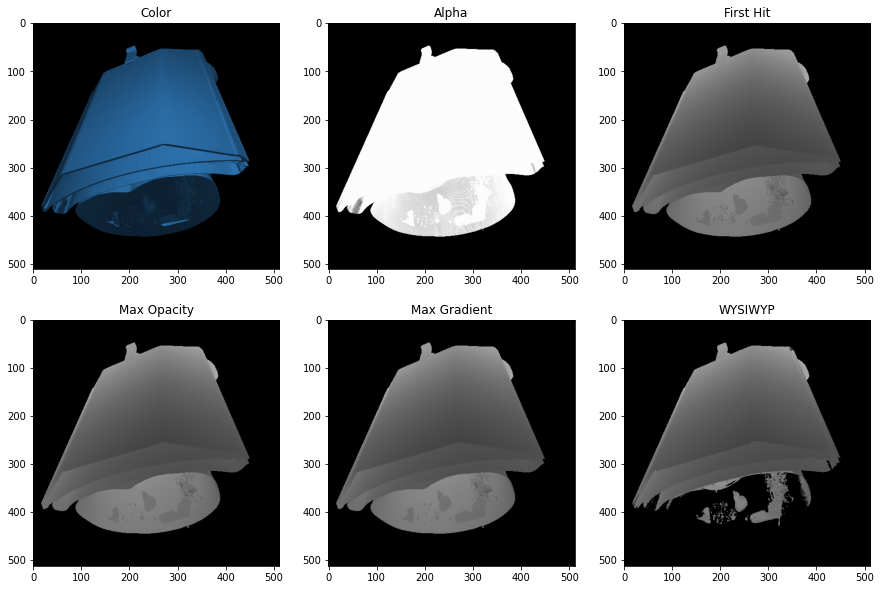

In [5]:
show_im(rgbad)

In [9]:
from itertools import chain

In [17]:
def remainder2pad(s):
    p = (4 - (s % 4)) % 4
    print(p)
    if p < 2:
        return (p, 0)
    if p == 2:
        return (1, 1)
    else:
        return (2, 1)

In [18]:
tuple(map(remainder2pad, tuple(vol.shape[-3:])))

3
0
0


((2, 1), (0, 0), (0, 0))

In [19]:
tuple(reversed(tuple(chain(*map(remainder2pad, tuple(vol.shape[-3:]))))))

3
0
0


(0, 0, 0, 0, 1, 2)

In [12]:
tuple(reversed(tuple(chain(*zip(map(lambda d: (4 - (d % 4)) % 4, tuple(vol.shape[-3:])),(0,0,0))))))

(0, 0, 0, 0, 0, 3)

In [12]:
torch.nn.functional.pad(vol, )

In [5]:
rgbad.shape

torch.Size([1, 8, 512, 512])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


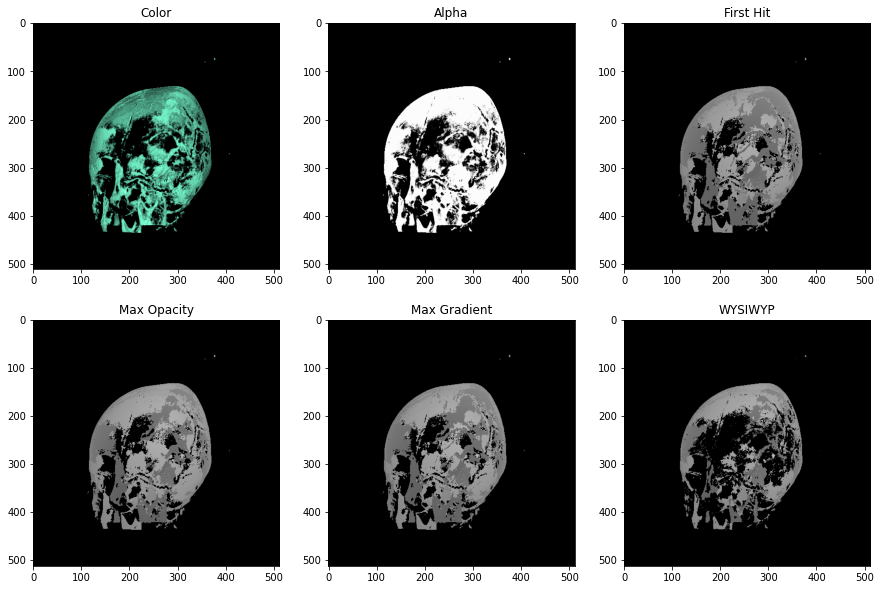

In [7]:
show_im(rgbad)

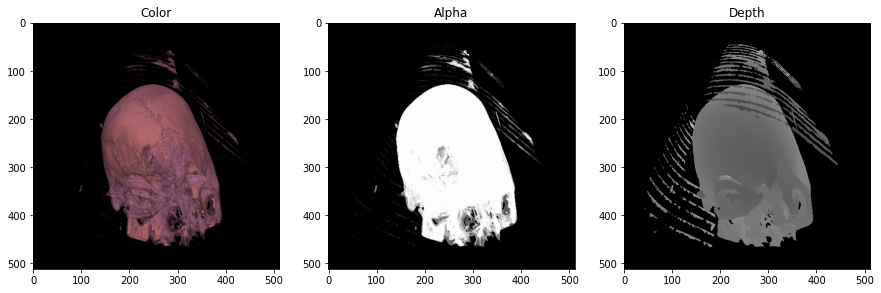

In [25]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.FirstHitDepth))

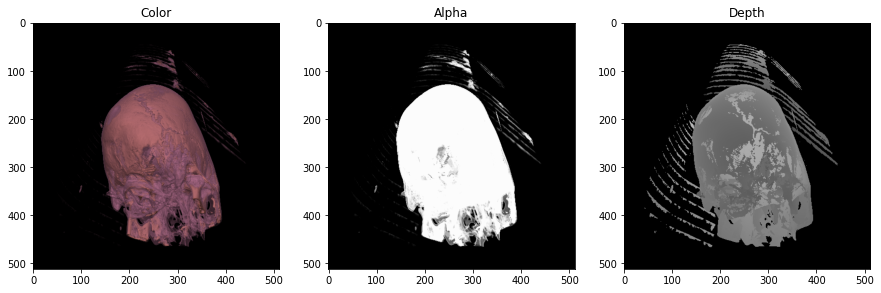

In [26]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.MaxOpacity))

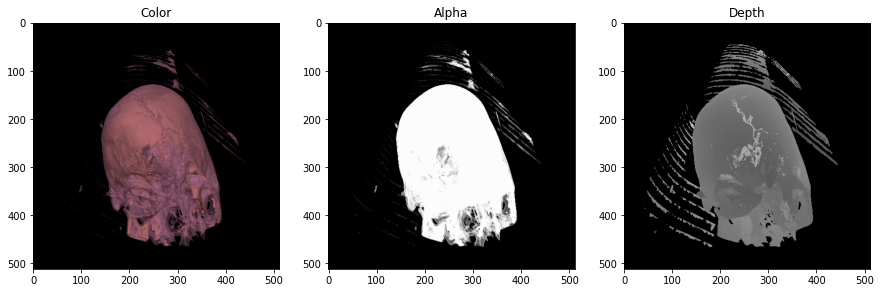

In [27]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.MaxGradient))

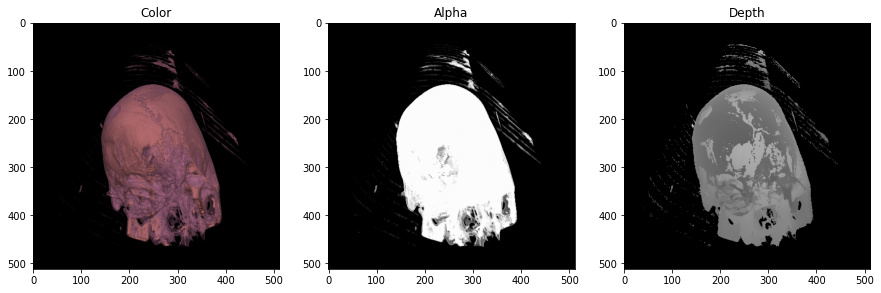

In [28]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.WYSIWYP))

In [7]:
rgbad.squeeze()[4].max()

tensor(0., device='cuda:0')

In [10]:
rgbad[0, 3].max()

tensor(0.9905, device='cuda:0')